# Daten klassifizieren

**Inhalt:** Unsaubere Daten laden und klassifizieren

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Daten auf Integrität prüfen
- Einfaches Putzen der gröbsten Fehler
- Ein paar String-Funktionen
- Klassifizieren a: df.apply kennenlernen
- Klassifizieren b: df.merge kennenlernen
- Plotting Level 2: mehrere Serien

# Das Beispiel

P3-Datenbank des Schweizerischen Nationalfonds. Beinhaltet alle Forschungsprojekte, die seit 1975 vom SNF Fördergelder erhalten haben.

Quelle und Dokumentation: http://p3.snf.ch/Pages/DataAndDocumentation.aspx

Datenfile: http://p3.snf.ch/P3Export/P3_GrantExport.csv

Speichern Sie die Datei an einem geeigneten Ort, zB im Unterornder `dataprojects/SNF/`

## Vorbereitung

Wir laden diesmal nicht nur das Pandas-Modul, sondern auch NumPy.

*NumPy is the fundamental package for scientific computing with Python): http://www.numpy.org/*

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

## Datenfile laden

Wie gehabt ...

In [4]:
path = 'dataprojects/SNF/P3_GrantExport.csv'

In [5]:
df = pd.read_csv(path, error_bad_lines=False)

<ipython-input-5-17068f572d33>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(path, error_bad_lines=False)
b'Skipping line 6: expected 5 fields, saw 8\nSkipping line 8: expected 5 fields, saw 6\nSkipping line 14: expected 5 fields, saw 6\nSkipping line 19: expected 5 fields, saw 6\nSkipping line 21: expected 5 fields, saw 6\nSkipping line 24: expected 5 fields, saw 6\nSkipping line 29: expected 5 fields, saw 8\nSkipping line 31: expected 5 fields, saw 7\nSkipping line 32: expected 5 fields, saw 7\nSkipping line 33: expected 5 fields, saw 8\nSkipping line 35: expected 5 fields, saw 7\nSkipping line 39: expected 5 fields, saw 9\nSkipping line 41: expected 5 fields, saw 6\nSkipping line 44: expected 5 fields, saw 6\nSkipping line 54: expected 5 fields, saw 8\nSkipping line 55: expected 5 fields, saw 6\nSkipping line 56: expected 5 fields, saw 9\nSkipping line 57: expected 5 fi

**Oops:** What happened here?

In [6]:
df.head(3)

,,,,"Project Number;""Project Number String"";""Project Title"";""Project Title English"";""Responsible Applicant"";""Funding Instrument"";""Funding Instrument Hierarchy"";""Institution"";""Institution Country"";""University"";""Discipline Number"";""Discipline Name"";""Discipline Name Hierarchy"";""All disciplines"";""Start Date"";""End Date"";""Approved Amount"";""Keywords"""
"1;""1000-000001"";""Schlussband (Bd. VI) der Jacob Burckhardt-Biographie"";"""";""Kaegi Werner"";""Project funding (Div. I-III)"";""Project funding"";"""";"""";""Unassignable - NA"";""10302"";""Swiss history"";""Humanities and Social Sciences;Theology & religious studies",history,classical studies,archaeology,"prehistory and early history"";""10302"";""01.10...."
"4;""1000-000004"";""Batterie de tests à l'usage des enseignants pour le diagnostic de la forme d'intelligence dite divergente"";"""";""Massarenti Léonard"";""Project funding (Div. I-III)"";""Project funding"";""Faculté de Psychologie et des Sciences de l'Education Université de Genève"";""Switzerland"";""University of Geneva - GE"";""10104"";""Educational science and Pedagogy"";""Humanities and Social Sciences;Psychology","educational studies"";""10104"";""01.10.1975"";""30.09.1976"";""41022.00"";""""",NaN,NaN,NaN
"5;""1000-000005"";""Kritische Erstausgabe der 'Evidentiae contra Durandum' des Durandellus"";"""";""Kommission für das Corpus philosophorum medii aevi der SGG"";""Project funding (Div. I-III)"";""Project funding"";""Kommission für das Corpus philosophorum medii aevi der SGG"";""Switzerland"";""Non-profit organisations (libraries",museums,academies,"foundations) and administration - NPO"";""10101"";""Philosophy"";""Humanities and Social Sciences;Linguistics and literature","philosophy"";""10101"";""01.03.1976"";""28.02.1985""..."


Offensichtlich sind die einzelnen Felder hier nicht mit einem Komma, sondern mit einem Semikolon abgetrennt. Wir müssen unseren Befehl anpassen:

In [7]:
df = pd.read_csv(path, delimiter=';')

In [14]:
df.head(50)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN
5,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.00,NaN
6,9,1000-000009,Theologische Forschungen zur Oekumene (Studien...,NaN,Stirnimann Heinrich,Project funding (Div. I-III),Project funding,Institut für ökumenische Studien Université de...,Switzerland,University of Fribourg - FR,10102,"Religious studies, Theology",Humanities and Social Sciences;Theology & reli...,10102,01.01.1976,31.12.1976,25403.00,NaN
7,10,1000-000010,Konfuzianische Kulturwerte in der sozialen Ent...,NaN,Deuchler Martina,Project funding (Div. I-III),Project funding,Ostasiatisches Seminar Universität Zürich,Switzerland,University of Zurich - ZH,10301,General history (without pre-and early history),Humanities and Social Sciences;Theology & reli...,10301,01.10.1975,31.03.1977,47100.00,NaN
8,11,1000-000011,Edizione degli scritti di Aurelio de' Giorgi B...,NaN,Stäuble Antonio,Project funding (Div. I-III),Project funding,NaN,NaN,University of Lausanne - LA,10502,Romance languages and literature,Humanities and Social Sciences;Linguistics and...,10502,01.10.1975,31.03.1977,25814.00,NaN
9,13,1000-000013,La construction de nouveautés au sein des morp...,NaN,Piaget Jean,Project funding (Div. I-III),Project funding,Laboratoire de Didactique et Epistémologie des...,Switzerland,University of Geneva - GE,10105,Psychology,"Humanities and Social Sciences;Psychology, edu...",10105,01.10.1975,30.09.1978,360000.00,NaN


Besser! Schauen wir uns die Sache mal näher an.

In [9]:
df.shape

(69478, 18)

In [10]:
df.dtypes

Project Number                   int64
Project Number String           object
Project Title                   object
Project Title English           object
Responsible Applicant           object
Funding Instrument              object
Funding Instrument Hierarchy    object
Institution                     object
Institution Country             object
University                      object
Discipline Number                int64
Discipline Name                 object
Discipline Name Hierarchy       object
All disciplines                 object
Start Date                      object
End Date                        object
Approved Amount                 object
Keywords                        object
dtype: object

In [11]:
df.describe()

,Project Number,Discipline Number
count,69478.000000,69478.000000
mean,91762.055543,19967.462161
std,56603.781834,8267.978369
min,1.000000,0.000000
25%,39662.500000,10401.000000
50%,107514.500000,20404.000000
75%,141091.500000,30103.000000
max,183981.000000,50000.000000


Offensichtlich hat es einige Spalten drin, die noch nicht mit dem richtigen Datentyp formatiert sind, z.B. "Approved Amount".

Das Problem ist: So lange wir da nicht die richtigen Datentypen haben, funktionieren einige Auswertungen nicht.

In [12]:
#Zum Beispiel diese hier:
df['Approved Amount'].mean()

TypeError: Could not convert 11619.0041022.0079732.0052627.00120042.0053009.0025403.0047100.0025814.00360000.00153886.00862200.00116991.00112664.005000.00204018.00149485.0083983.0038152.0014138.00164602.00147795.0024552.0044802.0056000.00152535.00225000.00179124.0020000.00445198.0085938.008902.0019134.0054509.0013807.0055000.0089770.0020000.0051904.00462615.00143070.00250991.0063684.00154420.00117564.0064279.0071884.0046200.0029382.00279497.0035649.0074617.00134138.0030000.0036296.00199585.0086949.0015000.003952.0014242.0023565.0037254.00162154.0013620.0014235.0071007.00167310.0038333.00150000.0087400.0024000.0065004.004500.00170000.00144814.00132548.0010402.0041872.00137040.00117101.00100000.002000.0020689.0019980.0016000.00123335.0020095.0014500.0034281.0027000.0023881.00326856.0038652.0099995.0069000.001062788.0055927.0029420.00139988.0017000.0052568.0063413.005000.00106466.00161225.0055508.0032500.00174862.00446898.0013000.00221639.0022190.0037092.00204927.0016537.00165496.0028712.005630.006000.0086807.0013080.00184309.0091220.0028000.0029328.00251600.0083882.00161538.00120000.00390103.0079000.0027952.0064840.00924086.00341642.0012307.0090000.00238237.00125340.0031281.00190106.00167255.00183839.00183110.0072180.0095248.0050628.00544848.0012000.0078000.0065000.00182516.00228558.0057863.00300000.00113330.0030000.00186135.0040345.007000.0014610.00215310.00102583.0046354.0033300.00146794.0035320.00142611.00121983.00131761.0083020.0037500.008449.007750.00109417.00179327.006810.0070950.00114246.00290655.0050000.00239455.0061607.00116451.0061700.0053869.0063868.0038288.0023933.0015946.0087000.00659146.0081720.00180059.0078730.0054185.0016314.00198531.0078892.00147251.00160034.0033300.00117852.0045850.0038804.0016917.00122084.0048096.0033374.00107760.00161066.0019816.00143761.00100000.00188713.00147229.0072096.0053953.00146936.00261933.0052485.00379672.00408233.0037029.004652.0035317.003000.00161605.00183642.00107612.0073371.0033021.00155972.0037463.00132457.00119979.0040039.00167500.0010500.006000.00159892.0031590.003225.0072000.0029600.00106777.00122171.0087074.00124795.0012353.0097570.0086920.0087744.0025143.0012000.0066752.0035364.0028500.00206973.0045980.0035555.00105000.0039395.0068947.0030646.00135542.00309361.00248858.00198120.0096046.0036424.0099455.001019318.0050000.00174066.0098928.00182312.00152250.00126484.0034372.00162012.0074328.00131354.00141101.0082369.0086879.0095724.00141644.0080000.00112587.001000.0084719.00122682.00272361.0012500.00100297.0084103.00113996.0075990.0032575.00124996.00177018.00190044.001632.0011089.00189775.0059600.00102925.0047160.0018500.0060923.0080800.0042900.00104643.001212559.0066887.0011500.00127000.00224024.00113900.0093738.0093863.0066969.0027515.00194898.00143448.00282830.0028877.0042386.0022700.0059140.00228536.0092000.00100000.0020300.00231702.0061764.00110621.0074184.00274050.0030190.00160601.00144074.0079431.00181598.00237277.0086216.00123395.00104244.00268104.0074298.0063669.0063560.00133238.00105087.00124430.00314104.0066207.00111013.0045587.00216537.00104889.0029752.0027604.00240590.00288172.00245440.00394677.00453156.00127965.00107860.00104733.006000.00244740.0032265.0047096.0014397.00475334.00189110.0013136.00216945.0014350.00199477.0027500.00106265.0016773.0031100.00115480.0039897.00134074.0066253.0063723.009000.0012470.005424.0094347.0077998.003348.0090083.0076874.0057655.004268.0055613.00104011.0063618.0017310.00792.00149274.00124377.0091686.00553042.0064264.00300297.0060779.00113618.0086379.001080581.0020679.00167987.0025000.0052521.0083349.00140766.0065090.00243923.00149303.0090160.0056000.0061464.0072228.00458941.00101767.0049210.0058699.00200088.00396000.00146796.00278174.00279934.0075000.0014135.0015000.0010000.00118559.0025000.0094562.0096527.00402046.00289390.00461198.00256503.0015837.0050256.00360000.0030290.0030000.00104321.0079169.0075000.0072035.0046769.00112924.0031710.00156555.0041326.00113652.00314681.0035111.00122318.0073950.00100000.005000.00252998.0082884.0044182.0027000.0051323.00248884.00280939.001430200.005000.00282880.003000.0026679.00100000.0082188.0071201.00184944.0084828.0090000.0099723.00117162.0016952.00321000.0088014.0069790.00191735.0032421.0030000.0031800.006000.00250555.0065060.0050000.009020.0010000.00238235.0022300.0044020.008700.0079688.0030000.00199780.0011810.0013000.0027000.0032622.00100822.0084821.0054276.00245540.0054250.00204928.0036000.00103833.0027017.0053300.0073425.0014849.0052330.0083000.00135385.00359700.0076044.00214430.00188793.008083.00327144.0090000.0076652.0058612.0062000.00142369.00208500.00122740.0062040.0091965.00110515.007320.00112281.0044500.0091570.00148647.0094122.00135373.00144712.00202700.00216699.00305803.0056722.0044363.0075974.0095542.0073861.0092790.00130658.0031871.006000.0071519.00455426.00121379.0056000.0012000.006362.0090000.0018000.00186336.0012000.00333725.0085700.0033675.00130026.0040000.0072500.00220000.00110000.0045237.0084474.0015000.0083921.0098907.00176410.00197609.0046718.0012995.00138683.00248351.00315216.0029824.00125570.0073720.00263315.0083742.00100713.0039861.0062184.00325764.00178462.0083672.00122800.0050000.00133078.00252025.00124923.0054859.0046158.00213072.003000.0075591.0072555.00158566.0012500.00119349.00110109.0038589.0051424.0072752.0037910.006000.0050965.00915831.00111600.00757640.00350300.00418310.00260500.00513626.00100000.004590.003000.0065280.0024000.0058500.008000.00555356.00630900.00128287.0028200.0023610.00218961.0064000.00119689.0096104.005188.0081320.0032124.0077726.00159412.00130350.00115504.00342026.0098099.0036803.0072000.00344454.0017482.0010616.00293716.0040960.0070178.00241360.00127841.00695003.00288499.0024000.0094210.0034174.0063430.00116188.00143246.0026500.0015000.00105000.0034423.00160649.0081308.00115739.00299855.0050604.00101210.00160702.0052772.0030500.00150630.0052300.00370156.00441493.00250887.00576077.005000.0096054.0091007.008000.00107661.0060000.0070500.0040520.00212230.0040088.0053500.0076024.0046400.00140693.0075000.00161809.00153102.0028339.0075000.0046735.0086065.00654288.00105966.003717.003525.0090000.0040000.0042850.0090000.0010082.0074050.00106477.0060484.00133126.00112424.00187730.0042400.0010082.0041871.0068500.00116546.00258810.00106642.0088825.00124047.0045834.0044000.0027238.0051386.00117052.00302366.0075817.00898000.0094280.00173823.0094833.0070026.00200450.0086950.006000.0034760.0066819.0011314.00129726.0063491.0089022.00161696.001091017.00102747.0097965.005000.0039926.00205014.0059064.0076200.00305660.0027400.0031470.00175824.0025280.0056303.00532006.0028268.0088100.00102921.00210897.00120435.00278111.00156508.00106524.00165467.00208950.00177327.00111965.00142265.00309260.0041634.0024100.00170894.00146100.00137430.0041000.0015586.0040000.00166640.0023600.00125901.0064495.00268543.0096207.0039667.00159530.0041882.00214802.0096246.0058984.0050567.00166250.0064650.00131347.0039304.005156.00500.00412737.00499336.00292910.00591624.006000.0050000.0011165.00217006.00131000.0036890.0015000.0047000.0082565.0090000.00181588.007000.00116556.00115191.00104157.0089748.0028000.0090942.00133385.0084553.00186310.0020745.00166880.0028645.0065300.00209847.00100000.00190000.0053746.0053277.00116205.00118130.00198402.00192923.00175611.00381000.00128810.0086570.0094188.0075000.00290684.00178598.0028500.0035000.00302943.0098929.0074396.00141596.0024962.0097043.00198728.00135748.001317564.008446.007248.0015000.00134178.007000.00151911.0013088.00171660.0090000.0025645.0059328.0076953.00621665.0045000.00360865.00245512.006000.00151674.0056889.00117502.0090841.0043145.0099582.00192161.0059785.00223678.00336751.0047063.0076399.0024429.00322268.0070543.0050886.0057184.0079310.0041668.00166439.00160000.006000.00131737.0084908.0075000.0078841.0044676.0035688.0068440.00104049.00102607.00102800.00138246.00224488.00103443.0021000.00155222.0024696.0029668.00190841.0078017.00106463.00120091.0084241.0081533.00149640.00267711.0065478.0070112.0024794.00254196.0096225.00302065.0034616.00230908.0010000.00410546.00594389.00296530.00595331.00153365.0015000.00259529.004500.006320.0010000.0047596.00239452.0015000.00288258.0079420.0064600.0085700.0050250.00175343.0017000.00138796.00247745.0024000.00164699.00126480.0045000.00189563.0099000.0021330.0058243.0078338.00252625.00100000.0058769.0033708.0047479.0095215.0020214.00105860.0027000.0052134.0097937.00219260.00150000.00194536.0070000.00177875.0044253.0079760.00193192.0047300.00109162.0084938.0036869.0090480.0046375.00127000.0080833.00156978.0064637.0060308.0090143.00185539.00184441.00124010.00121644.0056105.0027915.0073190.00147043.00102353.0087292.0072766.00132294.00213626.00196765.00100000.0088000.004800.00344009.0059996.0039186.00370841.0040409.0040310.0060300.00140090.0037680.00102640.0095549.008000.00174309.00206854.0046783.0096231.00170000.00130837.009500.0098171.00329933.00131087.0029930.0079766.0043520.0045526.00103000.00203200.0084767.0063823.0076030.0079450.0097580.00287033.00157939.00919014.00266408.0084987.006263.00100000.0026000.00120033.0029393.00202910.00268649.00108989.00121659.00155000.0077000.0066539.00976941.00146819.0044489.007375.00273823.00119695.00230178.0021451.00125055.0056319.0030000.0084603.0054000.0056432.00418578.00617053.00548373.0010000.00303653.005000.0085895.0077953.00150516.0027000.00150119.00123897.0096200.0036183.00123018.0027934.0033797.0082210.00120000.00126680.00150978.00100000.0064258.0097293.00201033.00100000.0032750.0057000.0012000.00119195.00134066.00101748.0075689.00256785.00132070.00102114.00110471.0046141.0032530.0070000.0017072.0026280.0070657.0063739.0026897.0057633.00357365.00339621.00186242.00128697.00150000.0085000.0091800.0021959.00119102.00161927.00146710.00618065.00141683.0080229.0037935.00268881.00103672.0068041.0015000.00122556.00106770.0037411.0013450.0010000.0024796.0035878.00185428.00158419.00100000.0021797.00110000.00107700.00203986.00189252.00196659.00183802.00155458.0082054.0086213.00210449.0040507.0069918.00200691.00300000.0040500.00129620.00420000.00245945.00130528.0037350.00144000.00363789.00106678.0065221.008600.00112027.0024758.0020000.002670.0029816.00125000.0057040.00129315.00115349.00124816.00111368.00101438.00213991.00109421.0060243.00264319.0030000.0070344.008000.00289185.00300000.001449016.00182980.00169663.0082132.00255210.007584.0078808.0062400.0051232.0014000.00167879.0047369.0045035.0097853.00180000.00364107.00125388.00135570.00197518.00375867.00141821.0073038.0025000.0078723.00616943.0020000.00150418.007000.0033000.00165119.00334590.0049370.00670181.0027705.0049130.0036256.0050000.00220257.00154445.0092136.00119686.00170061.00224000.0060062.00267014.00155695.00268237.00210158.0077558.0083483.00100000.0071315.0080500.0070500.0087486.0053526.00148068.0056057.00277750.00264488.0031137.0049710.0071027.00277655.0045977.00354225.00431293.00635678.00521304.00348389.0010000.004000.00180051.004200.0074000.009000.0015000.0081250.0091528.005800.00126567.0049055.0031800.00147657.0065000.0050535.0090000.005000.00115492.0097649.00112693.00200000.00136175.0043160.00187088.0068209.00151020.0062494.0016790.00273458.0084200.00234665.00257945.00249702.0039616.00203193.00322449.00109133.0038140.0091708.00196734.00267998.00196269.00327642.00174035.0024204.0092186.0037423.0087034.00262733.00163264.0069539.00129922.00342790.00324550.0027502.0076125.00200652.00160965.00144196.0072943.0081566.00113565.00167946.0093187.0057989.00107708.0054041.0084296.00211440.00323827.00209712.00105126.00193560.00153077.0089612.00846658.0073358.0020000.00674430.00406426.00602131.00384376.004500.00141731.004300.00134000.0050703.0089900.0028842.00140444.0071112.0018429.00229790.00258465.00184178.0090222.0077600.00158487.00157740.0059719.00178612.00100000.002900.00210000.00221703.00178386.00226982.00212194.0043480.00108852.0053573.0068464.00167745.00228663.00154725.0027760.00141821.00120122.0055692.006875.0038718.00129349.00254629.00241559.0064581.0050000.00151223.0095471.00203755.0081068.00160029.00207826.0036655.00264297.0085000.007000.0097429.00111160.0072393.0020423.00122581.00190490.0076202.0074898.00210020.0056745.0085521.00111539.0089330.00305127.00153123.0024968.00102179.0015000.005000.005019.007500.00429613.0031800.00135093.0045000.0018000.00300676.00195000.00948224.0027760.00125028.0090000.0037024.007500.00187831.0054392.00197612.0050141.0039583.004935.0065600.0058570.00202571.00184560.00106062.00164215.00208460.00152604.0034476.00290000.0083473.00178005.0097825.00127047.00132950.00248753.00422646.00187896.00208945.00101116.0032443.001010816.00254198.00130530.0086246.00157708.00198659.00265355.00145235.00125941.00128377.00679002.0066630.0015104.00276378.00203288.0033391.0065427.0049350.00148723.0096598.00109608.004000.00301387.00130008.00699185.0050125.00288087.0025000.00224190.00698390.00416823.00647632.00507429.004890.005500.0025328.005000.00221381.007500.005000.004607.0015000.0012500.00320000.0094791.0056240.0076600.0050000.0030000.00334327.00171643.00291738.006273.00125803.0097800.00239229.00416848.00172723.0073265.00381010.0057527.0049125.00364714.00448630.0034700.00150641.0054198.00293264.00179708.0088808.00265100.0049594.007000.00266309.00152187.00137614.00122162.00145000.00135485.00130000.0044126.004000.00282010.00261377.00246634.00149852.00159926.00154933.00774650.0083544.00190128.00411104.00161354.00146002.00109521.00300000.0034600.00264671.00185672.0010000.00252269.003300.003000.008400.008800.0079836.00268633.0036300.00138779.0089844.00283601.0069740.004300.00162864.007000.0054510.00376746.00177833.0072189.00605740.0073419.0061849.0073306.0057100.0028533.0033045.00255985.0063401.0060500.00231072.0037614.00207045.00140000.00239154.00121465.00226070.00140342.0066831.00252682.00118125.00337413.0096545.0039075.0055000.00117173.00210948.0061970.0098774.0050000.0093724.0067173.0087329.0066257.00286594.0089717.00126000.00191985.00321906.00141656.00223102.00112478.00165295.00138469.00427112.00270701.0030800.0053820.00434017.0089795.00112331.00105063.00205776.00111896.00142015.0053051.0057244.0047421.00426129.0071700.00719063.00422794.00665783.00517880.00235096.006781.0063791.001951.0073394.006000.0062759.0047238.0050000.00200000.00122834.00252440.0044000.00145212.006964.0040737.00285000.0015000.00330000.00179876.00218546.00219773.00159000.00163062.0098415.0055278.0067140.00385959.00486516.00203098.0040000.0075702.00288227.00170344.00214033.00148596.00248778.0022437.00262973.00180074.00141061.0095110.00244586.0078219.0070700.00122576.00100726.00168423.00257438.00100108.00127207.0076239.0081376.0031000.0098000.0089617.00233071.0047783.00281354.00154395.001114429.00253724.0041874.0060000.00143731.00134668.0066362.00230903.00639447.00139817.00288756.001500000.00122893.0035247.0037700.00255852.00207084.0018550.00184220.008500.007900.006164.0010000.002680.0010000.00147923.00135826.00251759.001082276.0049305.0050000.00277799.00112500.00269671.00119091.00295000.00132479.00153570.00162577.00250776.0062265.0061123.00115483.0060000.00150000.00766305.00175226.0026000.00248094.0064143.0042899.0068000.0035467.002756.00175934.00191222.0097632.0059775.00179336.00179946.0095139.0060000.0091255.00300000.0066404.0066379.0055368.0055000.0093843.00193204.00123739.0075649.0097222.00118573.00627648.0080250.0042000.0057021.00106072.0028351.0050597.0070164.0075764.00159672.00102534.00122562.0083953.0052239.00200213.0066093.0015000.00148394.00103923.0053524.00192148.00109552.00290000.0076973.00111780.00121140.00752464.00408930.00584426.00541040.0014000.00119085.0065330.0012000.002068.00134139.0010000.007850.0010000.0065246.00121304.00127501.0015000.005650.00176654.004500.0043362.00194871.0041700.0091300.00244169.00122075.00247904.00478927.0038667.0037535.0063917.0041728.00112674.0065003.0039884.00147576.0069860.0048366.00289363.00234393.00125762.00124463.0054887.00203351.00260667.0068400.0022400.0075677.0038733.00173452.00107873.00109895.00157469.00113725.00228250.0072475.0061190.0020000.00227790.00151114.00235670.00379728.0069539.0075004.00159805.00393203.00268118.00116492.00214663.001035754.00106124.00118850.00130190.00296625.0064600.0053465.001559894.0095702.00245207.001171000.0063350.0028981.0066374.0062343.007500.00527609.0062060.00216426.00162654.0041346.00317498.00401704.00196601.00148836.0064800.0043464.00219641.00130996.00220238.001156967.0042400.0064956.00572901.00112377.00270189.0072883.0099253.0031500.0029725.008000.0050000.00123633.0039900.0056158.00208040.00115499.00128245.0085207.0075730.0039365.0067605.0047750.00110091.0075635.00259453.00301982.00143270.00329802.00112998.0043200.0090317.004000.0070000.00292139.00220544.00245533.00289481.0055125.0082809.0040000.00335539.0073414.00152434.00218129.00168599.00789088.00269625.00281167.0043409.00207269.0079240.00141390.00229174.00165790.0096522.0032000.0070976.0019000.0035319.00378179.00260150.0047849.00121766.0036974.00652842.0086400.00172953.00132287.0069333.00151410.00273160.0045022.00135316.00419492.00124230.0024354.00138515.00116841.00257927.00261248.00200794.0041585.0044416.00115743.00215667.001439030.00804879.00440008.00425826.00229366.00359749.00125531.00456234.00151596.00680985.0019740.00579919.00376168.001278889.00109012.0028332.00249670.00104208.0094557.00131120.0041327.0018000.0020000.009191.00140176.00149593.0056385.00246563.00496706.00174475.0053225.00417334.0090822.00256272.00247022.00197912.00147411.00124590.00106452.00113064.00251094.00327174.00103685.0051639.0020000.00144362.00138260.0047128.0078019.00116254.007066.00102016.00374356.0072373.00497164.0010400.0065361.0095673.00135523.00194828.0071712.0039809.0068302.0072389.00299201.0085100.00400533.00254493.00152833.00181979.00114552.00310151.00124480.0050547.00562350.00207506.0046020.00111786.00153105.0060715.0090410.0040425.00127057.00201438.0088200.00209516.0052530.0041525.0053830.00154712.001198390.0046397.0073899.00101781.001092277.0078783.00277638.00134184.00517684.00156796.001551764.00279551.0093846.0073324.00226543.0028940.0073541.00262165.0096381.00536810.00119846.0063420.00368907.0082110.0059315.00188815.00170806.0077026.0066825.0050750.00121391.0043850.00111409.00100715.0040285.0074730.0034459.0022316.00138300.0041433.00111313.00112238.0085512.00140280.0096172.00515105.00641446.00289226.00211750.00286292.00469509.0011941.0010500.00260160.0036948.00288580.00280538.00383248.00283205.0046682.0062250.0082847.0057462.0043896.00143657.0045000.00171466.0075000.00175698.00200339.0073905.00760823.00197183.00115309.00132610.00284329.0061166.0047021.0034499.0036944.0054180.00259707.00150558.0083402.00104552.00353455.001485753.00320822.00268881.00263705.0081530.0093038.0040102.00241056.00170848.00425446.00458154.00229356.0099490.00661268.00110771.004000.0046722.00165619.0040752.00826561.00531849.00599659.00238066.00681273.00243130.001265766.0013365.006500.00171118.0065307.0049838.003000.00434986.0013372.00117047.00204871.00313594.00101260.0050990.0057700.0076787.0017500.00323152.00220428.00118037.00488046.0040370.00185690.00169805.00290913.0035400.00125267.0016071.0064064.0038675.00505235.00106757.00439971.00194966.00181354.00108659.0094830.001091271.00165909.0056252.0055469.0047604.00479165.00134122.0099087.0081373.0075011.0046265.0018222.001563512.00134637.00397500.00115061.0094805.00363024.0047000.00124234.00165000.00166680.0072490.0056405.009945.00114298.0070374.0040330.00130886.00168014.00224858.0089859.00122137.00253573.00130329.00209512.0073527.00134014.00149503.0061572.00119996.0087992.001080321.00157938.0047650.00367572.00108289.00370139.00323183.00247138.0051508.00113332.00171042.00107611.00244203.00192828.0023036.00176360.0087916.00538811.00571758.0051174.0066098.0095750.00303909.00215370.00231509.0088084.0097355.0072252.00144475.00183214.0072883.0057556.0042244.00208524.00352497.006000.0010000.00228208.001500.00214791.00193942.00104000.00260442.00109176.00117057.00144369.0038541.00350204.00151168.00118734.00136309.0061470.0080000.0069564.00155097.00163185.0043637.0060710.0046500.00245957.00272632.00341402.0052549.00193544.00164739.0028000.0012000.00360297.0053944.0068093.001536820.00398144.00106856.00178205.0077387.00441837.00227972.00169761.0062372.0032259.0040841.0060699.00382849.00767232.00215750.00278579.00149718.00137925.00132660.0085636.00256461.00253629.00237742.00617780.00192245.00128936.00405742.00853707.00460075.0047397.0068618.00291766.0079292.00272928.0039058.0063254.00221952.00163402.0094857.00386400.00693684.00447541.00305684.00213352.0034500.0090936.0036049.00440352.0020972.00122108.0039617.00153666.00194436.00167046.00166034.001264581.0083926.0069304.00360422.0075753.00130221.00526893.00338022.0084301.00241423.0055125.00300756.0023650.00116836.0035777.00184709.0062020.0041107.00462798.00102432.0084814.0046992.001097073.00195519.0076843.00106366.00285363.00333796.0063958.0058018.00138747.00262845.00201460.00123845.00133158.00288771.0075345.0090361.0072179.00122571.00173002.00249402.0067513.00320714.00288844.0044066.00229956.0098816.0098307.00165864.00102893.00116294.00495198.006000.00156743.0036448.00270675.001131469.0043991.00240235.00130813.0056650.00245808.001576603.00178600.00184279.00498457.0084632.002000.0060088.0098133.00104843.00212545.00170300.00133485.00173459.00156828.00173400.00372753.0037783.00197622.00439927.00219204.0096687.0066469.00521636.00180157.00243040.00571162.00848600.0046138.00113615.00157103.00647729.0026000.0070620.0098631.0013500.0012000.0047517.0013000.00142500.0012000.00165485.00116924.0051060.00336306.00147752.00166502.0052800.00113951.0091917.0081436.0098738.00140959.0043000.00235790.0048646.00147111.00348581.0094166.00122636.0062156.00120335.00564583.0028333.00296378.00248691.0070816.00168494.00309035.00112350.0051385.00392873.0060188.0096996.00158169.0016604.0061715.00899316.00880101.00132665.00246566.00169906.00350138.0061625.00222553.0029513.0041802.0053441.00184902.0035323.00276979.00682533.0076792.0022869.0099355.00169566.00259709.0063140.0012230.0024188.00628420.00162420.00260011.001538323.00194927.0041757.00272670.00429063.00210903.00211237.00421074.00145260.00218040.0044947.0075621.0028994.00643550.00486738.00437583.00407344.00756874.0065718.00273660.001294518.00117801.0080000.00711326.00191984.007330.00344089.0057956.0032942.0046237.00231004.0060367.00218098.0083462.00114573.00280854.0022000.00116345.00343923.0027000.00289795.00257647.00171547.00206546.00134061.00201081.00283300.00202967.00115069.00171228.00118670.00157500.00286924.0028811.0065505.0075641.00222738.00403210.00512386.0058466.00276340.00157750.00205503.00149076.00151891.0044826.00129509.00291000.00214334.00110852.00183975.0047754.0069980.00153926.00202161.0056944.0048444.0071664.0088847.00345552.00134716.00292901.001193669.00249858.00106781.0073780.00219775.00256333.00276460.0043274.0012648.00100155.00187935.001108155.00181677.0098282.0097330.00121296.00392272.0050277.0095524.00283617.00160422.00128626.00123284.00438439.00446790.0062134.00109827.0031520.00251556.00133383.0071062.0049185.00122596.00181267.0090033.00363784.0018130.00208660.00116555.0057488.00120931.0087351.00267657.0040781.00135635.0028297.00191281.001633009.0015000.0080200.00141087.0099234.00122978.0082489.00669468.00568937.00127386.0032100.00433375.0038642.0012000.0015000.008500.0064710.00109389.00300642.008000.007000.0050162.0063778.00253358.0062602.00188973.00150148.0073359.00267130.00151941.007750.00169069.00163165.0067620.00364543.00165815.00205368.00100614.0080000.0061843.00743473.00391099.00218290.00212578.00294673.00167617.0041769.0099642.0023150.0097413.00164000.00444926.00138728.0020668.0063578.0012157.001300192.00284995.00646662.00153315.00400770.0035500.00891054.0066540.0040073.00205365.0060860.0076628.0090458.00269273.00196880.00212973.00344886.00109350.00414046.00125192.0037727.00225890.001536059.00758331.00272539.00400441.00274718.00219052.00218331.00477285.0033555.00198427.0066927.00161685.00120829.00102199.00169816.00277077.00360259.00292151.0065793.004750.0074942.0089277.00192541.00316470.00102670.0089073.00638642.00261750.005000.0012000.000.006000.0094715.00473201.0030500.0068719.00263693.00425530.0096129.0094599.00212153.0022176.00210287.00206429.00296921.00341665.00156532.00132473.00526244.0085262.0051048.00306013.00311316.0080353.0073770.00131808.00115710.0055000.00206505.0045091.0044273.0022984.00122362.00113517.00149877.0058771.00118275.00160144.00110858.00188398.00353352.00154388.00243309.0022716.00135385.001171710.00196554.0088985.0030578.00187531.00230317.00149010.00329105.00147692.0065351.00287823.0051097.00205532.00410208.0051451.00397073.00566210.0096587.00338752.00173141.00186329.00431725.0088043.00291412.00208323.0074556.00113214.00171267.00309876.0048618.00162793.00135595.00197026.00250954.00330264.00102367.0079206.0056813.00135935.00145427.00185407.00297790.00288941.00206434.00283280.00346251.00534738.0046331.00243946.00126192.00150444.0049753.0095698.0076662.00520302.00128129.0094952.0089768.001126139.001638806.002000.0012000.00221782.0053839.0076171.0080000.0095656.0072908.00163634.0010350.00207778.00239736.00140129.00306222.0050994.00145408.0055917.00107401.00135232.00171186.00370266.0039700.00539945.00270049.0048000.0055787.00123156.00329628.0074645.0046929.0095011.00103197.00672870.00276314.00194107.00399260.00172474.00196969.00230068.00218259.0020000.00134988.0096871.0083317.008000.00281285.0082196.00219046.0068377.00344330.00150171.00132263.00884042.0092550.00211341.00751260.0096548.00126371.0061269.0022124.0015816.00353265.0059629.0035230.00488007.0043932.00466360.00701209.00309350.0043874.0099600.00162606.0068678.00166196.0046581.00226100.00439415.001179860.001537421.00170350.00286365.0043980.00560036.00199223.00149354.0052341.00177955.0082671.00112895.00617765.00372549.00817544.00585867.0038233.00171033.005000.0025523.0042800.0017241.0033515.0099996.00138101.00236691.0064892.0020500.00206462.001175324.00137665.00131532.0088741.00172683.00315588.00250502.0043378.00268967.00157395.00322614.00311074.0010300.00217396.0020993.00543600.00150000.00102866.00111024.00177502.00107383.0024463.00362750.00544578.0075085.00495391.00137635.00297700.0083516.00122466.0097219.00208418.0074146.00106093.0093780.0068503.0067621.0040890.0093700.0089576.0080424.0055275.0095482.00115518.0098383.00140311.0076045.00198672.00179455.00209753.0050175.00151692.00178679.00122748.00106621.001227413.00315859.00218872.0074405.00302681.00209218.0047794.00125283.00124664.0053146.00126352.0096801.0092463.00170013.00275165.00383651.00160328.0044311.00236679.00411368.00186837.0051247.0094894.0080000.0024180.0049135.00164974.0097183.00271090.00418319.00227122.00548005.00151207.001670616.00108096.00238707.00124553.0085931.0047205.0057839.00254301.00151924.0025270.00112004.00115104.00187418.0032100.0050705.0071714.00369312.0068309.00200193.00126578.00127256.0052615.006000.007000.00112924.00383287.00154343.00797439.00274975.00120430.0019078.00126809.0085640.00305187.0081633.00430071.00275436.00213904.00264316.00111627.00363656.0052050.00115975.00170313.00147394.00385565.00348897.00176258.0068517.0066090.00415356.0048004.00290485.00283840.00101832.0048621.0093425.0095605.00179802.00239499.0023329.00436984.0074835.00332392.00158888.00185890.0041560.0074210.00369165.0071188.00213688.0027534.001061149.00273520.00328911.00733061.00389042.001464888.00672570.0062459.00594588.00136516.00120467.00690176.00590594.00310602.00116965.00234175.0080000.00174090.00152221.00162948.00177188.0023501.00150293.00262761.005000.00150000.0040000.0076663.00103332.00246022.0073582.0087142.0067353.0056765.00338525.00157500.0025665.00144296.00182253.006000.005000.00212215.008000.00130303.00345549.00287276.00226541.0062923.00287241.00102444.00236834.00228048.00325007.00484534.001250699.00151509.00101215.00115793.00188338.0099809.0023960.0091211.00296261.0027679.00271694.00328377.0094250.00266546.00481097.00185866.00338095.00416048.0056736.0027574.00249250.001085185.00135113.00117195.00244145.0059252.00101310.00143316.00113894.00162599.00304444.00325314.00322146.0089214.00186155.0053245.0096411.00203158.008200.0039575.0092641.00473865.00381688.00116930.00144242.00273779.0012438.00161445.0062957.00345246.00178519.00341434.00160197.00160978.00117000.001091324.00117223.0080693.00160197.00317160.00180366.00188178.0069191.00230711.00296139.0089082.0020799.00253906.00179192.00167842.00396059.00196127.0091828.0094409.00251035.00320000.00668209.0088692.00167619.00213723.008000.0052938.00103549.0077628.00161068.00136148.00106962.009464.0077140.0067134.0063465.0035421.0054908.00151058.00113413.00293481.00146513.0052390.00200216.0049109.0089013.0067500.00207449.00163470.007000.0075000.0093000.00169588.00770677.00166947.00255652.0072289.00318852.001421503.0036400.00191979.00146146.00138682.00171806.0088129.00210901.00475978.00187881.00209713.00220152.00177899.00173858.0029026.00239206.00418864.00162036.00193371.00639829.00188372.00522898.00469071.00537009.0058154.00172881.00276639.00363645.0069506.00806383.00710154.00596925.00418768.00265689.00700040.00435426.00127224.0097181.00194076.00357152.00390030.00100000.00210047.00603545.00205000.001080321.0030000.00188062.0052983.0081251.00177924.0052473.0087460.00100160.0051575.00100260.00197817.0046308.00120970.0060000.00101900.0021784.0074440.0050406.00147189.0016800.0088630.00136882.007000.00206590.0012000.0070089.0052504.00103965.00123954.0083053.0065565.0048080.0099333.0018000.00114461.006500.0097000.0013520.0075108.0088558.0057217.0064489.00262835.001463646.00103842.00245919.00167665.0080118.00102474.00283602.00130312.0051246.00305377.0082012.00246784.00277641.00398939.00650110.00115186.00229675.00130888.00185361.0067085.00430362.00115305.00184631.00103463.00337177.00119997.00106276.0070030.00323657.00275914.00362056.00144432.00837132.00711704.00590687.00408556.00263247.00709045.00435194.00935482.00163857.00205732.00353602.00421395.00236147.001036998.00631430.00394831.00118398.0031164.00105332.0057469.00232736.00106959.00252676.0054423.00178506.00274269.0074049.00295112.0024555.00177000.00103266.007000.0062296.0022530.00182022.0021700.0050503.00170000.0019100.0082086.0060000.00218137.0091202.0074932.00165000.0087447.00165865.0075509.0063393.00121700.00273575.00135163.0040000.0077706.0073913.00108634.00121210.00144076.0046907.0070198.0031000.00264992.0012000.007000.004000.0026859.0039912.00207988.0024245.00241599.0063066.00908783.00159142.00214924.00354074.00188948.00427816.00372812.00140692.00121893.00139832.00218434.00529000.00120184.0059160.00275342.0086546.0055850.00227777.00136152.0020196.0065868.00284398.0045299.0049835.00146295.00191560.00366935.00308760.0024981.0053480.00119318.00161505.0016400.00155684.00135556.00321927.00215924.00364368.00314807.001114796.00499301.001045578.00328657.00199551.00105738.00106223.00121014.00252933.00540165.00420869.00199409.001278671.00407764.008000.00109584.00169975.00103474.00194843.0074650.0094521.00125324.0087927.00194084.00200321.00105302.00107380.00136055.00208697.00141335.00106835.00165185.0086871.00109186.00329089.00251639.0076494.00345291.00231021.00101249.0023500.00301142.0016950.00182608.00252717.00209352.0013500.0049518.00168614.0024000.0070950.00145041.0073290.00185409.0032403.00133500.00134574.00214949.00227180.00115090.0020000.0048699.00163651.0028750.0061206.0015000.00119567.00248219.009000.0036039.00205823.0045000.00164707.00174522.0038104.00385213.00145400.00329684.00191103.00175905.00168295.00230810.00278567.0024487.00301979.0091544.00105612.00200155.00221132.00417798.00214617.00246060.00229707.00198486.00337804.00154560.00335174.00232264.00260667.00230032.00284293.00106378.00268860.00137292.00253809.00215681.00408985.0074844.00183693.00412973.0039000.00235696.0052979.00199647.00385847.00215818.00175369.00222427.001171118.00314019.00500382.001108557.00508713.0057272.00115238.00195514.001168648.00302877.00531825.00171183.0098248.0084081.00243104.00198482.0091024.00254326.00409780.008000.00120473.00505525.00101692.00161952.00103043.00208173.00245519.00104721.00110840.00202239.00110103.00144781.00124147.0063898.00257571.0078340.0052525.00284714.0097797.00137974.0092407.00191079.0028888.00157655.0031000.00250929.0024232.0023753.0098868.0087400.0044690.00110386.00143649.00107840.00300000.0049591.0077013.0043520.00112393.005000.0079461.0038000.0059000.00320705.00134991.0037211.0064923.00130796.00315562.0050861.005000.00254018.00129904.0037178.00162942.0076675.00161098.0065644.0052202.0070952.0091163.004000.00121696.0084200.0062125.00146376.006000.0012000.00261561.00151095.00376486.00130008.00378253.0017801.009800.0036478.0043002.00176509.0032000.0046500.0066846.0080000.00172002.001537107.00788124.00328513.00293939.00182374.0081149.00207680.00142310.00351309.00642704.00384238.00465155.00223898.0019900.00287219.00261545.00343353.00180666.00177674.00658784.00196730.00247503.00261028.00403299.00609420.00211846.00590516.0077632.00323751.00174480.00305421.00807795.00852875.001024798.00616993.00471187.00447688.00776148.00153020.00206297.00121424.00150683.0066194.00210389.00428493.00460864.00454107.001066620.00321088.00241983.00172000.00655102.0067781.0032000.00110785.00386390.0067413.00236656.0065432.0031000.0014800.0081462.0080140.0095239.00112214.00227444.0042822.0057038.00171092.0073979.00227477.00175859.00188686.0010000.006000.0079799.0081770.0062814.00198629.0029210.0070880.0092322.00106291.00183018.0097956.006999.00154309.0028000.00176788.004000.004000.007000.007150.0057920.00139974.00244409.00502247.00123129.00216136.00234458.00201006.00366434.00270909.00134289.00101485.00119062.00252138.00259005.0080304.0069386.00226233.0033896.00163797.00163347.00228514.001175681.00127368.00191495.00111394.00333431.001346747.00412766.00218456.00121358.0078071.00195765.00125329.00329151.00412390.00177681.00227614.00241903.00104467.0036695.0067841.00407264.00300151.0038771.00106191.00356543.00229079.00390182.00310180.00104091.00153048.00304860.0052818.00213979.00237589.0019302.00326777.00108321.00145159.00154868.00212227.00716372.00105364.00555411.00358049.00183103.0046269.0085591.00581843.00258703.00134459.00176255.00557319.0025000.00232670.00180724.0034061.00162855.00454171.001182054.00144797.00231752.00176885.0039722.0066828.00121735.00176953.00134932.00105468.0014800.0020013.0057731.00111810.0083371.0056993.00204245.00142738.0073818.00106910.0087893.00292541.0025098.00123992.00104865.0052602.0095236.00128436.0014873.00306794.0044998.0051686.00338500.00110404.0060032.0088500.00161455.00203788.006000.005000.004000.00172000.00373709.00250121.00334945.00457383.00222828.0096563.00163740.00216447.00121437.00100762.0080598.00365035.00384018.00213020.0033735.00279463.00194020.00260682.0018000.00148622.00523383.00292917.00320239.001612370.00360000.00493051.00117792.00296139.00197560.00228300.001077297.00608697.00180607.00700150.0086027.00454590.65144669.00140506.00189544.0065027.00353965.00924389.0069742.00190831.00239811.00426687.00137824.00374952.00320523.00120997.00173322.00688289.00141243.00153407.00227290.00110693.00411148.00115069.0038817.00460366.0084158.00166598.00236510.00502363.00168979.0034000.001107577.00371809.00792482.00125714.00118670.0075226.00115735.006000.00196853.0018500.0075303.0051447.00250227.0085730.0034000.00131820.00115120.00118292.00880000.0089308.00107299.0048507.005000.00130958.00190704.00202255.0061841.0061002.00245447.00254075.0092215.0050415.00180000.00179948.00169477.00144008.0041263.00234429.004000.008500.0015000.00251398.0098620.0074985.00410821.00122718.00250152.00245628.00141227.0044000.00284522.00274112.00406855.00232590.00166704.00293580.00509148.00434548.00380389.00354075.00217974.00406985.00375231.00224024.0085800.00245006.00355766.00320178.001259353.001385883.00223608.00100304.00201019.00287635.00237380.00520775.00275360.00109042.0028466.00151211.00269220.00534681.00194020.00165415.00392699.0081381.00137934.00233338.00463951.00174460.00232245.00422052.0043461.00293436.00274629.00147626.00735339.00188300.00431350.00559144.001241737.00149161.0035075.00297397.0043213.0090415.00276530.0048309.00437283.00114158.00151128.00167399.00245075.00326678.004000.00715149.00216820.00134795.00422466.00402835.00256075.00558096.00104410.00422893.0047517.00233590.00212610.00139971.001000400.00221404.00130000.00483417.0011000.00203653.00162157.00128300.00279723.00620099.00162630.00238017.00155385.00112784.00116009.00138548.008239.0070335.0083381.00242644.00229017.0050504.0089724.00317596.00140054.00122157.0057286.00124062.0087093.00295799.0075213.0073004.00212712.00244600.00117876.0063239.00194314.00599206.00113507.00135061.0054001.00114180.00169661.00566761.0064135.00191074.00113385.00188009.00150973.00317734.0023540.00156492.0089005.00139457.00116487.00455000.0078258.001045016.00114200.00106573.004000.0010000.0018000.0015000.008000.0016000.00108235.0056330.00113504.0028750.0036156.0053138.00321070.0026850.00248182.0071905.00153667.00198941.0079586.00375000.00342394.00207824.00459335.00269267.00129211.00466148.00380989.0081000.00160749.00672750.00565705.00481660.00185000.00191480.00607851.00515689.0038502.00227315.00315291.0080790.00672405.00724914.00409060.00952277.00823735.00814060.00413821.65113669.00338846.00844770.00332227.001704919.0094769.00315972.00322919.00197511.0071940.00470798.00196296.00151187.00697829.001081084.00179176.00436801.00496115.0029393.00375545.00127270.00486052.001121360.0020000.00247158.0074747.00208595.00298218.00190813.0077420.00503357.0059950.00131968.00693763.00452785.00615656.00209080.00206008.00367561.0019735.00111094.0069460.0037500.0046880.0075480.0033830.00139930.00150072.00203148.00254931.00321539.00300000.00100497.008000.00137294.0093546.00112747.0022420.00125655.00259642.0018000.009500.0039295.00100305.0085748.00362000.00190000.0084683.0086386.00215407.00243795.00281180.00135649.0054145.00148479.0038518.0087300.00128279.00240784.005000.0057946.00207983.0054168.0069323.0060616.00237591.00130889.0066004.00119736.006000.002000.004000.005000.005000.00265129.00544946.00578524.00560251.00169145.00214621.00241992.0063647.0062730.001332665.00114363.00175636.001359825.00134609.00156468.00103344.00370527.00407008.00161820.00144518.0083985.0039626.00421264.00172638.00124177.001442881.00402459.00135938.00377726.00324794.00182705.00150360.0065343.00220984.00195098.00513769.00216707.00646235.00430539.00113785.00168908.00232887.00180893.00379480.0079682.0035847.00455638.00274991.00765845.00244888.00285735.00602944.00508124.00260374.00233993.00569965.00403055.00303045.00130989.00126128.00142689.00251882.0033688.00146077.0039271.00186343.00326330.00146760.0076698.00187220.00594779.0026420.00743224.00117174.00270878.00367054.0073906.00400431.00975674.00512187.00309480.00313131.00317350.00141416.0048196.0045000.0029824.00261171.00161158.00151443.0068187.00176981.00246494.00259581.00102520.00188408.004000.00123996.0033534.003000.0022700.0083754.00289374.00247709.0027000.0030075.00131673.00187261.0063112.0086513.00246978.00369578.0077353.00216878.00185604.00410000.00224373.0078653.00318765.00113923.0055004.00142246.00133381.00108321.005000.00154294.0097121.0015000.002000.0072692.0039572.00273357.00390193.00527639.00166754.00143872.00209862.00148213.00225631.00127504.00382780.00259587.00303147.0057335.00489833.0042894.00399086.0057108.00111834.00600696.00250288.00302197.0055192.00592096.0070984.00178740.0020500.00547781.00367311.00404678.00202188.00111073.00322133.00167009.00164538.0075935.00304023.00561502.00424561.001829407.00350093.00502504.00203383.00773411.00141487.00457536.00854021.001030700.00583055.00335803.00200602.00137066.006500.00175457.00390558.00180952.0074500.00185337.001170242.0030000.00254313.00605410.00187849.00138979.00111933.00261838.0088754.00512187.00217624.00738482.00305064.00471513.00185772.00120837.0010000.0010000.00239382.00192492.00152254.00242280.00130073.00133297.0070732.0030000.00140518.00281173.00900000.00158546.0070765.00134250.00693203.00233844.0056129.00427712.00166690.00236051.00171651.00163214.005000.00203022.0032431.0096709.00357361.0042000.00339673.0058993.00116224.004000.00421000.0010000.0065004.00256817.00129223.00150150.00474874.00283000.00234870.00147827.00191295.0068993.00424520.00258772.00260776.00335554.00234450.00457622.0087239.00247823.0080361.00246063.0035700.00311082.00308330.00288725.00252145.00240432.00124841.0094511.0023696.00304429.00552576.00246266.0034509.00101215.00155000.00325345.00104671.00464263.00401454.001452465.00361003.00264657.00172990.00341343.00368487.00267759.00120158.00310268.0045563.00501002.00319491.0059867.00438787.00214429.00255434.001405934.00139390.00317624.00148120.001392927.00107798.00261608.0078100.00433000.0046907.00312633.00254487.00178850.00276701.00364529.00377287.00269687.00192144.00297062.00337211.00112761.00390168.00256835.00107557.00411857.00128424.00146004.00236262.00340751.00278761.00257200.00610931.00559117.00246453.00796494.00161862.00290518.00153975.00135830.0066565.00124219.00267317.00125670.00574899.00212486.0034962.00145660.00187676.0039801.00647430.0058113.00359432.00164213.00145807.0078935.00252035.0068507.00262186.005000.00800476.005000.0025000.0012000.00142872.0075576.00134600.005000.0033406.00215844.00160840.0054323.00119537.00119786.00109656.00201332.0056202.00199708.00131872.0062697.00201581.0055294.00100914.00119672.00285000.00261322.00111206.00117561.0089787.00316383.00101230.00149712.00137598.00207735.0069005.00206389.00378872.0056292.00519273.00262958.0068327.0097894.00148011.00155423.00126576.00112423.00173076.00312814.0061387.00283249.00236594.00173298.00320061.0044190.00116375.0084292.0043152.0073374.00116318.0038036.0025289.0094319.006500.003850.00150417.003800.00234973.0072499.0030000.00231322.0058291.00165891.0068647.00181842.0036000.00691925.00110077.00209903.00800000.00183335.00113791.00862521.00240013.00300437.00163791.00137476.0082785.0016000.0067000.00323393.0079232.00103670.00100000.00274477.00363703.0098500.00161900.00312000.0011000.00277345.0088200.00320959.00266550.00423937.00128000.0060600.0095049.008000.00123896.00409175.00111615.00249811.00280865.00335815.00222314.00347533.00269482.00197236.00336737.0098822.00322114.0078065.00130782.00345845.0026242.00178592.00367063.00365459.0098620.00383863.00136079.00211196.0027664.00164860.00152537.00143879.00852899.00343853.00262296.00269873.0036000.0087275.0067450.0045860.0046847.007000.00418650.00166881.00149143.0021017.00117230.00704073.00241196.00319877.00237869.0057797.0068593.0027535.0048511.00109709.00144370.0070457.0060000.0010000.00614801.00268602.00468011.00117545.00148398.006000.0030000.00231537.0010800.00220334.0038265.00271440.00262433.0010000.00182784.0094693.0035500.0045733.0075490.00384620.00397286.00249570.0036928.001161184.0062140.00568294.0022674.0077916.0048221.00192414.00251252.0024943.0051500.00132642.00107644.00210455.00239399.00812884.0016000.0073922.0010000.00259198.0072634.00141108.00445196.00107969.00117118.00577158.005506.0075475.0058685.00182251.00159161.0021000.002379744.0015537.00425278.00252275.00453854.0042500.00943894.0020214.00290432.0076890.0013677.0015700.006000.00102987.00298535.00227353.0047916.00118706.0088396.00429920.0090303.00211630.0042395.0070000.0094892.00153817.00141730.0046390.0016525.00163102.00128259.00555439.00234031.00138785.0072271.00138468.00611019.004500.00321619.00395814.00258380.0064168.00529454.00239737.0027472.00466212.00146935.00489731.0092200.0060740.0044492.00112982.0090523.00355117.00171686.0091859.00258687.00101200.0059941.0095788.0042426.00101367.00139189.0093157.00145973.0063240.0039170.00200000.00304744.00619047.00270844.0021883.0055158.00131605.00329162.00532826.0049226.00106250.00164237.0043880.00133510.0038968.0010200.0072782.00480000.00292287.0058300.008300.0020500.0049860.0082050.00519573.00255287.00218835.0028150.00125012.00221438.00165056.00100413.0054165.00100500.00185000.00124740.0034941.00148773.00190087.00163168.0033499.00257190.00250635.00124245.00100000.00451697.00187739.0081833.0012000.0015000.00317635.00232071.0083691.00301595.00163122.00173774.00364600.00157676.00275816.0032570.00137397.0027164.0035303.0068359.00125495.00680173.00359933.00307204.00102470.00231508.0068442.00172414.0093192.00377703.00321465.00364706.00296405.00567358.00159174.0064215.00163747.001115548.00187476.00255707.00143433.00201672.00272207.00584618.0025728.00105127.00185803.00120252.00517585.00142642.0086236.00314067.00319951.00184107.00447906.00254199.00173402.0067715.00436890.0037876.0072727.0051000.0014500.00180120.00383455.00218668.00248646.00430096.00123686.00158995.00118752.00305580.00181260.0042500.00268206.00119834.001849060.00452298.00163307.00116144.0012500.00260499.00183699.0044600.0054967.0091341.0076792.0079970.00350057.0010000.0099586.0094939.00268112.009000.0010000.0068800.00288273.00259170.00136667.0073929.00280353.00246944.00113776.0046906.0083005.0054000.00134524.0086594.0077223.00186010.00115717.00270203.00233842.00176741.00168372.00156543.00195252.00199692.0089735.00512712.00140702.00172600.00194188.00216711.0041386.0012000.00255950.0052674.00212345.00295477.0052167.00233593.0028880.00327749.0090825.00154848.0097238.00107850.00222645.00221174.00319640.0023180.00342924.0023005.00147847.00848123.0020000.00398251.00274303.00415210.00245957.001166742.00199827.00507384.00169777.00216022.0037725.00199848.00823693.0012800.00199372.00275538.0037000.00307471.0086527.00148517.00250228.00183339.00158716.00341877.0017000.0019000.00268665.00175719.0071516.00424662.0069032.0085933.0088849.00460861.00475080.00899117.00150301.0094634.00438139.00345096.00150000.0058460.00129645.0089338.00105000.00293859.00840193.00144063.00461065.00232410.00537757.00545525.00329120.0012000.00370000.00385205.00378423.00447509.00278010.00283615.00586617.0061664.00202183.0057540.00421709.00608280.00374233.00175871.00114194.00225600.00281388.0062820.00241831.0067690.00101565.00494194.00269474.0020000.0017000.0094640.0026348.00102587.00306168.0026000.0030000.00102109.001665894.0072815.00207805.00216000.00285294.0065718.00472721.0022500.00155069.0020350.00331029.00232433.00341038.0073881.00349646.00204744.00206250.00116758.00112660.0051500.00120623.00142824.0080000.00308825.001260711.00153296.0040280.00503100.00179670.00129560.00570944.00450411.00147513.00107725.00103287.00139941.00154527.00127391.00332949.00321600.00790884.00158736.00175046.007000.00171014.00305364.00175103.00515964.0080036.00364023.00420815.00456250.00322486.00131064.0074676.00618119.0086571.008000.00182830.00151238.00139868.0044715.0015000.00267342.00220308.0071676.0098585.00252033.0037458.00180035.00122153.0010000.00231682.008540.0025940.00273688.0044720.00541080.0037813.00175003.00121926.0051000.001008956.00287890.00342523.0076282.0061989.00283579.00143549.00269172.0057000.00124600.00200000.0070800.00114947.0015000.006000.00163734.00206839.00167370.0054527.00267993.00198941.00701999.00210836.0062842.0041392.00239365.00143440.00374746.0060925.00336683.00354618.00422955.0059493.0084128.00274037.00102579.00370383.00261404.00373959.00365974.0073251.00485024.00412505.00150063.0088293.00753114.00875536.00232317.00173886.00189851.00379551.00119925.00555040.00342739.00152619.0020000.00249608.00111856.0096009.00132440.00116324.00621981.00596873.00170445.0047500.00120675.00210981.00911342.00174765.00159649.00396300.00147993.00107918.00340000.00191873.0091805.00130742.0012000.00214514.00155224.0096600.0015000.00120000.0054031.00308726.00144443.0069209.0014000.0075832.00187601.0067445.008000.004980.00273457.00169042.00192576.00152039.00300947.00176403.00164947.0056059.00436233.00144922.00477969.0011100.0066866.0094924.00419127.00177033.00162784.00224435.0090000.0050000.00233927.0088784.0071682.0081212.00234786.00676123.00108294.00349003.004350.0030793.0070176.00250998.00187639.0071954.0034185.00383003.00100652.00256445.00440975.00576615.00214190.00276594.00127850.00130964.00651159.00161111.00248821.00135633.00286265.003241.0058500.00327841.00329502.00139836.00107940.0043926.0087837.0092502.00172854.00156256.00211033.00298968.0048105.00191632.0015251.0087334.00111737.00270364.0025667.0087529.00133275.00120209.00134567.00206668.00125183.00127791.0039523.00495894.00374548.00114510.00510754.0072728.0068115.00131923.0093690.00340637.0056412.00164793.00163249.00282202.00291901.0087711.00743508.0056200.0061948.00100122.00192434.0015000.00103730.00171472.0093194.0030000.00109785.0063564.00229041.0064237.0019563.00290781.00364612.00155688.00150110.0095159.00213095.0066749.00453091.00164445.00113414.00169315.00235210.00105353.00139685.00234538.00796181.00139846.00105817.00149205.0030570.00254775.00186941.00105209.00163463.00241928.00129110.00187405.0069114.00213934.00140190.00853819.00354530.00194766.00320969.00293380.0088402.00258317.00411158.00291550.00375092.0079115.00114797.0013050.0020000.00376245.00165749.0013596.00161886.00104004.00400440.00150713.0097722.00264220.0041500.00344739.0092419.001038226.00158450.001175271.00112121.00332404.00226728.00851490.00317707.00132066.00284634.00304851.00413390.001639762.00425818.00225080.00385713.00492069.0061860.00382662.00160780.00149560.00253455.006000.00243231.00275545.001185762.001464538.00411517.00452741.0092561.00302122.00440724.00678667.0010800.00490990.00433758.00534599.0075759.00183096.0010000.009500.00118713.00396112.00117396.00458486.0073709.00471642.00340150.00184393.0011543.00211661.00153563.00176729.00114308.00227143.0060000.00113526.00271002.00412961.0045067.0026000.00109650.00357356.0097306.0094711.0017145.00162248.0086620.00138362.00213536.008390.00319459.00118040.00203564.00167888.00180147.00108266.00198540.00364994.00339157.00143470.008000.0032000.00217729.00274122.00442069.00123665.00321631.00118421.00450305.00113202.00191272.00370621.0010000.00178194.00173915.0068319.00518495.00406119.0061423.00129634.00108068.0029582.00400105.00298226.0082251.0095732.00273609.0079475.00133974.00115441.00187571.00133510.0058700.00171410.0052204.00112377.00160196.0040222.00102381.00109003.00180392.00180447.0051773.00366903.0011915.001165181.0068000.00109075.0093679.00174617.00226277.00386767.0017700.00132506.00195194.0088819.00257735.0065075.0067635.0097797.00215935.00160378.00180524.00151000.0062270.009000.005000.0097219.0015000.00101593.0048106.0079171.0091396.00170708.0089658.0098926.0021232.00109901.00382690.0054105.00182897.00383233.00136440.00137534.0047859.00112554.0086179.0081791.00122645.00147526.0053325.0036045.0040000.0096200.00281942.00117616.0087331.00106271.00174500.00262892.0092799.0078951.0041984.0015000.00296346.00139496.00301677.00339579.001791129.0028877.00523965.0088102.00551490.00105000.00285749.00230543.0065012.00356567.00467754.00731639.0028746.00549730.00399933.00203388.0062100.00127679.00203505.001204282.00133601.0060112.00271993.00508103.00213481.00270866.00303319.00200230.00313908.008000.00653543.0060000.0061557.00273177.00372395.00256215.0071319.00113631.00306875.00550000.0040664.00237705.0054953.00410423.0014996.00201781.00532909.00299997.00119002.0030867.00234387.0089631.00264710.00423998.00114954.00137697.00164759.001227312.00226342.00116286.00436181.00129481.00327000.00161182.0053775.0087175.00144077.00215991.0064040.0044234.00664213.00178763.00342761.00481471.00520000.0097522.00202041.000.00584565.00395559.008000.0012000.00201521.0098655.00227535.00217751.0080322.00399223.0019500.00184429.00165663.0036128.005000.00317273.00153195.00383220.00195354.00304086.00131664.00304864.0042127.0079732.00118347.00145589.0094569.00274788.00447774.00745825.0071890.0072635.00443706.0033988.00448694.0090890.00305933.0068000.0039000.00865398.00125714.00145765.00153759.00262959.0067678.0020000.00101507.00381503.0083074.00263131.00126658.00261927.00627688.00261770.00117633.00160973.00279191.00136182.00145158.00326615.0082363.00127089.00481213.00309988.0010935.00208147.00179092.0081124.00229394.0055402.00111520.00259717.0092362.00439197.0095525.0053099.0022000.00468264.00131646.00498937.00147218.0070500.00138155.00524555.00341608.00645702.0045594.0070901.00236899.00219284.0075628.0093029.00186658.00280593.0070902.00162737.00370217.0035107.00173608.00175130.00506994.0097475.0060000.00216433.00130374.00133598.00428362.0023454.0089992.000.00163720.0056034.00548812.00130620.00869406.00209748.0010000.000.00261270.00269761.00109047.0038051.00304332.00119254.0051513.0090500.00160772.0070783.00171993.00319333.0044210.00296480.00182078.00139933.00565585.00113405.0078170.00395346.00175099.00299155.0029300.0062374.00211200.00309556.00325812.00371828.0029983.00115071.0079897.0041625.001323873.00154248.0063983.0032115.00153230.0016445.00250344.0010000.00216937.00153728.00200708.0095579.0087259.0024756.00141576.00282022.00606863.0039200.0032723.0053947.00113678.00219357.00531645.0035000.00418882.00346802.00375698.00491810.00128968.0088512.00124254.00274920.00141738.0099625.00375698.00150673.0076358.00121515.00303978.00205433.0091667.0050850.00165072.0070257.00325974.0093203.00105677.00204130.00135574.0093674.00599838.00207888.00162608.00256387.00386090.00291402.00796350.00406778.00514143.00398962.00230184.00605651.00412598.0025000.00404430.00453376.00402854.00156151.005000.0010000.003687.0010000.003000.0010000.00105945.0084230.00102043.00205095.0074118.00118730.0072223.0058375.00240515.008000.0010000.00217716.0055093.00333519.00227806.0068935.00221529.00304817.0060798.00177243.00359628.0060447.0074691.0010198.00104189.00321705.0085012.00161789.00885259.00253971.0042100.00130663.00176463.00207591.00154840.00150122.00554703.0076802.00127600.00256178.00558006.00314490.0096384.00311796.00254058.00110674.00583965.00261518.00197456.00139864.00584772.00159369.00515645.0041090.00297293.00332004.00583511.00210851.00118746.00273072.00101410.00108690.00160126.00346640.00167210.00456576.00111853.00155494.00162380.00482791.00216126.00245287.00664908.00661243.0043073.00252119.00142845.00311610.00456143.00332828.00170832.00227705.00130536.0065423.00110325.0074135.00104711.0067525.00224887.0097725.00255883.00682097.00490112.0026480.00179956.00212966.0040331.00360777.00194747.0097530.00129251.00142167.00358004.0084400.0078884.0042157.0077403.0048900.00167544.00163603.00748182.0040500.0062106.00180000.00149946.0098696.00113725.005000.00169732.00204992.00118036.00124877.00103089.00107440.00125520.00106205.00292597.00405299.00245816.00394408.00193113.0042966.0077848.00101023.00112325.0015000.0089329.0085376.00145766.0093494.00143899.00135804.00159744.0075731.00120072.00236969.0045173.00359108.0056203.00100605.0018461.0057822.00104054.00286747.0015000.00323417.00116613.00279015.00143582.00440026.00318093.00114720.00150634.0087711.00288841.00314412.0098244.00120000.005000.0027326.001036988.0046383.00155035.00107560.0061105.00111171.00124394.00154370.0073223.00144720.0064068.00106895.00354916.00128080.00318505.00114300.00427023.00352098.00146348.0022637.00189071.0093965.00196174.00102892.00218372.00404856.00295554.00282795.00387470.00168824.00530680.00252213.00135526.0070383.00137221.00304900.00312425.00100586.0010000.00339947.00365415.00530336.00160267.00137861.0098994.00128757.00124960.00133385.001584461.0081887.00213846.00211669.00546591.00101611.0033118.00207706.00199774.00118297.00241944.00328838.0076789.00121160.00353009.00193513.00284459.0064639.00171416.00462015.0014000.00757341.00497108.005000.00262346.005000.0088323.0010000.0029151.00419864.0078309.00119463.00231040.00249808.00435864.00260190.00201107.00188881.00105762.00105693.00253821.00260876.00176615.00156185.00191029.00109304.00181791.00262321.00381644.00158337.0088297.0019830.00238250.00233476.00217021.0088929.00398193.0099468.00195264.00101577.00113442.00327991.00247796.00151201.00338022.0091763.00451391.00326319.00226733.00237593.00283342.00411146.00299988.0097110.00240879.00172283.00213822.00169554.00185275.00464689.00173811.00348775.0079420.0080000.00225347.00208171.0088331.00174469.0093686.0051251.0058900.00513518.0037447.0095037.0085994.0033115.00202429.00169835.0086493.00104454.0052619.0098500.0074145.00115802.0059395.0082791.00117466.00108500.00216634.0030000.00163320.0099320.00248921.0026500.007304.000.00196920.00716509.0052067.00570847.00202360.00238239.00101487.00223157.0097943.00261150.00181328.00193027.0096061.0015530.00266490.0089788.00100134.00110442.00289809.00145290.0065400.00141282.0055431.0048440.0083682.00128899.00191747.0075228.00154201.00342659.0068344.00248563.0068707.001156035.00100694.00130640.0054865.00312825.00169819.00266124.00319390.0048080.00203023.0072200.0097771.0071663.00162864.00101709.00201471.00104396.00153912.00120938.0092204.0085144.00103220.00132271.00246135.00150350.00179183.00218333.00182748.0048079.00251732.00135348.0015500.0078316.00147855.00235764.00232670.0040000.0071788.0082649.00374791.00250127.00131679.0049404.0069361.0031926.0090000.00242899.00185674.00109225.00351258.00502603.00124799.00490456.00195187.001150538.001080132.00142712.00130230.00112673.00319596.00219319.0058778.00507265.00142982.00178833.00306694.00268695.00114211.00355325.00260366.0037350.00147242.0042618.00325689.00297200.0017300.00117722.0098496.00144090.00104127.00133720.00221511.0084000.00102098.00720811.00235652.00189110.00108211.0087824.00107596.00663083.00134404.00232297.00272533.00140120.00328710.00726050.00286665.00351142.0094764.00332426.0075803.00297231.001396472.0065330.00164194.00275673.0084835.001382449.00272500.00693064.00458189.00364023.00309474.0099268.00559210.00251797.00317911.007000.00174386.0048500.0079448.0015000.00205898.0054705.00113946.00246405.0054107.0031102.00230574.00661883.00842597.00251657.0019850.0010000.0078400.0056720.00322857.00246230.00111728.00476410.0092124.0045000.00241105.0030502.0079033.00311663.00175917.00148390.00124757.00434771.00248374.0037050.00361071.00179944.0066144.00141706.00621192.00391628.00242769.00149725.00113000.00172786.00192088.00252131.00225898.00585083.00218313.00142224.00143853.0099207.00206096.00278389.00657507.00128509.00189260.0017000.00156454.0069064.0079412.00129165.0087204.00237534.0057001.0049750.0041356.00234322.007026.00104764.00196007.00196157.00122567.00144868.0071355.00206412.00389636.004583.00415786.0084761.00135992.00608495.0083914.005000.007500.005000.00235915.00343447.00530525.00239070.00330068.00118602.00126964.0029230.00126435.00111141.0016214.0097966.0040722.0070068.0065066.0038000.00190992.0028392.00490365.00260128.00592393.00180294.00260460.0091510.00116205.00180061.00233518.0087821.00196831.00244591.00316748.0097798.00232180.00252272.00256123.00138881.00765830.0044305.0082313.0014460.00320543.00333893.00318731.00106690.00184680.00106790.0066411.00198571.00385529.00137499.0028812.00147970.00154017.00202395.00249999.00228676.00130189.00114582.00125168.00739691.00103958.00132702.00114674.0053133.00288536.00203767.00129507.0082729.0099073.00285842.00113056.00231744.00392340.00190856.0043949.00214972.00503953.00310769.00249057.00197209.00294558.006000.0067355.00315545.00211000.00437780.00229300.0085632.0076000.00110534.00670193.00120691.0096188.0068000.0094534.00176196.00119908.0075216.00342845.00158570.00143727.00322599.00178463.00167923.00241653.00132482.00278512.00106000.00265244.00130500.00151814.00319192.0084086.0043360.0081725.001275728.0096048.00210333.00519576.0083307.00249511.0034725.00444569.00196751.00203563.00194912.00128656.00224820.00136605.00343381.00636901.00118620.00330400.0076800.00103944.00236290.00121394.00304344.00232747.00168916.00139530.00487386.00219588.0091025.00189080.00388408.00556601.00426364.00323817.00383951.00455804.0015110.00325653.0046500.00354535.00110675.0091545.00106647.003500.00148659.0010000.00143810.0010000.0016843.007500.005000.00122593.00127116.00176295.00108948.00153812.00283493.009000.00346366.00568522.0072972.0074149.0096524.00201577.0093603.0042512.00100641.00148290.00153285.00247787.00165426.0076317.00324815.00162984.00152373.00130293.00121508.005205.00138859.00519000.00242428.0044000.00119390.00369397.00253000.00213183.00100461.0090264.00173839.0036266.00122990.00201328.00109119.00168066.0012000.0029900.00388022.006400.0079274.00148476.0059235.00157159.00561579.00329292.00364678.00326135.0031867.00101406.00325071.00519795.0090100.00179821.00336953.00132439.00155258.00135685.0089980.00321739.00183000.0081898.00165664.00725121.00808506.00305315.00339000.0012500.00130255.00272680.00183458.00111038.00477408.00375362.00305560.00269918.00106398.0040000.00169758.00140000.00314192.00258367.00149277.00475668.00136111.0086170.00231269.00388845.00275796.00247885.00290000.00111435.005000.00152144.0041069.00167547.0065886.00110392.0089214.00168699.00292399.00295147.00472846.00172805.00464783.00110640.00173376.0036928.00124504.00245784.00165525.0045696.0063847.00221961.00114364.0064487.00184732.00351402.00286260.00424711.00145466.00155371.0072073.00199510.00369957.00263385.00323023.00135490.00121047.00100000.0061395.0081165.00276782.00174047.00432844.00282793.00177419.00699270.00274987.0064366.00585646.00147236.00119328.0025500.00204473.00197514.00122313.00286315.00411601.00146588.0010000.00160193.00533817.00500128.00284567.00287319.00340309.0085000.00341791.00105435.00320510.00169192.00197538.00172843.0038000.00504661.00354396.00165900.00103519.0052559.0020500.00153681.0095980.00125800.00157346.0075528.00177190.0090077.0070294.00357566.0042208.00435625.00398017.0092671.00155967.0099412.001050307.00309653.00316893.00128089.0086100.00142502.00314248.00326592.00328461.00361620.0070431.00400502.00262327.0087492.00163844.00634509.00518625.00336497.00120210.00390296.00157247.00121860.00378000.00237538.00378669.00224549.0019279.00355761.0082657.0089164.00104972.00559602.00470671.00172324.00165900.007600.004150.0049500.0010000.00363558.001000.0091555.00168984.0060000.0046100.0034298.0036285.00674417.00201900.0045056.00325758.00225497.0094004.00101712.00311634.00101443.00222954.00156896.0099279.00117742.00198196.00152970.00334520.00774246.00205607.00177176.00176171.0033500.00679971.0091995.00739554.00313093.00240639.00229169.00423664.00317105.00159885.00150004.00612257.00404473.00221261.00225710.00321849.00643232.00157889.00108929.00244513.00505915.00187872.00405535.0037103.00131379.00147635.0059924.00125332.00222457.00247882.00222112.00233925.00170326.00249536.00162618.00114890.00546634.00712988.00170000.00137583.0077746.00445525.00367758.0056000.00207125.0028525.00172756.00148905.00108429.00197840.0091536.00179742.00100410.00128529.00131861.00181767.0093877.00116820.00193646.00106272.0012000.00231460.00101581.00606634.0043596.00170126.0015000.004000.0031000.0071051.00558146.008500.0010000.003000.007500.00182070.00277528.00222041.00185910.00101934.0069666.0029777.00156356.00211427.00404240.00155212.00118927.0086687.00142290.00268271.00361855.0026172.00287559.00142110.00115759.00200217.00121485.00199867.0079723.00101828.00125296.00185354.00354051.0071701.00176381.00167621.00284378.0092655.00231808.00359948.00324762.00147559.00979939.00426503.00142538.00295628.00138812.0052818.00124490.00254676.00284739.0060867.005000.00202950.00157332.00310213.00217332.00255561.00106559.00100000.00216458.00274336.0075999.00132200.0061547.00242503.0078363.00318097.00125226.00116673.00102376.00137467.0069751.0060000.0098501.00110000.00100462.00145340.00177467.0040740.0067348.00260808.0077117.00208492.00306151.00162110.00415338.00192782.00117109.0070504.0064696.0037000.00155000.00293270.0071065.00187163.00150055.00379828.00119525.00236099.00142868.0093718.00436625.00242700.00141905.0097134.00252413.0053514.00101272.0093894.00202660.0074146.00212884.0062407.007000.0088806.00330761.00230004.00115440.0073428.00430497.00362429.00122518.0011500.00135754.0017216.00748491.006000.00125504.0055303.00567557.00122776.0022300.00113739.00242773.00714340.00447278.00166207.00210493.00232058.0090534.00316991.00210000.00226664.00133373.00513164.00390366.00122660.00112264.0071548.00139135.00143152.0030803.00244448.00203942.00281992.00560000.00203603.00169711.00148920.00107480.0051200.00204238.003000.00160482.00156947.00250855.00125734.00282261.0076060.00147223.00347329.00261145.0058344.00152889.00100754.00114503.0050000.00107745.00233233.00161629.00404901.00299450.001825499.00181243.00297372.00268633.001127358.00109979.00154334.00397277.00375784.00456927.00393897.00403775.00541388.00310975.00277719.001535714.0066490.0092091.00386645.00140506.00124754.00131931.00542737.00302106.00294921.008000.00432159.00100041.00112031.0010000.00487092.00211278.00612504.00279320.00213453.0093654.0078641.00151004.00267535.00625497.0099142.00300511.0050000.0057600.00230913.00106350.00124533.00267471.00154212.00437548.0050563.00166430.0092026.00383885.00233013.00350458.00599949.0064808.00341577.00269008.00543094.0046530.00136496.00262156.00218834.00163380.00469510.00302386.00200129.0053500.00232877.00190688.0085443.00323001.00127234.00130453.0031162.00246398.00230487.00444503.00248969.0098811.0037250.0093754.00292657.00372597.00123680.00486751.00208041.0096009.0098413.00323557.00137283.00361442.00259510.00107660.00148899.0050000.00246589.00341564.00107016.00132067.0020822.008000.0080000.0064289.00711351.00195331.00368638.00121320.0015000.003500.00216567.00238642.00214924.00957581.00254240.00209236.00713189.0070647.00561500.00105029.00160550.0084404.00387316.00143984.0063766.0060838.00204110.0013800.00156088.0027786.00142709.00324310.00861657.00161991.00479626.007494.00196722.00439030.00127093.00140061.00258608.0042023.0038216.0032300.00140424.004000.00183023.008000.006000.00111284.00245542.0016335.00192290.00175240.00266654.00463453.00298062.00388131.0055432.0063843.00125004.0089297.00224759.0091040.0049391.00166126.00462257.00113654.00236560.00159054.0071040.00116441.0097157.00212121.00321356.00363248.0037500.00150635.00124128.0039500.00110219.0027376.0041320.00135960.00235438.00842711.00497854.00187439.0078101.0027000.0045150.00249026.0026000.00136644.0060342.00219024.0079267.00195985.00252100.00186072.00194450.0099135.00111115.00243967.00120375.00229674.00390094.00115800.00118198.0072308.00328605.00267133.00202149.0015835.0088810.0071544.00103990.0064273.00252303.0075967.00130674.00166743.0061400.00277692.00171502.00780745.00102068.00205499.00121944.00144130.00302910.00174256.00506772.00849384.00793651.00881114.00381000.00732164.00274570.00636996.0013330.00401951.007700.0089370.00102227.00151130.00320930.00606005.00161158.00370541.00325657.00242832.00123486.00123436.00199343.0039150.0050698.00481095.0081000.00150899.00513901.00516821.00187314.00171000.00362312.00212640.00185083.00140000.0058067.00175877.00127789.00108337.00216334.00586106.00121487.0099870.00235226.00165466.00349602.00648953.00356725.00488994.00133559.00292519.00120000.00266380.00189697.0030563.00206507.00161933.00721764.0086901.00294713.00121518.00162092.00350076.00418195.00332495.008000.0096200.0052000.0040000.00425933.00292268.00357977.00161213.00117651.00110517.0010000.0010000.008000.00176040.00512326.00340929.00383165.00111140.00117022.00135261.00219604.00100559.0079000.0038918.00444785.00414624.00304530.0050062.00246912.00522131.00470588.00205881.00319863.00109367.0096606.00300443.00186809.00101740.000.0067893.00149288.00263561.00188697.00253074.00153330.00276499.00288272.0082727.00241450.00285861.0054708.0082826.0080557.0034000.00155429.00314199.0043649.00141739.00213176.00671216.00106042.0077538.00145274.00151768.0040000.005000.00234371.00309458.00512400.00135649.00196039.0062037.00144771.0088004.00261716.00144732.00311316.00119511.00198986.00487061.00250332.00213772.00116582.00106040.00467681.00227587.00620041.00330000.00271156.0012000.0051500.00737478.00155567.00562500.00122594.0079736.00166626.00152317.00366488.0066850.002000.0095261.0070823.00216567.00330750.00383412.00367101.00353682.00397093.00456222.00338982.00588106.00340657.00813397.0086916.0030000.0053000.00533502.00526492.00539554.00156137.00361461.00191518.00375875.00236405.00765161.00601576.00121238.00178218.00153085.00314911.00175950.00514134.0032408.00687224.0080119.0044050.00208656.00335230.00318351.00275819.001217899.00235617.00250439.008000.005000.00125706.00499472.00193793.00123923.00126264.00178608.00436053.00172440.00243749.00134175.00254577.00339224.00369119.00231232.009739.0061465.00112185.00215269.00257814.00178929.00191064.00280767.0081931.00117484.00220983.00127456.0076021.00271065.00520956.0088475.00214014.0070093.00321808.00462945.00114681.00323133.00256356.00152996.00324770.00198417.0092411.0073247.00138419.0098849.00212811.005060.00305549.00272152.00382420.00475058.005000.008000.0053083.00333319.00321372.00149496.00522716.00357287.00440342.0099932.0035000.0079493.00687022.00491889.00194147.00328379.0077295.00317685.0010000.00180054.00183887.00254030.0075000.00284984.00224974.00360647.00110222.00153916.00228164.00396424.00221540.001093242.00317088.00170666.00184560.00523465.00159805.00236755.00333222.00741703.00562641.00581404.00255572.00219964.0073640.00601210.0052912.00399196.00158853.00392650.00470111.00356544.0078076.00243411.00116267.00174081.00415281.0032600.00635338.00275830.00167983.00307386.00612931.00192130.00441554.00230192.00372289.00514618.00277043.00461145.00431034.00428477.00442391.001219854.00119520.00470620.00214965.0098652.00141364.00381343.00329017.00111410.0065195.00415438.00413330.00645032.00371725.0036884.00229850.00209153.00790866.0032564.00144313.00297101.00180042.00123901.0093314.00180694.00121133.00556900.00110473.00264884.0020000.0061700.00303697.00155440.0010000.0040000.0097049.00280368.00429278.00553312.00229868.00386212.00225112.00112168.00126814.00221314.00283595.0077005.00344775.0030137.00118746.00296660.00122075.00310079.00156522.00181556.0022000.00170261.00328247.00185184.00253143.00118231.00300497.00174021.00161673.00137359.00166436.00394169.00194201.001071444.00228597.00237778.0057365.0077130.00223878.00313487.00202225.00363015.00251596.00262369.00124482.00346093.00108444.00168820.00221382.0083869.00271542.00255110.0094207.00102236.007000.00309147.00158259.00228602.0051936.00105930.00285371.00217529.006000.0021600.009000.0019000.00291322.00151771.00133025.00329970.0088536.0090389.0093074.00102997.00199008.0048768.00118559.00117902.0051348.00105506.0013000.00162169.00101410.00155710.00144864.0042292.00141933.00192102.0029857.00149702.0062570.0038455.0099860.00188552.00143402.0013939.00136514.00116805.00163672.0090707.0061234.00366662.00824916.00250720.00216114.001580085.00201604.00606305.00310981.00385000.00596810.00107110.001444.002091.00265277.00395761.00104551.00336957.00132590.00384288.00310689.00430845.00165500.0038000.00145687.00108554.00134388.0087119.00123425.004295200.00714855.00193171.00270421.001132376.00220000.00195000.00209983.00281981.00316115.00562983.00506340.00315921.00367732.00164508.00204500.00315338.00733467.00754238.001984668.0087695.0027000.00427133.00436309.0088610.0017155.00224994.0085484.004714.004920.001010078.0030000.0033358.0044921.00320790.00273436.00492320.0026560.00305800.0030015.0045245.00134143.00123630.00231770.00132400.00254998.00205000.00207150.0042448.0077732.00278951.00114795.00260304.00125182.00117295.00223041.00126659.00193640.00273888.00128556.00305637.0028750.00185000.00109113.00102336.00111164.00222454.0055000.00173832.0079436.0094774.0048050.0029850.005000.00823431.00127035.00244526.00386961.00163714.0063800.00104000.00212995.00177735.00208716.00149150.00196300.00315139.00530000.00892132.00948444.00500000.001069378.00521158.00527875.00506000.00120937.00546469.00157236.00237602.00159377.00250857.00275748.001029681.00259980.00154600.00900000.00123900.00386680.00242240.00217238.00216656.00320000.00348500.00409760.001300392.00379481.00125439.00292941.00571190.00180605.00357702.00407034.00337301.00289915.00453423.0069928.00209690.00252969.00195775.0025482.00478303.0085080.00307454.00262766.0080260.0050000.00829440.001023240.00205379.00200000.00398910.00354745.00128743.00445974.00444883.00245000.0067886.00406857.00340672.00217135.00449679.0095884.00178874.005000.00353252.00111376.00120656.0077288.00130783.0060000.00216692.00311695.0025615.00198600.00341678.00252499.00388397.00320000.00169700.00115468.00162994.0048875.00159189.00362391.00195300.00384108.00414797.00380575.00429195.00334540.0070000.0058950.00248000.00226877.00166330.00181022.00110077.00348298.00147400.0065000.0048652.00374759.0054500.009635.00227390.00283816.006000.00396987.0059500.0041386.0070985.00446293.0026500.00166950.0054475.00150520.00130000.00191847.00228361.00587068.0028500.0039500.0035621.00205172.0097200.00225381.00413223.001324519.00129714.00481996.00210242.0055938.00254000.0052004.00163500.00423727.00369648.00200628.00350409.0055000.0055740.00209306.00354865.001154213.0065709.0071000.0047824.0055000.0045000.0034136.0088292.0028000.00115000.00142696.00154810.00169114.00116320.0034800.00105000.00134720.00125000.0083581.00227030.00136583.00291344.00204335.0037800.00165400.00220070.00292000.00178180.00196274.00139000.00295589.0015000.0038640.00106811.00179410.00286508.00154400.00105000.0069300.0048000.0065549.0072445.00924335.00133811.0026400.0089755.00359366.002016660.001400000.00600000.002142625.004270000.001692000.001752163.00171221.00209700.00236342.00323267.00280229.0050865.00220653.00199200.00600000.0096839.00180000.00196176.00128928.00149213.0098812.00122240.0082030.00180269.00285275.00239435.001855465.00154000.00168930.0095430.00199850.00139780.00151157.0026960.00159540.00140000.0076400.0047392.0045000.00156410.00229640.0011000.00380000.00394142.00135000.00180098.00375000.0071400.00205421.00257240.00270880.00349550.00190360.00200921.00250419.00188140.00235620.00340000.001305457.0077136.0061145.0016800.00200000.00224286.00154850.00244895.00459846.00486051.004000.00113000.00352713.00458035.00541466.00611173.00284800.0063515.00165500.00180000.0099040.00199152.00533800.00100411.00194890.0069960.00109000.00310000.00117958.0060000.00189540.00225111.00232060.0080000.00188000.00296060.00114030.00249692.00229300.00105150.00323500.00500000.00116006.00273902.00297094.00210000.0090593.00498952.00570762.00231450.0096000.0029667.00103270.00160860.00247915.0068224.00272632.00180606.00176323.00150000.00149128.00130000.00175452.00330000.0082560.00117000.00411338.0044170.00140000.0082919.0013000.00275820.00261811.0098324.00245000.0075500.00235257.00293678.00301900.00199440.0036636.00315875.00113145.00220578.0060742.0090000.004991.0052800.00193941.0050000.00212397.0060054.0050000.0076767.0031687.00220928.00238695.00117762.0080325.00149887.00218897.00157210.00208969.00165563.004925.0025722.0088167.00320380.0018000.0011000.0010500.0019000.0041504.0015000.0015000.001592695.0021000.00560500.00156000.00179661.00540765.00254370.00458355.00135457.00137795.00152120.00219020.00243439.00236831.00203322.00274099.00202230.00129741.00493968.00216336.00214305.00235000.00240181.0020000.0043200.001729800.00675453.0084126.00179154.00279540.0087730.00204510.00334475.00390500.00886934.00190886.00137077.00984484.00143122.00175520.0047200.0018560.00322574.00149960.00256621.00250223.00360000.00250000.00759873.00750432.00160000.00391846.00372018.00230000.00624000.00700000.00507630.00225000.0092869.0021926.00707500.002093783.00301600.00346679.00170891.00100000.00146209.00225304.00436857.00214185.00104248.00222386.00159178.00141334.0024864.00230359.0044500.00429127.0075152.00709393.005200000.00116097.001345486.0075850.00206710.00188644.0069220.00124775.00100000.0052265.00149303.00100000.00110000.00104000.00163626.00119835.00119094.00277860.00100000.00235000.00104825.00141540.00213768.00299991.0030223.00132928.00120000.0015000.00104710.00100000.0035500.00121114.00100000.00104526.0071657.0094150.00153837.0081827.00103017.00162537.0053627.00171600.0093700.00349500.00402764.0070000.0077000.00107980.0065967.00172950.00152234.00106496.00565408.0082517.0038000.00357907.0088923.00108378.00339490.00181284.0087089.0068980.00204000.00206315.00234802.00114978.0095165.00250000.00260571.0070000.001574500.00150082.00123607.00219950.00439048.00296293.00232280.00228271.00241630.00220042.00193210.00308807.00348299.00300000.00357543.0060000.00409651.00160000.00155373.0068008.00207272.00200000.00142636.00247809.0025000.00217528.0043141.0025000.0039093.0069010.00100000.00100307.0030022.00129887.00221174.00724785.00761223.00363791.001391800.00222228.00919839.00112250.0081826.00973525.00396020.00271286.00163434.00112945.00245640.00103912.00250920.00277089.00499042.00203650.00567831.00288420.00283836.00152110.00636405.00342820.00597000.00599000.00176300.00245500.00697352.00443725.00324778.00270166.00124380.00240083.0010675.0037200.00197270.00423500.0080900.0030000.00116400.00100000.002444565.00270000.00252048.00282940.0021520.00380638.00170700.0015000.0036000.0019000.0044000.0040000.0030800.0037690.0024450.0031300.0010650.0076350.0031500.0011700.0031000.0016000.0014000.0011000.0025000.005300.0052000.0020200.0027500.0015500.0010000.0012500.0025000.0017210.0024520.0035800.0014650.0029500.0010800.0022000.0020292.0015350.0030000.0031600.0019000.0026700.0026174.0037000.0046000.0012500.0012100.0020600.0014240.0025900.0023600.0086000.0066200.0026000.0011400.0016500.004150.0010000.005000.0012500.0017800.0025000.009100.005000.0087900.0097100.0099400.0057000.0025000.0080000.0012000.0018000.0076800.009000.0019450.0018150.0068800.0086600.0022200.0042800.0031000.0013260.007750.0027800.0036000.0015000.0050000.0021000.0027000.0034600.0089100.0022000.0041400.0039600.0072500.005200.009600.0027250.0041600.0039900.0058000.0086800.0062200.0021000.005450.0034000.002000.0023430.0014900.002800.0034740.008500.0040000.0046000.0011543.002600.006600.0024600.0014160.0011200.008500.0012000.0017200.0010000.0010400.004550.006000.0078000.0037800.0046900.005800.0010200.001500.0026000.004000.006000.0058000.005600.0042800.0012300.0031300.004540.004450.0012950.0049500.0015400.00119200.0060000.0037070.0020260.005000.0015300.0020000.0060650.0035300.0013000.0023500.0070100.0010100.0093000.0031600.007000.0017600.009300.0034700.0017000.0011950.0035300.009920.0011400.009800.00104000.0023000.0018540.0041067.0037900.0033840.009000.0018800.0025350.0018700.0015621.0044000.001400.007340.0025000.0010000.0010350.006100.0012000.0026000.0016000.0010000.009500.0019490.0047450.003200.002500.002000.008800.008500.0043000.0028500.0017000.006700.007200.006900.0016350.006350.001120.004320.008200.0020500.005050.003200.0030750.0043600.0048950.0010350.0030000.0022500.0019750.0028000.0088000.0035000.009450.0050600.0011840.0097300.005900.0018300.0010100.0053000.00105700.0013640.007500.009000.0030700.0016550.007450.005680.0012250.0030000.0024200.0084000.0076160.0010400.003550.0028000.0025350.0013600.0013850.0019230.0075000.0014500.0027500.0010375.0024100.002900.002900.004700.003150.0026000.0033000.005500.004500.0010650.005800.009000.003000.0022200.0045000.0012420.005120.007000.0013500.006300.0012000.0012000.0019700.005000.002340.004000.006000.002350.0011900.003000.002750.003000.002500.008400.0020000.001200.002000.0010320.001000.0036400.004700.009300.0024050.005350.009740.007785.0025200.0076800.005790.0025560.0014100.0012700.003400.004100.0016100.0028800.0017700.008800.0016000.0063500.0055240.006550.006700.007140.005500.009850.009000.006290.0017039.0078800.0023000.00122000.0012150.0086800.008160.0043500.0054000.003450.006800.0013230.0024175.0012120.0032900.006660.0011864.0019400.0018760.007530.009050.005120.005950.0011800.004640.0019800.006000.004050.009000.002500.003340.0015568.0014700.007400.0015000.003000.004825.002500.003000.001550.0029350.007000.0085790.0011300.0011300.0024350.0061000.0010800.009430.004228.0075000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33948.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32896.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31267.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3567862.00889734.000.00448615.00769463.00494219.00420000.00418131.00632349.00251656.00208000.00375532.00400191.00230751.00134852.00188098.00151125.00585221.00195114.0067000.00415439.00177790.0093120.0033063.00118423.00314807.006792.9089072.00155236.00308120.0047500.0091023.00257980.0015000.0090275.00417741.0062303.00477052.00241014.0019980.00344332.00163006.00105865.00880000.00279211.00120841.00217110.00106395.00202057.00140925.00227665.00115621.00165873.00499320.0079206.00424618.0079000.008000.0069000.00313056.0092961.00187093.00124821.00185468.00211540.00115949.00247208.0070234.0093408.00162174.00122121.002500.00150963.00749985.00192162.00428540.00155502.00195936.00118486.00162003.00130084.00184668.0079690.00200000.00156745.0094030.0079121.0086874.00147801.0097614.0083088.00129087.00488311.00244581.0068292.00156150.00112211.00158895.0089334.0068000.00227196.00319804.00451028.0010000.00279241.00223047.00258227.00688325.0075768.00189257.00487126.0034544.00329362.00191949.00342577.00135039.00673146.00141555.00140857.00294737.00158339.00255246.00221645.0031689.00280387.00178579.00334196.00295619.00282023.0080749.00137238.00232398.00125526.00367798.00356565.0026446.0069862.00489301.00565568.0095500.00167644.00160000.00337938.00107207.0025172.00269380.0072994.00328069.00282113.0055180.001127250.00181621.0031064.00250808.0033309.00360725.00240918.00182263.00113567.00222391.00203848.0015256.00225753.00118384.0021000.00148304.0038196.00129105.0077611.00113197.00141349.0063000.00116000.0055000.00136047.00125407.0067500.0031406.00234775.0065563.005407.00193165.00213633.0057894.00291940.00160714.00194825.00112765.00222360.00117921.00136170.00154000.00246055.0050870.00196548.0037024.00237782.00165611.00108000.00225000.00282353.00155662.00249319.00282357.00148854.0090766.0011990.00369919.0080012.0078950.0077460.00173119.00243215.00222433.0045510.0026000.00133600.00175551.001242847.00146027.00699202.0070894.0058505.0017659.00251796.00136355.00599254.0048200.00159158.00227510.00256652.00412540.00163549.00177955.00140019.00140302.00153977.00135475.00312707.00263739.0046991.008500.00125407.0089003.00270000.00183000.0044969.0030000.00184720.00150536.00124328.0080000.0068244.00823005.00370337.00196093.00495109.00136737.0066345.00566864.00296025.00465000.00261651.00285399.001966824.00362909.00194474.00235670.00223987.00170791.00805653.00251958.0095847.0035000.00347226.00102146.001039901.00598658.00110640.00240000.00306697.00273127.0083878.00187906.00116745.00474574.00198345.00282472.00205231.0069703.0096988.00451979.00298877.00619260.0065784.00197736.00149208.00166650.0013354.00228286.00528567.00407931.00135985.00254125.00450425.00229319.00526881.001028866.00168165.00165168.00468502.0094880.00250933.00666390.00279439.0024918.00277291.00182551.00131792.00318266.0063050.00149404.00102106.00981166.00166125.00138687.00803400.00260905.00146657.00322677.00118406.00443360.00316340.00146878.00134890.00401161.00920723.0069763.00408952.0012000.001310864.00493031.00229047.00115977.00633141.0081751.00149275.00382917.00751099.00363631.0060000.00302231.0035000.00109572.0012000.00157595.00178250.00278376.00273574.00563111.00567599.00308162.00586190.00345682.00250980.0018500.00321982.00534312.00485749.00156969.00317396.00173675.00489151.00849616.0055000.00217875.00253890.00152514.0080144.0071881.00269643.00376130.00375000.00718342.00169462.00183012.00418826.00665064.00369377.00380853.00418803.00375451.00211381.00236362.00270051.00269541.00106710.00258314.00105795.00154537.00208716.0032912.00131085.00418146.00404815.00364091.00207419.00data not included in P310000.00199850.00500338.0033989.00200000.0070000.00466550.0055000.00142086.00120000.0010000.0060000.0065000.0074820.00220000.0070000.0052000.0010714.00901745.0080000.0080901.00194434.0033600.0043180.0043400.0045294.00data not included in P335400.0033600.001663.0015600.0071154.0059029.001042537.00128250.00157843.005000.00393846.0028080.000.0022750.0020800.0027600.0058220.00data not included in P315600.001400.0013800.00131.0027600.00873025.00541776.005000.00876084.0097717.0029000.00data not included in P313800.0025600.00data not included in P3data not included in P34800.00data not included in P36000.0010000.0078770.0030000.0052794.00100000.0057600.00data not included in P3315568.004200.00data not included in P311500.00data not included in P3947515.00197898.0015600.00data not included in P3data not included in P3data not included in P39346.001420.00data not included in P3data not included in P3data not included in P3data not included in P39642.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P399734.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P357184.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3106866.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31560.002184.00data not included in P32184.003120.00data not included in P33120.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31560.005610.003740.0086933.001535196.00data not included in P3688.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P375122.00data not included in P328100.0035661.005000.00data not included in P37200.00170525.00340753.00284089.00data not included in P3data not included in P3269604.00206400.0030000.00data not included in P3157790.0041382.00227686.008000.00168727.00317782.0088218.00data not included in P3data not included in P3data not included in P3data not included in P3106636.000.00data not included in P3data not included in P3118353.00data not included in P3data not included in P31368018.0033000.0013200.0012000.007020.00317949.00243604.00165373.00235054.00163690.00144442.00189256.0038300.007200.00data not included in P3229985.0029715.00300116.00236114.00437256.00545116.0068985.00173385.00359224.00129056.00194286.00133764.00490988.00139548.00167175.00242594.00172475.0094071.0089336.00151272.0073721.00613964.0086814.0099483.00136818.0037706.0070268.00354968.00622633.00278882.0067093.00166119.00233010.00135813.00145876.00147556.00178920.00257620.00156655.0099775.00176633.00235738.00146462.00139685.00196481.0054282.0069052.00255399.00213896.00130924.0064983.00703440.00218472.00134399.0032600.00131037.007000.0033089.00268030.00102147.00717200.00197295.0096013.00182791.00332898.00160193.00400666.00329052.001518004.00106446.00137880.00740730.00164000.0097726.00152540.00109698.00344134.00526390.00331430.00299679.00314687.00211601.00264702.00115297.00130240.00338042.00492863.00625438.00341138.00264129.00143577.0063647.00218420.00270000.00188971.00122291.00175450.00192600.0082877.00279338.0032000.00158227.001169450.00159093.0085978.0067957.00173100.00636115.00147037.00275897.00333427.00286526.0030544.00270000.0050627.00198395.00249912.00155396.00192454.00334050.00179888.00117510.00277561.00505376.00313203.00141800.0092871.00265664.00209121.00188925.00361193.00277304.00247740.00233450.0085000.00113823.0066064.001085000.00138690.0028000.00474499.00243532.00173811.00371045.00143979.00156818.00102832.00642942.001375068.00118908.00769749.00185608.0085557.00270128.00157908.00556997.0016000.00212596.00100365.0090504.00442146.0035269.00263364.00465828.00781085.00160619.00280702.00166746.0085697.0069478.00332301.00178225.00592804.00341486.00161131.00363767.00331859.001251982.001499640.00526451.00162840.00170846.00200161.00393526.0054972.00641453.00259573.00241258.00510010.00122966.00212972.00174598.00333463.00468975.00277559.00185218.00218266.00451414.00275212.00163048.00240864.00272760.00751138.00374030.00667483.00805942.00533548.00132624.008100.00631992.00820219.00464965.00157948.00141509.00182981.00221759.00185071.0093562.00609785.00308973.00117109.00217630.0010886.00403592.00257557.00291696.00498037.00268960.00297680.00133468.00178464.00343970.00149671.00101238.00143535.0022600.00181057.0041000.00118707.00182608.00240395.0080000.00182454.00280000.00129303.0077243.00200000.00128890.00170522.00147080.00203659.00465200.0076603.00367957.0066890.00154426.00124991.00158252.0036605.00418232.00300000.00118977.00143897.00112966.00141403.00620439.00429595.00399773.00236958.00248228.0024700.001068839.00167072.00165512.00230101.00134866.00192106.00283847.0067338.00146578.00383705.00400000.0018173.00619086.0065601.00470000.0023513.00177933.00197525.0031400.00121001.00386912.008000.00155487.00480216.00313353.00231605.0080481.00148713.00136440.00122440.00195732.00109986.00241255.00464281.0080042.00147877.00237532.006000.00144000.00167120.0073448.0083918.00125631.00122678.00166341.0015950.00139008.00182059.001650573.0088739.00245893.00376844.00391632.00359231.00292924.00109593.0081274.00131050.00148200.0085301.00569876.009400.001580.00313657.00109849.00126619.00846858.00733958.00102540.00444849.0067800.00784460.00727923.00538731.0052750.00224640.00data not included in P3data not included in P3data not included in P336058.0014000.0031000.00140.00178212.00850.0032016.00data not included in P3data not included in P3data not included in P337450.0027010.00data not included in P3280.00data not included in P3data not included in P38245.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34870.00data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P32993.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3122230.00data not included in P3data not included in P3data not included in P3194872.00data not included in P345000.00data not included in P32919.009100.00371449.0028500.00data not included in P32400.00250.00106431.0040000.00data not included in P326200.00125053.00273689.00545858.00384092.00225451.00312500.00381547.00514815.00data not included in P3data not included in P3136359.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37800.001400.00data not included in P32940.000.00data not included in P3800.00data not included in P3data not included in P3data not included in P3265724.00data not included in P32100.0013800.009500.00115633.00data not included in P3220067.00230089.005000.0010000.002400.0080000.00data not included in P33000.00data not included in P3data not included in P3data not included in P317370.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P320000.00data not included in P3data not included in P3204792.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34200.00data not included in P312550.00data not included in P31103.00data not included in P3data not included in P3data not included in P3data not included in P3259346.000.0030550.003050.0048000.00780.0025200.0037715.0010000.0095000.0027200.007200.0014300.00data not included in P3data not included in P3data not included in P3data not included in P315000.005610.008410.003500.001400.0049050.0013128.00128415.00266735.00638459.001013910.00data not included in P3data not included in P34800.00data not included in P3data not included in P31149868.00618364.00490000.00661512.00552466.00data not included in P3193397.00data not included in P3690786.00349821.00708000.00655180.00data not included in P3800.00data not included in P31209430.001314648.001333.0010100.0067500.00data not included in P322200.0010800.0014070.0095000.0037480.0058300.008410.0046180.007000.004000.0044000.0047506.00426264.00585245.00126500.00153370.00291212.00297929.00599220.00488328.00238010.00717055.0036800.007000.0032600.0021600.00120750.0016450.00333038.00146800.008200.0011000.00data not included in P311500.0015000.005210.004200.0031500.007200.0014400.003740.004000.00300000.006620.00data not included in P3351346.00192748.00270733.00255249.00240592.00133628.00218554.00633401.00198329.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3407521.00403907.00547597.00205096.00468201.00292422.00439767.00402899.00231000.00452253.0014151.001560.00199164.00190000.00data not included in P3118155.00250977.00238399.00309953.00786407.0013100.00813287.00574352.00data not included in P3data not included in P3data not included in P3data not included in P3157100.00415175.00101869.00192618.0022500.00258906.00399686.00147288.00182760.00140293.00261001.00399900.00487941.00382210.0013425.3044720.00data not included in P311500.003120.00243678.00data not included in P3277341.007000.0048500.005000.00data not included in P311300.00data not included in P315460.0034100.0012000.00225036.00data not included in P321077.0017000.0070000.0076110.0015000.0019100.0048000.0021000.0020350.0039200.0056500.0081130.00126000.0021900.0029000.0011600.003900.008750.003000.007000.0036370.0015200.0081400.003740.001680.001200.009650.00118100.008800.0020800.0048000.0044300.0020715.0023900.008000.00127500.0022500.008000.0030640.0013600.0041200.009500.004600.0043800.0021670.0015680.0033100.005200.0013770.0015000.007000.00754340.00105729.00133544.00149580.005735.0020650.0013780.0012000.00137565.00data not included in P34800.00data not included in P31800.00data not included in P3100000.0079260.001400.008160.0062000.0063350.00800.001400.009000.00216000.002400.0030000.001200.0019500.001650.0067050.00164630.002600.0075232.00125793.00324344.00126521.0075080.001950.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33030.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31094.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3100000.00227702.0053000.0060000.0080000.00140000.00100000.00120000.00157395.00data not included in P313000.00149250.00292407.00373578.00145554.00378488.00362846.00260614.00430176.00133266.0096318.00420129.00317384.00178295.00117436.00123780.00341600.00121789.00152428.00279213.0051282.00241553.00202100.0035000.00128800.00data not included in P3data not included in P3150000.00150000.00120000.00161981.00130519.00158060.00350263.00168420.00375895.00280747.00144622.00119200.00150000.0083890.00115686.00580364.0081000.00581122.00120000.00134934.65176701.0060727.00120000.00103606.0060000.00257987.00122000.00122030.00144000.00130000.00175000.00166000.00155000.0099612.00201045.0070760.00140163.00548322.005000.00539069.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3970.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3691930.00990046.00151255.0061300.00205721.00146040.00162688.0070722.00123.7545000.00905485.005000.00239913.00200000.00123335.0074508.00252998.00257059.0052880.00317854.0036056.00169682.00709558.0099180.00214112.00189013.00121280.00121959.00313149.0044573.0067449.0044515.00252903.00286563.00363063.00152294.00200000.00164491.00313602.00199177.0010000.00372290.00379475.00208597.00125289.00130901.00207900.0034100.0069946.00216926.00460146.00218804.0088136.0030817.0072507.00283497.0097056.00212536.85129046.0020000.00270762.0056998.00180309.00256454.00176948.0065389.00193623.00139277.00105974.001270124.00145536.00580124.00219968.00191952.0088400.00101010.00190000.0066617.00148169.00178761.00210685.00584573.00114131.00170143.00110129.00171728.00136871.0026975.00143918.00359584.0015000.00276832.0089600.00116354.0017600.00313928.00136583.001008837.0029021.0096058.00160245.0038000.00111230.0041674.00195021.00144995.00566416.00225615.00586300.00480306.00122691.0066815.0076060.00347780.00235903.00300000.00350221.0073435.00252818.00424083.00294544.00420484.00138540.00163447.00190000.0069686.00663689.00117439.00308311.00520156.001202404.00415424.00290911.00266049.00234813.00150000.0065986.003580.0084129.00146467.00433016.00203076.00707706.00154408.00269420.0033959.00209788.00704186.00144500.00221619.00147602.00434223.0081000.00224618.0074500.00127858.00205456.00235272.00324378.00208498.0050900.0068602.0060000.0080748.00350000.00383115.0058075.00254878.00116889.00100000.00145210.00164827.00275589.00180995.00250916.00171260.00119051.00122198.00162617.00222483.00125652.0046188.00225000.00205362.00161508.0031050.00141512.00110413.0062325.00833313.0022572.00260602.00191145.001038972.00291282.00201366.00313422.0091046.00248065.00216991.001669222.00163200.00258639.00100000.00102564.00143243.00151115.0012800.0074975.00299950.00443643.0059015.0075659.00121731.00136401.0098000.0086235.00518742.00379909.00369358.0075856.0096000.00733246.0071605.0038115.00340649.00115251.00140255.005410.0038000.00153297.00132783.00151062.00196700.00104489.00134301.0083256.00244200.00133164.00480172.00177265.0080000.00249151.0099607.00140340.00191308.00248219.00105000.00204861.0060000.00356458.00659832.00257579.00117650.00156220.005000.00333236.00443089.0066000.00170853.00152084.0066362.00183322.0034585.00130914.00246943.00267775.0038136.00199178.00769746.00176352.00554134.001015097.0071160.00151045.00814055.00147787.00267268.00118218.00124914.00571691.00237988.00130000.00219314.0064626.00325048.00353292.0035623.0025000.00396858.00354751.00174773.00216180.001243666.00187804.00754315.0070114.00268758.00307426.00259165.00350845.00281252.00515682.00150438.00204466.002060944.0065946.00115222.0022350.00385849.0075240.00511486.00430286.00360193.00308173.00553970.00115432.00161448.00598261.00153914.00572138.00230770.00428001.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3128767.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3124266.00646250.00321199.00data not included in P3413248.0054432.00data not included in P366674.00163075.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37200.0038300.0039745.00121174.0034727.0037389.0040075.00229516.0072000.00168041.00320.005500.00data not included in P3data not included in P3data not included in P3data not included in P34000.00data not included in P3data not included in P3data not included in P341400.00data not included in P341400.00data not included in P3data not included in P3280000.005440.0075261.00data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P32600.00data not included in P3data not included in P310000.004230848.0040575.00data not included in P38000.0015000.00126528.0045000.00210756.00data not included in P3133000.00190293.00data not included in P3data not included in P3data not included in P3data not included in P3203067.00352721.00243547.00data not included in P3data not included in P3data not included in P3data not included in P363130.00115023.0085000.00218145.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32400.00data not included in P3155900.00262242.00249000.00264143.00213473.0095800.00147240.00150000.00116034.00302045.00297610.00432276.00data not included in P3data not included in P3256000.00data not included in P3data not included in P3data not included in P3data not included in P33000.00160000.0022000.007800.00340710.0024000.00229937.00202343.00485411.00460.00357096.00105250.00data not included in P3data not included in P3data not included in P3data not included in P3142640.00317992.008700.00109791.751936.008000.00326817.00903400.0095360.007800.00160.0015600.00data not included in P3data not included in P34000.003120.004680.004680.004680.009360.002340.002340.003600.00270000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.0040000.007500.0094606.008801.0085178.00145550.0012500.00159560.00150000.00112466.00data not included in P3data not included in P3data not included in P338590.00data not included in P33600.00189600.00data not included in P3data not included in P3data not included in P3data not included in P36785.00data not included in P3820615.00data not included in P3data not included in P33835.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P331200.0033600.001153.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P395003.00data not included in P3252972.00915428.00152397.00data not included in P3data not included in P3data not included in P32000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P371000.00117200.00data not included in P3data not included in P3300000.00data not included in P3data not included in P383872.00363561.00130179.00318748.00223322.00743934.0094788.00317157.00229517.00197707.00data not included in P334000.00246993.00244267.00129396.00297623.00167139.00144219.00362297.00480119.00335662.00197921.00135652.0093408.00data not included in P3112546.00data not included in P3107016.00573729.00data not included in P3data not included in P3909324.00130481.0070679.0038998.003000.0075718.00237822.00331350.0066245.00696520.00297302.00268419.0098083.00155291.00data not included in P3165372.0042823.0037533.0070974.0052594.0091787.00data not included in P3141774.00186473.00541998.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P331872.00data not included in P3data not included in P3234008.00219968.00112500.00260425.00607785.00602522.006000.00283026.00503066.00188486.00134675.00253580.00169279.00257801.00175176.00734456.00889248.00212591.0072864.0040337.00506538.00300076.00553787.00494467.00689652.005810.00538307.00192976.00196900.00data not included in P3data not included in P3210248.00data not included in P3188952.00data not included in P3390595.00928821.00154135.001040902.00240583.00101794.00data not included in P3146745.0080000.00180000.00144497.00135027.00849439.00200000.00180000.00173055.00583466.00192603.0043217.0084000.00110858.00206306.00373016.00209798.0085204.00402184.00453832.00190806.00202807.00395565.00219157.00265450.00115439.00364125.00514910.00295581.00119154.00186440.00293390.00237115.00509437.00800000.00139180.00234244.001325630.00151750.0069543.0087649.00294385.00341883.00625873.0038969.00183089.00143441.00380189.00127395.00331449.00268362.00148653.00246858.00745657.0033750.00210000.00257949.00519744.0061904.00328450.00215044.00260921.0018297.001266332.00838667.00201629.00181919.00159938.0076747.00330414.00198500.0055853.00128612.00215872.00248566.00160990.00119386.0038140.0093946.00358635.00131029.0037300.00300000.00129761.00472670.0079028.00109684.00177494.00373975.0029000.00123275.00500000.0042075.0048012.00201031.00456424.0086759.0039715.00256594.00125382.00151879.00594863.00431061.00150381.00170216.00489132.00423365.00134483.0024465.0059751.0045816.00438310.00456137.00124642.00326338.00197271.00432259.00363564.00406609.00529707.00223477.00160468.0099643.00224523.00162648.00321544.00197068.00235851.00290305.00124356.00504840.00346465.0047765.00146758.00277566.00300870.00228050.0098500.00327558.00350384.0055918.00211873.00161500.00116175.00159668.00446212.00141986.00362000.00136978.0051419.00123059.0048100.00344788.00218997.00183707.00313926.00468085.00376952.00320310.00722197.0039084.00132250.00421254.00279390.0020000.0098162.00433024.00201567.00556633.00224911.00563000.006000.00408681.00data not included in P3573141.00595610.00169621.00154231.0036905.00141381.00503169.00164574.00116959.00125422.0083211.00174594.00190469.00188043.00157566.00209396.00216908.0033000.00data not included in P3109890.00data not included in P3148040.00137274.00232213.00582978.00data not included in P3832049.00876500.00511783.00396177.00220358.00235644.00374822.00385035.00287480.00311925.00762670.00258655.0049708.00352474.00292250.0085936.0040000.00367294.00246911.0031575.00463422.00379248.00266374.00533613.00353852.00246721.0024086.00135802.00137600.00522582.00122874.00207928.00111901.00371245.00151707.0084056.00840791.00400749.00199086.00202264.00data not included in P393840.0063752.001529600.00data not included in P330000.00318937.00117608.00data not included in P3320813.00331220.00207009.00349066.00data not included in P3419436.00230228.0051421.00354150.00178736.00data not included in P3114502.00143704.001575883.00155601.00629741.00124442.00451100.00404606.00532239.00150431.0074022.0087345.00292311.00167616.00254744.00246969.00324382.00452060.00107316.00410024.00180706.00266211.00172655.00190282.00355971.00107698.00227514.00225752.00279099.00236049.00167911.00442345.0025326.00148076.0062137.00382377.0072493.00100541.0066139.0066900.0099555.0067319.0038573.00227126.00123630.00216474.00data not included in P387508.00data not included in P3817965.00177884.00433092.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3300376.00data not included in P3800.00data not included in P31200.00149691.00313735.00227939.00655705.006000.0028095.006600.006600.00data not included in P3346000.00data not included in P3data not included in P314175.0032799.0058550.008000.008000.00data not included in P34000.001300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317000.00data not included in P3data not included in P3data not included in P3150215.00data not included in P3245100.00data not included in P33000.00data not included in P365000.00167910.007050.002242.002800.005610.00data not included in P35610.00data not included in P3data not included in P3data not included in P3data not included in P375520.0067661.00117667.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33900.001300.001300.00590000.00604000.00589200.00data not included in P3230800.002100.002600.001870.005610.00199337.00300.007800.00348870.001200.00800.001000.00800.001000.001000.00509774.0050000.0025000.00data not included in P3data not included in P3data not included in P32500.00data not included in P3data not included in P32400.002600.00data not included in P3595000.00574355.009280.00154210.002600.00data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P31300.001243.00data not included in P37800.00data not included in P3data not included in P3data not included in P3data not included in P32200.00800.0015000.00data not included in P3data not included in P3118125.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P38165.00data not included in P3429600.00958693.00330.006018.008100.001020.00160988.0015000.00188450.008000.004000.00262731.0014400.00630.00900.00data not included in P3238689.00data not included in P3data not included in P35500.001400.00298000.00249950.00data not included in P3227537.00299547.00152025.00210000.00279065.00229500.00data not included in P39300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3215000.00200000.00166117.70207348.00926378.00688952.00267679.00data not included in P3637508.00486484.00286643.00856093.00683216.00806845.00948462.0075512.006500.0036000.0014400.00164430.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3138000.0041019.0038040.0052620.0038040.00100850.0095530.007000.0010000.00data not included in P3data not included in P37999.003740.001300.001200.001200.0014400.002595.005000.00700.001400.001400.00800.00data not included in P3data not included in P3275400.0010500.00data not included in P312418.0012000.00795.00data not included in P35795.00800.00520.00800.00160000.00data not included in P3data not included in P310000.0027000.00208545.0030000.00data not included in P310000.0030000.0015410.0015500.00800.00data not included in P3data not included in P3432169.0030000.0021900.0015000.003000.0012539.0068918.00283237.00205137.00177898.00103450.007200.006350.0015000.0029132.0016400.0018900.008000.00113348.0087576.00454626.0010000.00data not included in P3data not included in P3data not included in P3244628.00434846.00256861.00658924.008800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311000.0018000.0015000.0022000.00122740.006000.00data not included in P3data not included in P3data not included in P3215700.00data not included in P319223.00data not included in P3data not included in P39500.00data not included in P3643703.0017000.008064.003800.001047029.0083106.0010000.0013290.00157298.00data not included in P32500.0020500.0054926.00115050.0049910.00data not included in P3data not included in P3data not included in P3data not included in P31000.003000.0033000.0014000.001040.0024075.0016000.0062620.00data not included in P31302362.00294294.00data not included in P387540.00134582.00290297.00771641.00143691.00148784.0073375.00127306.00674799.001223500.0078000.00216975.00210260.00data not included in P3data not included in P3225613.00data not included in P390000.005000.00251712.00314265.00215036.00193086.00289134.00431903.00231260.00291914.00332812.00247719.00262020.00612182.00208752.00150000.00110535.00200000.00127808.0064280.00469687.0092544.0063158.00250357.00280506.00227836.0059048.00274458.00191437.00410000.001101116.0042300.00916756.00168427.00142662.00467171.0071425.002005365.00223508.00165897.00354089.00857200.00517010.00146294.00244881.00385733.0099000.001007663.00249100.00134438.00123994.006000.0075163.00177160.00724096.00185602.00140771.00319180.00283065.00494094.00312405.00172851.0069918.0069332.0093946.00140884.0061346.0010000.00141070.00285025.00223640.001010600.00192249.0062305.00244456.00126003.00110170.00176925.00295688.00162831.00144537.00197025.00157287.00231267.0088844.00241995.00954697.00329191.0091144.00100000.00207564.00346349.00166044.00122314.00101134.0021000.0095128.00402958.0080997.00307611.00123929.00161678.00150540.00318522.00301525.0073468.00183736.00270528.00150186.00240124.0060000.00211984.00200000.00368446.0014360.00150899.00346548.0026813.00198842.00144563.0083893.00433460.00835410.00352792.00212004.00150000.0098560.00812643.00205384.00158748.00309327.00317968.00162815.00127355.0055250.00103344.001195295.0062540.00390264.00227332.00244607.00125170.00158302.00190218.00237691.0082370.0087475.00160529.00133000.00105838.00106750.00157995.00174323.0094261.00117136.0027800.0053110.00300000.00107000.00153408.00314552.00150000.00209486.0070711.0050000.00125149.00234638.00279072.0043669.00193293.0078000.0071858.00123716.00442515.00364545.00166823.00315572.0092462.00894734.00312619.0061653.00271400.00299936.00234891.00143397.0084225.00695792.00285000.00127193.0060536.0080000.00122514.00453641.00429289.00140352.00263322.00120494.00104830.00307539.00534931.00114232.00202927.00202289.0076600.00106250.00149986.00276303.00283509.00148096.0060353.00136400.00101673.009500.00248044.00686821.0040062.00171803.00116100.00111623.00217025.00316844.0065035.00378290.00201139.00578765.00452823.00244196.00220846.00650000.00157843.0055935.00159603.0075031.00167768.00311971.00200000.00335569.0028803.0095057.00515481.00493005.00163704.00178321.0078500.00260210.00223180.0088656.00398175.00233148.00199204.00106111.0010000.00266846.00142826.00169747.0017117.0063768.00157023.00280778.00129634.0066659.00169909.00360424.0037955.0079844.00146535.00217023.0090665.00437250.001190157.00722136.00701592.00714398.00102806.001020085.00331066.00833247.0085091.00466441.00630699.00146169.0081988.00284973.00188117.00284851.00361848.00289816.0069777.00175919.00212532.0058900.00420646.00219333.0045000.00185351.00204446.0040094.00403608.00165000.00265486.00156997.00777605.00215549.00646340.00189003.00305376.00312750.00194668.0043644.00164627.00349331.00216901.00255418.0068173.001500120.0096577.00275726.0073946.00100616.00131706.00170160.00204327.0089781.00259824.00231075.00163684.0076063.00140976.0052295.00271250.00442151.00100000.00188513.00184124.0068000.00136000.0091000.00262989.00134921.00255952.00448173.0080296.00253031.00105085.00227377.00495723.00175764.0065442.00130111.001195725.0071425.00299484.00137470.00163695.0087462.0079212.00357383.00869538.0082867.00192514.00459912.00101528.00364821.00138498.0077462.00212500.00156261.00185580.00139550.00142630.00103256.001287994.00271811.00260212.00275000.00719245.00139663.00110631.00131414.00221067.00182188.00174853.00150000.00227538.00209200.00137218.00145000.00356705.00173035.00220080.00514053.00272727.00606673.00916782.0076428.00300000.00165986.00174821.007000.00242969.00160000.00174281.0014400.0015000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3857725.00data not included in P3data not included in P3data not included in P3136264.0010000.0012000.0028585.0015000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.0043280.0079910.0039840.0041560.0010000.001350.0015000.0015000.0047386.00data not included in P3351343.00202631.00129030.00data not included in P3data not included in P3data not included in P38716.009000.00266152.00315530.00data not included in P3286354.00120461.00297962.00data not included in P3data not included in P3data not included in P3data not included in P33477.00data not included in P3data not included in P3data not included in P36000.007500.0068328.00365860.00150000.004000.009000.0012000.00416812.00323586.00321516.00376254.00223753.001211331.001079268.0015000.00data not included in P3400000.00124526.0016000.00440000.0010000.00223743.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3403206.00data not included in P3data not included in P3data not included in P3341639.00data not included in P3data not included in P3data not included in P3519024.00data not included in P3data not included in P3541126.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3359720.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39000.0062486.00123796.00192882.00data not included in P373445.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3158250.00data not included in P3data not included in P3178421.00data not included in P3data not included in P3data not included in P3data not included in P361801.00270865.0089376.00376369.0015000.00193571.00182256.003600.00data not included in P3107195.00262835.001575.006000.00128007.00187418.00278286.00120036.0084237.00135419.00174160.00122607.00376851.0079200.001174885.00902500.00217764.00310326.00191592.0073360.00696033.00144500.0071500.00859883.00205787.0075000.00186756.00137150.00301922.00104807.0076500.0069907.0049269.0055000.00434905.00414658.00138586.00225311.0028547.00228778.0083048.00213525.00275285.00112844.00584848.00208527.0080000.001301194.00186559.00253415.00178760.00241249.00283288.0030000.005000.00379259.00863269.00104641.001140286.001094858.00269950.00108166.00103194.00324058.00304524.001137750.00425254.00341534.00560314.00137164.00711560.00562088.00252585.00300000.0072096.00167895.00205047.00113013.00217375.00183793.00108615.00206067.0025000.00478720.0053400.00144474.00344558.00271079.00235054.0018000.00126810.0077347.00223825.00155768.0080000.00123045.0085945.0091341.0051154.00178986.00106482.00788851.00108037.00148211.00463626.00258344.00231905.00153369.0057092.00312080.00332616.00385000.00270000.00236954.00483275.00184546.00135261.00254354.001225000.00244314.00310500.00260107.00433327.00225000.00591232.0094713.00228000.00120092.00125531.00190325.00199541.0076840.00117847.0039121.00323891.00331598.00261729.0087677.00240117.00252650.00189049.0064163.00217275.00268658.00317162.00154757.0073823.0067193.00244456.0073100.00141557.00135486.00330083.00242030.00158119.00255815.00632916.00288146.00360000.00210372.00173032.00165932.00360000.0042339.00132792.00324000.00175942.00270084.00175561.0085000.00135491.00207000.001870.001322478.00302214.0048314.00151346.0071232.00118399.00322370.00390349.00138170.00256859.00752920.00117306.00156635.0083216.00142329.00750112.0097798.00108892.00158410.00258512.00255000.00128638.0090974.00150624.00280383.00104927.00229122.0099586.004575.00129720.0099049.00121000.00255000.00143275.00193150.0066986.00303832.0078689.00172666.0067542.00127618.0074932.0063172.00130613.00137564.0089896.0030292.00244152.0012000.0089200.00359394.00105417.00158627.00196091.00121050.00597608.0077102.00112788.0095000.0094675.00296042.0089992.00684508.0064345.0051243.00352521.00246653.00162644.00223251.001280357.00884025.00126248.00116586.00445589.00292176.0049926.00181841.00130572.00214712.00418820.00246356.0045000.00131293.00130310.00125454.00362118.0068627.00121164.00173099.00203652.0088503.00446024.00357976.00485419.00213925.00231109.0078917.00176745.0091600.00187036.0074849.0045372.0082869.00178893.00338859.00210046.0080000.00109199.00180600.00277129.00152389.00145918.00119000.00396378.0066000.0091150.00451091.00396468.0085000.00228450.00133975.0073489.00374339.00186809.00280710.00195000.00363420.00121788.00254966.00164607.00114221.00178372.00479262.00100800.00321041.00130471.0050074.00548541.00369926.00315637.00552499.0090936.00606472.00144410.0094744.00814542.0097026.00303100.0079026.00160784.00849401.00310700.00200007.0086219.00420064.00197062.00391569.001513273.00398365.00102291.00164452.0026725.0081505.00638091.00329335.00307155.00347847.00358954.0033809.00232323.00180111.00284435.00169502.00150936.00213298.001125782.00325859.00287799.00190102.00186273.00466510.0037242.00322456.0052050.00297754.0047000.00146717.00289841.001095245.00153090.0045000.00169180.00127270.00355273.0051720.00712609.00127604.001565386.0066400.00180534.0034578.00253741.0014400.00546585.00182466.00367825.00184117.0067154.00129399.00355316.00249363.00498800.00151931.00274012.00207266.0043986.00119000.00235646.00136288.00112012.00126000.00204064.00213235.0043628.00193684.00271769.00480250.00214750.00595257.00857957.00871325.00127141.00727742.00119498.00385204.00178500.00551360.00121189.00132750.0073603.00122903.00355226.0030000.0075000.0068500.00314326.00209250.0010000.0010000.004000.00236010.003000.008000.005000.0089758.0010000.008000.006200.004000.0034451.0010000.0062090.00160000.0060000.0014520.00396150.0013303.002500.0015000.00757082.0073000.00225509.0012500.0010000.001055215.009755.00158000.001721.005000.00110000.00718580.00166922.001636512.006930.007000.00989632.001500.00938628.00905877.00721976.00912068.00236299.00343312.00769572.00137736.00255508.0042910.00846594.00data not included in P3data not included in P3151009.00173898.00276831.0040000.00173388.00122022.0035616.0023540.00159253.0010000.0080900.00229448.0090762.0066851.00123351.00412512.0014402.00193171.005000.006100.001343245.0010000.0061600.0030000.00183562.0010000.00150000.0018200.00310471.00111400.0069266.00166583.00data not included in P3130303.00141379.0073000.004000.00145248.00161955.0013400.00205154.00119563.00137041.00103649.00111311.0026000.0035230.00117976.00275644.00210000.00121300.007250.00440000.00491200.0018000.0092448.00120680.00220506.00157225.00168695.00376006.00281639.00116326.00135564.00381005.00128832.00117709.00170000.00251958.00340894.00410103.00200831.00155000.00149950.0087574.0073104.00172390.0070561.001007365.00123693.00208568.0039677.00148934.00225902.00234100.00203855.00283836.00912395.0049700.001304769.00191852.00218031.00516544.00388812.00321697.0074145.0036567.00263929.00431577.00216680.00244400.00219060.00158436.0015000.00423054.00119566.0022880.0010000.0065000.0086380.00108658.00370964.00180000.00151000.00245635.00229060.007500.00187426.00851590.0082275.00127585.00175593.00350000.0065046.0077247.00142291.00100106.00108524.00294536.00247532.00230770.00183267.00160539.00308921.00763569.0078031.00208181.00107319.00214810.00133662.00511665.00300000.00300000.00226500.0035000.00368727.0015000.00117600.0099686.00228100.0026855.00124355.00109020.00100000.00381383.0070000.0080528.0078784.00128526.0049116.00357374.00172583.00295539.00587410.00160000.00206768.00201247.00210301.00182000.00330693.00767401.00152723.0085686.00120000.00141794.00159006.0058500.0078409.00475900.00130000.00375000.00590706.00246668.00172147.00300000.00240472.00109440.00463482.0039800.001148987.00108002.00150000.00150895.00287296.00142904.00215768.00144007.00182136.0078000.00809988.00119110.00667033.00525000.00124608.0072204.0021000.001326318.00134248.00200000.00181665.0044000.00379530.00129145.00136022.0099768.00275523.0094035.00151233.00239137.00120000.0017541.00113482.00162273.00145252.00196220.0025750.00108982.00191478.00122152.00372480.00984138.00190374.00365796.0085272.00173045.00302522.00300000.00760179.00204000.00334740.0062451.00373570.00152138.00168268.00163534.00133547.00888531.00276729.00485368.00434920.00136229.00183248.00208119.00112768.0039500.00210346.003600.00122988.00109418.00515645.00705193.00221613.00584025.0084196.00151923.00157046.00771638.00271774.00198131.00595019.00180000.00281211.00299558.00685496.00100000.00114485.00269321.00162948.00402123.00145140.00274194.00323285.0097041.00244600.00184721.00300000.0083166.00310798.00228092.00115245.00345000.00229651.00816286.00267056.00150900.0035290.00332892.00254558.00597857.00482263.00158705.00240748.00575530.00221709.00218000.00146383.00215964.001073677.00166648.0070000.0026000.00120000.00154573.00119198.0044400.00200000.00265000.0097632.0061993.00177758.0060124.005000.00339507.009500.00252629.0036000.00124505.0033000.00257124.00620691.00140768.0090000.00526547.0024014.00178092.00345000.0082359.0075317.00188998.00237422.00324982.002051002.0051039.0010000.00149304.00188429.00202418.0074487.00127788.0086147.00194181.00721410.0093167.0046524.00127005.00279056.0061290.00300000.00101815.0030897.00323433.00603752.0087409.00307037.00135738.00811662.00530220.0022000.00124960.00105000.00182388.00154292.00473521.00183640.0036000.00224843.001004863.00494370.0063397.00550301.00116793.00165932.00291124.0073464.00172910.00209514.00890000.00475307.0090277.00295000.00224331.00295000.00220766.00123520.00255082.00109160.0049466.00361083.0010000.00608783.00202884.00218379.00108531.00115406.00746676.00388727.0021000.00160901.001290311.00273551.00203268.00229295.00787924.008500.00134447.0082318.00189074.00233157.0042324.0086557.00128955.001320030.00318748.00267175.00306834.0048000.00257670.0024000.0024000.00404279.00300000.0072729.00396500.0010000.00100000.00341166.00171632.00312887.00362109.007000.00191565.00176699.00400000.00150000.00650000.00800360.00192500.001001239.00201705.00525500.00400000.00800825.00435397.00338639.00599935.00500048.00199998.00251000.00699586.00202246.0013550.00252306.00175000.002599822.00509160.00390108.007400.0075900.0010000.003750.00265388.00data not included in P339980.00135600.0015300.0010000.002551.008700.0010000.007370.00432200.00413232.007000.00data not included in P37600.005000.007500.006300.005000.005000.00443000.001002387.00896688.00200.00300000.0015000.004280.004000.00data not included in P36200.00251058.00400640.00303724.00800533.00270000.00275917.0010620.00315741.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33600.00data not included in P3374383.00111533.00358958.00518847.00data not included in P3data not included in P3data not included in P3data not included in P3374355.00257209.00185000.00321360.00423306.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3247260.00376108.00223760.00420500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3274896.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36500.0078800.0017970.0014590.00200000.00169000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3140617.00154821.00data not included in P3232094.00data not included in P3201550.00data not included in P3data not included in P3data not included in P3data not included in P3454145.0015000.007500.0039648.00124707.00180000.00183104.00240013.00183911.00179941.00205376.00300000.00225382.00434919.00498656.00765635.00316125.00153790.00468916.00688965.00238606.0074600.00250993.0077175.00236400.00120807.00217024.0089498.00124262.001176479.0012500.00206600.0091417.0073801.00134334.00184372.0035000.00215412.0090500.0047159.00148132.00178449.00111768.00628981.0050064.00150000.0088000.00101758.0055239.00201406.00200000.00130200.00825000.00750000.0038507.00312015.00151000.0097977.003220.00230450.00360470.00290339.00231930.00147596.00323876.00314110.00160639.0055000.00403250.00164422.00153625.00282450.00750000.00246973.00124907.0095821.0039000.00149486.00153674.00500000.0098453.00148612.00300000.00242408.00239917.00195000.0040051.00258590.00300000.00163558.00169933.00315737.00245185.00100264.00342072.0098646.0094060.0038625.00110247.00422085.00251838.0091040.0055095.00414366.00178043.0050152.00110090.0038204.00108793.00547882.00310000.00321157.00278416.00433255.00138217.00663067.00395736.00495940.00541838.00441769.001240000.00566849.00146334.00114616.00290000.00327113.00299628.00165113.0075000.00304272.0032400.00303106.00125116.0018000.00307635.0054924.00175578.00156901.0064778.00237623.00169701.00113713.00280784.00274047.00299261.00114533.001812650.00300000.00120000.00135000.0060000.00230366.00385777.00262141.0057139.0087807.00221052.00259522.0035000.00180000.00368290.00367220.0053001.00258843.00175802.00698149.00108934.00163856.00139677.00172026.00181431.00209762.00260000.00160168.00760402.00255130.00259415.00577250.00581436.0028409.00106078.0095023.0093045.00112111.0024303.00166000.0096068.0054751.0087000.00149474.00155000.00112650.00163247.00341001.00148501.00300000.00119264.00127614.0081603.001031039.00333075.00426101.0052863.00370665.00269338.00145256.00224845.00500000.00751459.00176632.00126001.00124262.00154725.00378374.0063095.0058020.0051800.00180000.00167979.0027027.00121875.00185686.0095489.00275292.00212215.0081764.00779898.0020000.00255984.00153461.00120000.00368814.001000000.0020000.0011000.0081063.00182564.00105280.00315000.00210000.00300000.00139573.00123725.00120283.00830000.00119585.00100132.00250000.00125000.00301899.0028070.00123387.00124408.0047087.00176600.0072096.00199614.00313132.0035850.00120000.00230462.00150834.0057412.0042216.0091502.00280000.00151800.00195165.00191947.00151452.0082300.00196439.0038000.00145554.0090822.00252250.0035943.00203537.00164407.00319852.00143660.00115736.00224126.00233312.00780000.0019248.00120000.00400000.00124951.00103568.00356473.00228896.00299336.0083022.00180000.0074279.00412628.0043614.00570000.00387888.00251989.0019967.0096081.00101619.00197099.0015500.00105167.00160000.00324110.00122805.00228157.00155553.00249347.00305046.00448925.00362770.0038255.00256617.0091548.00150177.00689582.00164223.00272809.00270081.00248047.00165000.00400000.00120000.00356870.00340000.00315000.00230548.00264853.00311337.00540370.00300000.00207467.00214542.00397314.00461545.00320000.00480820.00117501.0099000.0070553.00221170.00450000.0012000.00274197.00260361.00120000.00395309.00396299.0048001.0053409.00410000.00200000.00180195.00825000.00103350.001152401.00160000.00295000.00293000.00342360.00120659.00783500.00259532.00859285.00170334.00118233.00250000.00361658.00820940.001536870.00305642.00260801.00220855.001510874.00278300.00302268.00370000.00190713.00199233.00259376.0046060.0071512.00764251.0071247.00216204.00117648.00823858.00177267.00295130.00179792.00325037.00140118.00156834.00194576.00183935.00907160.00142046.00525822.00161783.00470948.00553332.00247675.00144476.00488900.00359636.0046751.00317197.001300000.00376307.00108566.0072637.00440000.00571489.00293000.00139528.00432914.00293000.00328888.00322443.00524000.00455074.0078217.00299250.0010000.00126875.00121484.00233493.00139508.00376447.0080247.00372523.0077474.00284249.00147399.00263967.00420000.00691081.0010019.0040000.00126433.0010000.0038263.00480000.0019800.00334246.00137354.00234425.00206524.0067398.00302561.00200050.00525882.00230308.00200820.00407330.00124984.006780.00340907.00150985.0071115.00935118.00297575.00445094.00469151.00471140.00254517.00451553.00354239.00187138.00818572.0033000.00916804.00478677.0013138.00148875.00364680.00491552.00536831.00471777.00464943.00273253.001303888.00734307.00528412.00503955.00215215.00416183.00300000.00278898.00564546.00589396.00120000.00274763.00398470.00303237.00417276.00191600.00563626.004777.0073440.00data not included in P349000.004000.00274281.0060000.0021840.0095000.00197274.00232404.00127683.002700.0036600.00100000.00569329.008500.00626318.00605000.00data not included in P3201194.00112500.005000.005000.00890841.00209913.00305650.002268592.00315349.00489104.00154494.001076490.005000.00449497.00142800.00585056.00956412.00300000.00217330.00200000.00343000.00293000.00408343.00849165.00647594.00326992.00269813.00200000.00272256.00199748.00171008.00247812.00224432.00450034.00184394.00332687.00179525.00157321.0050000.00250000.00300665.00302338.00208892.00133807.00117389.00200000.00217930.00400000.00532425.00269942.00290000.00249581.00357662.0052302.00110370.00594904.00380291.00730730.00531573.00598482.00406828.00309916.00395000.00296132.00256135.003250000.00300000.00230057.00316359.00422000.00932259.00482760.00131939.00697460.00882612.00326146.00251400.00150000.00308658.00399610.00437295.00337193.00371803.00149608.00329730.00192589.00494182.00345737.00445890.00431612.00403781.00244397.00311830.00291574.00255287.00289953.00179556.00160625.00479410.00200043.00273570.00363628.00279053.00223576.00400000.00335195.00312102.00130000.00149257.00137696.003000.00254307.8070000.00160268.00490000.00489700.00290000.0023800.00124500.0089011.006282.0090100.0020200.00347800.00data not included in P399181.0042440.0027511.001938941.00908425.00892468.00633848.00730660.002830.00350982.00163132.004500.005000.00536202.00157100.00255000.00249197.00292701.00152975.00452997.00171525.00155592.00725710.00189300.00106568.0085000.00179895.00117323.00data not included in P3data not included in P3246499.00251482.00181086.00141256.00107134.00204550.00965087.00654945.00666965.00325486.00600274.00403684.00256317.0010000.00162220.003000.0090000.00286488.00110545.00195750.00830692.00139778.00122514.00820375.0010000.00210503.00120307.001300.00187302.00117353.00194704.0084787.0057065.0039435.0010780.00554843.00560000.00301849.00166296.00306787.00292324.00362082.00255033.00623628.00243550.00200000.0095560.00358774.00254380.00152290.00272910.00470268.0046950.0038718.00156362.00118792.0031457.0051576.00157853.009860.001413411.00173039.0046230.006000.00878265.00311151.00497008.00370634.00245000.00285610.00527312.00300000.00275785.00463846.00353975.00433263.00768461.0060000.00252821.00330711.00551073.0048940.00131200.0010270.0020000.00290448.0010000.0041870.0043690.0027540.0065700.0090000.0015000.0085066.00602186.00204850.00110322.00653443.0061800.00476196.00254321.00382821.00135183.006800.006300.00523287.008000.0020200.0038800.00248610.00157400.00430472.00224594.00109248.0079500.00584377.005316.00500366.00280000.00data not included in P3103768.00225216.006640.00180000.00188795.00212500.00157000.0081175.003300.005700.00211950.00190373.00226600.00286910.00316867.00186693.00297211.00250000.00117600.00132679.00215450.0055135.00251500.00370000.00180000.00801023.0026000.0075363.0075367.00192073.00210000.00159472.00208116.0095114.00237913.00793670.00300000.00128139.00190298.0076247.00325790.0039713.00360804.00997493.00137000.00130035.00360486.00145000.00300000.00218392.0070810.00345173.00160426.00140000.0054400.00678924.00130562.0078000.00255486.001011921.00249930.00169502.00310000.00300000.00325000.0019190.00127500.00199663.0063040.0028000.00113225.00533338.0096958.00156045.00298089.0054270.00181112.00195000.00140909.00162740.0091900.0079962.0049000.00132768.00100010.00129064.00126400.00507283.0018220.00117000.00119053.00190296.00120000.00178670.00253415.00184128.00200000.00235594.0060199.00216960.00364107.00300000.00214843.00348913.0065636.00120000.00163822.00297751.00232904.00143658.00345000.00712800.00174955.0056213.00427875.00164203.00345000.00300000.00371087.00608000.0090137.0087312.00246594.00782974.00576219.00483403.00319849.00300000.00150000.00134242.0067247.00190260.00131900.00120000.00134992.00265000.00158277.00300000.00134299.00105290.0050000.00370823.00429031.00225771.00122937.00208626.00411076.00347110.00261422.00723651.00227754.00431172.00286184.00106417.0076588.00599449.00463434.00312409.00118030.0059729.00161293.0010306.00322480.00288261.00118389.00105632.00324613.00300000.00203653.00141245.00280000.00294818.00103215.00183948.0019466.00225875.00140104.0095174.00309277.00157568.00338592.001039868.00192383.00120060.00180000.00150502.00886587.00135400.00230000.0038638.00102683.00315921.00291182.00155000.00189928.00285088.00180000.00593601.0090140.00190808.0076624.0038001.00127601.00454273.00225000.00277275.00140000.00556517.00262600.00163994.00205394.00513977.00118248.00306566.0080495.00220120.001197384.0088256.0079317.0021672.00239313.00333350.00150000.00430097.0027300.00156818.00415556.00300064.00330451.00529910.00213493.00165395.00180000.00155418.0069965.00165335.00404989.00283528.00887500.00153658.00266838.002117813.00136724.0047250.00223554.00228472.00105283.00312312.0014250.0050164.00300000.00173034.00305122.00280852.0088786.00509257.00120000.00208491.0078162.001146206.00120138.0065492.00153250.00389595.00391754.00249004.00667040.00137132.00175239.00110447.00618823.00153275.00164827.0031253.00205323.00197642.009250.00183572.00326421.00168019.0099876.00587241.00236849.00169803.00356741.00213988.0088688.00873939.001364174.00291921.0090000.00768304.00116944.00358524.00169692.0024669.0083480.00138164.00240591.0082726.00401998.00256809.0078547.00150835.001112000.00216096.0085000.00110912.00356767.00271805.00182333.001008047.00135475.00884582.00100000.00172474.00304323.00295227.0090951.00170000.00200000.00207303.00103250.00120000.00163694.0061427.00686027.0064651.00199723.00111584.0097083.00748419.00220609.00170950.00174252.00140000.0077287.00148611.00138141.00114682.0091545.00110000.00364365.0067825.0044812.00155673.0096063.00525000.00219799.0096025.00120000.00188042.00473494.00180000.00260620.00107868.00195430.00207087.00320463.0038240.00110200.0051769.0060953.0068401.00357212.00136247.0098624.00251312.00300000.00215640.0041077.00350000.00145024.00489120.00312983.0077494.00148737.00553356.00245584.00260313.0068134.0037875.00214825.00169999.00178642.00456548.00180000.00109566.00301579.00300000.00178658.0078681.00206775.00201474.00164500.00780000.00201743.00133255.00227129.0086973.00345974.00261058.00224493.00108413.00128893.00279780.00180000.00144542.00134223.00102911.00252251.0088375.00118981.0089033.0083417.0080888.00167181.0075946.00100000.00351484.00593306.0035000.00154238.0010130.0023000.00309034.00221625.0020000.001086689.00data not included in P3346740.0010000.003000.0033760.0081950.0015000.0070039.00111450.00263735.00140645.0010000.0015000.0066143.00503724.0015000.0066900.0050000.00150000.00104400.00145738.0010000.00196535.00124497.0065052.0099663.00118475.00115000.00116748.0050000.0065056.00152637.00123499.00130250.00195723.0057723.0066426.00162550.00625225.0027250.00278107.0012040.007000.0039990.0043690.0013000.00112850.0046000.00232871.0099821.0050000.00129460.001200.0015000.006500.003620.0017070.0029950.00130000.005475.00125000.0024150.004500.0010000.0012000.0036000.00295823.00111070.0087550.005660.00220279.0025100.0012000.0042152.003910.00207300.005000.00106500.00232271.007000.0018280.0025160.0062100.006000.0076585.0010000.0024000.00257645.009500.0013320.00419599.00148015.0045000.00423640.00375043.0025920.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3159364.0073560.006000.0015350.002684072.0019200.007200.002790744.003500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3440.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3147927.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3302573.0013610.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3150000.00data not included in P3121392.00157792.00170000.0012500.00153617.00104403.00161067.00180000.00240000.007625.0015000.00221639.00434957.00data not included in P3194902.0030782.0080000.00269902.00data not included in P3137911.00data not included in P3380000.004000.00data not included in P3data not included in P3data not included in P33660.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3150000.00data not included in P3data not included in P3541532.00750000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31146292.008000.00data not included in P356500.00164180.0035526.0010000.00data not included in P3data not included in P3data not included in P315468.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3100461.00240000.00data not included in P3451265.00266682.00437656.00365983.00258183.00128675.00data not included in P3data not included in P3275000.00data not included in P3152000.00data not included in P3199475.00291965.00133150.00401642.0098531.00361215.001010000.0036907.00180000.00305812.0025430.00121103.00287374.00778711.00186600.0024000.0072783.0091347.00803634.00378769.00349124.0020000.00120136.001168000.0066900.00300000.004663.0094800.0081275.0063284.00239462.00223159.0055740.00159432.00100532.00230000.00157039.00174358.00277542.00285628.0097398.00430608.00700203.00118125.00325688.0094715.0047600.00189809.00677341.0076398.0089237.00298553.0064235.00194250.00216662.00457414.00173919.00152894.00156201.00345000.00105869.0099792.00124314.0078310.00160689.00185515.00395056.00203190.00120964.0039000.00126135.00132758.00111852.00179606.00196360.0027948.00219748.0093920.00828446.00280780.0090902.00243770.00191331.00262836.00180000.00308179.00823001.0055499.00128678.0030958.00214871.00150728.00111084.00152736.00238134.00225000.00280000.00277734.00180000.00247914.00114217.00108168.00120000.009560.00129454.00256394.00450000.00300000.00106814.00825000.00300000.00244565.00230595.00178508.00300000.00417400.00120000.00182084.00750000.00136878.00111474.00578295.00166180.00151706.00136961.00306715.00302867.00101514.0079398.00180000.0040593.0068398.00340000.00104708.00113322.0090102.0074398.0096100.00292053.00328500.0097372.00170357.00151864.0088596.00226679.00265827.00193491.0043093.00341065.0078622.0044600.00190612.00108187.00140810.00310891.00397596.00410936.0069000.00542892.00151573.0081130.00361310.00225792.00259950.00167128.00264687.00754237.0085168.00374189.00300000.00377822.00361883.00188785.0097712.00825000.00492227.00196186.0081542.00221310.00141063.00365106.0090350.0073902.0082348.0073915.00560000.00119300.00185740.0055024.00256771.00120000.00530283.0098442.00350000.00276753.00313990.00120000.00195766.0053494.00825000.00600000.00230076.00191596.00172473.00150000.00246907.0099792.00149212.00125876.00130770.00345000.00106507.00242498.00250666.00164372.00180000.00245000.00199278.00106475.00259936.00316364.00512354.0017487.0028596.0042500.00248010.0032640.00217042.00750000.00160554.00152468.00264564.00483939.00136239.00241242.00570000.001571468.00193401.00135715.00204133.00335982.00200000.00109313.00125828.00452333.00248045.001500682.00158753.00570918.00577975.00273478.00145253.00710376.00228743.00266090.00116975.00180000.00252110.00176796.0080033.00574241.00360000.00316213.00120000.0083770.00362122.00608134.00345626.00131156.00161932.00350000.00196679.0097475.00270623.00184217.00504156.00573781.00307642.00167560.00300040.00788241.0033505.00295900.00276664.00533484.00205584.0055080.0089868.00260000.00355844.00245049.00555000.00219145.00122442.00162796.0085059.0010000.00337631.0049310.0070332.00129183.00231672.00445651.00220059.00223785.00103000.00132510.0092106.0088568.00405500.0065525.00300128.00191191.00141966.0060128.00245992.0056537.00150120.00317468.0044600.0064278.0084598.00120000.00172753.00186339.00300000.00200000.00134357.0076369.00180662.0087200.00500000.0095300.0024505.00200000.00237297.00300000.00345000.00930000.00120000.0083459.00110000.00252834.0042855.0048000.0052228.00137182.0075030.00110060.00361217.00180000.0069534.00200000.00129936.00240000.00759298.00140000.00158981.00291885.0014150.00255755.00375000.00500000.00158816.00644623.00158275.00111727.00115475.00104961.00147159.008000.004000.00960.005162.008000.002600.007040.0015920.007760.006200.007100.0064720.007000.00160000.00175691.0010500.0015000.009000.0072356.00196747.00579563.0072350.00266381.00539653.00291715.00329865.00260000.00206553.00294230.0010000.00300000.00427398.00313518.00467160.00396435.00303237.0015000.00150000.00274689.00data not included in P35680.00742023.005610.00129507.00309535.005000.00286886.0069375.00118600.0015000.00257082.00410000.0010000.0038040.0063239.003600.0014500.0015510.00899038.0017000.00191941.004000.00100000.0060000.002000.0099000.00300378.00265394.00214493.00229910.00299349.00413150.003690.00328800.002009.00333473.00298666.00291817.00327280.00272100.00410519.00262096.001798.001860.009600.00301033.0015000.0090000.0012874.0014506.001760.00238261.00290000.0043756.0070000.0082000.0010000.00401690.00160000.0050000.0022230.007000.0015000.007750.00105817.00163985.0010000.00data not included in P3data not included in P3data not included in P336340.002500.00893861.00921298.00669112.00715561.003503.007000.0010000.0020000.0020000.0028291.2510950.0010000.009300.0010500.0012600.0014600.0015000.0020000.0012000.0011500.0025000.002882.001594.00792.0010000.00890381.0013000.001200.002700.0015000.003000.0020000.002100.0014800.0018000.0018000.0018000.0014600.007000.0010000.0020000.0029160.0018750.0015000.0024265.002000.0014000.0013000.0018000.005000.0015000.0013000.007000.0010000.0016800.009000.005000.0012800.0019000.0012500.0020000.0020000.0020000.0016000.0015000.0025000.0015000.0018000.0015000.0018000.0011000.0012000.0023000.008500.0020000.0024000.0010000.0024000.006500.0020000.004000.0012500.0015500.0010000.0024000.005000.007000.0025000.007500.006000.0015000.0020400.0025000.0015000.0020000.0010000.005000.0011000.0019000.0014000.0018000.0010000.0012500.0022000.0025000.0020000.0020000.0015000.0012000.004700.009000.006000.0018700.009800.001800.006000.0015700.0015000.0037560.0020000.0016000.008800.007000.003200.0012400.004000.0018800.009000.006000.0012500.0016000.009000.0020000.0020500.0020000.0014000.0010000.0020000.0020000.005500.0020500.0010000.00538260.009000.0070000.00800.00328644.001400.0013640.0017140.002386.001792.0010500.0085553.005610.005610.005000.0040000.0021270.001500.00271284.00650299.00733000.00849793.00661522.00219274.00909579.00687383.00594494.00849297.00395332.00313115.00294622.00449606.00614417.00756269.004500.00762690.0036836.003080.006845.006000.0026870.0010000.0010250.0098893.00289668.0086733.00170496.00108308.00157820.00229685.0050350.0068306.0010000.0050000.0030000.00150000.00500.00495.002579.00359592.004850.0015000.006000.009450.005900.0072906.0011700.00820.0083231.0010000.002792.0020000.00121267.00287309.00180000.008600.00213652.003000.00215.001800.0010000.005540.00183358.009220.00499999.00447643.00415617.006000.00103152.0048876.0048876.0048876.0099408.0077990.002500.00117489.002000.0073150.00305568.00347109.00425000.004640.00307289.00220018.00120450.00428794.00208047.00112000.00108500.00245052.00213481.0010900.00115090.00110996.00200000.00181108.00323662.00285139.00150000.00217391.005000.006000.00170104.00149860.00180000.00448080.00276000.0010910.00120810.00120000.00164529.00185266.00230114.00186980.00192900.0084244.00188000.00187500.0048180.0057880.00433547.00597245.0030000.00444681.00260982.0075500.0063732.00187499.007550.002550.00180000.002100.0018300.0094500.00107305.0060000.0076624.003400.0056570.0069893.00171890.00181076.0093137.00480429.00185276.00210000.00300000.00120000.00280000.00271479.001490.001155573.00332750.0035000.00304797.00138821.00157520.00190666.00381211.00199946.00357551.009000.00236930.00138930.00139430.00189165.00259932.00239939.00212900.0087369.00128410.0092098.0050000.00103429.00430303.00761286.0078897.0041291.00137555.00375622.00512523.00147380.00120000.00278051.0085000.00300000.00300000.00178873.00672826.0075415.00450000.00147398.0038442.0069797.0087150.00634407.00350000.00300000.00300000.00101129.00190925.0037728.00150000.00435000.00365120.00120000.00171052.0042576.00260782.00400000.005000.00246842.00289849.0015140.00153410.0094489.0010000.00325000.0069450.00210000.00111457.00523571.00412029.00180898.00108656.0022208.00422962.00180000.0080000.00245368.00314793.00158223.00135077.00146300.00184367.00186651.00178200.00132865.00127374.00242879.00174000.00202499.0033476.00118475.0037562.00412696.0065020.00149936.0075323.00226955.00724615.00379813.00300000.00345000.00190000.00255997.0037728.00150000.00648060.0064433.00180000.00300000.00225000.00141939.00180000.00120000.00324894.00273259.0085977.00172758.00189926.00300000.00131203.00177681.001280784.0070000.0035000.00213515.00147269.00120000.00112782.00114466.00200000.0073398.00124171.00120438.00175000.002830.00350000.00120017.00210757.0047832.0020240.00339585.0073936.00226677.00246000.0089568.0060877.00419829.0053850.0020000.001000000.0028328.00210000.00180000.00199980.00146410.00332982.00520858.00531519.0072067.00127763.00200832.0069314.0040268.00120000.00144431.00170000.00178041.00596734.00234829.00675821.00285925.00170000.00353000.00315110.00320507.0038000.00108864.0099107.0013000.0039184.00117060.00240104.00776657.0016000.00174458.00120000.00589147.0082253.004500.00113227.00116505.00152206.00264388.00211644.00249057.00200000.00249057.00316289.00180000.00330268.00200000.00230000.00180000.00120000.00210000.00218849.00111726.00300000.00161484.00322568.00300000.0092689.00165329.00577972.00604246.00211538.0076732.0093114.00166863.0095000.00155077.0031000.0092000.0054414.00130273.0041462.0094568.00354190.00214596.00394399.00750189.0090969.00252433.00160739.001402571.0086614.0045658.0023619.00300912.00199583.00211882.00367332.00300000.00158047.00542156.0025500.0076983.00253273.00147500.00156373.00416794.00200000.00356777.0053967.00120000.00125247.00150000.00345000.00441800.00592241.00990031.00144243.00369681.001442346.00180000.001018350.00181364.0072513.00644651.00153606.00210194.00146852.0060000.0080733.00106398.00367499.002111614.00370575.00335685.0085000.00137779.00235135.00124683.00131042.0077342.00131142.00385943.00138775.00175454.00169341.00163513.00356174.0094577.00131475.00250000.00200400.00269586.00197300.00300000.00110292.00300000.0062810.0084959.00210000.00135000.00139968.0023360.00180000.00750000.00216494.0088727.00143287.0085880.00236545.00241739.00540338.0090000.0099318.00194267.00148325.00121849.00313267.00345000.00222120.00228956.0093396.00128759.00431886.00106398.00180000.00183400.0093398.00136066.00300000.00121689.00256382.0011500.0030307.00145255.00434685.00171820.0097600.0057463.00371333.00300000.00308454.00120000.00180000.00255465.00485882.00299881.00114410.00330924.001105895.00140000.00345000.00436738.00120000.00221822.00120000.00259250.00180000.00542775.00305239.00120098.00300000.00303769.00183343.00186501.00188476.00307586.001066666.00210000.00200000.00150754.00183593.002750.0028308.00756184.00165007.00120000.0070000.00300000.0069085.00174949.00128800.00230000.0036603.00183902.00120000.001084651.00431980.00276000.0045000.00652158.00259816.00241296.00150000.00487116.00120000.00300000.00650760.00180000.00357789.0060000.00180000.0060000.0052392.00120000.00100000.002000.00650.0024400.00328254.00163192.00246430.0051500.0082600.0090900.00324270.005280.00295364.009500.005530.004230.00995.001792.007993.002500.0018000.00215202.0024900.00498174.00180000.0054000.0036000.0026940.002000.009000.006000.008000.00100949.0014880.001100.002200.003830.0015000.008850.0010970.0045590.008200.0023700.0043300.004000.0011700.002127.00246508.006000.001067.002080.002440.00500.0017600.0010860.00155655.00227760.00146978.00391583.008850.0056800.0010000.0047000.009000.001900.0020000.0015000.0020000.0023360.003500.004570.00141182.00312845.00167500.005000.003780.006530.00250.00154132.0017780.002134.003118.0012825.00150000.003000.005000.00596000.0035830.0031490.0027700.008500.0010000.0012622.005000.0027800.00data not included in P3data not included in P3data not included in P3data not included in P3161717.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37930.00data not included in P318000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33906.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3264223.00data not included in P3data not included in P3175353.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.00data not included in P323460.0023260.00292278.009730.00data not included in P3data not included in P3data not included in P338200.00data not included in P338200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3235229.00data not included in P3132444.00data not included in P332150.00data not included in P3data not included in P368200.00105391.0088638.00648290.00276000.006310.00149277.00219929.003000.0015000.001701.002757.00378.0019000.00387612.00486473.00340967.0071250.00100000.00172420.00228064.0067074.00310252.00116308.002200.0054605.00115910.00463196.00577526.00809450.00446072.0096153.0034858.00150000.00270010.00233773.00165000.00198528.00173803.00836520.0054120.00138000.00332122.00110400.00184000.00126734.0069647.00105510.00438005.00128800.00184000.00184251.00184000.00215111.0085089.00156423.0086700.0089444.00276000.0070257.006530.00504715.00178640.00139195.00114821.00964976.00150009.0074929.00308548.00317400.0094878.00165600.004000.00132462.00317400.00276000.00358169.00320140.00145535.0088689.0044222.00744916.00402491.00102729.00109074.00189109.002260.00138000.00152367.001085161.00253000.001100000.0081720.00110000.00140603.00186269.002072.00230000.0061459.00245759.0056636.00355472.00141980.00293132.00583588.00129161.00417229.0053620.00110400.00244908.00308760.00261242.00122808.00755012.00138000.0071945.00713096.00121580.0085114.00221810.0024058.00155796.0050995.00122410.00381135.00149508.00450000.00275640.0070689.00991914.00131528.0099731.00318184.00277400.0072317.0092000.00123447.00210000.00141589.00127188.00147410.0012380.0072689.00178974.00131066.0071703.00497317.00213641.0083689.00144418.00235549.00200000.0019196.00183389.001756.00146861.00120000.00271405.00150000.00138000.00342233.00121075.00289814.00750000.0078689.00257600.00130610.00165600.00345000.00276000.00165600.00110400.00138000.00231617.00110400.00190239.00700782.00322000.00276000.0092000.00110400.00950386.00276000.00186097.00364530.00153373.0027295.00750000.00220800.00243462.00298253.0035724.0065975.001221667.00358880.0095600.0021328.00127689.00118963.00110400.00102157.0083689.00138000.00165600.0092326.00165600.00149377.00252910.00126960.0094824.00131479.00247134.00216084.0068689.00150610.00127580.0082998.0016171.0088439.00582481.0055200.00357254.00214888.00110400.0083231.0080014.00750000.00179727.00186247.00187792.0048000.00285657.00370321.00220250.0032280.00325229.00257600.00176786.00198581.00285126.0083645.00234945.00210830.00184836.00174174.0092859.00117434.00408318.00490606.00110400.0039631.00226281.0083141.00599047.00265834.00133396.00165600.00113144.00204665.0070793.00194787.00139942.00139217.00402572.00429679.00268684.00308793.00959576.00342579.0082620.006000.00360905.00102395.00289506.00118655.00114307.00279911.00707268.00233903.00257439.0017000.00163679.00181883.00105833.0052040.00410665.0049428.00227627.00200111.00178743.00192916.0075000.00343698.00335025.00492030.00526073.00340274.00272904.0093548.00177034.00233035.0036946.00543834.00827706.00420820.00164647.00377828.00381541.00173600.0066525.001484615.001022568.00333047.00368223.00416918.00121547.00248576.00125613.00303600.00106699.0047330.00241500.00117041.00119866.00294541.00901829.00215212.00708174.00282767.00272779.0092000.0085000.0065305.00203020.009300.00392128.00284549.00145377.0092000.00269137.001291356.00262248.0022520.0091211.00276000.00315000.00248329.00201229.00386400.00372090.00300721.00278000.00166577.00378700.00126991.00158502.00428528.00212691.00332799.00392563.00262960.00109869.0089689.00114410.00317400.0072689.00276000.00120563.00369600.00110400.00276000.00186186.00317400.0060338.00796908.0082735.00268785.0089569.00181824.00249207.00134130.00128708.0083848.00276000.0071689.00327060.00670000.00276000.00667000.00236452.00791866.00107501.00257600.0049954.0052035.00165600.00220800.00276000.003640.00225015.00289963.00217724.00276000.001000000.00348196.00530000.00300916.00198386.00165600.00689028.001100000.00181450.00190040.00104050.00138778.00213464.00275523.00317400.0067906.00132880.00283824.00276000.00219406.00280260.00818120.00385488.00281699.00188726.0056833.00323112.00317400.00322000.00212980.00276000.00152100.00148901.00220800.0089230.00236817.00220800.00276000.00138000.00248400.0090832.001100000.00110400.00165600.00285715.00110400.0092000.00112000.00115281.00211600.00374599.002400.0036960.00115400.00165600.00378409.0092000.00276000.00713043.00165600.0092000.0010000.00180905.0025835.008000.006986.00314914.00117689.00292338.001323.00380.00110400.00709599.004000.0010000.006689.0015000.00376894.003400.003000.0010390.00500.001823.008500.00data not included in P34000.001000.009600.0016760.004500.0010000.0045000.0036000.003646.0017476.00150084.003600.0044200.005000.00151923.00249965.00395925.003500.003000.0017250.0010620.0017360.008640.0014785.001670.005610.003000.006000.0025020.006000.009830.001162.00756.002100.001400.002400.001945.0014380.0091740.00100028.00276000.00900.0057392.0012000.008000.005148.008840.0028960.002350.00784.0054287.003146.0010800.008860.0080800.003400.005000.0014400.007200.0022200.00268166.0040791.00204746.0073104.00109495.0080104.00107530.00156226.0047922.00131720.00104060.0082600.0097758.00115160.0073725.0042730.0012290.00100000.0040728.0066562.00131046.0073622.0085510.00131445.0054750.0090167.00102688.0078104.0098234.0049982.0043728.0082675.0010000.00193605.001400.00370000.002900.0010500.007500.0015000.0023900.0015000.0015000.0023500.0020000.0020000.0017200.0015000.0020000.0015000.0020000.0025000.0025000.008000.009000.0015000.004400.005000.008000.0014000.007500.008300.0020000.0018800.0020000.0028720.0021600.0022000.0020000.0010000.0020000.0025000.0011000.009000.0015000.0016000.0015000.0015000.0013080.0024000.0012000.0010000.007590.0014500.0023900.0020000.0023000.0012000.006500.0015000.003770.0010000.0024500.0025000.0017000.0018000.0020000.0017000.0015600.006350.0010650.0015000.005000.006000.0011000.008500.0023600.0025000.0010000.0022530.0015000.0018200.0014000.0022500.0025000.0010000.008000.008000.0020000.0015000.0012150.0025000.007000.0021980.0030000.004000.0015000.0021000.0019000.0013000.0011000.0025000.0012000.0010000.0010000.0014500.0010300.0015000.00data not included in P36600.007500.0043200.00910007.005000.00724190.00875527.007390.0023600.001193.005610.004500.007000.00892597.0050532.0050532.0050532.0037899.00101304.0015000.0074000.0022500.00170255.009200.001794.00738934.00421440.00974315.00100000.00108546.00357211.00709215.00828877.00598342.00681877.0078200.008000.00451611.00765025.00617934.00221758.008300.00497492.00521208.0011780.007480.00118650.0090875.0098487.00324205.0035964.0041421.00150000.00150000.00150000.004838.001000.0020260.0010000.0029670.0023665.005585.0015408.006000.005600.00173060.001400.007050.0010200.005610.003000.003740.002162.002600.0025040.0020510.006000.0010840.005000.00100137.006435.005250.0010810.003524.0017910.00data not included in P3419181.00276249.007200.009600.0029791.00246633.00142003.0042999.00321305.0029355.0042822.0036000.009700.003620.0041170.0020850.0040000.0019500.001550.00101000.009000.00330000.00697099.0095010.0023550.00293130.00948177.00288017.00107617.00300000.0020000.0072000.0097201.0042430.00398409.00245761.00404686.00108410.0089327.008400.005820.00119318.00319001.00450000.0050250.00771665.00139195.00300000.00203132.00300000.00345000.00429169.00199040.0070412.003700.00408562.00500.002500.00209361.00374365.00150.00120000.00201407.00105000.005000.00253066.0016613.005500.00284273.00158449.00234026.00200000.00280131.00153220.00180000.0023976.0094652.0086676.00232511.00166000.00162846.00300000.00114410.00688405.0035000.00322485.00249965.00560712.0019766.00643822.0074302.00144625.00159457.00299581.00100000.0037727.00105724.00120000.0019000.00135400.00404307.005950.00270000.00405000.00211900.00144750.00169630.00315775.00152930.0012450.00851132.00700000.00208885.00240740.002077934.00184952.00270567.00145410.00291079.001145139.0020000.00587810.00278321.00200416.00232913.0019817.00200000.0097190.0083670.0016117.00133651.00375000.00200000.00100000.00120000.00240000.00390238.00120000.00100139.0037863.00306474.00310725.00480484.00246210.00198231.00301320.00924805.00103135.00583930.007000.006000.00152153.0097689.00348149.00341926.00709654.00300000.0018000.0072390.0090000.00400000.00158425.0081104.00141760.00750000.00296610.00271110.0052052.0082429.00164708.00148950.0081692.00180000.0039000.00106236.00162915.00464330.00216821.0091284.00229439.00294017.0085370.0085044.0055022.00671015.00274500.0050000.00131189.00327487.00175827.00850000.0056614.00559655.0060000.00270000.00180000.00180000.00200000.00150000.002500.001900.002700.00205933.0050000.0086689.00113312.0075000.00220354.00248421.00161920.00119479.00300000.00108862.00data not included in P3112689.0010000.0035250.0068389.00355601.00219339.0078140.00216960.00212200.00369264.00467941.00157444.00139367.0084232.00227738.0088165.00654194.00447027.00282434.00369492.00328032.00200000.00474458.00221001.00963321.0040000.00771579.00191702.00161155.00245405.00125310.00182789.00349536.00187859.00125895.00127308.00166159.00102967.00103646.0058000.0085000.0025635.00750000.0064000.00200000.00270000.0010000.0079904.0037960.00100000.00175414.00184123.00750000.00300000.00421637.00300000.00200987.0070379.00279699.00239361.00138616.00170910.00750000.00263814.00300000.00300000.00170479.0080981.00120000.00194130.00143743.00246304.00102989.001392523.00176445.00319348.00373808.00387197.00289405.00386875.00180424.00974989.0048768.00271821.00307204.00315767.0088665.00300000.00110352.00303879.0073689.001018715.00123803.00147070.00319384.0056153.00193831.00300417.0096155.0092193.00148232.0083444.00156717.00159090.00123618.00482925.00468818.00344181.0071483.00590025.00790000.00227960.00141689.00332289.00287236.00200757.00400449.00350000.00114240.00174424.00242872.0056803.00199162.00330000.00300000.00400000.0069240.00247128.0069240.00108000.0078224.00220545.00344817.0096287.0060403.0090408.00157290.00180000.00193387.00113102.00300000.00359218.00203877.00162405.0079455.00772560.00300000.00162910.00243688.0070000.00104689.00159000.00204420.00236143.00190778.00127875.001130538.00139532.00144412.00302549.00496684.00265385.00299598.00168916.00737356.0056584.00280000.00206560.00210000.0093777.00140000.0081559.00183539.0053412.00251821.00125096.00121967.00198475.00211195.0080853.00298154.00204231.00175000.00201790.00239771.00203693.00140962.00405832.0093365.0029000.00750000.00150000.00349999.00675000.00200976.0092368.0030000.00270000.00200000.00750000.0095330.00265508.00204514.00161143.00250000.00501050.00429804.00127704.00750000.0050000.00307118.0093847.0077303.00200000.00217200.00319718.00152967.0059000.00120000.0096600.00136731.00120000.00603542.00240281.00116489.00235286.00450000.00345000.00406940.00253128.00100000.00211500.00330000.00300000.00350000.00300000.00100000.00250000.00180000.00350000.00303876.00180000.00300000.00750000.00300000.00320000.00145264.00302753.00122053.0050000.00320000.00136517.00300000.00280000.00200000.00180000.00187193.00270381.00105000.00180000.00290000.00200000.0050000.0015500.0015400.00103000.001870.0048060.007000.001500.00data not included in P38450.00data not included in P321000.004360.004160.002310.0020870.0013285.006100.00470637.002500.0015000.0022820.006880.007000.0015000.002080.00162000.00421946.006040.00114900.0068900.00257000.0014500.0050000.0036000.00data not included in P33000.008000.00250.009600.0010000.0012000.008000.0022000.0010267.0036880.0014400.002500.00data not included in P33500.006000.003140.0073051.0017400.00124931.2510000.00270000.00290000.0014165.003000.0021030.0099875.0012010.0011615.007360.006220.008500.0013770.00770.0060000.003480.002390.001215.00data not included in P35320.00data not included in P3data not included in P3488435.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36344.008400.00124149.00300000.00600000.0023420.00311854.00data not included in P310000.00data not included in P3237525.00data not included in P3data not included in P365000.00data not included in P3data not included in P3data not included in P340000.00335867.00251931.0080000.00266166.00317076.00378178.00data not included in P3153778.00data not included in P3155000.00data not included in P3data not included in P3data not included in P34800.00data not included in P3data not included in P3169786.00345000.00500.00176000.00data not included in P3data not included in P317400.00data not included in P3data not included in P3data not included in P3data not included in P3155400.0086873.00363111.0099910.0050000.00data not included in P3740.008000.00data not included in P3data not included in P3167004.00174792.00180771.00data not included in P3150000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32390.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3142777.00172601.00data not included in P352300.00701195.00data not included in P3153475.00418397.00149571.00439382.00212482.00130273.00111060.00364007.00126772.0018415.00109232.00144424.00140000.00233958.0013515.00240000.00300000.00345000.004900.00140000.00345000.00750000.00345000.00437637.00325000.00253935.0052450.005000.00121397.0097960.00172631.00157539.0074527.00119309.0073551.0063400.00355764.00341604.00457903.0036487.00234026.00269395.00242566.00151672.00274228.00583505.00199754.00133550.00137768.001098770.00334568.00351856.00259136.00346093.0079088.00200672.00307429.00750000.00327970.0084038.00135819.00162200.00497132.00120000.00228784.00255268.0076162.00202406.00126000.0041463.00118625.00210000.00101763.00150000.0066769.0096452.00235304.00750000.00364420.001300000.00137691.00144915.00185310.00157476.005500.0096672.00270000.0078908.0049716.0085722.00180000.00353859.00197036.00164339.00600000.0043370.00110953.00295000.0069240.0037000.00183291.00102991.00311811.0057773.0064952.0099652.00150000.0080576.00115481.0099480.0061932.00216452.00387613.00151722.00344708.00519936.00197451.00391298.00246542.00173893.00118423.00148189.00478223.00221160.00287000.00109331.00120000.00120000.00345000.00188493.0060000.00370085.00421719.00700956.00142017.00291255.00298556.00200000.00378630.00255000.00436503.00833333.00228652.00891646.00270000.00761405.00121270.00116834.00102812.00184907.00270000.0078689.00140000.00102198.00143225.00430000.00114271.00265824.008000.0046800.00224868.00210000.00183600.00148111.00132967.001200000.00145845.00200000.00525000.00300000.006300.00120000.00420000.00108050.0021450.00513776.00190000.0062831.00169532.00219193.0030000.00295601.00176120.0057000.00313095.00400675.00880000.00368580.00192993.00228568.00270000.0074956.00783000.00300000.00308466.00700000.0037170.00651907.00586107.00180000.00152000.00140759.00480433.00176388.00101074.001304586.00180560.00275770.00300000.00174141.00144525.0089811.0047314.0087938.00129771.00574284.001412000.0048079.00274544.00250000.00317171.00200000.00207163.00754575.00599442.001267000.00333222.00345000.00143428.0070752.0043000.0087330.00161179.00324146.00139201.00131153.00216583.00315883.00300000.00342446.00133000.00205093.001300000.00221086.0098602.00212848.00340451.00210000.00160699.00181444.00300000.00186014.00180000.00240000.00214500.00109771.00180000.00114410.00230284.00345000.00383333.00330000.00180019.00233300.00498578.00172434.00203582.00140000.00109912.15196310.00158794.00139402.00138984.0067543.00191132.00150618.00754824.00456884.00103975.00429083.00154904.00200000.00219217.0076086.00311677.00126614.00117706.00214245.00330000.00319476.00278597.0075000.001000000.00300000.0095497.00180000.00300000.00430820.00385161.00206685.00104111.00700000.00210000.00182228.00184838.00108204.0025000.0075551.00700000.00190777.00843304.0073551.00114151.00312830.00221373.00300000.001490235.00120000.00116061.00357500.00194447.00138480.00180000.00167622.00226834.00192401.00506503.00300000.0080000.001300000.00138025.00117768.0054480.0040750.0010000.00135416.00312580.00300000.00158092.00686000.00212289.0069551.0041727.0061831.00203831.00583470.00201033.00252000.00133441.0094464.00353744.00298029.00220713.0077240.00440328.00108814.00412000.00708780.00308045.00320000.0077650.00120000.00102258.00164045.00180000.00511573.00309205.00180000.00160000.00261228.00362712.00210000.00300000.00356780.0090000.00270000.0073967.00224292.00330000.0087526.00300000.0055290.0036736.00270000.00184642.00240000.00180000.00121323.00180000.00186143.00363899.00300000.0060000.0098720.00120000.00250000.00244883.00180000.005000.00120205.00157690.00169953.004200.00133633.00328478.00880621.0010000.002100.001870.003740.005610.0020000.005000.006700.00500.005470.007120.0078150.00500.005000.005000.001580.005700.006400.00740.001940.003000.0012870.0013500.003150.007350.003150.0067435.00180000.0018000.00168741.007350.0011400.0070000.00770.003430.005700.008000.00326601.008900.0077607.00100819.0073736.00data not included in P35000.003740.00596338.0015000.00data not included in P38000.00761972.0010500.0011020.00163046.00447684.00241513.00405495.00515420.00495443.00497144.00252265.00200000.00366956.00491182.00804407.00884316.001260814.00114259.001000000.00379152.00250326.00145256.00653897.00562019.00500000.00369399.00521756.00186844.00123007.00167494.00265544.00143551.00395786.00326718.00997535.00827719.00571081.001034742.00514471.00225104.00409195.00381824.00617784.00397838.00239080.00293817.001073347.00285408.00203112.001413216.00299250.00231767.00555358.008400.00175533.002200.007000.001260.002310.001360.004600.00770.0079550.008000.0058891.0077970.0056400.00137000.001103493.0096400.0092300.002390.0092200.0020000.0064720.0037054.00122170.00110380.0087780.00109785.00280525.00244863.00368940.0075722.0081406.00113172.0030300.00371702.00320220.00253835.00242253.00195892.00255292.00467232.0088563.00106712.0055683.00226615.00260064.00241815.00354802.00278620.00144000.00105000.00346655.00281543.00179000.0025740.0037237.0027320.0087038.00133428.0032652.0080600.00144300.00109190.0078600.00114667.00150073.00106270.00267323.00217502.00221559.0081725.0040960.0041214.0072447.0047868.0085387.00272098.00314627.0066686.0056876.0046000.005610.002300.001810.00300000.0014200.00data not included in P37220.0072000.00230000.00475992.001736.007000.003800.0020000.0054280.009200.0020000.005173.003100.005610.002400.00150000.00150000.00158333.00150000.006000.00131383.0097130.0015000.00879622.00675482.00916418.00965144.00data not included in P311960.00742167.00701663.00536561.004520.002890.003080.00950.005610.0053120.00347120.00469148.00713090.00950967.00770806.001072000.0019340.007200.00data not included in P314220.00100000.00532606.00573701.00310805.00491177.00289697.00670160.00810477.00122022.003000.00308000.00480800.00183879.00280000.00518000.00416162.00298572.00490000.00148000.00610863.00570000.00237804.00549757.00450000.00290192.00219987.00307926.00249610.00822389.00402093.00477715.00490440.00407688.00289517.00397349.00120000.00119007.00120967.0094000.00481346.00326693.00229440.00820802.00225059.00459305.00404638.00484617.00252722.00295730.00317478.00412500.00223388.00256818.005610.0023950.003970.00261470.00378235.00644931.00463000.00469951.00413579.00582297.00613416.00382355.00312852.00201953.9910000.00546378.003800.002520.002080.00498848.00336760.00359975.00800250.00453731.00380102.00618362.0040000.00440472.00555374.00638852.00352450.00410664.0033251.00348123.00367020.00228460.001094280.00316611.00539200.00415314.00468324.00660725.00718250.00631438.00887060.00854391.00760424.00984637.00445917.00480203.00202874.0010320.00500499.00690000.00170143.00269875.00370000.00300295.003738.00300000.00229484.00337869.00179771.00269911.00308787.00333246.00356699.00118640.0014160.00146450.00510187.002430.002000.00276125.00214962.00198573.00296416.0075000.003351135.00165285.00210240.00261095.00278494.00611442.00412748.00203000.00254397.00102858.00206570.00258000.0027400.00162807.00228754.003880.004150.002310.00630.00403279.006200.00150000.007520.00250.00270.004000.005610.00700.00186598.0092770.0072327.00253155.0013650.00286507.00131704.0032764.00202965.0019445.00200728.00137704.0050000.0022500.00501458.00236465.00156089.00119061.00394781.002504687.00590932.00437630.001257356.00516109.00630792.00403502.00583974.00116122.00342250.00341900.00897142.00740304.00873455.001122451.0059511.0055242.00740926.00359069.0050772.0050511.0050772.00356758.0050772.00411879.00432127.00448101.00504252.00706521.00656189.00247938.00564360.0012000.00256361.009180.00162000.00238381.00178135.00133271.0015000.0066000.005670.00149100.00210232.0015000.0037054.00247500.005000.00162323.0094833.00417799.0010000.0067741.00611480.0021700.00742473.0025000.00216032.00103750.00368716.00256640.00381041.009980.0015750.00145287.00170000.00401313.001710.003080.00data not included in P31095260.00363989.00501878.00249714.00257963.0054000.00169100.00156130.00280017.00290548.00109771.00204061.00331331.00174285.00199954.00306229.0071926.0017615.00431357.0097941.00271361.00372366.00299975.0013400.00309599.00163803.00288835.00340808.00174547.0084551.00301028.00111270.0091000.00175651.0057445.00113514.00195910.007500.00148931.00120227.00198222.00381869.00209506.00158414.0060000.00347531.0033528.00217646.00115350.0077527.00202870.004000.00271340.0010000.00186464.00175898.00511398.0059090.00677721.00848763.00140800.00126800.0068360.00274415.00124467.00149000.00260368.00565300.001025389.0079810.00222588.00240000.00105515.0041147.00272290.00182084.00247321.00478667.001575634.00642504.00891187.00648408.00130463.00197750.00170000.00198756.00656777.00432690.00750000.00248000.00218952.00360000.00235731.00611454.00714863.001259260.00722836.00638122.00315313.00738983.00865313.0051200.00287383.00449582.0092000.00573558.00690555.0085300.00221351.00269072.00494545.00315000.002800.00171035.00306000.0084441.00444481.00167843.0022713.0018000.00146757.00133951.00106965.0087765.00259761.00110441.001268136.00798261.0077220.00199351.00169402.00184267.00135957.00180000.0045000.00130367.00127052.00181134.00265145.00290420.00315000.0012000.00287346.001435444.00548781.00299150.0012000.00161228.00152771.0054000.00403328.0077852.00154265.00101170.00142192.006000.00100000.0078205.00142500.00136908.00118850.00100000.00108000.00380589.00420000.0079396.00247500.00148910.00222479.00226000.00627156.00247500.00606395.0083331.00339844.00311269.00180000.00165000.00217269.00340000.00344113.00297000.0090800.00175330.00232802.0074546.00220000.00162000.00352653.00126661.00155768.00162000.00263228.00184500.001300000.0081252.00315000.00290546.00207446.00181771.00890000.00147209.0027000.00270000.00297000.00294879.001300000.00117912.006200.00168836.00270000.00192730.00270000.0073051.00247500.00121174.00270000.00282000.00464491.0043129.00245747.00150920.00217748.00250836.00162000.00115771.0074550.00833333.00318242.00261841.00165859.00210275.00794993.00188707.00150000.00162000.00191002.00256169.00117782.0045000.00250517.001019613.0097365.00158116.0074014.0090000.00181488.00197909.00284952.002081898.00247500.00297899.0035020.0022079.00163007.00115771.00120000.00165000.00125031.00140964.00119000.00916666.00110332.00105511.00182300.0071551.0054000.0071924.00115935.00130987.00162000.0046317.00153901.00151643.00250994.0081076.00271662.00123907.00186638.00232725.00104551.00187275.00161770.0078272.00159622.00132876.00325955.0092715.00270000.001150000.00259469.00166890.00184259.00247500.00180109.00213825.00318000.00180563.00833300.00565125.0077272.00187180.0060516.0081076.00344925.00204265.0048450.00430022.00276408.00946282.00164160.00102750.0095348.00932346.0097987.0095577.00247500.00435575.0043904.00295356.00198000.00327769.00412907.00188160.00119332.00162000.00180926.00270000.0069551.00833300.00135000.00765337.0073737.0080279.00149500.0042220.00135242.00390869.00168228.00655876.00181495.00253358.00301676.0045640.00351628.007000.00486771.00535892.0093000.00369801.0040000.00135065.00255265.0056701.00382929.00785324.00292428.0077626.0077013.00833330.00270000.0027300.00114771.00180000.00372698.00286000.00184500.00116000.009043.00157725.00210732.0094727.0076252.00139028.00150366.00119942.0072964.00277590.0040000.00218076.00194434.00429723.00360000.00702425.00750000.00101800.00110678.00188616.00165000.00162000.00197805.00162000.00247500.00126627.00903350.0092250.00270000.00124627.00377569.0013876.00833333.00247500.00162000.00627025.00198000.00369755.00126345.00140922.00129370.00214105.00165000.00256768.0075000.00409571.00300000.00184500.00100000.00108000.00699904.00305817.0027350.00326384.00206656.0066800.00270022.00200937.00442796.00169028.00184011.00184500.00247500.00247500.00297000.00139500.00179690.0096000.00297000.00360000.00348321.00500000.00200000.00236968.00330163.00162000.00172128.00374600.00120000.00111028.00608050.00201021.00333333.0023250.00184500.00307257.0022800.001242000.00514578.00165000.00386688.00152711.00720000.00405000.00247500.00445080.00360000.00139500.00207000.00270000.00259840.008495.00218410.00185915.008049.00100000.0088692.00224000.00171761.00107000.00198000.0052032.00108000.00108000.00100000.00215827.00138000.00184500.0092428.00259900.00109355.00131440.00165000.00162000.003190.00111289.00233107.0011220.00230000.00330000.00330000.00534598.004000.0013500.004570.005420.00330000.006920.0018535.001750000.00493711.00409815.00400000.00475340.00365873.00683095.00406068.00155772.00323542.00185643.00155371.00551304.00450000.0026150.0098000.0046400.0014430.0015000.0010430.0010000.0015000.005610.008130.00198551.0010290.007450.0010000.0015000.005700.004430.0039860.001900.006000.0041000.009000.00data not included in P312000.005000.00231019.0011100.005000.00587884.00373641.007750.001540.006970.0018560.0015000.006720.00550311.003190.00141751.00data not included in P31300.008000.004000.0011500.0016870.0036970.0021720.004000.006320.005000.0010000.0036000.0054000.008600.0010000.00data not included in P3data not included in P335725.0012000.0015000.007600.003700.0074800.005000.00126800.0092600.0063600.0011810.00105600.0092600.006000.0015800.0010980.00323499.002300.0029400.005000.00329612.0014700.0040300.0020100.0023300.008000.009225.00163793.0010680.00119420.005000.004100.006330.00597008.00179172.00250975.00745.00277500.00233386.00104237.00240000.00208464.00257375.00183236.0077317.00282355.00147000.00330094.00257036.00235611.00318095.00197572.0020720.003740.001870.005320.003740.005610.003740.005500.003200.0076850.00data not included in P3data not included in P39330.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P388000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31308272.00data not included in P35610.006000.00data not included in P317400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3159605.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P331130.00data not included in P3data not included in P3data not included in P3data not included in P32500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33424.003948.007498.0014230.003500.0014745.00116142.00261914.00820129.00255185.008140.004500.00450000.00165000.00312813.00223100.00475635.00313250.00data not included in P3data not included in P3886354.00882854.00309185.00103419.0091561.00275874.00367976.00data not included in P3442232.00306467.0047511.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3400000.00data not included in P3data not included in P3data not included in P3409089.00data not included in P3299384.00328350.00data not included in P3data not included in P3data not included in P3455234.00114642.00120409.00435910.00851489.0018000.0020000.00113132.00data not included in P3data not included in P3805767.00936635.0094939.00120900.00data not included in P3162000.0056328.00295403.00180154.00314646.00data not included in P3data not included in P3162000.001100000.00297000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P350125.00data not included in P3data not included in P3data not included in P3data not included in P3103327.0073996.00320524.00456458.0085521.00557468.00250812.00167200.0070132.00187484.00169974.00336318.00223457.00240690.00114642.0088075.00350600.00374792.0052373.00275441.00295960.00195064.00187949.00156543.001000000.0010000.00228224.00123120.00100000.00104663.001050800.00270000.0044273.00173763.0069454.0018800.00844552.00250000.0087568.00215284.00315000.0082407.00175284.00109613.00450000.00172962.00153672.00450000.0070203.00270000.00164650.00500000.00108531.0061052.00178699.0094740.00135781.0053574.00270000.00165000.0030000.00302146.00312213.00297000.00270000.00179134.00321750.0066654.00124343.00270000.00270000.00206250.0013000.0060291.00158656.00190441.00271554.001172835.00184500.0019084.00287920.00127538.00674684.00247500.00133238.00364578.00227435.0080494.00113442.00101132.00333350.00145709.00419724.00187450.00833330.0097233.0095840.00270488.00247500.0057400.0092130.00213000.00148272.00540000.00247500.00244177.00270000.00123913.0081392.00834195.001200000.0082910.00165784.00180000.00198000.00297000.00162000.00297000.00247500.00247500.00194858.00270000.00833330.00128550.00442280.00154166.00216781.00234937.0063732.00843348.00287480.0060766.0041839.0027658.00200000.00247500.0033883.00626332.00114392.00290001.00391270.00270000.0083022.0073190.00118900.00238838.00296714.0085022.00353639.00320658.00125550.00860389.00132165.00385389.0040875.00591954.00149336.00423218.00348997.00199829.00275627.0040511.00543074.00151383.00292523.0053190.00136642.00160546.00750000.0075468.00965275.00180000.00297000.00117049.0068075.00270000.00111096.00162000.0046490.00191795.00198000.00310656.00158642.00275853.00184500.00276137.00203894.00304443.00163739.00360000.00158314.00917000.00102810.00225288.00339212.00270690.00285594.00108000.0083564.00204048.0043083.0080000.0083663.0070234.0095707.00136000.00141075.0066401.0057000.00165970.00198000.00136470.00438776.0062401.0030368.00600000.0045000.00408772.00135000.00165177.0084700.00141528.0073131.0071273.00200082.00324000.00333749.00120000.00165600.00108000.0098494.0071494.00273081.0036750.00108806.00111965.00184500.00149087.00180984.00343015.00350000.00115642.00367785.00270000.00441911.0082500.00176072.00499745.00177784.00297000.00171737.00456803.00428483.00180000.00194864.00486166.00200391.00298494.001468873.00140175.00278600.0023255.00266433.00216086.00166598.00896953.00110520.00101668.00135439.00270000.00134299.00180000.00291813.0087358.0083785.0015000.00272645.00390568.00215900.00137494.00192739.00120000.00578471.00111156.0087020.00323650.0069813.00138777.00297000.00311571.00348825.00270000.00297000.00324000.0012000.00209115.00225000.00140000.00108000.008000.00240915.0085830.00112080.00905535.00106190.00117992.00209196.00505206.0054000.00376453.00161847.00217069.00632648.00424850.00420470.00519580.001341782.0080620.00241954.00221549.00363472.00129631.00550920.00176380.001141224.00176370.00168044.00415893.00186969.00710060.0067074.00270000.0079132.00751760.00228111.0085392.00181050.00190052.0095867.00178800.00154594.00202816.00204204.00184500.00297000.00585176.00344582.00360000.00211114.00107524.00247967.00320414.0076132.00103317.00550000.00750000.00916667.00108000.00162000.0030000.00916667.00103674.00335877.00425744.0068785.00275574.0089020.00735340.00370830.00123000.00160726.00432051.00103600.00295475.00278000.00273158.00188394.00225000.00270000.00188642.001000000.009040.001325699.00247500.0046696.0065000.00291211.00127265.00145142.00247500.00750000.00247500.00490138.00235478.00157212.00162000.00123066.00344400.00179798.00263966.001298925.00108000.00108000.00184500.00162000.00162000.00330000.0081077.00216750.00393197.00112920.0080000.00184500.00183300.00617519.0080000.005000.00179787.00105771.0045000.0010000.005000.00205835.007000.0010000.00120000.00150000.0046233.00218400.00220000.009960.00253832.005000.00204100.00184015.00193350.00329000.00210876.00273918.00204508.001870.003855.002080.00167000.00145700.0068000.00179690.00203760.00119397.00130000.00152700.00111749.00133081.00155985.23215000.0049000.0074500.00170567.00211552.002134.00139500.008000.0022600.0011537.002400.002600.0028350.00108000.0018000.0032500.005380.0075550.0016000.008500.005600.00172083.003000.003000.0018000.00828760.00332782.001680.006000.0010000.00840.003000.001680.00314500.00184500.00240228.003382.70231436.00106776.0049758.0039400.001500.00240493.00350146.00363865.0014000.00250500.00216788.00617748.00363580.00320396.00132700.00201119.00167678.00115995.00309981.00270662.00254737.00833.00183647.00170818.0010000.00164666.00126902.003720.00153134.00372634.00339147.00176499.00data not included in P3data not included in P3159224.00156383.00258029.00234495.00230451.00142736.00125543.00727102.004000.00242319.00138000.00431368.00289326.00161173.00172148.00147199.0061716.0071991.0076991.0067366.0064382.0082500.00249080.009600.00200848.00238956.002000.00237547.00266393.00210495.00220888.00273093.00194359.00168755.00299035.008300.001972.00285614.0013000.0078800.008900.0011000.0068060.0010370.004590.00251319.0062542.00447904.0096377.00270964.00172508.009000.0012700.0010200.0023260.0014680.007600.0086432.00115009.00150000.00150000.00150000.00150000.0063591.0011110.0010000.0014700.00130642.0069753.002407.0066253.0058321.00117558.0018500.0086766.0070632.0066853.0045000.0012630.0044130.0046000.0050000.0050000.0042500.0014600.0044400.0036000.0040000.0014500.0050000.0043500.0050000.00148113.0040000.0069173.0028500.00115770.0097110.0075947.0045000.0075247.00131698.00109670.0081725.0088751.0049674.00134309.00113111.0087700.0046000.0041910.0064331.0040000.0047000.0035500.0050000.0043000.0048072.35120920.0037000.0038500.0043100.0046000.0016000.0050000.0039040.0047000.0027000.0041333.0022800.0033900.0035080.0042250.0050000.0034320.0040000.0050000.0045000.0047500.0033800.0050000.0049400.0040000.0031000.0044300.0048000.0039600.0050000.0035550.0032400.0036600.0050000.0050000.0050000.0050000.0050000.0037650.0050000.0039000.0032000.0050000.0050000.0040000.0037000.0041500.0035200.0035000.0036000.0044798.0050000.0033500.0045423.604762.005920.0050000.0050000.0045000.0025000.0030830.0050000.0044000.0014000.0048000.0038000.0050000.003000.0045500.0034500.0048000.0048371.7050000.0041500.0033600.0039000.0044000.0044500.0042900.0042250.0050000.0050000.0047000.0054500.0045000.0045000.0028000.0045000.0043520.0045000.0040000.0043000.0046000.0030000.0050000.0026000.0013000.0040000.0050000.0021580.0045000.0045000.0050000.0045000.0050000.0046000.0014585.0050000.0010000.005100.0030000.0010460.0012000.0050000.002000.0023300.0014340.00248565.00data not included in P35610.001000.004268.00737740.001796.008000.00995351.0016700.007600.0029500.00126500.00847632.00243478.00298600.00257392.00443634.00305000.00398511.00294059.00271500.00309000.00766999.0010000.009000.00637886.00672014.0046000.00422509.0060000.00670577.0052800.00655226.00543096.00497490.00239760.00550548.00949946.0010600.0020100.005950.00464549.006000.0090332.009050.0011520.007500.0017700.007000.0011530.0019030.00198223.00100000.00279236.005000.00256480.0027560.00223519.0029500.00156996.00148657.00144222.00190874.00154650.00108351.0022855.004000.00876796.008000.002394.001500.0051522.00113624.0012000.00605000.006930.005610.001158.001046230.008000.00219100.0026750.00249068.00354490.009500.005600.0012000.00440845.00224527.00789190.00115642.00951949.00376927.00237048.001367044.0036581.004450.0014400.007500.006000.001146776.00162000.0010500.007920.009000.00210029.002900.00253650.00684718.00108000.00220000.0010290.00127083.00269624.0081190.00114004.00117045.00293840.00769481.00170263.00162000.00110000.00433000.00389434.00135000.00406240.00525484.00400000.00400000.00400000.00312192.00410000.00196580.00175855.00279674.00282327.00409578.0079700.0050341.00122814.00239754.0038440.0042570.002000.00315000.00174274.00162151.0073851.00116356.00100000.0092170.0074820.00229250.00212278.00168302.0022392.0045000.00150000.0061270.00294821.0095000.00103232.0025500.00408729.00200000.00297000.00135000.003150.00132751.00143714.0068266.00450000.0045000.00116566.00159976.00500000.0092058.00175000.00155049.00162000.001322240.00300000.00253342.00132242.00278314.00383565.00185000.00988352.00330000.00150000.00564718.00352579.00188263.00561014.00141379.00257421.00200146.00450000.00339084.00125642.00164336.00463938.00201142.00165000.00126593.0068095.00134546.00330000.00247500.00291337.0098110.0052300.00385908.00166074.00286400.00204263.00270000.00189146.00296792.00227982.001039979.0055000.00206158.00194861.00217875.00157570.00110000.00244361.00165909.0075132.00307404.0099395.00131310.00137856.00141546.00286320.0093000.00247500.00645070.00177494.00162546.00183836.00286825.00218258.00162000.00300000.00108000.00166315.00365842.00309260.001050441.0060951.00206197.00492444.00151800.00460250.0057639.00310937.0046000.00378085.0055651.005280.00500696.0019700.00195539.00116074.0070132.0090000.00380028.00263262.00270579.00100000.00499750.0096395.0074610.00247385.00459426.00216774.00122820.00138615.00210000.00114289.00300000.0050000.00256256.00965913.0065292.0095464.0083150.001113072.00145192.00444942.00275604.00183000.0065266.00174731.00396556.00133142.00270000.00102501.00276938.00498793.00354806.00916670.00772529.00112647.00272613.00220000.00122642.00165494.00127183.00161388.00112642.00161817.0066766.0048182.00406503.00220462.00101654.00267091.00270000.00792467.00178551.00270000.00184086.002094390.00251361.00114642.00473993.00165000.00591234.0069313.00162000.00210642.0057340.00184575.00211200.001083330.00162000.00169496.0060290.00845768.00353361.00350000.00196876.00270000.00179220.00122331.00194500.00185067.00188613.0035200.00188690.00126511.00225177.00152878.00293343.00319075.00475699.00173546.003500.0040511.0090484.00297000.00386370.00252475.00240000.001495642.00100768.00174798.0066312.00513448.001200000.00300343.00139500.00676702.00487264.00287146.00267828.00702556.00692845.00162000.00162000.00141329.00230833.00321073.00186669.00159556.00305479.00255697.00912805.0074132.00118266.00288000.00163800.00157634.00160457.00245141.0025360.00115142.0078920.0068044.00102012.00306000.00212000.0087450.00174259.00260151.0045223.0050085.00315619.00142500.00233400.0055745.00227540.0028626.0088992.00247136.00427397.00350000.00134642.00409605.00187000.00165862.00142983.00289547.00162000.00123000.00377458.00130442.00165000.00177955.00285406.0095576.00135397.00177776.00162000.00143581.00207569.00121823.00330000.0089060.0073132.00247572.00324567.0060000.00527494.00110523.00833330.00259784.00251870.00330000.00108000.00256712.00112578.0062875.00351413.00330096.00108000.00266569.00262500.00112375.00833330.00184500.00162000.00270000.00279628.00833330.00136707.00109312.00247500.00245260.00217220.00162000.00333626.00403209.00180676.00150362.00139150.0096218.00205452.00116542.00398278.00391880.004188.00151321.0039836.00297000.00331331.00347393.00297000.0015400.00104132.00287500.00270000.00274500.00219634.00330000.00270000.00297000.00331266.00278425.00197547.00157034.001439427.00271120.00151707.00165000.00165000.00162000.00153200.00300000.001056992.001300000.00330851.00361742.00180000.0063750.00108000.00346500.00128142.00120000.00165000.00182750.0054000.00855.001697.00150000.005000.0015000.00833250.007800.00153973.00297000.00123000.00108000.00184500.00298251.00101158.00216377.00151685.00137000.0054000.00135112.00184500.003000.00156352.0093000.0059240.007000.00165000.0030000.00324019.00276157.00262811.00162000.00162000.00111376.0041622.00123750.00300000.00150000.00300000.00300000.0054000.00610962.00343637.00324480.009200.0020040.002300.0072380.006000.003970.00492635.00200000.00300000.001303697.0056444.00672.0027520.004100.005860.005610.005434.008260.0010950.00215057.0064471.0012160.0073395.0015375.0013300.0011470.006375.0011480.006000.00617520.006000.0013000.0016000.004000.00561000.008000.00data not included in P32082.001940.0060000.008300.0040000.008300.007380.008100.008100.007600.00120000.0019330.002400.00data not included in P31000.007500.005000.007600.0023875.00data not included in P355700.0070000.0065361.0090000.0069240.0099500.004013.002000.004350.00107200.0015000.00120000.0092800.0043500.00101000.005934.0083600.0051000.0040000.00100000.00115000.0058850.0071100.0096000.0075800.0075500.0090000.0010500.0090864.00160545.0015000.004455.0020000.004740.0088500.00101785.00108000.0090000.003000.0050000.0046700.005670.003000.00340000.003990.00data not included in P3data not included in P34000.005000.007925.00315025.0049636.0010720.003000.002000.00238341.00455133.00877966.00427801.006000.004430.00144524.00459226.00274171.007670.00data not included in P36500.0013000.0018240.00366672.0023150.007500.00273365.00237875.00486302.00540787.00660253.00409784.00439222.001300000.0015760.00277956.00data not included in P3data not included in P3data not included in P3data not included in P335000.00data not included in P3data not included in P3data not included in P3223594.00180000.00data not included in P3358656.00100000.00282085.00data not included in P3264214.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315430.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3270000.00227400.00data not included in P3data not included in P312300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3294711.00370707.00108122.00119015.00109995.0013000.00data not included in P3data not included in P3data not included in P38000.00198000.0085000.00data not included in P3211442.00data not included in P3data not included in P3data not included in P3data not included in P3160000.00185483.00269444.00data not included in P3data not included in P3data not included in P3517848.00589713.00248908.0012000.001008333.0026000.00113642.009440.00187895.0054000.00400361.0049500.00210848.00299983.00297000.004500.00183591.00113270.00106370.00145660.00146561.0054338.0092299.0061204.0071495.0091918.00147900.0034520.00471515.0055639.00409384.001700.00275000.00297000.00297000.00310940.00297254.00139500.00152784.00297000.00205000.00313639.00337710.0056183.00820866.00145810.0044577.0032922.00180938.00184180.00359325.00699331.00201113.00110132.00121642.00266966.00170149.00130640.00147263.0087132.0074074.00376644.003000.00110099.00238290.001300000.00169731.00450000.00247500.0099000.00270000.00450000.00100000.00247500.00300567.00632502.00556273.0080500.0085348.00306831.00184500.00500000.00267560.0093043.00172342.00162000.00114112.00189000.00174116.0085000.00126297.00180000.00297000.0076838.00270000.0098600.00164743.00285700.0043511.00170642.00225161.00113642.0061600.0084335.00255414.00116901.0087132.0083022.00309167.0093132.001017123.00134640.00846301.00650000.0017888.00180234.00108947.00135743.00297000.0080824.00270553.00131843.00300935.0034001.0050595.00412916.00388512.00217519.00442100.0084000.0040674.00297000.00487215.0047011.00641667.001494822.00325049.00247500.00272500.00298370.00408810.00109392.00495951.00382883.00474891.00369925.0041511.00147154.00231021.00186030.0060016.0062766.00115284.00321104.00341606.0093947.00242145.00238887.00154496.0041510.00894836.00175936.00423006.00178251.00178453.003900.00300000.00297310.00269507.00270000.00701178.00345373.00576390.00333912.00341650.0086475.00162000.0088495.0094000.00277613.00184500.00170332.00392392.00207547.00270000.0094875.0086466.00117442.00227021.0090993.00163778.00167144.0071393.00270000.00297000.00222188.00207000.00103031.00270000.00255258.00262010.00406892.00151642.00337080.00108000.0082708.00243785.00243103.00288750.00101249.00144894.00244568.0087890.00144481.00150000.00382521.00300000.00233091.00184500.00172959.00249458.00149102.0043507.00208684.0063292.00506080.00139490.00303722.00174697.002070.00245023.00180000.0079343.00501654.00247500.00148132.00280000.00330000.00284829.00171308.0095000.00113203.00246153.00321748.00270000.00360000.0050000.00227450.00146132.00318877.00297000.00225756.00294633.00247500.0041881.00177263.00230948.00297000.00162000.0089074.00431217.00102297.00298882.00113642.00113642.00187749.00177667.00457999.00372180.001258950.00184606.0092157.00165000.0084334.00191285.00151532.0080000.00247500.00247500.00119544.00273259.00451215.00238389.00101009.00184500.0042510.00126615.00247500.00211985.00300000.00360000.00363500.001300000.00184500.00139500.00247500.00324000.001251242.0089509.00916667.001300000.0034790.00119631.0068100.00113666.00270000.0021000.00160800.00264297.0027000.0075250.00270000.0078000.00336046.00216659.00112642.001000000.00500000.00153750.001238898.00311031.00215601.00247500.00108542.0039979.00212302.00215438.00113964.00288242.00270000.0095347.00108000.00141784.0079666.00264345.00137750.00170000.0019000.008000.00100244.00158100.0065957.0019000.00486989.0033038.00108000.00148346.0061750.00118430.00245082.00236729.0081077.00162000.00269726.00242050.00242614.00301462.00112500.00216500.00833333.00833333.00127193.00349620.00123000.00211053.00330000.00288960.00302524.00300000.006680.00270000.00192457.00112401.00150000.00364378.00833333.00352369.00123000.00229560.0060492.001300000.00306353.00136653.00165000.00301788.00420000.008000.00108000.00335910.001168510.0092139.00136580.00180000.00165000.00200000.00288750.00500000.00108000.00650000.00165000.00216564.00641667.00138375.00250000.00140642.00300000.00650000.00237152.00259000.00550000.00550000.005000.00123000.00500000.00330000.009670.006000.0015530.0086450.00105000.0085000.00120000.004000.0030000.0081800.0038850.0080500.00100000.0070000.0046500.0090000.002100.002100.003500.00100000.00104000.0068500.0083020.006320.002100.0021000.0021000.0021000.0012000.003000.0029650.002000.00273614.003920.00296478.00653393.00561864.00data not included in P3250744.0043240.00403741.0073818.00691712.00647468.0011000.005610.005610.001870.005610.005610.00318648.001870.00200000.001800.008770.00162000.009000.0017000.0014000.00119360.00109866.00147750.00100000.0093297.00100000.005610.007165.00281348.00108000.006570.00137490.0012700.006780.00data not included in P311000.0015000.0028460.0014500.009000.0015000.004000.002407.0010500.0012500.007000.00218500.001017.005000.0026790.0010000.00data not included in P332028.0074070.0098986.00106640.00190000.00200000.0080000.0090000.0085000.0097750.00137500.0045500.0089000.00100000.0060000.00150000.00180000.0060000.00100000.00297731.0098820.0070000.00187866.00120000.00100000.00350000.00181621.00135000.0015000.0090000.00100000.005644.0031000.0015000.002449.001512.002070.0014000.00270000.00187993.006060.00537352.007380.0080000.0066017.00247500.0050300.004410.0055000.0030000.004025.005340.0079146.00251030.00184500.00data not included in P33740.009900.0020250.004800.00177532.007000.0069500.0051630.5010720.00200.003863.0014300.0070000.0050000.0015110.0013960.00184500.0080000.0040500.0068000.00100000.0075000.0090000.0050000.0084000.0068000.0088000.0074400.0055000.0062000.0078400.0060000.0050000.0022720.0090000.0080000.0072300.0088000.00480375.00269275.002180.0056750.0044800.004000.006000.00150000.00150000.00150000.00150000.00751260.0018390.00470990.003770.0027798.00105600.009700.00data not included in P3697253.00data not included in P3657356.00695058.00702599.00654832.00471594.00440440.00327224.00809106.00374372.0022500.0020320.00379803.003500.001870.006590.0031299.0025019.00207321.00559725.005000.0017900.008435.002035.004500.002444.005000.008865.0013935.0014400.009400.008760.0032550.0098890.00202948.0088767.0077724.0046700.00106516.0078114.0089050.00137090.005000.001237.008620.0034990.00224444.009950.0015000.0028210.00111182.0029860.0015000.0046466.001225.003000.0019200.00445800.00136200.0015000.00111070.004500.002300.008880.0010000.0060000.001335.001900.0010100.004025.00103383.0012590.00128367.00data not included in P3113000.0014000.006000.0080132.00450000.00150000.0050000.0035602.0073714.00218328.00292119.00216891.00273055.002148.0025700.00247500.00162000.0019000.00270000.00676502.00227653.00272672.00118402.00381256.00488872.00379171.00400000.00215512.00270000.00323601.00188870.00350000.00238063.00280321.00262627.00783437.00212066.0099182.00198422.00500.0010920.008910.00127732.00163642.0094117.00500.0088812.00439099.006000.00200000.0032595.00383818.00167630.0097200.00264563.00405000.00142500.00178899.00263775.00270000.00184500.006560.0010690.0030000.00179759.0019700.00149353.005000.00270000.00500000.00195903.00283940.00986338.00325103.00466000.00470093.00379317.00350000.00167399.00405000.00300000.0084984.00717910.00438896.00244636.00181365.00108000.00295577.00202307.00189393.00264345.00238525.00132308.0023500.0080392.00120000.0075407.00300000.00137700.0041200.0013053.0033933.00157623.00245285.00149642.00219763.0088132.00277205.00369028.00173655.0052004.001969429.00182602.0045816.0060766.0070000.00194230.0080207.00231612.001010368.00128070.00172250.00177350.00113504.0035258.00167092.0036800.00125047.00170990.00113642.00114169.00194000.00data not included in P315000.0015000.00203395.0037832.0063643.00111892.0072074.00180152.00226735.00201788.00165000.00245340.00247500.00189000.00261625.009703.00270000.00247500.00309546.00109687.00270000.00144402.00165000.0041294.00247500.00185557.00143241.00226220.00158254.00393149.005250.00324000.00465444.00470606.00307104.0060000.00437798.00166366.00165000.0077967.00336875.00392794.0082140.00297000.0083522.00457579.00134642.00164227.00247500.00201741.0066168.00126642.00108000.00297000.00143132.00115640.0070131.00297000.0081132.00data not included in P3831150.00280934.00186913.00139467.00168642.0045965.00486233.00208257.00123000.00238263.00115706.00247782.00291177.00285922.00800000.00563814.009920.00175738.00365718.00450000.00139500.0086446.00250229.00286787.00121974.0065000.00268914.0087995.001078630.00297000.00160627.00132894.00100880.00162000.00143946.0081000.0045528.00114272.00140663.00301474.00356044.00243082.00139149.0010000.00161942.0095570.00104204.00115642.00318714.00104300.00270000.00101381.00284776.00400280.00448691.00131282.00257737.00636633.00200000.0088334.00368997.00617590.00100000.00473996.00360472.00286181.00225000.0090628.00647288.00450000.0055692.0074132.0098114.00127540.00222422.00109988.001337342.00270000.00465805.00367239.00799906.0080721.00118142.00173839.00247500.0054000.00172103.00400053.0063770.00335258.00214257.00208793.0088285.00378000.00295784.00273711.00265562.00247500.00720603.00247500.00754648.00132000.0076972.00123000.001187501.001399349.00270000.00297000.00164132.00297000.00252981.0081823.00297000.0047076.00247500.00270000.00194559.00103622.00273679.00275656.00297000.00115642.00247500.00241317.00304184.00137342.00270000.0099132.0070832.00204505.00241252.00144263.00180000.0086632.00133642.00390515.00528300.00136786.00161267.00288750.0082132.0040955.00106528.00149218.0075132.00448406.00297000.00172022.00247500.00330694.00391510.0040108.00270000.00154787.00350000.00130779.0076330.00146907.0092511.0069500.00297500.00189000.00196800.00197789.00162683.00156149.00162000.00189518.00187000.00130990.00220920.00145379.0045000.0016000.00261200.00152263.00192461.00834009.00115818.00698192.00833333.00180000.00849311.00332234.00247704.00244812.00212200.00315079.0024541.00281342.00122765.00157500.00127710.00222438.00108000.00433473.00185059.00150524.00301551.0090807.00218459.00743545.00data not included in P3180000.00395160.00503065.00191444.00160796.00374800.00100000.00101282.0072030.00162000.00data not included in P385696.00282566.00405000.00105742.00170840.0084850.00123000.00103299.00229072.00106831.00495163.00180000.00270000.0081000.00108000.0075000.00122923.00348500.00211640.00247500.00305499.00141232.00180000.00239776.00180000.00315000.00185961.00270000.00270000.00233938.00167537.00196246.00162000.00297000.00239645.00188546.00270000.00162000.00123000.00165000.00378000.00184500.00297000.00270000.00108000.0084000.00400000.00307470.00108000.00206250.00165000.00101140.00184800.00834049.0090080.00276070.00270000.00198000.00198000.00550000.00196419.00129357.00227488.00156880.00324000.0022300.00100000.00108000.00324000.00297000.00167210.00195435.00833333.00123000.00444931.00247500.001256.004728.00206166.00147263.002470.008000.007000.008960.0076232.0054000.00198410.00833333.00400000.00110760.00466667.0082500.00247500.001000.004500.001000.0015000.004200.0010500.0010000.0062366.007987.001362.005151.0055000.00309642.005700.0013606.005650.0055000.0015300.00150000.00179774.0010730.0095000.0031400.0043120.0073000.0099000.00data not included in P3120000.002500.00616020.0025000.00data not included in P311340.0050000.0069470.0054540.00199092.00488383.00244975.00378285.00293841.00285120.006500.0010000.005000.00316925.009499.004975.00data not included in P34000.008745.0021885.006560.00150000.0013440.00260002.007380.00data not included in P3data not included in P3108000.004680.005000.00739096.0076669.008600.005000.0015410.0013870.007500.0050700.002163700.00180000.0015000.00108000.00147250.00134300.00129600.00data not included in P3data not included in P37570.002500.002066.0067770.0011450.00209440.00169088.00320000.002000.0012000.0060000.00160000.0080000.00data not included in P314350.00250000.00320000.00150000.0080000.00250000.00150000.00200000.00120000.00150000.00830000.00150000.00103252.00100000.0091400.00130000.0090000.00100000.00100000.00120000.00105000.00163015.00112547.003050.005000.0010000.0064712.002300.002567.006318.0016680.0010000.0011260.0032000.00139898.00769852.00data not included in P317200.0067518.009800.005020.005000.0047950.00100000.0092900.00299880.004200.000.0012830.0047650.00106865.004000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3248139.0085750.00156661.0049080.00110700.00110700.00184500.0010000.002600.00410000.00318650.0015000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3390721.00data not included in P3data not included in P3113899.00data not included in P369766.00129136.00data not included in P3436477.00363005.00data not included in P3data not included in P318500.007665.00data not included in P3data not included in P3data not included in P3data not included in P3332662.0049511.003000.00270000.001300000.0033900.00data not included in P3data not included in P3122642.0080694.00155263.0017540.00240485.00331501.00242426.00170989.0060517.0034568.00117859.00110179.00122396.0050000.00254573.00162783.0090000.00773920.00340773.009650.00229171.00195649.0045204.0045398.0083392.004670.00301923.00279536.00235699.00553533.0059917.00304524.00244335.00135188.00254000.00423512.001112214.00231152.00243130.00113313.00100000.00117014.0093349.0072878.00405000.00324000.00165894.00143206.00324000.00375785.00244764.00345740.00324000.00315000.00110000.0017203.00data not included in P3297000.0090008.0023430.00366996.001000000.00162154.00162854.00158100.00165000.00346388.00484460.00170000.0033000.00164157.0099022.00517193.00170000.00227844.00380469.00332294.00265073.00259998.00316325.00161000.00115417.00135867.0054000.0078732.00492776.00208629.00266260.00357889.00283151.00100387.00227350.00166565.00148500.00232887.00406160.00391143.00198000.00113694.00754022.00100826.00193931.00179203.00252917.0065494.00324000.00100132.00222750.00330000.0059251.00140070.00205470.00226672.00352559.00115411.00314285.00217654.00171938.0043417.00303555.00364500.00171621.00243000.00313122.00142500.00297000.00780000.00156189.00180000.0021250.00243000.00324000.00405000.00145800.00191050.00663000.0082200.00243000.00125997.0056700.00121689.00270000.00110700.00842222.00176955.001073153.00256920.00297000.00243000.00270000.00145800.00225000.005700.00297000.00247500.005610.00141251.00297000.001167642.00254390.00140000.00228102.00126982.00145800.00151295.00123240.00204300.00207221.00405000.00113900.00147750.00381913.0077924.001330600.00445469.0097200.00579164.00165642.00213440.0088665.00174809.00491148.0090417.00494971.00845798.00128482.0017800.00243000.00396018.00165035.00425621.00259875.0075275.00916667.00991876.00125263.00110700.00181697.00200000.00761157.00145800.0097200.00192733.00147560.00243000.00126950.0033251.00107222.001411395.00215138.00225492.00222750.00381528.00442027.00162000.00373685.00297000.00259525.00383004.00297000.00555521.00112088.0097200.0039613.00172206.0065495.0088646.00243000.00103684.0066074.00296187.00324000.00116111.0091775.0090975.001300000.00159416.00132500.00362567.0082013.00234769.00258943.00927380.00349031.00110854.00558546.00200000.00366946.00100453.0085265.00317303.00147846.00386570.00456265.00495178.00269759.0066442.00156642.001130740.00148500.00182776.00270248.00156945.00473340.00340650.00270000.00289121.00247859.00672675.00109270.00155635.00208632.00121500.00409308.00214032.0076421.0012000.00160500.0096499.00833000.001058420.0072893.00297000.00334684.00591387.00248048.0085879.0097200.00110700.0097200.0047800.0097780.0066804.00150327.00162814.0042839.00216654.00137599.00241345.00144893.00328273.0085000.00117135.00165000.0085089.00174748.00297000.0074250.00194400.00251385.00135000.0072893.0085994.00118908.0083132.00243000.00123000.0079632.0055587.00445200.00116250.00173790.00243000.00113832.00191537.00116642.00143477.00118814.00166050.00177132.0049768.00666667.00220664.00204000.00205811.0056572.00324000.00110700.0012000.00189703.00162746.00229982.00100000.00324000.0050000.0074132.0083200.00248750.00186263.00110642.0054691.00200700.00214634.0074632.0050000.004000.0048155.00180000.00119964.0086641.00167150.00190758.00117111.0069523.00161753.00269182.00270000.00115642.00125642.0072044.00176772.00153038.00137140.0078234.00112632.00149664.00141823.00169975.0080128.00197452.00292500.0072774.00145242.0048805.00437215.00434219.00147234.0085132.0020000.00166794.00468956.00131943.00148500.004550.00181200.0010100.00222750.00180000.0050000.00340349.00148142.00158766.00174822.00950000.00279203.00243000.00700000.0095112.005000.006000.0015000.00260317.009000.00data not included in P3307002.005400.005850.00209849.005000.0034500.00data not included in P3data not included in P312000.0097200.0013800.007500.0015000.007350.0014160.002100.002100.0023000.003500.0035000.005500.003500.0021100.004050.002100.005000.00150500.008620.0099934.00121468.00264144.00150486.005610.0016380.00222750.00150000.00103469.00149825.00data not included in P32700.00data not included in P3289185.00data not included in P31800.0011050.0010500.003400.003740.001870.0010000.0024990.0089100.00100343.0010000.00data not included in P33740.00163792.0015000.00139750.0041940.003234.0036960.0086279.00146642.0024510.009690.006050.00111439.0072468.0076661.0010000.004555.006020.002148.00442170.004300.008330.00data not included in P316560.0021420.0010000.00100000.0011860.005000.00303344.00389843.00129045.00310546.00269241.00301817.00299423.00446310.00447355.00396788.00300038.00data not included in P311000.00120000.009330.0034500.008892.005000.00data not included in P310000.00267861.009000.004000.0014700.0045500.0014480.0015000.005723.006000.008100.003600.00data not included in P3198941.0021160.0014215.00data not included in P3data not included in P37450.003500.004970.002121.00300665.00728731.00150000.00150000.00150000.00150000.0021900.00150000.00150000.003000.008500.00112000.0024000.0021250.00450000.0011080.00833333.009605.001063.0010623.00509315.00311193.00733334.00224569.00360042.00350000.00510468.00433333.001010416.00400000.00493164.00500694.00710859.00891010.00602304.00376423.0017600.00128930.00342130.004500.004380.001470.007100.008220.0015000.00123575.00192445.0085578.00142982.0085065.00181538.0072801.00222405.002838.005000.00393718.0024280.00287216.00140025.00165000.00159114.0013225.0059984.003000.0050580.00200832.00160000.00130261.00125303.00200838.00119994.00109000.005200.007100.009900.0025040.00150000.00139500.00109800.0049970.0027395.0042000.0047978.0081975.0051000.0057000.0052000.0050000.005980.00196350.008000.001993.001675.003000.002680.00266600.005000.00447155.00200000.00152373.00320000.00120000.007000.0043011.0010660.00280000.00181895.00249273.00250000.00200719.00200000.0016600.00332420.00240000.00162000.00199967.00350000.00201351.00240682.0040000.00394700.00500000.001400.00320000.0040832.00153418.00303333.00257395.00178278.003800.003800.0039600.0045000.00data not included in P3data not included in P323700.00130770.00341774.00186552.00data not included in P3190000.00290000.00data not included in P323800.00data not included in P313000.0017200.0093400.008000.0079512.00data not included in P32750.00553021.0062766.00154077.0027946.0035893.002985.00268792.00158642.00621289.00149570.00268200.00685359.00156291.0075000.00271582.00170343.0089862.0010000.00290000.00173400.003000.00125642.00522656.00235971.00199286.00159204.00377453.00320000.00173400.00210000.00210000.001970.00103132.00218766.00194489.00323004.001248881.00557058.00104847.00248000.00218484.00190000.00290278.00219707.00290307.00220222.00504931.00142500.00193347.0071512.00332566.008850.0098700.00122585.00332112.00196313.00266800.00161378.00135000.0067395.0018250.00169580.00461481.0065260.00450000.00666700.00143530.00624518.00192346.00125967.00179578.008660.00258905.00162937.00245883.0080132.00449185.00260000.0097234.00235000.00373148.0046842.00230972.0085624.00330935.00357898.00388121.00298876.00204969.00260000.00122252.00156843.00456854.00300000.00630467.00213653.00109800.00254069.0046944.00103734.00233284.00203562.00279451.0091150.00252954.00540000.00203453.00226533.00102758.00150639.00427433.00159278.00278240.0068495.0098600.00104269.0086700.00140718.00100700.00260000.00155610.00190000.00210699.00225000.0073800.00100386.0084825.00250287.00259186.00128181.00140000.001614.00640000.00450000.0034578.001730.00184399.00898520.00300000.00150118.00136600.00122642.0010000.00320000.00844130.00115927.00150208.4073132.00198291.00122733.00113642.00320000.0015000.00887983.00137661.00221633.00509542.0070000.00223498.00244366.00638776.00188344.00138012.00723948.0073132.00161614.00277052.0086550.001201330.001264167.0048461.00673032.0086022.00167332.00698314.00758859.00230141.00500262.00150930.00126766.00183397.00129242.005000.00212958.00215809.00408146.00261131.0079381.00892516.00364987.00343980.0063266.00320000.00165000.00202426.00530891.00410000.00183626.00372167.00290000.00367477.00183020.00214130.00180538.00110517.00330178.0046837.00570359.0082013.00198993.00333471.00120379.00326644.00316190.0093400.00188591.00115142.00301562.00135000.00282143.00173400.00285322.00216833.00176413.00292073.00210000.00269265.0075428.00962090.00173400.00136642.00173400.0066410.00204999.0038976.00392090.00255262.00140375.0051522.00233437.00200000.00181761.0070000.00728075.00108750.00318902.0041006.00182728.00360334.00173400.00366851.00176321.00410000.00290000.00170800.00465441.00235000.00102622.00455198.00737461.00572728.0090025.00207640.00911625.001253630.00280000.00114643.00220142.00248816.00410000.00197200.00173400.00149488.00173400.00244530.00296504.00108819.00235000.00110642.00108894.00138903.00364740.0075084.00197032.0032982.0043011.00125928.00410602.00200794.00179000.00649490.00158582.0059011.0086132.00499602.00135326.00597530.00275056.0067803.0097000.0041336.0078612.0036503.00149073.00194907.00404567.00109233.00123022.00260100.00379927.00130977.00130506.00198852.0096209.0073132.00916667.00961029.00data not included in P3157859.00225157.00650000.00175397.00260000.00410000.00106650.00684875.00384321.00290000.00142509.00146430.00122829.00249390.0090868.00147599.00137128.00304276.0040000.00360000.00355516.0062314.00159050.00138859.00131140.00233798.00260000.00184806.00165488.0020000.00145200.00168454.00118941.0070000.00320000.0095990.0087193.00247537.001173333.00395416.00220774.00154376.00390000.00296110.00235000.0066348.00189615.00140000.00241280.00137156.0047796.00290000.00165000.0096625.0025000.0050000.00200000.0061000.00210000.00154900.00190000.00140000.00126700.00156700.0096050.00250391.00228365.00199179.00210000.00500000.00216750.00179118.00201017.00211122.00293594.00254000.0067500.00399456.00190000.00217750.007310.0052262.00304583.00777332.00156700.00261228.00122072.00405188.07339176.00data not included in P3110000.00235000.00291585.00231244.00149656.00260000.00141244.0086700.00126700.001047358.00410000.00173400.00140000.0054000.00103000.00173400.0072132.00126700.0069381.00210000.0086700.00120369.00173400.00190000.00100000.00150000.00data not included in P3data not included in P3619700.009400.009700.00data not included in P325600.0010000.00data not included in P3data not included in P317775.0012980.00279581.0012350.007340.0015000.003800.00129700.00data not included in P3data not included in P3data not included in P3data not included in P343950.00130750.0010500.006726.0098300.00130800.0013000.007000.006100.004300.00data not included in P312165.007370.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31590.0015000.003100.004000.00244708.00data not included in P311465.006000.004870.00data not included in P3data not included in P315000.003700.0033500.0014750.004430.0018400.008500.007460.00data not included in P39640.003465.00data not included in P35300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3855.0040000.007000.009400.006500.0080000.0093593.00174390.00550000.00828000.002500.005000.00571263.007800.0031800.0068000.00200000.0015000.001975.00250000.00100000.0032100.0046000.0080000.0019800.0086475.00100000.00150000.00150000.00130000.00270000.00250000.0074000.00120000.00180000.00300000.00180000.00100000.0087030.00195500.00200000.0010900.00data not included in P3data not included in P3data not included in P3data not included in P34068.005630.007280.0010400.006300.007600.0010920.00296592.00133660.003157.008000.002400.009250.00140000.0045740.0093711.006020.002000.001500.00278149.00309590.00120348.00373868.00data not included in P3data not included in P3data not included in P3290000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317000.00data not included in P3data not included in P3data not included in P31186011.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31306.00260000.00data not included in P3data not included in P3378898.00data not included in P354000.00data not included in P3581195.00data not included in P3204636.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P344532.00360000.00data not included in P3197548.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3190000.00data not included in P3data not included in P386348.00132173.00163072.00data not included in P338304.00data not included in P3187467.00290658.00443972.00data not included in P3133484.00350797.00552403.00116078.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P383597.00127201.00196316.00305400.00143097.00270594.0033400.00144800.00191937.0070706.00data not included in P3data not included in P3196530.00174979.0074490.00data not included in P3190000.00data not included in P3212351.00126000.00225494.00266756.00300000.00260000.00122007.00280531.00209525.00210000.00318000.00260000.00146131.0059195.00291741.00140000.00261567.00data not included in P3347201.00320000.00data not included in P3data not included in P3data not included in P383436.0082244.00140934.0052304.0062656.0027000.00140128.00148878.00420000.00173400.00262702.00126700.00235000.00410000.00240700.00260000.00106700.00267592.00171579.0066766.00134017.006040.00311370.001064854.001119190.00106280.00173411.00289257.00800000.00235000.00166273.00225411.00210000.00170824.0024000.00161616.00274006.0066913.00294200.00290000.00764239.00703662.00320000.00352573.0039184.00320000.00107734.00292436.0070812.00175346.00290000.0034788.001141637.00510968.001200000.00190000.00327030.00431067.0070984.00156700.00290000.0042156.00804024.00260000.0087600.00180076.00210000.00320000.00502982.00222659.00320000.00160495.00198125.00215305.00171014.00834897.00597963.0094472.00290000.00317806.0052711.00187483.00190000.00120878.00173400.00168624.00136641.00211120.00235000.00444738.00168217.00215637.00290000.00162068.00831172.00210000.00108852.00154532.00150903.00320000.00573357.00201863.00464732.00147520.00338333.0094114.00386206.00344970.00269500.00130344.00192988.00253267.00235000.0055400.00234315.00173400.00307384.0067803.00156700.0016000.00266517.0078487.00290000.00109671.00444308.00113725.00260000.00295752.00833300.00437022.00270000.0066039.00615810.00410000.00295067.00373249.0042068.00360000.00110422.00209000.00260000.00211216.00140000.0081032.00320000.00753682.00239220.00305471.0084000.0051351.00146818.00225050.00257972.00175968.0078350.001355523.0054600.00250924.0074258.00126700.00234234.001300000.00120908.00128361.00191661.00180000.00157920.00194950.0098600.00289394.00383134.00232000.00156700.00185153.8790513.0015000.00242796.00139534.0069154.00139317.00210000.00138096.00169128.00146676.00140437.00131500.0057885.00410000.00100000.00150000.00650000.00600000.00321631.0072422.001097760.00173400.00114078.00126700.00118578.0034098.0087241.0072725.00169413.00115569.00202586.00159078.00930855.00214000.00119078.00126078.00360000.00116078.00260000.00134906.00505563.00211811.00420000.00124078.00126078.00164191.00data not included in P3140000.00175793.00313046.00205844.00173400.00141788.00360000.00235000.0073422.00348343.00199169.00122224.00320000.00143037.00163920.00152078.00294501.00212887.00260000.00299746.00833333.0068742.00416564.00122674.00115078.00235898.00202110.00833783.0040000.00585055.00117078.00116078.00117396.0066630.00173400.00272728.00183212.00175932.00189490.00146578.00450000.00467531.00275998.00156988.00199692.00232809.00126000.00262328.00140000.00175465.00730122.00413085.00126700.00158093.00210000.0073622.0085546.00258916.00151354.0035000.00253156.00235000.00117078.00182696.00115578.00416596.0091876.0099759.00237156.00156700.00214795.00207971.00190317.0073176.00200000.00564885.00293763.00297135.00161847.0077410.00198971.00182400.00269600.00174438.00114078.00120078.0096682.00180405.0040836.00472432.0082338.00173051.00148082.00256781.00138312.00238505.00260000.00150982.0089060.0034104.00290477.00128176.00278169.00222428.00235000.00data not included in P3data not included in P33800.00data not included in P3234534.00data not included in P31848.003100.00data not included in P322800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39500.0014960.005000.0031100.004930.0023600.0013800.006150.004000.004000.0011400.0015000.0012000.007100.0010000.00260000.00100000.003273.0011600.00data not included in P3data not included in P318546.00data not included in P3260000.00data not included in P3data not included in P3data not included in P37200.0011600.0018600.00data not included in P3190000.00data not included in P3data not included in P39020.00data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3370890.00data not included in P3data not included in P326500.007660.00235000.00123400.00700862.00844233.003250.0074170.00752250.00809805.0042908.0087753.0028550.0061922.00103713.004000.00795036.00data not included in P3data not included in P3data not included in P3578828.00547120.00704304.00100000.0010000.00834345.00489654.00699227.0084603.15434897.80387700.004000.00769635.0054661.00747093.00743164.00517504.00359483.001870.005610.005610.00290000.0012000.00739707.00data not included in P3380503.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.0015200.006360.004860.0010850.00155333.00150000.00data not included in P335980.00data not included in P33360.007680.00150000.00150000.0017610.00150000.00150000.0012050.00150000.005000.007660.0013700.008200.003740.001870.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3180.005340.0014000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32200.0043250.00183939.00274166.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P330635.00data not included in P3data not included in P313300.00data not included in P3data not included in P3data not included in P32042.0095536.003000.008000.002680.00140000.00190000.00597315.00701911.00710626.00654953.0098464.0010790.00977125.00248136.00411600.00195778.00178000.00140944.00179153.0016800.00182471.00189728.00402400.0090160.00774200.00173031.00700000.00539960.00502820.0097990.00137200.00120569.00260646.00191699.00475694.0050000.00344000.00344677.0098000.0098000.00218250.00246158.00294000.00318320.00291345.00307300.0014350.008800.001181322.001110045.00922368.00890741.001268289.003415726.00959155.001167336.001153841.001063773.00721030.00311169.001519053.0015125.00690706.0012000.001316635.005000.0014000.001132900.0015000.00930642.001283906.001536966.0014350.001226599.00796241.0020000.00356059.001253400.004800.001071784.004595.001347115.00837251.002300.002500.00221124.6091550.0024450.00data not included in P310000.00156600.009880.004490.002000.00250000.00237391.0082407.00141970.00257368.0011600.0087170.00248320.0099540.0099070.00139664.00301485.00412756.00348055.0025000.0080380.0081254.5078720.0036400.0085080.00188864.00103126.0070000.00117040.0085000.0035000.00191392.0019724.00177866.00499643.00399901.00192061.00248518.00254318.00275016.00231709.00290377.00236277.00212382.00285225.00336000.0086640.00128021.0098756.0086260.00342690.00189953.00322109.001139920.00290000.00194030.00307867.00250142.00176726.00233400.005125.00data not included in P322580.0095000.0018200.0052800.0023100.004000.0049988.007200.00602900.00343275.00458694.00339662.00112605.00164636.00105921.00228568.0011430.00183036.00147477.0029875.0012000.0060000.003000.000.00128250.00108298.00162753.00115308.00435761.0074912.00108221.00342036.0015000.00240620.00102432.00118907.00314665.0061974.00116305.00120000.0022514.00240402.00177617.00175994.0047801.00305146.00381395.001000.00174000.00203167.00315354.005000.00183978.00306174.000.0077310.00209539.00272579.00223905.00119055.0012000.00312539.00230611.00270134.00298257.00259188.007600.00202700.00549549.00101899.00245484.0089162.00200677.402000.00197036.00212696.00169477.00208020.00166600.00210000.00148438.0020580.0019550.0016950.006000.005820.00data not included in P311626.0043110.00290000.0046900.00112560.0011000.004600.0010470.0069348.0022100.004340.003800.0010000.0019250.005900.00219296.8531350.00202768.00280772.0012540.0028870.009000.00221272.00844390.007000.005820.00346325.71218476.00137842.00434943.00400000.00122348.0083666.00320000.00235000.00381888.00619802.05651076.00444255.00662424.00646579.00265665.22591090.00415972.00299730.00710701.00586230.00323053.0014160.00552109.00176575.00data not included in P3145652.00221304.006800.00data not included in P3data not included in P3data not included in P37170.00205796.00126306.003200.004860.0083880.0094013.00190804.00260000.00131933.00600000.0064059.00165943.00810441.00134908.0095000.002800.0079224.00284855.004000.0021700.00201661.0012645.009580.0019800.004299.00235000.00126700.00998856.00290132.00293934.00243824.00380261.00281689.00241136.0072348.00120389.00300000.00317600.002460.005080.006500.00290000.009350.00103465.00192702.0080304.0018360.00202696.00465684.0010000.0097190.0021630.00140000.00159652.00210000.00528655.00261925.00300000.00408856.00363551.00380011.0091608.0026300.0084648.00189335.00633383.00210335.00129627.00178888.00327319.00100323.00276528.00766667.00287896.0064912.00189746.00190000.0043430.00100000.00277424.00263548.00190625.001198750.0093453.00150440.00119700.00210000.00245000.0077032.0080225.0045634.0077084.00245594.00247458.00136817.00149589.00190050.00455405.00113245.00468674.00175436.00210000.001620.0067032.00126700.0079535.00210000.00666666.00235000.00210000.00794430.00173400.00180000.0050680.00301700.00248696.00126700.00285420.00275400.00150000.0082852.00358720.00320000.00103275.0091348.00114275.00123652.00320000.00260000.00190738.00260000.00176395.00949299.00346805.00233226.00214672.00281463.00450388.00434473.00949424.00233861.00290000.00217746.0046000.004600.00119630.0095595.00178961.00117652.00129500.0077065.00413372.00226173.00568796.00564601.00167124.00391625.00126700.00201834.00320000.00125170.00897076.00665951.0071633.00103381.00161287.00103324.00296720.00102050.00188855.0095047.00110652.00190000.00766666.00255376.00568958.00295338.00213780.00181708.0096868.00190000.00623018.00134652.00200000.00260000.00300000.00154038.00190000.001182403.00766666.0075936.00241390.0043310.00248928.00323100.00257293.00177886.00776743.00141899.00766666.0020364.00124376.00173400.00138218.00173400.00140000.00165844.00210000.00148492.00267204.00246149.00260000.00860000.00343554.0072107.00126700.00300000.00190000.0025500.00290000.00140000.00210000.0020000.00235000.00404710.00142500.00175217.00104752.00731808.00200000.00118320.00893845.00133804.0086348.00141110.00391714.00521340.00323493.00117845.00360000.00156216.00109184.00223890.001097760.00318426.20360000.00138628.00561922.00151542.00140000.00264943.00165052.00320000.00320000.00213400.00213400.00208509.00713366.00179768.00893760.00305000.0072384.00266943.00158375.00460000.00183426.0031728.00220148.00128102.00221667.0084294.00189678.0070032.00149985.00133191.0099212.00276679.00290000.0070000.0038828.00257263.0066278.00918472.00123364.0022429.0038480.00778407.0089453.00249064.0040152.00220468.00666666.00140000.00182872.0078350.00248554.00122652.00174260.00152267.0016000.000.00187574.00202515.00104652.0072719.00112152.00173400.0055000.00172109.0096284.00108652.00138062.0079400.00460682.00127504.00216318.0098502.00416461.00143800.00154492.00323405.0075766.00117271.00217990.00218618.001530.00298377.00201543.00272928.00413696.0080000.00693019.00210000.00365000.00394032.00190000.00210000.0091800.00470000.00140000.00641190.00265374.00260100.00290000.00290626.00260000.00343300.00190000.00104663.00183779.00314300.00200000.00190000.00104578.0069171.00252574.0036300.00376300.00549028.00235000.00150228.0071991.00320000.00145072.00161616.00140000.00260000.0051500.00346666.00459453.00932295.00190231.00269511.0041304.00597494.0086041.00447444.00303333.00135230.00136934.00161722.00260000.00222543.00174152.00352572.0076574.00723917.00165000.00140100.00187176.00171825.00150577.00140000.00186575.00193400.00146188.00215000.00106842.00553986.00142013.00138635.0057572.00163354.00186700.001464880.00245901.00140975.00245000.00190000.0075481.00137348.00117500.00291122.001152895.0035768.00231788.00140000.0080608.00260000.00850000.00145864.00850000.00188000.00167000.00165000.00502037.00237226.0016000.00221269.00255374.00101227.00241565.00210000.00313334.00260000.00260000.00380000.00210000.00260000.00344906.00101388.00320000.00123506.00192655.0095025.00data not included in P3320000.00160316.00data not included in P386667.00245044.00152425.00190000.00275582.00570000.0010950.00528928.00378226.00500000.00511300.0050000.00140000.00218001.00242780.00300527.00235000.00173400.00366718.0098444.00201337.0092032.00130000.00575312.00135990.00581660.00472460.00data not included in P3237088.00278878.00121432.00216356.0010000.00123165.00data not included in P326790.00278700.00240253.008000.00371463.0032800.00180921.00187763.00308022.00268033.00320000.00240000.00274443.00255795.00245408.00232748.00276654.65310297.00253143.0094000.00249880.00238478.00359928.00356152.00285000.0034000.00289293.0010490.00100000.0013176.00data not included in P312800.0014000.0011100.00141257.009000.00226058.005000.005000.003200.0012800.00190716.0016900.00235000.005590.00270944.0077800.0017000.007000.007000.0056000.0040000.002500.00132900.0099000.00127100.0057940.0059020.00150000.00103550.004542.0030000.0010000.008000.00data not included in P338850.00data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P342300.00data not included in P33000.00139750.00data not included in P3data not included in P3167945.0060000.00data not included in P3610.0011060.00data not included in P34000.005000.00data not included in P315300.0040119.0015000.00230776.004000.0019240.0010000.008000.0015000.00106394.00244440.0014200.003000.0010810.0012880.005480.007370.005180.007900.0012975.008480.006000.004000.0013500.0015850.006950.003740.00data not included in P315000.00160000.00145000.0072000.0055000.00200000.0065000.00125000.00120000.00216000.0070000.00140000.0099903.0070000.0075000.00250000.00120000.00150000.00163000.0082875.00148000.0089000.00125000.00110000.00135000.00200000.00141930.00100000.003800.003450.00245739.003050.001760.00data not included in P35000.00635554.0022800.00151039.0049097.00data not included in P36860.00data not included in P3160678.00460794.002000.005000.00108553.00706586.00341701.00data not included in P3data not included in P3data not included in P3data not included in P318570.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3157500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3255180.00164584.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P340000.00159984.00data not included in P379946.00318033.00data not included in P3data not included in P336040.00data not included in P3data not included in P3data not included in P3data not included in P3440869.00312730.00data not included in P3data not included in P345400.00data not included in P3data not included in P34350.00data not included in P3data not included in P3data not included in P3121740.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39110.00data not included in P3data not included in P3data not included in P3188000.00165195.002500.005300.00261169.3433695.0069210.00102000.006000.00166079.00188000.00136678.0054000.00630079.00157855.00442118.0038000.00210000.0073384.00138761.00315000.0039500.00792664.00174716.0088700.00133000.00410000.00260000.0012380.00753547.007390.00243403.00257256.00255409.00399855.00116148.00205718.0039375.00138500.00734159.0032928.00290000.00862665.00279371.00188000.0030000.00185023.00267443.00305474.00109480.00131979.00323412.00313148.00899867.00132444.0092850.00160000.0018360.00208728.0077488.0036996.00382002.0066800.00172678.0020324.0087104.10742672.00164105.9750398.00245298.00220966.00171766.00504883.00908678.0096344.00175388.00245900.00179033.00364224.001087858.00157500.00229362.00244088.00266814.00100000.00257275.0035188.00320000.00158492.00114933.0050658.00280065.00201309.00283376.0088700.00242273.0083228.0019154.00410000.0052500.00205300.00401156.00290000.00442317.00490229.001061631.00290000.0099938.00213400.00163646.0090000.0084815.00456666.0090166.00533992.0041638.00279164.00150000.0092372.0098901.00133000.00355751.00320000.00292329.0096700.00303950.00170170.00343173.00306311.0068142.00173400.00325514.0085775.00104858.0096644.006296.00358389.00360000.0015000.00510000.00108154.00854817.00342890.00233369.00216922.00248172.00660000.00147035.00360000.00216642.00196196.0093506.00191409.00102032.0090348.00163499.00153178.00153400.00141678.00306204.00335298.00164157.00154606.00297991.0096132.0091025.00251627.00798450.00177500.00329850.00291639.00130294.00385813.00201600.00451454.00145499.0045138.00183336.00260000.00168813.25279356.00318369.00147041.00105000.00813960.0055614.00201230.00157500.00131250.00246144.0068018.00500000.00290000.0012230.00460000.00130957.00223150.00173400.00295416.00133000.00282143.001244880.00133000.00238090.00223637.0026050.00320000.00249728.0081980.90231611.00260000.0020000.0049646.00154545.00118895.00138476.00173068.00133000.00411137.00204448.00348064.00127769.00123938.00188239.00127678.00245799.00108502.00260487.00216614.00114082.00114778.00297064.00756297.0088700.00154175.00396065.00388913.00260000.00559250.00710000.00265348.00524277.00273461.00260000.00320000.00127414.0079206.0082032.00414984.00432715.00180678.00233031.0090000.00114531.00167821.00408848.00144293.00251474.00113691.0042022.00133000.00189064.00166253.70648898.0016128.00260593.2047000.0095220.00290000.00144928.00192147.00320721.001357256.00757868.00260000.00105000.00111292.00287672.00102072.00188000.00data not included in P3140000.00373988.006700.00176469.0095492.00175000.00282946.00data not included in P3327841.00193861.00909216.0040646.00204724.00226467.00147064.0032504.00113288.00188001.0026000.00125360.0091105.00307196.00734159.00188000.00133000.00250000.00188000.00734159.001049530.00723288.001087188.00116584.00385889.0085000.00139064.00178685.00303333.00268337.00350000.00120110.00161584.00439641.00277057.00137377.00188000.00543811.00335000.00188000.00166232.00218293.00111678.00260000.00154484.0096642.00141720.00167359.001149120.0086560.00329909.00193680.00132588.00127700.00170050.00158353.00299893.00849556.00141314.00239145.00169605.00126032.00202533.00156700.00682788.00187364.00260000.00183045.00710413.0088968.00234158.00276011.0087884.00218547.00356508.00105000.00236279.00157980.00239356.00356420.00370989.00568962.00222480.00197188.00495650.00104327.0066500.00481690.00278853.00344982.00249859.00150000.00320000.00105097.0077643.00254050.0080218.001053360.00143619.0067591.00186326.00166586.00329110.0076150.00405478.00260000.00133000.00188000.00260000.00108678.00110233.00144230.00133162.00268356.00295765.001244880.00260000.00176123.00188000.00188000.00293000.00320000.001244880.00134306.001273161.00254711.00315582.00320000.0063695.00171990.00157500.0015000.00248424.00260000.00327124.00176964.00240277.00333177.00130000.00105000.002500.00556476.00210000.0080591.00406440.00461979.00490280.00131125.00168678.00153812.00227000.00168095.00248715.00196550.008000.0088412.00320000.00341380.00172500.00280000.00260000.00260000.00450000.00881840.0051000.003500000.00400000.00107124.00253049.00145155.00166000.0055000.00data not included in P399835.00data not included in P32000.0060000.008490.00data not included in P33500.0028500.00300000.003000.0050000.00620000.00303333.00188000.008000.00data not included in P359100.0039100.0055000.00data not included in P3data not included in P3data not included in P321650.0050020.0055000.0040000.0060000.0053490.0055000.0055000.0055000.0060000.0027000.0037300.0030000.0055000.0024000.0012450.0055000.0055000.00data not included in P355220.0048650.0052600.0060000.0060000.0026300.0059200.0055000.0034500.0060000.0055000.0055000.0060000.0060000.0055000.0040500.0040261.0026000.0050432.0055000.0053515.0052000.0055000.0024200.0053000.0034000.0055000.0037580.0055000.0037300.0040000.0052400.0040000.0060000.0054000.0041000.0060000.0032000.0055000.0055000.0060000.0057480.0040400.0060000.0040000.0055000.0039880.0054000.0055000.0053000.0055000.0050000.0059070.0080000.0055000.0050000.0057751.0012820.0055000.0060000.0023450.0055300.0054000.0055000.0060000.0030000.0052000.0055000.0060000.006843.0060000.0042000.0025000.0011600.0023160.0018500.00140640.00105280.00144680.00102280.0054060.0013375.0080000.00186750.00data not included in P32000.0011200.00data not included in P3data not included in P390000.005000.0032000.0022280.00117500.00100000.005000.004000.005000.00125360.00104150.00107610.0034460.007500.001520.0040000.0021000.009400.00128120.00133000.00733976.0016500.0011300.007000.00155360.007200.0015584.0011270.008500.00data not included in P3data not included in P3data not included in P313000.003740.001870.001870.001870.00data not included in P370641.00data not included in P31305.0070000.00104000.00105000.0087500.0087140.00105000.00105000.0075800.0095900.0042000.00105000.00105000.00105839.00105000.0085200.00107766.00102000.0053000.0079450.00350000.00103744.6587000.0095000.0082000.008640.00103900.002400.001071941.00102000.00105000.00105000.00104150.00120752.00105000.00105000.00105000.0048000.00101550.00105000.0080810.0037000.0070000.00105000.0034113.001086423.008380.0068204.0021250.004000.0010000.004000.0097500.00702975.009967.00886704.00150000.00150000.00150000.0010170.00100000.00100000.006030.005610.00394529.00110370.009000.001148834.001274114.00996317.0046025.40272015.00138707.00data not included in P3613028.001008712.00891593.009700.00530320.00data not included in P3data not included in P31107955.0012000.00351576.60822517.001305760.001035259.00data not included in P31097770.001227954.00495835.001481797.001016722.001292771.001066548.001338110.001232433.001216955.001563375.0017300.001217158.001364754.0010600.00125360.00data not included in P3data not included in P3data not included in P357305.00data not included in P33440.00147836.00data not included in P322180.0015000.0010320.009000.00119600.00103180.00150000.0032700.00222000.0015620.004880.0031660.0016870.0015000.004660.004000.0015000.0024270.0035360.008045.0028625.0018495.0010000.009500.002880.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311875.009500.002500.00721034.00179175.00553823.00103161.00403036.00272047.009330.005300.00192669.00196218.0013200.0014400.008775.00133203.007700.0025000.003000.002200.0049098.00154891.0094455.0039125.0015000.00201504.0094984.00156501.0033075.005610.00190.00347990.001250.00425250.00164315.004900.00140000.003800.0054240.0010000.00350094.0022960.007500.009750.00data not included in P33800.005690.00data not included in P33800.00data not included in P310000.009700.007770.00143012.0013520.0035680.008225.0014950.0022800.0016900.004000.005000.0015000.0028500.0016350.0012715.00161986.00474463.00571855.00229100.00451168.006650.0015000.009500.00156855.00400099.007320.00300000.00222218.0012000.0026840.0061307.003099296.20300000.00439805.00150223.76150000.00517850.004160.00data not included in P37000.004010.0033725.00214525.003600.0012000.0030000.0037450.00124940.00441376.00370151.007000.0010000.00216578.004000.0010000.006000.0075000.0054730.00data not included in P3data not included in P3204188.00344626.002970.00278017.00data not included in P3data not included in P3data not included in P3data not included in P3925291.00data not included in P3data not included in P3data not included in P38400.0075684.00750000.00223300.00850173.001835.0017100.00147300.00633757.00238179.00300000.00253276.00data not included in P381032.00172864.00109678.0012280.0026300.00113271.00617699.007000.00130675.0011800.00186084.00116300.00112532.00203920.00221000.00266400.00425000.00123094.00360976.00400000.00362688.00182083.00512561.00109032.00147750.00107610.00221000.00419982.0037667.00169771.00110690.00102300.00105280.00156000.00167620.00298518.00741359.00187684.00510395.0086400.00246734.00450765.24147750.0012970.00110690.0094322.00134828.00114203.0089482.0011150.00575537.00428365.00137684.0015200.0083778.00159128.00380225.0095005.0010500.00521492.00122469.00133292.00227340.001107992.00658252.00243217.00206680.00130936.00104650.00220333.00181600.0054553.00data not included in P3data not included in P3674390.00300000.00328593.00302256.00343213.00300071.00545555.00data not included in P3250913.00121942.00800000.00333127.00data not included in P3233152.00300000.00147018.00335000.00221000.00266400.00425000.0098475.00323991.003000.00163713.0098475.00348146.00223005.85122822.00324784.00131240.00117600.00332365.0085755.0059881.0034945.00318714.00155001.00665845.00598969.00258138.00289083.00246356.00665228.00455267.00293521.00543232.0087446.00257575.00262190.0030000.00121065.00246064.00134291.00371654.0083393.00645270.00359149.0074367.00176145.00126256.00150345.00138599.00168676.00150000.00350000.00330678.00882132.00181600.0098475.0098475.0011000.00147750.00181600.0088800.0075023.00221000.00221000.00225576.001241996.006875.00181600.00105832.72139637.00135882.0093039.0093185.00113000.00247376.00375691.05108962.0041646.0028000.00329085.00169229.00136678.00269271.00347278.00335181.00321984.00263182.00705472.00778632.00335000.00357510.00556114.00118678.00441037.0070838.00128660.00data not included in P30.00250000.0063733.001107992.00943775.0015100.0084799.00151166.001229073.0098475.00377000.00147750.00221000.00266008.00115952.00425000.00121040.00425000.00173448.00494110.00104367.00265083.0094944.00123978.00719044.0059838.00120406.0098160.00259293.0087422.00113000.00297486.00103068.00121534.0098475.00186542.00129493.00104362.201199598.00254461.00113000.00200000.00161761.00350751.00117418.00103457.00150229.00211169.00271968.00367922.0086070.00335000.00227000.00189150.00196295.00297662.0056500.00177392.00228164.00130959.00116304.00279170.00191760.00157808.00241209.00206639.00181600.0063167.0095914.0019508.0095310.00261698.0075300.00309524.0079500.00105916.0095532.00133001.00283363.00158438.00153798.00596171.00151300.00107327.00122279.20266400.00292101.00242133.00124525.00214525.0094147.0071006.00101032.00150603.001171994.00409944.00147750.00130069.00565531.0081538.00255000.00119978.00130000.00178024.0016000.00287025.0075032.00151155.0017330.00229096.0056500.00197000.00200194.00221000.00283088.00184143.00131790.00231773.00103410.00147750.00108678.00149158.00175793.0098475.0081580.00181600.0079444.0061240.00data not included in P3211411.0076848.0096870.00293525.00377000.00769982.00473440.00196689.00197000.0089203.00464440.001005071.00data not included in P362598.00377000.00257833.0034980.00287909.00333632.00377000.00241386.00187228.00181045.00data not included in P378000.0089860.00400513.0046369.00684521.00116948.00147750.00522953.00158412.00data not included in P3377000.00140175.00144862.00316833.00124003.00330000.00628730.00221000.00195592.00393796.00537049.00335000.00110815.0075300.00295653.00127632.00113000.00data not included in P3136000.00174146.0074810.00110543.0069300.0086627.00248096.00123678.00337611.00296000.0051754.0098582.00173000.00295800.00316025.00788083.21225475.0099639.00183400.00180000.00228785.00377000.00798333.00177084.00210567.00121707.00377000.0098475.00181600.00221000.007600.0079520.00181600.00221000.00221000.00221000.0057303.00147750.00335000.00181600.00444576.00data not included in P3data not included in P3260000.001203753.00354365.00data not included in P3147750.00data not included in P3335000.00data not included in P3221000.00181600.00data not included in P3data not included in P3246534.001150396.00143532.00103120.00data not included in P3data not included in P3data not included in P340000.00332424.00221000.00221000.00371970.00237680.00416816.37data not included in P3221000.00data not included in P3data not included in P3138960.00266400.00335000.0055690.00266400.00747393.00496180.00121040.00223307.00221000.00335000.00220000.00221000.00147750.00147300.0098475.00254050.00221000.001128333.001427005.70221000.0024869.00181475.0089032.00266400.0075000.00266400.0098475.00172750.0029000.00304367.004500.004270.0033250.00160000.00240000.0098475.0068206.00data not included in P324932.0015084.0026310.00147750.00350000.0010000.002200.002975.0010000.0017000.0010925.004850.0042000.004535.0042000.0022800.0016938.0030000.00120000.0025000.002900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3251515.0036230.003376.0010000.0011000.003000.006746.006720.003980.0012960.00data not included in P3data not included in P3data not included in P3data not included in P30.00180.004620.008100.0015000.0017630.0015185.00330.003000.0015470.00173300.0074390.003500000.002000.003500.009100.004910.006670.0053300.004590.0017360.0015680.00data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38479.009280.00data not included in P310000.0011780.007520.001200.00244745.00data not included in P3480.00data not included in P3444245.007600.0090000.008875.0015000.00510038.2615000.0010000.00492919.00367300.00443938.00377932.0046260.0013800.0026672.006105.0019663.0025258.0023603.0028599.0024300.0010440.0015750.0025000.00194041.00430303.00263000.00425000.00464464.00150000.00290000.00359633.00348506.00351822.00423630.00414100.00389058.00417360.00335000.00237540.00398548.00155548.00298374.00174809.00296949.00348244.00150870.63394200.00329366.00205476.00439840.00145526.00466696.00413708.0075000.00200000.00data not included in P39000.004190.00data not included in P3130000.00250000.00100000.00110000.00220000.00100000.00117520.00330000.00160000.00195000.00150000.00100000.00269390.0080000.00147515.0060000.0010000.00382275.001500.0030564.0049920.0012440.0020150.0016600.0021146.0010000.0025376.0025500.0017588.005500.00115120.005280.00204416.0012000.0017350.004250.00194931.0015000.004450.00199075.00423871.00194000.00267067.00364168.00182990.00225242.00168513.007000.0012665.0077759.0010750.00433330.007450.00335000.0013800.002000.0026800.006330.00data not included in P3data not included in P340390.00data not included in P3data not included in P36290.00800453.00120387.0025136.0021875.003500.00141056.00333330.00data not included in P3data not included in P311280.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P329200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3133440.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3420239.80data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P367638.00224613.00data not included in P3data not included in P3125436.00170000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3310620.00408644.00347039.00359809.0010810.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3162032.00data not included in P3data not included in P3data not included in P3202747.00122493.0092593.00374122.00278938.00425000.00260000.00495835.00data not included in P3data not included in P3data not included in P3208829.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P343767.0048800.00173681.00235015.00311969.00328322.00221196.00data not included in P3data not included in P312000.00data not included in P3222098.007250.00452680.00145946.00253897.00264577.0083920.00281716.00336356.002500.00116078.0063816.0098590.00167000.00114139.00314250.00686184.00227422.00146489.00268497.00157364.00833333.00301830.00914725.00240013.00300000.00254307.0091481.0020000.0086532.00334990.00205199.0094732.00229033.00136234.0012000.0012500.009100.00166541.00327852.0054000.00898181.00197000.00211261.0018000.00296000.0025577.00335000.00178844.00139302.00305722.0010000.00425000.00425000.00197000.00377000.00377000.00234682.00223300.0094500.00125049.00data not included in P3296000.00149236.00183715.00131856.00284273.0094424.0010000.00199101.00322131.0010000.00197300.00157713.00166245.00538579.0095000.00646257.0064900.00323911.00111220.00503323.00260000.0089849.0054000.0078925.00213477.0069889.0080653.00231172.0057750.00378710.00425000.00130490.00221393.0097846.30197000.00197000.00186000.00215016.00175450.0075334.0099242.0079920.0085350.00197000.00342226.0045900.00282490.00103324.00256566.0026747.00144016.0033036.0074995.00141016.00234859.00178397.00201585.00153325.00296000.00159848.0039138.00241045.00145235.00139344.00500000.00797736.00290223.0068350.00604754.00300455.00335000.00107441.00342475.00185368.0060540.0060548.0091184.00279099.00133726.00260000.00202113.00108849.00135472.00183132.00214683.00212725.00197000.00313085.00237681.00126284.00587163.00377053.0039170.0077157.00249100.0065667.00260000.00650312.00131300.00107015.0040524.0042708.009720.00335000.00260000.00246649.0046604.001385643.00495000.00148734.0093760.00734209.00300700.00281727.00677000.00225197.00244700.0098500.001088223.00122516.00696325.00146256.00422860.00260000.00220932.00276941.00731362.00263803.00338842.0065667.00194880.00194886.00539000.00659720.00162318.00141050.00395854.00425000.0087619.00221454.0034319.00242375.00173300.00105030.00517047.00343365.00378515.0088759.00296000.00335000.00188944.00199163.00131589.0057461.00223179.00174823.0090924.00300000.009375.00186426.00213927.00774520.00237942.00309130.00200000.00106500.0065667.00377000.00212358.00750000.00398663.001100414.00175057.0049354.00140997.00250032.0087288.00155016.00464072.00133000.00450000.0041972.00241757.00145311.00217000.00197001.00131020.0047265.00260000.0011000.00197000.00335000.00196694.00201780.0042100.001258333.00173998.00455405.00260000.00306402.00131300.001390000.00197000.00202310.00296000.00352792.0071937.0065650.0065667.0095188.0087600.00186997.00283574.00110924.0030668.00170604.0042525.00278759.00216510.00346248.00275133.00122016.00158383.00425000.00260000.00198848.00224308.00107351.00258869.00232490.0065667.0075714.00164449.00156250.00117450.00484638.00210337.00158688.00174216.00254686.00547630.0075940.00259340.00208621.0083509.00425000.00260000.0010000.00159975.00335000.00110246.0022681.0065667.001122125.0095000.00128850.00197000.00202050.00335000.00227000.00213048.00335000.001353851.00166376.001103935.001390000.00197000.00296000.00173300.00335000.00197000.00356250.0089624.00203976.00112734.00204767.00844605.00207216.0047500.00148980.00239670.00282344.00335000.0082958.00740.0081923.00390833.001128333.0065667.0052100.001390000.00285072.001281233.00335000.00281667.00130000.00335000.0037667.00260000.00296000.00197000.00180146.00169390.00223300.00167000.00222186.00197300.00275000.00502667.001007375.001390000.00708333.00256900.001380677.00131300.00300000.00887067.00539610.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39735.00data not included in P3data not included in P3data not included in P350000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P329800.00111300.0093440.0050000.0011635.0010000.0016440.00129360.00104480.00159960.00139560.0018000.0017200.0020561.0023265.0020000.0055240.0032800.009625.00104130.0015000.0015000.004250.0044160.0032250.0039000.004850.0039600.0031720.0023800.003180.0012000.0040000.0049200.0042750.0048000.0050000.0049730.00362604.0050000.0049950.0056480.00279300.0050000.0081000.0054000.0075500.0066027.004100.0040000.0050000.0087500.0099950.0042500.0047000.0053209.41100000.005000.0045000.0021930.0050000.0050000.0048005.0050000.00100000.0050000.0049910.0049990.0050000.00data not included in P399830.00data not included in P350000.00data not included in P394806.0086509.5050000.0040000.0049400.007500.00162983.00296000.00100000.0050000.0050000.00data not included in P3data not included in P3100000.00data not included in P350000.00data not included in P398650.00data not included in P344324.00100000.00100000.00175000.0080000.0050948.0048000.00100000.0050000.0050000.0049647.0040000.00100000.0035131.8045700.0050000.002891.0052750.0044300.0049400.0050000.0050000.00100000.0050000.0050000.00100000.005000.00data not included in P3data not included in P33917872.00data not included in P3data not included in P32911250.00data not included in P3149558.00data not included in P3data not included in P350000.0013579.00data not included in P3data not included in P350000.00270721.0049000.0078987.001870.00258100.005000.0012880.0075000.0089000.002000.004000.0065650.0065667.0015000.005000.009600.0040000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36400.00data not included in P3data not included in P3data not included in P319000.005590.008000.0015000.00data not included in P394133.0085724.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P380344.00data not included in P3206245.0046360.0099871.00130853.0094133.00173300.009500.00data not included in P3data not included in P36950.0014850.005930.009200.00data not included in P38910.008690.009400.009320.009000.002064752.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P321000.0017300.0029792.0026348.0030135.0035361.0020280.0021875.001212422.00data not included in P36000.001314114.0033270.00534157.00810944.001051117.001351957.001223398.001245028.00602430.00608835.001041749.00824945.00450326.0010150.005610.009910.00978781.001245028.001213907.703950.001051242.001050114.00944163.001214114.001173082.0015200.001138340.001066880.001395980.001187536.00855852.00872431.001213801.00441323.00779717.001121152.001360754.001504384.001332905.008097.001351352.001255004.001226863.006420.001253444.001596710.001179163.001096777.0015000.005642415.001312958.001091930.0013793019.002750.0030000.00128600.00data not included in P3data not included in P3data not included in P31830.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34793568.00data not included in P3150000.00150000.00150000.00150000.0011000.0014900.0015000.00317195.0010540.007500.0013800.0034675.007500.0094500.006075191.009000.009456.007200.004100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.0090262.0071295.00157883.0090004.00171770.00158994.00169877.0012000.00156185.0049454.0091111.0050350.0015000.0030000.003226.0032406.00173450.00211027.005130.008432.006710.007565.005210.00350000.00131300.00405351.00253437.00494538.00400000.00197000.0010200.005135.00260000.00672897.00386125.002849741.2215685.0019613.0036000.0034000.0011800.0022100.008000.0012250.0017200.0025450.0024776.0018000.0020000.0032700.0012000.0025150.0017500.0017865.0030000.0015000.007750.00587700.00500000.00data not included in P322000.0026110.0013190.006000.0012562.0017250.0024750.0014000.008000.009022825.0011807167.00563943.004250.0017540.00data not included in P324000.0026800.0030000.00data not included in P34600.0028000.0023800.003275.006700.00180.0067317.00data not included in P3304647.0012000.0050000.0011420.00data not included in P34500.0012750.00data not included in P3data not included in P39637.005900.00230545.004279822.0034720.004077155.002940.0048420.0043930.0013000.008760.0015235.006500.006000.0069680.0043100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P398184.00data not included in P3690459.0014840.007200.00data not included in P3data not included in P3data not included in P310000.003740.002400.00data not included in P3data not included in P3data not included in P3196216.00198588.00594774.00data not included in P3424698.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3574682.00data not included in P3679800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3153370.00data not included in P31208322.001111028.00data not included in P3677588.45data not included in P3781140.00300000.00612303.00554984.00data not included in P3data not included in P3167000.00648991.00252185.00953383.0011960.00200000.00212653.00201940.00929292.00265619.00425000.00256817.00425000.0012500.0056750.00data not included in P315000.00data not included in P3data not included in P316270.00data not included in P3data not included in P39700.00224801.00111814.00233888.00324066.00319481.0092353.0099653.0080925.00146709.00data not included in P3259320.00190616.00data not included in P3131300.00106489.00166726.00123804.65128016.00203378.0046292.0077790.00113371.00297254.0083920.00197000.0028000.0090994.00260000.00263603.00110000.00975852.00228633.8094094.00226708.00106500.0015000.00178098.00300000.00600000.00581745.00490015.00349818.00254627.00166688.00364182.0015000.00271112.00540000.00263603.00357924.00168519.00191480.009755.001258300.00167000.00197000.00335000.00190000.00298096.00126582.00151300.00602764.00158184.00360000.0096697.001131545.00126516.00296000.00328578.00241452.00559244.00185405.00296000.00283501.0090184.0090894.0049895.00303370.0078329.00205700.00309165.00913188.001107563.00330000.00335000.0088140.00166125.00314675.00273667.00140277.00178007.00268476.00183031.75346286.0015000.00293499.00227000.00135016.00145938.00441024.00483395.001122746.00114464.85461114.00192830.00419523.00239572.00387718.0066088.00210000.00183648.0075100.00195294.00130016.00432751.00383918.0039888.00298354.00186633.0047009.0082589.001011116.00148150.00635845.001191456.00201223.00398979.00179816.00197000.00335000.00197000.00127000.00164183.00305874.0076923.00227082.00164167.0095000.00215454.00214776.00208244.0091184.0087050.00296005.001183521.00132674.00data not included in P395050.00528596.00data not included in P3106216.00data not included in P320000.00658744.00data not included in P3582189.00197000.00300000.00227000.00103704.00111300.00197000.00data not included in P3data not included in P376923.00data not included in P352725.00241660.00140000.00154736.0047688.45771028.00163746.00167631.00251700.00553280.00279657.00166192.00713590.00186771.00126966.00119016.0079613.00387428.00319535.00114595.00197300.0073638.00147416.00215404.00192800.00126720.0096423.00189962.00335000.0089213.0094074.00127236.00197000.0079924.00332048.00104924.001390000.00366074.00175216.0081924.00335000.0088184.00182991.0095360.00197848.000.00159965.0079924.00157024.00120254.00381700.0099924.0088750.0089874.00247248.00151300.00328606.00196720.00104800.00157178.00153522.80183120.00339269.0038410.00109550.0081924.00217336.00105033.00232888.00167000.00159143.00377000.00137016.00296000.00197000.00167000.00197000.0055287.005760.00945361.00167000.00256479.0075994.0015500.001008300.00197000.00111284.0016000.00560967.00163889.0063385.00146458.00301212.00118000.00210550.0074428.0082405.00367407.00129890.00424924.1346092.00249370.00164764.00178730.00495833.00110919.00164000.00270250.00134016.00428499.00data not included in P3227000.00131016.00125516.00640644.00data not included in P3272708.32175701.00227000.001390000.00129950.0053092.00data not included in P3296000.0052537.0086700.0093366.00134000.00127644.00463466.0058233.0033660.0078261.00167000.00478570.00227000.0099064.00227000.00296000.00365186.30101754.00377000.00118331.00197000.00300188.00321700.00227000.00158326.00572390.00137742.00335000.00298827.00336427.00261798.00155176.00227000.00522526.00253972.0073588.00164777.00173300.00160000.00109920.00697698.20227000.00296000.00136075.00185489.00236013.00data not included in P3242260.00458272.0074924.00data not included in P3191600.00111300.00427584.001128300.00330177.00296094.00131300.00395683.00data not included in P3284400.00190000.00167000.00191325.00227000.00197000.00137680.00239760.00296000.00131464.00199522.0056350.00197000.00296000.00135280.00197000.0050860.00205644.00346863.0065650.00150000.00214387.00190000.00149050.00194564.00182882.00151300.00223505.00167000.00data not included in P324251.00345330.00data not included in P3377000.00data not included in P3data not included in P3197183.00300020.47133500.00281582.00293700.00113583.20179840.00296000.0039922.001008333.00167000.00291303.00167000.00108095.00479000.00225470.00111300.00400197.97298173.00131300.00603880.00227000.00197300.00215678.00227000.0066536.00335000.00291108.00125900.00197000.00147616.00227000.00302600.0050000.00809090.00335000.0093300.00227000.00167000.00131300.00151300.00197300.00197000.00296006.008000.00151300.00296596.611258333.006730.00200000.00150000.0016030.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.00data not included in P3data not included in P33603773.00200030.007875.00150000.00238866.007170.0055000.005000.001850.008600.006756000.0022900.008571223.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P329485.001008300.008500.009160.006220.0010200.005860.004000.0010632.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P314400.008100.003930.0020120.0015000.00data not included in P30.008410.007442153.006095708.004565.009200.0011250.0011200.0011800.0021102.0020540.00data not included in P3data not included in P3data not included in P3data not included in P32874.0088110.001500.00data not included in P3314148.00data not included in P315000.006000.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317060.0012990.0020920.0010000.00278293.00276194.0011304.3010000.002000.006000.008460.00220067.00369400.008260.006390.003520.00170955.0010425.003000.00200000.0080000.00142683.0015000.003400.00143000.00117694.0090000.00270000.0010000.00135000.00115132.0070000.0064000.0012500.003320.0085000.00200000.005610.00273307.00150000.00154502.0093100.00130000.00data not included in P3120000.00170000.00184977.00234900.0085000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3247376.00data not included in P3data not included in P311628.00data not included in P3data not included in P3data not included in P3data not included in P311600.0010525.005200.0043450.008250.00data not included in P38000.0022000.0010592.0013000.002220.003000.00235146.0030000.00330100.004200.0011800.001560.0058000.00data not included in P3data not included in P35370.0025000.004000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3193151.00338497.00335236.00135724.00data not included in P3272272.00data not included in P313980.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312370.00data not included in P3data not included in P34900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P317000.005000.00135797.00278663.00100184.00614388.0099645.00728764.0085519.004650.004200.00249368.004000.00331176.00174840.00309802.00111134.00data not included in P3data not included in P3data not included in P3657478.00131184.0072725.00463564.00273616.0095340.00248032.0045900.0070200.00152200.00126263.0058626.00508047.00110500.00141611.00416824.00167924.00243018.00283308.00189848.00315541.00731438.00234032.00173604.00278481.003180.0013590.00178268.00220000.00179971.00300610.4552029.00data not included in P327388.001390000.00410101.00378985.0096800.0081404.00425000.00data not included in P31128300.00597225.00296000.00data not included in P3125826.00data not included in P3121450.00233746.001500.00425000.00296000.00425000.00250450.00335000.00141650.0098650.0057282.00365284.00199788.00256988.00227000.0097870.00213251.00295131.0019000.00239150.00173975.00141216.00126554.00271020.00381964.00292218.00151300.00420017.00100520.00280000.00117924.00231062.0050092.00438843.00460921.00107343.00112200.00195456.0050000.00331569.00787083.00227000.00259212.00173078.00231218.00375048.00345316.00317449.0099593.00334496.00176347.00296000.00190378.00161848.0065667.00105748.00337661.00227000.00155707.0086644.00335000.00298000.00326000.00197144.00269789.00752192.0089813.0044037.0050000.0097870.00300000.00197288.00197000.00data not included in P398653.00227000.00253657.75291825.00335000.00277750.00444258.00330000.0072575.00146049.00201188.00173300.00352972.00100000.00750000.00298028.00425000.00377532.00391285.00227000.00243629.0098456.00110388.00153323.00260000.0061838.0083500.0090924.00425000.0082925.00176357.89335000.00380583.00335000.0077924.00227000.00194138.00107589.0087256.001298807.0089925.0040104.00219711.83167000.0090764.00170000.00232639.00327599.00227000.007723.00118259.00315415.00483549.00211940.00197000.00104800.00150924.0089393.00data not included in P3161272.00300807.00100000.00317616.00766548.00102563.00197000.0058600.0041752.00161280.00722211.00291725.00101184.0048880.00317250.00167000.00306660.00321530.00151300.0044200.00240747.00163188.00999956.0083924.00296000.00190900.00425000.00191690.00539899.0091655.00246934.00272806.00466103.00377000.00137661.0029010.0095924.00125117.0095924.0055865.00319570.00300269.00539320.0071282.00118923.00156290.00311279.00135868.00167000.0084589.00193275.00162740.0045000.0092189.00600185.0035189.00167000.00276058.00335000.00234344.00117924.00301348.00324548.00458432.00159098.0095543.00375563.00223300.00526271.00206098.00231145.001053256.0091184.00546618.0091500.00197000.0065902.0058592.00267952.00112184.00197000.00335000.00data not included in P3482857.00287179.00271693.00353741.00142500.00197000.00data not included in P31008300.00182306.00281123.00104993.00199800.00664866.00193637.00227000.0083220.00539000.0082920.00190824.0075888.2575881.0052537.00434412.00247934.00data not included in P3111300.00152962.00478748.00153300.00223300.00242767.001018383.001031651.00172308.00111300.00247848.00113252.00260000.00166426.00798000.00130280.0048092.00207380.00451856.00141016.0078924.00151300.00260000.00104490.00238369.00147920.0044092.001258300.00146725.00155293.0079056.00177810.00387063.0085229.00237381.00204144.00101820.00352382.9549960.0082924.00326636.00898333.00134016.00335000.00209044.00182032.0038700.00444131.00153286.00145195.30456052.00167049.00296000.00197000.00100000.00185700.00296000.001004122.00196062.00798333.00426633.00296000.00379530.0098618.00153420.00172300.00379858.00197000.0084011.00150000.00264214.0080770.00227000.00493510.95227000.00798000.00111300.00223300.00167000.00148000.00256848.0066192.0044627.00131300.00773056.008230.00246213.00148200.00249379.00384171.0015000.00131300.00168582.00260000.00201412.00167000.001008300.00164167.00227000.00227000.00131300.00798000.00347400.00149016.00117641.00227000.00227000.00228299.00377000.00479000.00146889.0067500.004750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P332000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P324800.0013000.0015000.0012000.00data not included in P3190000.00data not included in P3data not included in P3data not included in P3data not included in P32100.00data not included in P31680.00data not included in P3306000.0027875.006370.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P322750.003000.0018560.003680.00227000.0015000.004785.004975.0029150.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35880.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311420.00798000.004500.0012540.006000.00100000.004529.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313950.0014000.0020000.001600.0012040.0015000.0015000.003500.0013000.00data not included in P3data not included in P3data not included in P367437.0095273.00data not included in P37000.005900.002610.003220.0085235.0088202.00103666.0087626.0015000.0066966.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35610.003300.0014640.0010000.001138624.00310986.001038078.001484942.00279133.001129901.001215167.00614901.00961870.001358147.001540167.00990669.001493827.00704445.001688877.00915844.001349976.00845603.00685483.00517369.001370025.001497563.001374641.001004575.001001472.001276303.001453877.201348064.001210128.001287992.001214240.00599554.001008110.001368898.00data not included in P31091468.00data not included in P31073964.00data not included in P3data not included in P3data not included in P31282298.00data not included in P3data not included in P3data not included in P31482250.00data not included in P31376577.00data not included in P3data not included in P3data not included in P3970941.001333072.00290825.0010000.001213006.001163787.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3290240.0039000.005090.004750.0046530.0017230.008000.004900.00108000.00150000.003520.0050000.007000.00150000.0050000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3268865.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3259647.00169296.00531631.0059537.00224932.00395527.00245366.00198000.00206928.00212177.00305348.00598518.001963943.00671089.00100495.00323200.0019600.00191374.00339022.00182749.00416189.00106533.00163365.003650.0010000.00230000.006300.00300000.00298429.00297018.00473535.00292318.00272581.00262575.00227769.00266886.0040000.0040000.009146.0026185.0037000.0030599.00336707.00307303.00160953.00260126.00307741.00246515.00322888.00120000.00data not included in P3200006.00data not included in P3data not included in P3320455.00251880.84data not included in P3207324.00297831.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3287239.00285238.00290563.00data not included in P3334112.00209110.00data not included in P3300000.00337001.00254494.00248785.00200388.00116467.00295797.00263423.00277004.60290265.00data not included in P3data not included in P3data not included in P3data not included in P320000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3187177.55217075.00133734.00150983.00158385.00267502.0091685.0049303.00194578.00data not included in P31700.0011000.003250.004650.0015000.005610.0015000.0041250.00133000.00311275.00195484.003760.00705576.00500000.00264632.005760.0013170.004812500.0010000.008150.004840.0011840.004800.0015000.002390.002000.0013000.00293892.00185004.005880.0018850.0012080.00data not included in P321150.006535.00data not included in P3data not included in P37000.00data not included in P34500.004461.0014600.004095.0013930.0012770.003366.0028050.0010900.0024900.0016460.007000.0015040.2020370.0028385.0013700.00150000.003900.00data not included in P3data not included in P39730.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32927.359870.007000.0015000.0012500.0012900.0012500.00332689.00309430.0011500.00414043.008480.00662584.00202431.00764242.0084114.00110819.0091924.0090593.00377379.00344688.0095856.00379640.00257656.00414309.0089184.0088719.00779618.009780.0012235.007000.003000.00169258.0024170.00270000.00166722.0015000.0085924.00120075.004380.003690.00390913.0021100.005550.002240.00300104.00118189.00328938.00607275.00412725.003510.00230984.00495612.00294250.4512320.0027597.0078925.00177196.00135000.00194953.00221108.00255018.008400.00197245.00226000.00252200.00252200.00136000.001086980.00191700.00218702.00560470.00643827.0016500.0079924.00224093.0084924.0015000.00280304.00905921.00108924.00161990.00661770.009775.0033950.00220190.00335000.00629553.00222877.00246400.0074638.00128630.001108023.00139187.0069056.00497153.17300000.00624595.0099199.00108425.00169272.00306728.0071760.00142208.00127388.0043896.0089920.00183600.00108925.0015000.0089916.009000.00324950.00310739.00103685.00168590.001368835.0089920.0011200.00597031.00146760.00261168.0078925.00191090.00247250.00519022.00191090.0099184.00252200.00535370.00103002.00244212.00220190.00237902.00253638.00572087.0072592.00514222.0051163.00365690.00431436.00182268.00783963.00280900.00371619.00153260.0024013.009000.0091924.00191090.00324950.00191090.00161990.0090924.00131016.0096400.0072355.00200728.00412250.0077924.0084632.00121058.00499887.00199131.00306120.00104050.00135404.00140049.00900197.00322550.00262853.0085058.00191090.00628752.00191090.00178384.0095846.00147243.00142500.00564630.0096000.00185848.0051000.00161990.0091923.00259390.00212158.0090000.0087616.00131316.00220190.00264815.00132590.001172956.00230479.0085054.00107960.0056659.00123255.004800.00252200.00193948.00data not included in P3138184.00190840.00380000.00203000.00449690.0084924.00161990.0065144.00296598.00493289.00344656.00182538.00197636.0034819.0016860.00365690.00138016.00324950.00243704.00100899.00data not included in P3202679.00439757.0038698.00369027.00311796.00107960.0054000.00175273.00365690.0080924.0048654.0092700.0083924.00320000.00191090.00216600.00220190.00140924.00110095.001800.00124016.00318125.00254301.00270498.0078924.00287341.00586850.00526497.0098600.00125601.00589788.00146760.0063850.00274800.00538736.00279430.00464630.0092929.00202836.00168327.0063680.00189942.0094344.00484808.00351022.00368965.0037014.0015300.0076897.00109699.0022839.00257139.00391186.00130700.0047297.0086676.00135516.00259735.00331848.00411385.00412250.00316930.0083268.00412250.00136285.00101153.0088414.00176118.00161990.0056937.0056057.00158535.00191090.0031820.00464630.00169763.00391085.0053980.00412250.00151300.0063100.00167967.00318094.00308570.00133515.00220190.00161990.00229878.00147674.00191090.00260000.00318784.001280.0087278.00125903.00363338.00152686.00233151.00191090.00295550.00161990.00882130.00220059.00104684.00591366.003820.00179848.00252200.00198848.00231194.00107394.00146760.00487236.00570136.00104529.0093790.00410153.00252200.00data not included in P3290955.00251190.00data not included in P3365690.00395570.0095535.0046501.0051092.00103089.00140084.00353060.00197000.00166688.00107429.00215772.0085255.001062072.00275618.00247617.0096764.00229658.00298029.00498503.00355745.0081225.00208808.0057392.00300000.00642099.00362331.00452728.00184757.00150000.00290186.00212700.00175950.00163364.00data not included in P3432770.00196026.00220190.00180000.001364980.0070103.00379108.0077651.50data not included in P390000.00166677.00365690.00224044.00365690.00data not included in P3217078.00273885.00365318.00127924.00data not included in P3200000.00600000.00data not included in P3849777.00510311.00263129.00data not included in P3300000.00279900.00191090.00191090.0049691.0019900.00101700.00250510.00300000.00154670.00161990.0073040.00252200.00280969.00244436.00156057.00119000.00553612.00941050.0085344.00197150.00145922.00127360.0089518.00271032.0053274.00182368.00485000.008000.00156516.00328923.001116181.00229919.00331465.00243760.00222254.0079924.00data not included in P3106474.00412250.00227815.79107960.00197920.00data not included in P384388.00274800.00data not included in P3195632.00439433.00191090.00220190.00302009.00234594.00data not included in P397631.00240956.00324950.00data not included in P390607.00220190.00192049.00783963.00data not included in P3120000.00783963.0014720.00220190.0013000.00246700.00161990.00126058.00412250.00220190.00229500.00168100.00data not included in P310800.00105459.008663.00data not included in P339072.00111466.00107960.00371040.00112513.00324950.00467109.00220190.0044037.00113543.00data not included in P3412250.00424940.00191090.00343648.00276087.00191090.00220190.00109361.00227000.001255625.00221240.0027772.00220190.00183870.00324950.00205000.00220190.00127500.00223300.00260059.00193864.00220190.001086980.00161990.00365690.00191090.00939285.00220190.00161990.00784463.00104424.00412250.00191090.00365690.00412250.00882163.00216600.00220322.00191090.0012000.00161990.0095545.001238491.00365690.0012000.00146760.00146760.001346275.00127360.00252200.00990183.00252200.00data not included in P3data not included in P3882162.00data not included in P3365690.00data not included in P3data not included in P3161990.00324950.00161990.003000.00127360.00data not included in P321420.00data not included in P3data not included in P39220.00data not included in P3409018.00data not included in P31336000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P322992.00data not included in P3data not included in P36402.005108.006800.007375.00535450.009390.00data not included in P3data not included in P316300.006400.0028119.002560.0030250.0018500.0034580.0019609.0042072.00440005.0043543.004290.0016000.0019213.0012500.0058000.0050000.008060.0021298.0030278.0073300.008800.009150.005680.0046000.008100.006896.004750.007725.008100.003000.003500.00data not included in P324919.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310845.0050000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38500.00data not included in P3data not included in P3data not included in P3data not included in P3100000.005450.0014000.001800.006130.0047500.008000.002500.00data not included in P3data not included in P3data not included in P36700.0010135.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3200000.0026971.00297162.00394932.00data not included in P3269103.00191090.00251045.00254430.00251941.00202374.00194191.00data not included in P3305191.30298663.00320818.008000.00298930.00161745.00223719.007000.0027767.008770.00data not included in P3data not included in P3data not included in P3233427.008600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P390914.0010000.006500.0011000.00376316.002600.0034600.0012200.00data not included in P3252563.004850.00240000.00250194.00213556.00231824.00274742.00254948.00238800.00146245.00120890.0027100.004860.004860.00data not included in P34995.00127360.005800.003000.0011270.00data not included in P3data not included in P3data not included in P3data not included in P349097.0047684.007057.1215000.00data not included in P312500.0045653.0032500.0050000.0047323.0040480.0031661.0010798.00100000.0012500.0023870.0025925.0014569.0050000.0015000.0010900.0012000.0049822.0045125.0026700.0032461.004885.0020159.0015000.0027400.0021100.0022245.0017250.004480.0010000.006000.0011000.004000.0050000.0020000.00259760.0015000.007366.0010000.00data not included in P37400.0012000.001800.0064324.00400.007500.00204316.0011000.008625.005000.006700.0025900.0040000.003000.00290000.00150000.00100000.002890.00120000.00150000.00249916.00278298.3128800.003800.0035400.00150000.00100000.00160000.00200000.005500.0018900.00150000.0026150.00220000.00100000.00120000.00115000.00100000.0018400.006000.00180000.0095000.0090000.0010000.0012028.0018950.0019790.009000.0010000.00100000.0010000.0010600.00166037.003000.004860.00data not included in P3data not included in P39850.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317000.00data not included in P311800.004100.00data not included in P36430.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P324750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P332600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P318130.008300.0016000.0010150.00185997.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.007290.0029400.0056480.00data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P36930.00data not included in P3data not included in P3data not included in P3282583.00data not included in P3data not included in P319850.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36300.00data not included in P3data not included in P323070.00data not included in P3data not included in P31010.00data not included in P3data not included in P3data not included in P35610.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35610.001870.005610.001800.00data not included in P39340.002875.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P325000.00384385.00data not included in P380518.0080018.0099858.00126658.00189982.00163829.00124098.00data not included in P383005.0060339.0097747.60459658.0090018.00224637.0075640.00590213.00204660.00140376.00326234.00167833.0069223.0089858.00167548.00data not included in P3data not included in P392350.00data not included in P3data not included in P3303644.00data not included in P3145003.00data not included in P3195721.00279659.00data not included in P3134661.00429797.00data not included in P3data not included in P311010.0029150.00133906.00223015.00462572.67226761.00233775.00126191.00314381.859070.00180357.00480276.00210634.0014460.005000.00197997.008750.00202938.0078707.00150000.00174890.0091800.0043000.0083998.00118355.00194823.0082000.0010000.00266723.00141658.00125158.00118750.0022298.00111200.00102396.00204212.00data not included in P313720.00data not included in P352206.00216658.0047211.00224901.00619194.00149191.00139299.00279396.00500000.0086858.00176944.0044597.0097800.00347896.00384106.00242714.30226170.0043065.00data not included in P3285406.00135000.00278140.00268054.00161815.00383937.00data not included in P3176118.00166162.00210293.00364634.00200000.0093018.00143000.00592556.00197344.0089130.00135073.00194381.00113005.00data not included in P3146924.001200.00239390.00138623.00282911.0026111.00109018.00290007.00302248.00160102.0054652.00129664.0077018.00158968.00205381.00303918.00206316.00126658.00134571.0082018.00367777.00172604.0048000.00304062.00674396.0033733.0058276.0012000.00120259.00180191.00142901.9598018.00183973.0093018.00202938.00202915.00195040.00199653.00176118.00440000.00169497.0075451.0077019.00126711.1299368.0096676.0097942.0075092.0083691.00132658.00248973.00109018.00264624.00160693.00243096.0092733.00620597.00170000.00124000.00130000.00247546.00137108.00197187.00747226.00428226.00450000.0082396.00294818.00137172.00219424.00280438.00278204.00387334.0057441.00292298.00225399.00343714.00337038.00106805.0094448.00187612.00130018.00337038.00264624.00264624.00340546.0046517.00295672.00122600.0082958.00406541.00118369.00172117.00250000.00215258.00159460.00129658.00637281.00104734.0051074.0084018.0095243.0093690.00107278.00139185.00650102.00136152.0011550.00131497.00133996.00841166.00181476.00181440.00156450.00206141.00177386.00236131.0098200.0092342.00243951.00185715.00255202.00119192.00255290.00282520.00345681.00154272.00261016.00data not included in P3149230.00411242.0078413.00540660.00205707.00358308.00130934.00142402.00109615.00323918.0041659.00data not included in P3169039.0075068.00136358.00219022.00196956.00134658.00380828.00316555.00315274.0080076.00103600.0094583.00908119.00198580.00212278.00144680.0083783.70208250.00499324.00184346.0023528.00390594.00379704.0020250.00243890.00138658.00106234.00124092.00259919.00131658.00159037.00data not included in P3124176.0076005.00354008.00110200.00134518.00data not included in P3data not included in P330080.00247621.0064524.00160968.00680000.00128658.00102237.6098018.00123658.00270512.00191892.00403346.00151514.00data not included in P3468973.00229152.00data not included in P380018.00177755.0098642.00174493.00333494.00194600.0077480.00258490.0095000.00106072.00258706.0052275.00191158.0084495.00176752.00337038.00176118.0069417.00232440.00662761.00998591.00135658.0077018.00707600.0080324.00234261.0085578.00210242.00176118.00197460.00202618.00144704.00972265.004340.00197297.00176118.00188494.00122118.0077018.003500.00176118.00111697.00295012.00196157.007000.00944170.0012360.00144204.0079005.00160672.00124658.005836.10149674.003688.00142018.0087018.00112872.0082018.0092212.00295441.0010000.005000.00232440.00131730.00199630.00176118.00232440.00232440.001600.007920.0090005.00264624.0013160.001000.0011190.001066357.00103595.00202938.00146479.00176118.00data not included in P3data not included in P3176118.0083680.00232440.00202938.001056538.00176118.00125264.00944170.00299445.00252233.00202938.00178229.00176118.0015000.00202938.00182505.001301596.00232440.00264624.00197000.00214113.00176118.00135209.00202938.00202938.00176118.00185033.00202938.00337038.00747226.00771465.00337038.00202938.00202938.00232440.00337038.00206360.0050000.00299490.00202938.00176118.00176118.00176118.00232440.00131300.00264624.00428226.00202938.00204487.00264624.00202938.00702315.0015000.00176118.001108300.001056538.00247424.005000.001056538.00232440.001075497.381056538.00215424.0010760.00124977.00176118.00299490.00106000.001178270.00202938.00232440.00497657.79202938.00176118.00150000.00264624.0088059.00335000.00176118.001301596.008600.00428226.0014500.008000.005210.0027050.00data not included in P34000.0010000.00362970.006324.88data not included in P3data not included in P3data not included in P3data not included in P342302.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313430.002490.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P325000.00data not included in P3data not included in P3data not included in P396600.009950.00data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34600.008460.00data not included in P325720.0012775.0020970.0015000.005700.00data not included in P39732.0058000.00234364.00data not included in P3data not included in P3data not included in P3224240.0097554.00100000.0092566.0054474.00228316.006210.00164301.0036799.00250621.0087608.00111578.00139805.005700.00508375.005742.00283433.00100992.00107597.00136086.0072441.0066050.00143395.0099207.0097879.00192494.00115314.0091883.0067658.0088582.00103280.00121813.00data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P375324.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38398.003600.00data not included in P3data not included in P3data not included in P311400.00data not included in P324800.003000.0010800.003500.00data not included in P312560.004700.006400.0069390.0049700.0023810.00data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3369662.00732367.00789664.001174843.001073742.001246072.001129229.001466451.001305217.001097088.00810889.004700.001206268.00data not included in P31108923.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3660351.00713573.00875055.001361646.001375358.00577267.00665725.00780530.00896034.80786535.007000.002000.001252989.0015400.008380.00537987.00610467.0010800.001293092.0028000.00data not included in P31204276.0014168.001297880.001365451.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3150000.00845629.00data not included in P31356492.00data not included in P3data not included in P3data not included in P3100000.00150000.00150000.001700.001319453.001413166.001286459.001107584.0067800.0066840.00data not included in P3data not included in P3data not included in P3data not included in P31369147.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P31554221.001088391.001346073.004830.001361886.009980.00data not included in P335000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3474252.00483042.00data not included in P3data not included in P3332771.0014000.00335802.00data not included in P3380096.00353433.00data not included in P3data not included in P313000.003975.006600.0050564.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P325000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34191.0014080.001535.007700.002468.006000.008100.0011340.0011050.006760.00data not included in P335400.00data not included in P3data not included in P3data not included in P335475.00data not included in P3data not included in P3data not included in P3data not included in P33780.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34645.0013090.0012900.00data not included in P3337038.00data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3172326.00data not included in P3data not included in P3data not included in P3616953.00666666.00354955.00400000.00656869.00500000.0015000.003000.0015000.0014000.00data not included in P313270.00data not included in P319050.0010000.0097700.003710.00data not included in P3data not included in P3data not included in P33700.0010800.001150.005113.006480.0083858.0044300.007450.003815.00148897.008000.0015700.00data not included in P316500.00data not included in P3data not included in P3data not included in P3data not included in P3154080.00382026.00415645.0011650.0013250.007680.009840.0015000.003000.0075000.0010675.0010810.003500.0012540.005500.0015000.003062.005330.0011910.0029000.005000.004000.0010000.0023900.00613804.00265923.00392023.00130156.724900.004700.0027475.003097.951842359.0095265.00717713.0047528.00340000.0086193.00data not included in P3data not included in P330400.006000.00160000.00446736.0058639.0015000.003400.005300.0052139.00129836.003000.0096114.00137039.005000.00329376.00157324.00362619.005917.0011900.00272949.00260055.008940.00100224.00data not included in P32360.00124648.0010860.00data not included in P3data not included in P3624851.00242536.00data not included in P3data not included in P3data not included in P3data not included in P3162504.00150000.00data not included in P3164721.00345884.00361884.0050000.00122753.00620000.00247082.00194991.0086624.00100125.00data not included in P3data not included in P354599.00data not included in P399636.00219665.0058467.00300000.00112500.00153641.00145798.00262086.00131950.00259025.00299146.00267313.00data not included in P387858.00128658.00data not included in P3125158.0088853.0081694.00204124.0033900.00247980.0097349.00161650.00103538.00420372.90108000.008000.00246926.00281664.0054089.00280000.00283503.0090993.00129018.0083858.00111900.00103211.0015860.00245190.0093018.0076074.0095064.00300000.00137657.00107772.00168079.00132452.0095678.00450620.0093018.0050529.0084018.0015000.0043274.001077201.00285000.00159660.00229381.00213144.00139646.00175219.00203200.00184717.00145821.00121559.0099738.0047639.00302051.0056600.00121908.00132785.00315987.00121888.00274315.0091165.0012000.0080904.00188452.00423511.00150703.00108868.0091278.00234616.00180000.00282144.0044745.0095546.00179037.00128018.00109354.00153641.0072889.00479857.00256825.00187471.00111032.00227313.00281534.0081018.00162008.00258351.00114000.00111221.00298768.401030792.00103347.00203823.00161595.0094305.00147005.0091019.0082032.00136018.00319925.00110000.00173222.00599939.001132820.00169253.00188135.00120863.0017000.0097278.00136014.00126658.00123658.00161005.00188135.00122708.00109366.00188135.00200872.00138539.00112188.00330071.00814491.00206600.00166976.00158805.00200059.00208140.00363822.00336227.00188135.0051639.0080369.00216785.00299775.0084547.00145595.0065749.001352470.00220316.00284142.0023906.0074395.00319925.0047639.0098620.00216785.0013458.2598192.00519063.00449373.00200000.00129658.00125392.00200592.00200000.00192440.00133604.00185658.00319925.00178329.00132745.00180000.0087858.00360035.0087456.00248300.0087018.00300000.00162158.00456949.00642849.0074378.00168260.0015000.00188442.0047500.0083438.00138658.00188135.00188135.00116927.0087471.00338423.00260037.00120000.001224325.00216785.00362076.00300997.00137210.0068394.00298070.00126270.00124319.00227399.0045482.00258562.00125668.00183116.00260000.00314198.00233578.00442017.0057164.0050136.00577775.0053250.0094369.00129931.00360000.00216785.00222601.00212000.0043640.00149574.00776445.00248908.00174555.00159473.00129281.00231487.0084438.00180229.00159485.0082247.00242100.0032093.00149747.00216785.004864.0082518.00117772.00116405.00188135.0082005.00534380.00188135.00543272.0084072.00219749.00864444.00561565.00276786.00410897.00275435.0096009.0099481.00116748.00118980.00458259.00128658.00159018.00233466.0084072.00135658.00515796.00189166.00216785.00126658.0074462.00216785.00319925.00107258.0015000.00422523.00276616.00134018.00319925.0047500.0042509.00146324.00183191.00198555.00282053.0047436.00128358.0045139.00248037.00480035.00251655.00151539.00188135.00188135.00117173.00783658.0047500.00142657.00385458.0068842.00196569.00248300.00338353.00110853.00183982.00405875.00106292.00335875.00216785.00165502.0091026.00425000.00382921.00188135.00159485.00106292.00157658.00200000.00132658.00151300.00171972.00188135.00192751.00126302.00281435.00196747.00236707.00216785.00269578.00328187.00124869.00196200.00319925.00216785.00165502.00133197.0079547.00323103.6686208.0080059.00132568.00319925.00633802.00161119.00126750.0047685.00100423.0089350.00260000.00248300.0089660.00202300.35328238.00218767.00452615.0086869.00188135.00266775.0088571.0046639.00168010.00219100.00254138.00125392.00106292.00278555.0089018.00271467.00110222.00191767.00360336.00248300.00168000.00169160.00341571.00405875.00188135.00109900.00248300.00216785.00248300.00336166.0072246.00321074.00111590.00130210.00316831.0085390.00188135.0076503.00321282.00360035.0039350.00405875.00123655.00166834.00188135.0092265.0054579.00248300.00319925.00319925.00156727.00183410.00124217.0084519.00248300.00348557.00319925.00114402.00319925.00128025.000.00125392.00360035.00125392.00248300.0071500.00159485.00457445.00300468.00319925.00159485.00188135.00469700.0075666.00360035.00159485.00874045.0090052.50106292.00188135.00216785.00125392.00204556.00216785.00281785.00225156.00248140.00188135.00319925.00247000.00188135.00178438.00405875.00996063.00141157.00188135.00data not included in P3236188.0084518.00216785.00216785.00data not included in P3143725.00188898.00248300.004135.001352470.007699750.00159485.00175974.00159485.00261785.00216785.00data not included in P3data not included in P3data not included in P3data not included in P384546.00213747.00588214.00534564.00406958.00data not included in P3313830.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3668829.00655391.00397288.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P310000.004988.00data not included in P3data not included in P3data not included in P3216785.009040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35980.0012200.000.004970.00data not included in P3189620.00731499.65500000.0012700.00254348.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310815.0011050.007880.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P367898.00data not included in P321000.00data not included in P33405.00data not included in P3data not included in P35940.00313755.004000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.0014920.0015000.008250.0012000.008930.003200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.0012000.0010000.00150000.0026700.0015000.007180.004950.00173415.00216785.007240.001060.006650.00123210.0046000.003150.002400.002550.0015000.0046000.00data not included in P3604053.0014580.00248300.002000.007000.0015000.008890.003300.003300.0011180.008160.00313257.00412538.00218358.009600.00761496.003400.006334.005000.001418890.008410.0010900.0015000.008000.0019830.0025870.009000.0035000.0022875.0010280.0015000.0011800.0050000.0011035.002450.009000.00data not included in P310500.00data not included in P33500.00250238.003355.00371507.00data not included in P3data not included in P32670.00data not included in P3979479.85data not included in P3214424.25data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P36000.00489945.00data not included in P3310630.00data not included in P3data not included in P3549826.00data not included in P3data not included in P3465094.00395684.008400.00data not included in P3data not included in P3data not included in P3305295.00519448.00746453.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3399218.0020000.0012540.004800.0015000.00304329.00912615.00204248.09data not included in P3214600.00data not included in P3data not included in P3236203.002179.65196752.004091000.0037250.005602600.823005848.003780147.009762249.004691376.007000.0019180.00910.0020000.0016000.009650.006000.009780.0013660.0012350.001820.0015870.008378.00data not included in P3data not included in P3data not included in P314120.00data not included in P3data not included in P3data not included in P3data not included in P315120.006500.0015000.007000.005000.0015000.002100.0034245.0010000.002270.008000.00data not included in P3data not included in P38280.00data not included in P3data not included in P3data not included in P312080.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3551925.00data not included in P3177923.00147768.0099416.00data not included in P3data not included in P35500.006300.00data not included in P3data not included in P3data not included in P316980.00361996.0012725.00100000.003000.004000.00data not included in P313200.0011980.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P37500.004100.00data not included in P38000.00data not included in P3data not included in P34165.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39795.00data not included in P3data not included in P3data not included in P315300.006000.0015000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P338537.0045549.0075651.00144950.00264915.00249972.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3103200.007880.001550.00data not included in P37000.00data not included in P3data not included in P3data not included in P3100839.00279991.00data not included in P3106099.00176856.00230528.0081839.0045000.00304673.00109675.00194514.0056710.00129191.00303766.003400.00106839.00157431.00133439.0050500.00109417.00307247.00305992.00164099.00173889.00257488.00109237.00189432.00367323.00344052.00326291.00113890.00643881.0065506.00459473.00234642.00148049.00296913.00500000.0050050.00267521.00196272.00424329.00286000.0042879.00101839.0010000.00140437.00132134.00120839.00129844.00169493.00140931.00271904.00477290.00219889.00181058.00106803.00190000.0040306.00129301.00579860.00200068.00600000.00152888.00281456.001311.00754100.00280000.00285800.0057425.00219562.00164190.00216668.00191738.00265739.00261124.00555240.00397953.0085325.0098600.00977625.00700000.00274992.00281196.00168758.0038537.0099663.0096151.0081839.00108702.0082712.00207839.00285737.00186919.00177005.00798000.00112245.00260000.00796490.00437326.00184432.0095736.0011000.00407666.00424313.2550000.00147331.00364940.00113833.00260000.00118806.0096736.00146201.00144470.00245449.00720829.00231114.00118469.00201245.00260000.00133939.00350457.0096736.00136754.00150276.0089497.00243518.00310832.0082308.0055395.00151300.00197068.0088438.0094640.00227000.00120000.00115000.0051332.00180018.00153815.00168621.00296000.00127977.00173600.00343813.00148520.00144993.00420568.00129099.00290474.00874487.00260000.00320904.00204698.00211050.00544990.00184842.00439833.00182758.0098550.00170889.00579065.00227000.00244705.0051112.001004788.00348813.0067249.00269755.00192982.00268399.00206172.00313627.0096736.00427945.00107259.00458133.00823347.00144814.00279600.00167617.00181592.00329687.0077656.00517131.00125733.00347997.00463644.00151300.00404726.0019525.00238437.00108864.00192472.00183628.00223300.00509501.00492452.00335390.00335000.00153493.00139468.00227213.0093773.00191270.00142889.00151964.00110634.00180880.00227000.00158268.00101839.00151300.00138086.0098550.00144893.00186714.00260000.00579447.0059062.00183600.00880000.00214188.00150660.00425000.00440280.0020000.00509480.00500171.00350098.00307561.00213946.00280863.0093099.00155285.00111339.00409578.00335000.00162149.00278472.00126889.00164066.00246492.00101534.00130889.00871944.00161889.001510636.00324365.00218510.00109542.00158558.00369750.0035745.00381573.00105404.00493538.00244688.0086568.00410584.00188938.00450892.00268454.0066770.00470612.00110381.00335000.00293716.00148993.0022320.00372408.00114847.00178262.0016700.0059050.00123082.00262383.00177639.00898519.00313570.00307873.0093091.00100000.00113840.00455811.00110536.002378.65168461.0098211.00205790.00260000.00275525.0094099.001061423.0081839.00287028.00335000.00262370.0087680.00148699.00167748.8840491.0050910.0081840.00293635.00185543.00209107.00129135.00151997.00176026.00335000.00152993.00798332.00148254.00125296.65335000.00684375.00171872.00335000.00193862.00425000.00296000.001137276.00126889.0081840.00183678.0088074.00207857.001128330.0074170.00377000.00202850.00142319.00160485.00160678.003000.00227000.00363821.00112350.00253952.00197587.0041301.00100745.0048218.00296000.00182842.0077839.00103500.00146890.00178000.00119038.00170523.00281796.4689398.00381397.0057784.00260000.005610.00256000.00250395.0060000.00134768.0067532.0020275.00104642.002810.00349728.00260000.0058800.00126285.00263002.70197635.006000.0050000.002030.00123567.00241570.001870.00260608.00158968.001128333.00353685.00135000.00227000.0014000.00320768.00396839.00199677.00164652.0084679.00282414.0074015.00230075.00305045.00260000.0082067.00186657.00260000.00260000.00227000.00275756.00240253.00296000.00425000.00125145.00174527.00739000.0078507.00335000.00123491.00251300.0047270.00995204.00180000.00260000.00296000.00189436.00296000.00213829.00191409.00919000.00181861.00335000.00227000.00199207.00227000.00189167.001033000.0047982.00151300.00151300.00209276.00171796.00183188.00296000.00253292.00296000.00248900.001390254.00377000.00data not included in P3279238.00data not included in P359624.00data not included in P3260000.00335000.00260000.00data not included in P3197514.00260000.00798334.00377000.00227000.00173300.00296000.00335000.00173300.00197000.00260000.00335000.001258094.00479000.00167000.00227000.00605000.00861323.00198728.00173300.00197000.00197000.00335000.00296000.00798334.00227000.00260000.00260000.0021516.00260000.00162877.00142099.00236200.00289040.004000.00184380.00169775.00132796.006363.00260000.00339224.00425000.00335000.00173300.00352130.00335000.00335000.00198580.0035720.0041629.00167405.009015.00111300.00167500.00173300.00178560.00296000.00298544.00113500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.003200.003700.001970.00data not included in P34000.00data not included in P3data not included in P3data not included in P311100.00data not included in P310500.00data not included in P3data not included in P34770.003550.0010630.00data not included in P3data not included in P3data not included in P3data not included in P310000.004000.007520.00data not included in P310000.003200.004000.008675.008450.006720.005200.00450000.003250.00data not included in P3data not included in P3data not included in P312020.005455.00377000.009875.00158901.00227000.00data not included in P3data not included in P3data not included in P3data not included in P3111894.00data not included in P394418.00data not included in P3150000.00250600.00106371.00228932.00251470.00data not included in P394122.007500.003470.0010925.0010330.00data not included in P387574.00data not included in P3data not included in P3data not included in P344829.00197719.0086600.0015000.00121213.0073226.0091759.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3126930.00104956.00198574.00237152.008140.00113698.00data not included in P3122653.00data not included in P355210.00109510.0092564.00data not included in P3166876.00125773.0010800.00106295.0023075.004100.004430.0010000.0010000.006240.00data not included in P3data not included in P35960.00data not included in P3data not included in P312000.008000.00data not included in P3data not included in P3data not included in P37600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33215.0011980.004050.00140027.0099315.00133916.00data not included in P38500.0026925.00269840.00633671.004812.0015000.00data not included in P333083.008780.005960.00151596.001012637.0016990.00data not included in P3data not included in P3data not included in P3data not included in P3289094.00data not included in P3data not included in P32326.00data not included in P3824843.00761600.007310.003337.001250102.00212959.006000.005000.00707253.00257471.001280420.00782523.00267034.00917823.001573887.00222472.001524209.00data not included in P3data not included in P3479000.00data not included in P3data not included in P3260000.001259895.00data not included in P311305.001297360.00data not included in P331630.00data not included in P3953353.00data not included in P3data not included in P31115545.001192135.00699797.007000.00data not included in P3data not included in P3data not included in P31204167.00data not included in P3data not included in P3data not included in P390000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P320000.001328760.001565223.001545542.001303144.009500.001349192.001261157.001302547.001378127.00677350.00266150.00352880.00692349.00515186.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38390.0040060.00113540.00333331.8919225.0048000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37875.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38230.002290.006150.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312000.008000.005000.0012000.005000.0010415.0011980.0011010.0053200.00data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35610.00data not included in P33740.00data not included in P3data not included in P32000.001400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P314000.00data not included in P3136570.00data not included in P3data not included in P33000.00303777.00data not included in P312000.006000.00461829.004237.8615680.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39765.0010000.008000.009370.00150000.002980.00150000.00100000.00150000.0014590.0011980.0010390.006680.00725392.00356753.0011200.0030000.009050.00120000.00133594.00132000.00120000.008000.00110000.00120000.00130560.00150000.00100000.003000.00380286.0010400.004000.00290299.00380650.005385.0011100.00317885.00229962.00298633.00328850.00345600.00338600.00240000.00361559.00294102.00247879.00316070.00385308.00383613.00375398.00334219.00218090.00378690.00339033.00424482.00201747.469460.00218415.00data not included in P38650.00273685.0010000.0013000.00580815.00724552.0010340.00355074.0099162.005790.0015950.004000.006200.0013776.003135.006800.005000.0030000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.005000.003600.003600.002325.00data not included in P35000.0015000.005120.0010000.0010000.00255777.00data not included in P31520.007790.0011050.005790.0010000.0010000.006870.0010000.007050.00data not included in P32400.005180.0010720.00data not included in P38200.00data not included in P3data not included in P3data not included in P39340.0011270.003500.003500.0023000.0010000.00841.002000.00750.00data not included in P39370.00data not included in P3data not included in P35870.00data not included in P3231513.00178011.003500.0048629.0013220.0094258.00data not included in P3data not included in P3data not included in P318000.0019848.00731414.00322585.00131390.00data not included in P3data not included in P35600.0010000.007000.00data not included in P3data not included in P313200.000.0051460.00data not included in P3data not included in P330400.00154568.0084047.00142889.007900.00230207.00214248.00220057.00168759.00129019.00166272.0099871.00336770.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P372018.00121304.001000.0010000.00370462.00153072.00data not included in P3471715.00457574.00247460.00data not included in P3108004.00139413.00data not included in P36970.003959.002000.005000.007245.00data not included in P3219433.00135363.00356673.00127988.002000.00220159.00313167.00583340.00400000.00127389.00109936.0067564.00185629.00197659.0082839.00397882.00153159.0076920.00100260.00352921.0092674.00102190.00277355.00600254.00326904.00223278.00224327.00296000.00data not included in P3data not included in P377060.00269109.00343811.00data not included in P3479000.00243778.00377334.00310736.0081815.00160000.0049266.00189440.00193110.00819000.00151300.00247140.00950986.00207778.00101015.00115180.00182464.00322240.00259711.00185752.00483011.0098952.0086650.00322314.00104345.00151300.00850693.00data not included in P3115441.00400017.00data not included in P3227000.00350000.00251428.00586900.00499937.00300000.0020000.009900.0081578.00117065.00512945.00159778.00580344.001097842.00539000.00103100.00255883.0069629.00549507.00195727.00296295.00178901.0081839.00296000.00175550.00175988.00391156.00255777.00431596.00132540.0030280.00200000.0045846.00227000.00554638.00248772.00465000.00data not included in P3139903.00260000.0073000.00296000.0050016.00197174.00260000.00367942.00844056.0086731.0098504.00240986.00124746.00151300.0050050.00294234.00118840.00425000.00574335.00296589.00275213.00140889.00data not included in P3127244.00163413.00296000.00161890.00271778.00470000.00109840.0056405.00138309.00317823.001308000.00111480.0096210.00260000.0075028.00201219.00315192.00157612.00352929.00417002.00296000.00198724.0095051.00296000.00630076.001151000.0057438.00417240.00110534.00269928.0010000.00962155.00870517.00101314.00279167.00260000.00161685.00300037.00190083.00280000.00182573.00227055.00227324.00220621.00109952.00423812.001155163.00183072.00350442.00103636.00135889.00292935.00163774.003450.0083640.00168750.00229112.00173300.00data not included in P359019.00895250.00228790.00294695.00479000.00data not included in P3593361.00233788.00169943.00519642.55264131.00234444.00283124.00237770.00150000.00284472.00125889.00data not included in P3134889.00377000.00169636.00281188.00474616.00919757.00335404.0041600.00168255.0094339.00221213.00409749.00215311.00data not included in P3919000.00139474.00118340.00124036.0087800.00data not included in P3215955.00109504.0025217.00data not included in P3190000.00data not included in P3289636.00165660.00377000.00228493.00data not included in P3512185.00254848.00data not included in P3221955.00350000.00260000.00295267.00547439.00410434.0011350.0081839.0075000.00328892.00145400.00134414.00335000.00125609.00196740.0091672.0020574.001125212.0024025.00160770.00198282.0091497.00148136.0070500.00229833.00130886.00167000.00335000.00203480.0097839.00123747.00260976.00125890.00229005.00137726.00184809.00227000.00311638.0031487.00100027.00data not included in P3data not included in P311960.00395177.00data not included in P3342662.00146839.00131625.00166537.00161678.00265777.00649000.00112643.00135304.0088536.00479000.00144710.0091250.0078355.00211074.0098436.00864632.00377000.0098746.0099736.00350728.00255583.00470762.00312060.00196198.00238802.0082539.00156744.00114099.00236803.0092552.0096671.00200480.00477581.00206936.0081839.00171562.00133096.00290409.65192400.00213612.00250000.00609096.00140691.00data not included in P385839.00335000.00428318.00192200.00144602.00130124.00102459.0090453.00239890.00189248.00377000.00130739.00371788.00143890.00239669.00361502.00227000.0020200.00135889.00425000.0083500.00161562.00274502.00164390.00130309.00377000.001283000.0089439.00395415.00431695.0064933.0090675.00114032.00328011.0052050.00296163.00260000.00159789.00127889.0084404.00420643.0041708.0089289.00180680.00106993.00343381.00197210.00129467.00326598.00288999.0088936.0080839.00135439.00425000.00219658.00919000.00172890.00149914.00data not included in P323500.00425000.0082522.00495984.00346386.00data not included in P3392840.0087378.00188242.00442840.00283197.0085839.0047050.00100839.0077840.00889548.00425000.00224392.00278518.00296000.00260000.00102393.15data not included in P3377000.00data not included in P375028.00250580.00563883.0049967.00249133.0059415.00227000.00260000.000.00data not included in P3219885.00325089.0070822.00260000.00128520.0048195.00117993.0070872.0081840.00201709.0061460.00173300.00377523.00135600.0044719.00172098.00173300.00377000.0093100.00677000.00186112.00133628.00377000.00data not included in P31033000.00200737.00127406.00129062.0052193.00377000.00296000.00data not included in P3358775.00data not included in P3110728.00177600.00886940.00105612.00145353.001151000.0068153.00227000.0090990.00284988.00135000.00128725.00227000.00data not included in P3239232.00335000.00335000.00227000.00151300.00227000.00data not included in P3335000.00260000.0075667.0091535.00335000.00227000.00296000.00819000.00296000.00260000.00335000.00605000.00296000.00331641.00335000.00300227.00377000.00313439.00133351.00805785.00173300.00227000.00238600.0078217.00167939.00267084.0096000.00160770.00361834.00100000.001454000.00245539.00127008.00151300.0042879.00200000.00227000.00235426.0093209.00260000.00479000.00120553.00345138.00947565.00401087.0086194.00174315.00721006.00168936.00data not included in P3564482.00223300.002000.00251155.00178820.00197000.003000.00data not included in P3244810.00data not included in P3data not included in P3223334.00178072.00227000.00data not included in P3215081.00197000.00data not included in P3151300.00182823.00data not included in P3260000.0024000.00320120.00335000.00260000.00data not included in P370435.00data not included in P3data not included in P389079.00197000.00717000.00296000.00102418.00193670.007000.00160824.00252780.00260000.0089511.00296000.00217760.00425000.00117641.00335000.00266089.0094755.00197000.00211241.00155400.00132596.00167990.00260000.00131300.00204456.00data not included in P3939000.00479000.0091393.00264903.00data not included in P3260000.00819000.00170000.00data not included in P3data not included in P3296000.0010000.00200000.00131170.00377290.00data not included in P3104942.002196550.00data not included in P350000.00data not included in P3data not included in P3data not included in P3data not included in P3213508.00data not included in P3445861.00data not included in P3data not included in P3data not included in P3data not included in P311000.00238866.00570080.00150000.00150000.00150000.007950.00202356.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P310000.008000.007000.0010000.006090.001700.007615.00data not included in P36000.0012950.004047.0015000.00data not included in P3data not included in P3data not included in P36470.00347129.0012420.00396832.00213287.0010000.00239103.00196540.00354209.00350000.00311493.00274538.00227731.00240880.00193083.00263108.00299800.00277322.00262981.00405386.00283593.00346478.00128081.00210860.00data not included in P3210693.0075000.00378932.0015000.00327147.0018625.00349325.00378425.00392385.00405068.00349325.0010800.0018460.009280.0010600.00474850.005000.0011400.004008.774000.0011001.002140.00946981.81932327.0012580.000.005000.009000.0010000.0010000.0010760.001540997.0013250.0014650.0012040.0010800.0010000.003726.0011850.008990.007000.003100.002970.005300.0012450.003200.007190.002791635.0015487750.004183952.002812564.908092601.001873918.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310330.0012800.00150000.005575.009200.0011500.0036700.005000.0011260.002560.004630.0016280.003000.002200.0045000.003000.003970.0011915.00data not included in P3data not included in P3data not included in P339000.00data not included in P3data not included in P36425.00data not included in P310900.00data not included in P3data not included in P38750.001120.00data not included in P32000.00data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P33200.0021584.00data not included in P311000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33081.00data not included in P3data not included in P35500.002600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36350.00data not included in P3data not included in P3data not included in P317350.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P39400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313420.00data not included in P37785.005000.00data not included in P3data not included in P3data not included in P3data not included in P316600.00data not included in P32290.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31550.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37165.00data not included in P3data not included in P3data not included in P35430.00data not included in P322650.00data not included in P3data not included in P37000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3153860.00724680.00data not included in P3187840.00data not included in P3data not included in P310000.006000.003740.001870.00262375.005610.0014100.0046000.0038700.0048350.008100.003300.007000.00data not included in P311350.0051800.0051800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3142656.009270.00653055.00data not included in P33800.00366717.0049960.0098660.004000.0010000.002000.00130740.00231734.0073830.00562258.00231509.00116543.0046460.00141700.00101920.00395906.00216030.00119304.00159120.006280.0018170.0041850.00657385.00582006.0091750.00305806.0010000.0047460.00136570.004900.0094308.002760.00318774.00106660.00186717.00260000.00223220.00177520.0079390.00207148.00453609.00133075.00177118.00134855.00175157.0080660.002628.56135602.00226230.00139808.00190197.0014400.008600.00476703.00198333.00106485.00105042.00324409.3492340.00336627.00318130.007500.00217000.0096090.0080660.00198632.001500.0060000.00260000.00271717.00381630.00142500.00200855.00553430.001000000.00216154.00102544.00202218.00146120.0045202.00347300.0045240.00132960.0077625.00177818.00141463.00188971.0044460.0091600.00113733.7556675.00111872.0080000.00126120.00172576.006600.0054402.00299623.0075575.00243034.0085695.002000.00340992.00108920.00359547.0093002.00296000.00271912.00289340.00386619.00370488.0052700.00176568.00313403.00132747.00335000.0044460.0074708.0082275.0078162.001180333.00186739.0050212.0086800.001047079.00273375.00264479.00158370.00425000.001138876.0048850.0044460.00425000.00106595.00206165.00389966.00159766.00157590.00223300.00264028.0094780.0093000.0087946.00352700.00296000.00837000.00199695.0083017.00361325.00382859.00120722.0034640.00143566.00164818.00260000.00202120.0092080.00608151.00167389.0011400.00150814.00176639.55158620.00225372.00313307.00270000.00425000.00132022.0088945.0082660.00114920.00302595.00246670.00296000.00834000.00160826.00299485.00132120.00280649.00196722.00191510.00425000.004400.00260000.00140120.00153720.00396360.0044101.00304145.00173300.00564435.00276408.00134025.00479000.00318191.00184430.00109700.00435780.00677000.00136015.00304397.00212706.0093636.0051793.00265895.00data not included in P3296000.00377000.00156620.00data not included in P3228300.00532911.0093589.00282440.00305975.00124150.00380005.0095000.00125330.00116230.00506826.00420000.00314858.00242870.00371996.00285770.00169149.00447444.0096869.0091750.00120135.00377000.0044460.001180333.00134520.005000.00259272.00129120.00129265.00270715.00111660.00364723.00172696.0081690.00425000.0098920.0028230.00223220.00644133.0092000.00250660.00200000.0098495.00305348.00881212.00198296.00163195.00342515.00331031.001034948.00217855.00700000.00304130.00126660.00227772.0079100.00325386.0092059.50512426.00103742.00296000.00117361.00378198.00191511.0010000.0065320.00147934.00425000.0072567.0081304.00212663.0049233.00279761.00406980.00200000.00197000.00118830.00173120.0090250.0094507.00182500.00240270.00197000.00202289.4950000.00230570.00214034.00658000.00188372.00430762.00185273.00184200.0094910.00862763.00297803.00335000.00201301.00data not included in P3133206.00723921.00227000.00390000.0046675.0051967.00884909.00327200.00data not included in P3313443.00240000.00data not included in P322500.00314167.00255400.00197000.0074563.00415815.00215868.0085175.00data not included in P3115800.00118660.0079600.00data not included in P3297802.00326041.00371089.0089663.00207622.00179920.0052375.00181292.00320997.00data not included in P3434609.00223300.0075405.00311715.00190815.00474028.0073742.00322000.00335000.00167495.0090160.0097300.00190990.0039620.00394009.00197000.00data not included in P3189603.00837000.00517860.00231016.0046800.00396504.00235364.0084288.00143720.00208686.00326430.001180333.00140816.00260000.0047105.00526084.0010000.00227000.00180000.0088475.00195702.00176757.0083548.00377000.00115830.00260000.00290629.00806303.0098667.00165204.0026299.00121800.00421625.00197000.00155120.00198818.00301470.00197000.00230850.00134257.00226732.00260000.00143120.00data not included in P3180665.00260000.00147048.00153943.00data not included in P3322370.14183325.00335000.00data not included in P3296000.00248801.00data not included in P3data not included in P3107538.00165364.00data not included in P3145132.00260000.00data not included in P3300438.00266663.00185927.00296000.00201740.00227000.00150996.00411300.00data not included in P379916.48350944.00837000.00292416.00296000.00144209.00296000.0010000.00251300.00130000.00346554.00296000.0078695.00227000.001180333.00281606.00300531.00173300.0034910.00143055.00430985.00227000.00837000.0038248.00227000.0084521.00377000.00207223.001180333.00400000.00128820.00103918.00397713.00421369.0081944.00393000.00260000.00227000.00data not included in P3260000.0079716.00297678.00137820.00260000.00262106.00296000.009093.20121437.00151300.00218927.0088660.0010000.00173300.00167475.0013400.00227000.001056900.00309994.001055000.00296000.00data not included in P343487.00837000.00500009.00312706.00456604.98232399.00335000.00178508.00335000.00320541.002000.00296000.00203075.00260000.00386195.00268438.00data not included in P31180333.00260000.00227000.0011000.00335000.008000.00284212.006920.00117625.005200.0010000.005000.009022.751120000.002620.0018900.002985687.002463309.005500.006765.006400.0015200.00data not included in P36860.007500.007500.009040.00103944.004760.0011500.00data not included in P36400.009265.00data not included in P3data not included in P3data not included in P39820.00data not included in P3data not included in P3data not included in P33000.00data not included in P3147424.006820.00117750.00data not included in P310000.005100.0010000.00data not included in P3171703.00data not included in P393313.00149625.0010000.00data not included in P34440.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3183153.00data not included in P3data not included in P3data not included in P3data not included in P371102.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310790.00197000.0010555.00data not included in P3data not included in P3131477.00data not included in P3712489.0079460.0086421.00152311.0021000.00data not included in P3206250.004000.00data not included in P36855.00data not included in P3data not included in P3data not included in P3131205.00data not included in P314090.00115235.00data not included in P3127141.00120642.00101292.0083502.00114708.00data not included in P3data not included in P386020.0099989.00258051.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32100.0010830.0010000.00data not included in P38900.00100.007315.00data not included in P383077.00112975.00data not included in P3data not included in P3data not included in P3232128.00221312.009850.0067096.00data not included in P3data not included in P39785.00data not included in P3data not included in P310500.0067235.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00299928.00data not included in P3data not included in P348000.00data not included in P3data not included in P313730.00data not included in P3data not included in P3100000.00data not included in P31092243.0059490.00data not included in P313130.00706591.00data not included in P312480.00data not included in P3data not included in P334900.00data not included in P3data not included in P33925.001730.00684749.00data not included in P3715277.009050.0053148.00data not included in P3data not included in P3data not included in P31565335.00data not included in P3661165.0017200.001237548.00data not included in P313000.00110591.001247670.00data not included in P3468401.002020.00337361.001249396.00853864.00data not included in P3data not included in P31135088.001432894.00data not included in P31211976.00data not included in P31110063.00275674.00984812.00data not included in P3data not included in P3695110.00data not included in P3data not included in P31465395.001120225.001140909.001263573.00data not included in P3data not included in P3593690.00441971.00413440.00350379.00data not included in P3367846.00377116.00457007.00data not included in P3data not included in P398500.0072000.00data not included in P3data not included in P340000.00data not included in P372000.0030200.0011000.0070585.800.007500.0067500.00234729.0063454.7572000.004990.005700.0090500.0072000.0011160.007000.0054000.0072000.0060200.0067924.0072000.0072000.0024240.00data not included in P3data not included in P31213659.001489005.003500.001118854.0077600.001371554.007600.001531217.0070200.001248278.00data not included in P372000.0070960.001302171.00100000.0029820.0012010.001365176.0072000.0072000.0038400.009020.0072000.0071000.0072000.0057733.8772000.0072000.0068980.001458558.0051612.75667494.0072000.0066980.0085000.0058000.0068900.006980.0070000.0071945.0063660.00100000.001451134.0075000.0059748.0071960.0061450.0071710.0072000.0072000.0063400.0060000.004680.0072000.0070000.00100000.0072000.0099810.0054320.00100000.0065077.0070220.0072000.0071990.00100000.00100000.0048860.0072000.0068000.0072000.00100000.0059500.00100000.00data not included in P3data not included in P362135.0047790.10data not included in P3data not included in P372000.0066600.0065720.0010830.00data not included in P369600.0071997.0072000.0072360.0071000.0068500.0072000.0072000.0068680.0099850.0072000.0072000.0072000.0048000.0072000.0093375.0072000.0048000.0080000.0056000.0071913.0099600.0013500.0057123.0070000.0069170.0089650.00100000.0034400.00data not included in P396500.0038330.00data not included in P371880.0072000.00100000.00data not included in P377800.00data not included in P357550.0067700.0048000.0058000.00100000.0072000.0072000.0067000.0067000.0068200.0070000.0090000.0053620.0040175.00100000.0067470.0088000.00100000.0072000.0070000.0072000.0072000.008400.0067120.0051266.8670300.00100000.007560.0070000.00100000.0043200.0069300.0066600.0089800.0069000.0063000.00100000.0072000.0064000.0070000.005000.0072000.0071100.00data not included in P313400.00data not included in P3data not included in P3data not included in P3data not included in P3150000.00150000.00150000.0010000.00150000.00data not included in P3data not included in P315305.00data not included in P310730.00data not included in P3data not included in P31760.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3144000.0012720.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34168.00150000.0010000.00479000.005731600.003305.009300.00data not included in P34800.00data not included in P37500.005000.002200.00150000.00150000.00data not included in P37240.0010590.002220.0010000.005770.004275.003090.00100465.006675.0013725.00107552.0010000.004700.007240.005574.0052280.001760.009080.009880.00387982.00400000.00586253.00701541.00368784.00400000.005430.00358028.00349524.004250.00109416.007133.00607736.00488100.0011305630.004600000.00120000.00227255.001727100.008451405.001950000.00278285.00165000.006000.001711.00150000.00197063.004300.009530.009350.003360000.0016401819.452755712.002195268.005000.008240.00data not included in P36900.0012480.0012000.004300.005610.006719.20data not included in P3data not included in P312800.006750.006000.002100.00data not included in P3data not included in P3data not included in P310000.00data not included in P39700.00data not included in P3data not included in P318300.0010770.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35550.007660.00data not included in P3data not included in P3data not included in P3data not included in P3100000.0012380.00649604.00data not included in P3186000.00data not included in P34201492.00991670.00491100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3232218.005200.0011625.003000.0026170.00150000.006700.003230.009500.005670.008000.002000.000.005525.0018440.0012200.0012430.006740.0020000.0035000.006120.007850.0097021.001653108.00data not included in P3660766.0010665.002950.002800.003400.0015600.00234584.00555059.0096225.00143328.00129172.0010000.0046289.00data not included in P315000.00data not included in P377224.00259244.00103525.0090500.00data not included in P3data not included in P38790.00212544.001870.0015835.00data not included in P3data not included in P33824.0012430.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3164874.00data not included in P348947.00209160.0081778.00308274.00data not included in P3data not included in P3data not included in P33790.00227741.00data not included in P32150.00525418.0090902.0096849.00155313.00280342.00data not included in P37500.0010000.002930.00205456.0027200.00246388.000.00data not included in P333000.007300.00data not included in P3data not included in P3data not included in P3data not included in P394288.00314149.00262050.00102288.00252146.0060000.0047654.00314980.00data not included in P3170167.00539920.00497060.00215661.00189826.723825.0098315.004000.006000.00864188.00330000.00134172.00102030.00475265.0094028.0099028.00161760.00514366.00data not included in P3334280.05810060.0096151.00153000.00307346.00314848.0089698.00435176.00400000.00590253.00933200.0022572.00302908.00463841.00291900.0094302.00317565.00189017.0093028.00321824.002400.0015911.35243373.00288429.0099040.0058002.00110288.0010000.00245268.0048644.00210679.0088444.00326057.00117879.0098467.00175637.33618480.0014000.00223877.0098000.00data not included in P3165000.0082652.00data not included in P334916.00173300.00243699.00228158.00425000.00128800.00241325.00197000.0074651.00548754.00523834.00227000.00430000.0049144.00157344.0094288.00126928.00102828.00129352.00104538.00304126.00223320.005620.00210167.00377000.00318205.00125172.00data not included in P3200446.0096288.003281.5584783.0084028.00325134.00125438.00data not included in P3188593.00457828.00223240.002450.00513629.00210555.00223380.00310171.00204701.0045144.00269585.61213751.00148392.0099528.00309355.00data not included in P329498.0059945.00158288.00461447.00101526.00190696.00363891.00135570.00117100.00294573.00228771.00216739.0084293.00212021.005760.00168929.10290763.00139172.00238156.65360670.95100000.00103453.00289830.00117288.00100288.0093859.95106800.00153877.00227000.00142526.00304689.00181855.0084028.00449377.00102891.00161655.00167138.00297968.00132172.00403442.00136172.0097775.0054400.00154680.00109219.00363688.00169915.00272351.00227000.00186071.00755000.00273224.00425000.00834000.00174091.00562065.00246152.00479000.00342305.00134380.00348955.0071366.00216290.00630682.00402670.00126110.00317943.00217586.00164538.00147690.00163208.0089388.009000.00227000.00101214.60185998.00220223.0080028.00365844.00186478.00538387.00140950.00131776.00190895.00401500.00351581.0045095.00397071.00377000.00data not included in P3300000.00194114.00155052.00data not included in P3260000.00358723.00152500.00348366.00473696.00124713.00360415.00425000.00300000.00138172.00data not included in P3140212.0045740.00197000.00203286.00138167.00data not included in P3360000.00132653.00146656.00134476.00136411.00260000.00140243.00201094.00168318.00377000.00143838.00115356.0027116.0031165.00573355.64131150.00104065.00695840.00334202.0022560.00data not included in P373510.00340971.00105288.00541826.0052434.00299925.00210138.00227000.00148402.00405154.0086394.00241672.00398482.00100973.00138574.00467963.00539000.00382487.00360879.00197000.00138222.00197000.00146912.00182350.00296000.00255344.0027000.00377673.00539000.00146172.00190913.00161820.00343885.00260000.0088240.00108028.00369201.00556000.0096192.00267344.00286999.00335000.00116559.60131172.0087101.00data not included in P3data not included in P319150.00269625.00187014.00145139.00296000.00246734.0087400.00197000.0095000.00516057.00121686.00100028.00269022.00165149.0095080.00158169.00161596.00152002.00150000.00211118.00361107.00201116.00151172.00260000.0070716.00603352.00131760.00192112.70227000.00350000.00259071.00629281.00106812.0086244.00335000.0045144.00141954.00397292.00113100.00303775.10298179.00179782.00250772.00296000.00125172.00164162.00296558.0044447.00183533.00154772.00234714.0096528.0098101.00262344.00259220.00260000.00225295.0046789.00157239.00472949.00218329.00170648.001088564.00210650.00229738.00108040.00197825.0095796.00100624.00128797.00146397.00150000.00230943.00100526.00490000.0089363.00505685.00149700.00955951.0093402.00data not included in P395057.0090320.00543722.0051800.00158172.00101539.00163665.00286039.00299947.00377000.0041858.00145000.00302527.00312586.00168000.00205504.00140191.00227000.00233889.0099298.0042840.00296000.00125172.00220473.0094495.0051567.83189726.00896282.00755000.00227712.00347633.00660688.00251300.00204527.00354366.00377000.0082975.00153105.0078000.00624461.00197000.00data not included in P3335000.00379795.00129395.00115211.00549615.00data not included in P3191520.00227000.00287638.00150000.00160245.00143463.00data not included in P3128800.00296000.0073685.00170367.00335000.00296000.005717.00409916.00307574.00150000.00432142.00343326.00227000.0094620.00605000.00366675.00334322.00252671.00373872.23438000.00208902.00193393.00234509.00132849.00197000.00352336.00171000.00333230.00161300.00296199.00223470.2392730.00227000.00755000.00121153.00208000.00154930.0044545.00227000.00174326.00260000.00200000.00172909.0077100.000.00328757.0084589.65137515.00252137.00158940.00235771.00297865.9581640.00417419.00103356.00227000.00137949.00144638.00335000.00122073.0090288.00296000.00228729.00205041.00677000.00347614.00335000.00208013.00335000.00151300.00335000.00223300.0064051.00486431.00169479.00179551.00173300.00171686.00197625.00335000.00755000.00425000.00227000.00260000.00337098.00377000.00296000.0095315.007145.005000.00228394.00295057.00479000.00296000.00425000.00297510.00221288.00107913.00197000.00169474.00324707.65103304.00370368.00data not included in P3296000.00281825.00324901.00296000.00151300.00297491.00301830.00197000.00651861.00482576.00539000.00766725.00425000.00377000.00227000.00206733.00151300.00251300.00226378.00271060.00197000.00335000.00335000.00288060.00199400.00377000.00100162.00168272.00384942.00307050.00data not included in P3154772.00data not included in P3data not included in P3203836.00data not included in P3479000.00187605.00data not included in P3125667.00425000.000.00227000.00286334.00417850.00361104.00131300.00165054.0047020.00151300.00185257.0096939.00191017.00260000.00122288.00398666.00260742.00196900.00773730.00367875.00227000.000.00260000.00467685.00115000.00602867.00465855.0010000.0030000.0010490.00162859.00753985.00201556.14186168.00159525.00216905.64157063.0094435.00377055.0011400.00data not included in P3data not included in P3data not included in P3614694.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P377693.00data not included in P35028.00data not included in P3data not included in P311800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39140.003250.004000.00data not included in P3data not included in P311600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3899.00data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P310075.0010000.004300.00data not included in P39200.0010000.006260.00151300.0011460.0012200.0011600.007550.004420.00data not included in P38000.0013600.0010000.003820.0098232.008880.0014000.0015760.0010424.001030.007000.007275.001969.00479000.008500.00410.009560.008870.005000.00data not included in P34231.00data not included in P317700.00data not included in P310000.00138549.00data not included in P3data not included in P37000.001148020.765000.00data not included in P3data not included in P3data not included in P3data not included in P312600.001700.006000.009340.00data not included in P310000.009365.005610.007250.007170.0010000.0010000.008900.0010000.002000.0010000.007580.0010830.0012950.0013545.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P3150000.00data not included in P3data not included in P3data not included in P310000.0010000.0021100.008000.00data not included in P35770.00data not included in P31558.00data not included in P3366.0010000.002700.003750.00281975.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3131300.0010000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34420.007740.005400.006960.00153737.006890.006200.00100000.004700.001000.00200000.00100000.0017860.007325.007000.00data not included in P36800.00data not included in P3data not included in P3100000.008600.00data not included in P3data not included in P3data not included in P3250000.004100.00173860.00100000.0075000.004000.008250.0010870.000.00data not included in P3data not included in P32000.00data not included in P3data not included in P3data not included in P3250000.00150744.0080000.00300000.00234876.0075000.00data not included in P3data not included in P3data not included in P3125000.00250000.0060000.0074750.00data not included in P3data not included in P3data not included in P3140000.00data not included in P3108250.00120000.00data not included in P3data not included in P3250000.00100000.0060000.00data not included in P380000.00data not included in P3185000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P340000.00304104.00100000.00217448.008000.00155000.0056416.00data not included in P3339503.0043500.00data not included in P346000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3255000.00data not included in P383140.00data not included in P3data not included in P3195746.00data not included in P3103015.00125783.00data not included in P3data not included in P395972.00data not included in P3157240.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P381351.0076333.00194608.005935.00data not included in P33960.006000.00data not included in P3data not included in P3data not included in P384550.00132819.00352786.005000.0021850.00data not included in P3data not included in P310800.0010000.00data not included in P37400.006240.004790.006000.002230.00296000.0045000.002002.0042700.0024150.0013000.003500.00278770.00122912.00190646.001269329.00157144.00198545.7759844.0076413.0045520.0023100.0024790.00106868.00188782.002500.0040000.00206368.006540.0011100.00368704.0048951.00252000.0049520.00809630.00114288.00190316.0017470.0010000.00132921.0090682.00261322.00100581.00135147.00298777.0096979.0093171.00110240.00310802.00111219.00293199.00156639.00408350.00159833.0063954.00338909.00147310.00309280.0054106.0091293.00149777.0010000.00159828.0010000.00169505.000.0015000.00138012.00392398.00data not included in P310000.00236292.00data not included in P3191000.0090228.0017048.00255075.0051644.00331463.00159201.00127428.00249725.00267344.00data not included in P3127781.00769546.00834000.00454531.00375603.00127748.00140172.0070000.00298512.00196123.0013200.00164166.00219620.00720115.00data not included in P3153562.00150000.00227000.00100942.00173078.00167828.00data not included in P3238328.0089352.00170772.00data not included in P3323510.00275780.00192827.00data not included in P377836.00538768.00332840.00241250.0090000.00900000.00475760.00293483.00571540.00439012.00480554.00228261.00293085.00data not included in P3290509.00506520.00190007.00423855.00317957.0078254.00data not included in P3data not included in P3131495.00500539.00135450.00111964.00310379.0060464.00834000.0044415.00163507.00182316.00166750.0097583.00280381.0031100.00140847.0090908.0066264.00231251.00155930.00377000.00377000.00377000.0098040.00361718.00291131.0095028.00353289.007000.00130000.00296000.00131334.00227000.00196937.00194449.00131172.0057124.00197589.0062428.00198683.0050794.00438223.00167238.0026770.00356698.006000.0079300.00343012.0095725.00127674.00266973.00393483.00149172.00193528.00141586.0084783.00190000.0066360.00215286.00182172.0072800.00151300.00255084.00104606.00131300.0080028.00600000.0047402.001034138.00878300.00197300.00261917.00426094.00333235.00124288.00283900.0086026.00205448.00161240.00335000.00321751.00191326.00123718.00136040.00500745.00296000.00235523.00335000.00112140.00151300.00296000.0081381.00131300.00755000.00277411.00147172.00152613.00135212.0085028.00162332.00196786.00100000.00222685.0090288.00214314.0099480.00138820.00342563.00258746.00402391.00211675.00247625.00197000.00321422.00736320.00161819.00335000.00290214.00834000.00422789.00626556.0096812.00227949.00125278.0047644.00539000.00139960.00273466.00375837.00123819.00114710.0088668.0093450.00156868.00296909.00108239.00553255.00695850.00151432.00303096.00130662.00563828.00109698.0091120.00316798.00270200.00556209.0080192.0080488.00866564.00147363.00296161.0041382.00394344.00445695.00335000.00460053.00227000.00335000.00335190.00197000.00360824.00131110.00356647.00296000.00217926.00417525.00227000.00208080.00270705.00555724.00505100.00124801.00187442.00157932.00479000.00142322.00142693.00116898.00239141.00285396.0096032.00120000.00100277.00260000.0098773.00198669.00131300.00156365.00463769.00111349.0098028.00135253.00335000.00350019.0047124.00347285.00205299.00420972.00187726.00282022.00131172.00181056.00127980.00150000.00103100.00159800.00227000.00834000.0048891.00108728.00206949.00285499.00304138.75213398.00260203.00479000.0086809.00377000.00152534.00159263.0051541.75125000.00200000.00270739.00255851.00377000.00127932.00262455.56328889.0097038.00296000.00834000.00197052.00222938.00100470.00156677.0095953.00260000.00141666.00260000.00200667.00230425.00900000.00208270.00565950.00160250.00218056.00909525.00204425.00214235.00335000.00180872.0093142.0086764.00456154.00260000.00111140.0090307.00605000.00200155.00408764.00339165.00357028.00145964.00117812.00146755.0095080.00218280.00342291.00151378.00136697.00151300.00219035.00126000.00173557.00172056.00121150.0069716.0084028.00146172.00260000.00314717.00425000.006400.00119021.00227000.00141903.00239861.00412573.00233614.80304500.00102815.00277000.00335000.00218508.00387323.0034788.0097268.00222985.00480214.00data not included in P3data not included in P3248361.0018048.00479000.00392650.00266196.00221962.00335000.00260278.0099402.00240868.00data not included in P3196228.00230600.00227000.00755000.00141941.00260000.00197000.0095000.00312549.00212100.00122573.00313250.00data not included in P3227000.00281825.00data not included in P3166276.00260000.00298718.05188950.00260000.00176966.006740.00data not included in P3127994.00174308.00479000.0086028.00260000.00138975.00219423.00179364.00355735.00142135.00348295.00265470.00360130.00103616.00384881.00182172.00103703.0041230.00403389.00336500.00543840.00135000.00388267.00690160.00296000.00300719.00812302.0010000.00479000.00154882.00335000.00260000.00300803.00298297.00335000.00111673.00276620.00118182.00377000.00268021.009000.00260000.008500.00165016.00141650.00101549.0083380.0076840.00306413.0010738.20265362.0076796.00266062.00256247.00207472.00223300.00227000.00161304.00180585.00197000.0013600.00123876.00129222.00225487.00200000.00194936.0096079.00296000.00173172.00197000.00260000.00208084.00262167.00104263.00131300.00151300.00572286.91182305.00260000.00197608.00260000.00227000.00125800.00223300.00382814.00834000.00197000.00228233.00377000.00377000.00280654.00107695.00167475.00131300.00281019.00129048.235500.00397332.00717166.003400.0066626.0091115.00201752.00108492.009200.00124680.0074773.00900.00data not included in P3data not included in P3data not included in P37170.00834000.0020000.00data not included in P3data not included in P3data not included in P36390.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3310203.00373947.00233379.00data not included in P3data not included in P3data not included in P3data not included in P310330.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.003000.00data not included in P313225.00data not included in P312837.608000.005000.008000.004500.0010000.008600.00731.0010000.0010000.006200.004000.0010000.0010900.003000.0010000.00data not included in P3data not included in P3data not included in P311245.0010000.008740.004338.8515620.0023450.0010000.00data not included in P3data not included in P315155.007880.0010000.0014800.00data not included in P324730.00data not included in P3data not included in P3100977.00233568.00data not included in P311960.00212307.00204814.0063438.00106912.00225589.00227116.0071043.00220238.0065086.00120471.0056720.0090480.003000.0011925.0012800.005650.00data not included in P310800.0097768.00350258.00213897.00482987.00111164.00140793.00275674.0084980.00286193.0064738.00229599.00291216.00369042.00297627.00278077.00209337.00200000.00data not included in P3144368.00222638.15396633.00data not included in P3102313.00data not included in P3225024.0094384.0020000.00data not included in P3data not included in P3data not included in P3275827.00269913.00data not included in P3data not included in P3301632.00349148.29305569.00data not included in P3data not included in P3432343.00451874.00160355.00315429.00data not included in P3data not included in P3390901.00168124.00data not included in P3243645.00302989.00398808.00data not included in P3318675.00251397.00data not included in P310000.0010000.001500.00data not included in P390525.00254312.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312600.0011200.00data not included in P3525517.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3425000.00data not included in P3data not included in P3425000.00data not included in P312666.005500.00data not included in P3data not included in P320000.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36360.00data not included in P3data not included in P33750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3700420.00data not included in P3184255.00data not included in P31489115.00227000.001391071.001113623.0020000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31207157.003100.00data not included in P31115287.00716517.00data not included in P31057346.00637005.00169759.00318500.00609026.001161247.001022720.001185468.00data not included in P31507649.0085659.501337742.00335694.00210673.001129765.00589058.00150980.851129186.001427672.001291169.001461794.001350261.0010000.001101372.006500.001495415.005600.005000.00943211.00932551.001612480.001575886.00data not included in P31565663.001268425.001489735.001462305.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311630.0011000.004300.0011200.003000.008000.0022200.003560.0010000.0011375.009000.007250.004200.004620.00data not included in P3data not included in P34000.00100000.00260000.001365.000.0010000.004000.005300.005500.00data not included in P3data not included in P3data not included in P34680.0010000.003300.009100.00data not included in P3data not included in P311400.002065.0012750.005200.00720.00data not included in P37370.0013000.003000.0010000.0010000.00150000.00150000.004800.001550.00150000.00150000.00150000.005600.00data not included in P3data not included in P318100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34960.00data not included in P316170.0010000.001500.0010000.00data not included in P3data not included in P34350.004800.00data not included in P3data not included in P3data not included in P34000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P384260.0089000.00data not included in P3data not included in P3data not included in P315120.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3350.00227092.00245442.00242452.00241800.0015640.00data not included in P3262500.00data not included in P3data not included in P3data not included in P3233513.00233380.00data not included in P3data not included in P3data not included in P3data not included in P312000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34115.0090354.858990.008600.0012600.00data not included in P37000.0010000.0016990.003760.0011030.005100.005260.00577847.00591755.005610.0011075.0010000.001550.0010910.0013400.008680.0010000.003916.008000.005250.005250.003116.0013790.0011730.006260.0020965.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P350000.0050000.00150000.00data not included in P3data not included in P3data not included in P3data not included in P330000.00data not included in P3data not included in P3data not included in P3178071.00data not included in P3126738.00data not included in P3data not included in P310000.0010000.0010000.00data not included in P314455.005600.004000.00112500.00379058.005225.00data not included in P34990.00data not included in P36000.00data not included in P32980.00225172.003520.0023770.0028700.0010000.00258894.00data not included in P3data not included in P32400.00291893.00425192.00data not included in P3data not included in P3data not included in P312162.79data not included in P3data not included in P315000.00280283.00230000.00data not included in P3212455.00325342.00414588.001526736.50275550.00242024.00300000.00479976.00237810.00298688.00360572.00319896.00102603.00377587.0050000.006320.00246569.00319254.00280550.0010000.00159425.00227604.00data not included in P3248429.00257253.00data not included in P3data not included in P3data not included in P3data not included in P3268083.00data not included in P3334929.00data not included in P3data not included in P3150000.007000.00data not included in P3data not included in P3data not included in P3150000.00data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3528752.00277494.00372941.00231484.00435910.00data not included in P3399001.00data not included in P3288895.00590071.00278373.00290000.00351080.00241045.00340765.00174000.00353055.00237426.00126115.00320395.00294619.00182550.00473633.00386046.004620.00195426.00352045.0026800.0031000.00213503.608000.00167323.0010800.00152894.80331301.0070838.00234758.0010000.00data not included in P3data not included in P310000.00data not included in P39912.00404287.12data not included in P3data not included in P3data not included in P35000.00data not included in P32450.009350.00182938.00752475.0047838.00250634.00905724.00data not included in P354522.006500.0086088.00187490.00106752.00191531.00361064.00data not included in P381050.00data not included in P3134040.00537210.00data not included in P3data not included in P3data not included in P3153550.00data not included in P3119325.00176364.00233714.0041648.00164548.00235055.00174771.00218025.00data not included in P3145588.00156550.00101772.0079400.002800.00158582.00203340.00686150.00198514.00388855.0085300.00325100.0094592.00252148.0083964.0010000.00121776.00333598.00194322.0091289.00320414.00288350.0081833.00data not included in P3273850.00406296.00229279.00156363.00data not included in P3data not included in P3390559.00202477.00data not included in P361512.00400680.61731304.00data not included in P3556250.00359137.00152550.00data not included in P397644.001302919.00102180.00300000.0066372.00132419.00117083.00309051.00369900.0068069.00208775.00204800.0014739.00160325.00182400.0069804.00176752.00240491.00197000.00260000.00201081.00475312.00151300.0082704.0095083.00604369.00100068.00150000.0093666.00462820.00212132.00296000.00267969.00260900.00283315.006000.00292495.66206990.0065830.000.00195380.00194072.00295619.00227000.00258053.00105912.0047500.00305751.00479000.00605000.0062530.00167197.00158680.00797513.0095496.00335716.00287235.00113437.00377000.00389636.00214550.0090075.0095698.00384507.0047729.00253796.00146600.00194302.00317200.00257398.00692477.00304610.00788663.007385.0080325.00409103.00225805.00121420.00122254.00539000.00223300.00161680.00479000.00172682.00130550.00296000.00227000.00294515.00804570.00381392.00190562.00263772.00161904.00138423.00135656.00162431.00527615.00164167.00215642.00160967.00260000.00144131.0075838.006000.00335000.0060564.00311334.00208135.00162636.00227000.00335000.00113038.0042150.001141200.00170070.0015000.00167550.00239372.0010000.00130550.0075559.00542225.00149372.00296000.00425000.00223334.00296765.68262342.00342725.00386819.00214516.00566390.0094606.00299677.0099001.00180000.00248461.0095000.00180550.00421294.0072704.00211107.0090180.00279015.00160488.00286169.00260000.00113685.00197473.00242044.00149486.0083064.00154392.00171425.001173113.00677000.00227000.00103433.00260000.00359513.00377000.0058665.00102487.00280048.00178426.00272859.00111431.00243889.00539981.0096340.00220752.00260000.00133450.0052225.00141411.00479000.00116841.00116365.00140374.00164585.0089664.00168750.00248633.0091919.00467665.00250877.0049725.00227000.00349043.00260000.00data not included in P3532519.0095589.00197000.00254720.00103740.00145403.001171322.00377000.00205970.00227000.00102268.00260000.00379805.00226295.00195369.00203252.00129342.00131478.00113380.00260000.00565388.00333110.0095846.000.00548969.00237298.00579021.0097282.0090116.0077980.00111180.00265507.00495075.00260000.00200000.00317863.00data not included in P346471.0053454.00177833.00data not included in P3113888.00313646.00539000.00145402.00362078.00160834.00174057.00229309.00581126.00197000.00260000.00data not included in P3173204.0035259.0086110.00410300.00229891.00225143.0057864.001378538.00278125.00443721.00180447.00231918.0097361.00303161.0045148.0032120.0075028.00241124.00145453.00data not included in P399171.00161932.00197000.00data not included in P3144550.00260000.00227000.0096450.00295275.00199026.0083700.00340015.00249620.00205760.00260000.00301904.00205877.00data not included in P3data not included in P3218252.00193172.00350325.00131213.00187440.00203624.00251412.00143090.00202675.00962788.00755000.00135000.00261515.0095961.00412620.00434160.00227000.00345333.00202500.00227000.0041922.00142956.00194738.00173071.00189176.00230423.00197000.00425641.0098071.0012435.00153300.00159330.00582400.00318591.00297445.00260000.00169956.0096606.00173999.00917420.00137375.00391678.00296000.00342528.00335000.00268668.00803536.00186936.00258273.00180616.00170120.00284690.00228596.0050000.00181165.00265790.00227000.0048995.00138728.00260000.00260000.00296000.00196551.00307068.40197000.00331470.00197000.00335000.00298713.00139105.00197000.00316473.00142643.00104825.00409389.00296000.00297750.00134280.001035493.00232940.00403481.00350000.00197137.00440192.00234653.00199975.00154050.001993376.00377000.00365593.00120367.00187444.00155833.00156994.00160650.00479000.00127742.00397635.00307076.00173591.00189001.00377000.0072283.00170354.00605000.00799720.00367100.00260000.00447409.00264803.00153050.00260000.00337022.00140322.0095000.00227000.00203525.00337922.00297586.00260000.0038150.000.00138100.00260967.0087325.00179246.00404301.00318779.00510886.00319939.00437251.00227000.00108175.00228240.00260000.00410404.00250000.00147180.00260000.00109470.00263127.00541622.00145550.00205701.001131325.00355197.00297505.00252352.00900000.00335000.00296556.00141974.000.00605000.0045225.00330525.00206550.00148319.00113654.00281495.00263100.0024613.00427125.0014600.00260000.00298397.00251300.002330.0027881.0011340.00274829.75236986.00145550.00114349.00381000.00389151.00143340.00335000.0093307.0098597.00134550.000.00361105.00170550.00130550.00306314.000.00527070.0096784.00288654.00416983.00125745.00461281.00377000.00178128.00158656.00179204.00129975.00144802.00146035.00131956.00224750.00677000.00312543.00271902.00260000.00248736.00605000.00274840.00500000.00359379.0034580.00179643.40377000.00649974.00197000.00139061.0097450.00151550.00185806.00189207.00274129.001112830.0012000.00243547.00827053.00146282.00118896.00143320.00316428.00216057.00761490.0094565.00260000.00227000.00260978.00176611.00276671.00227000.00146550.00425000.00335000.00394582.00158327.00480315.00406650.00276021.00260000.00605000.00227000.00197000.00647091.00197300.00111650.00171550.00228970.00236084.00197000.00167000.00197000.0059232.0010000.00227000.000.00296000.00600000.00296000.00227000.00400242.00260000.00634446.00197000.00377000.00135017.00260000.00363305.00197300.00227000.00377000.00227000.00185223.00153598.00605776.00320330.00data not included in P312000.00data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3375803.00data not included in P3data not included in P3data not included in P3765546.00551356.00769524.00data not included in P3747352.00749398.00143267.00255898.00405226.00346304.0015000.007750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3362621.00data not included in P3data not included in P310000.0020000.0012100.002800.00data not included in P3data not included in P3data not included in P310000.002200.00data not included in P3data not included in P3data not included in P36500.00data not included in P3data not included in P31500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36220.00data not included in P3data not included in P34492.0010720.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3163382.00data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P310000.0010000.00193680.00data not included in P3data not included in P3data not included in P3data not included in P32382.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312500.00900.008000.004500.0032550.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P321830.005000.00data not included in P3data not included in P38730.00data not included in P3data not included in P35027.0020550.00data not included in P3124032.0010000.0010000.0011600.008375.0012900.0010775.002000.00165.00data not included in P33270.007600.0016000.0012000.00360.004000.004725.005032.0013300.00479179.00data not included in P3data not included in P313000.006000.0010000.0010000.0013470.006350.001947411.0010000.003470.001934878.00data not included in P3data not included in P31787163.00data not included in P329725.001899086.00data not included in P32500.0010000.0010000.00data not included in P3data not included in P34620.004620.00data not included in P39000.00data not included in P3data not included in P3data not included in P3data not included in P36600.00data not included in P3data not included in P3data not included in P31250.003785.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311600.00data not included in P34850.004450.0010000.007620.006460.0026000.0020000.00data not included in P3data not included in P311000.004000.0011000.0012630.003800.004000.002000.003000.003940.004000.007500.00131241.0010000.008000.004685.0010000.0010000.0015400.009115.005600.0030000.007500.0010820.005000.005950.0010000.0012330.00data not included in P310000.00data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33260.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311800.00data not included in P33950.00data not included in P3data not included in P3data not included in P3data not included in P37500.0010000.0010000.005500.008100.004500.0058000.00data not included in P358000.00data not included in P346000.00data not included in P35000.005000.009640.0094930.00244016.008170.00data not included in P3data not included in P386000.003910.00data not included in P3data not included in P3data not included in P3132000.00135000.006256.00120000.00114845.00103877.00551850.00233000.00200000.0010000.004900.00240000.0069500.00249000.0087360.00160000.00data not included in P3data not included in P311300.009000.0017600.00110000.00data not included in P3data not included in P361087.00119250.00140208.00407000.00341883.0078000.00150000.00300000.00330000.00350000.00190000.00114500.00112000.0060000.00300000.00210000.00132000.00186776.00180000.008900.001137564.00data not included in P3130000.00200000.00data not included in P3data not included in P3data not included in P3data not included in P31051358.00100000.00data not included in P31175000.00data not included in P3data not included in P3436204.00250000.00139000.00535310.00133505.0095000.00425000.00data not included in P3data not included in P3370000.00data not included in P3data not included in P3data not included in P31300.005610.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P338675.00data not included in P313750.00data not included in P310000.00data not included in P3data not included in P3data not included in P349440.00100325.00744318.0062740.00294844.00data not included in P310000.00data not included in P33040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317560.0013510.00data not included in P36440.0010000.0010000.0010460.00data not included in P35000.0060104.00102264.0095123.00105850.0010000.00595125.0094605.00220785.00226064.00151454.0045000.00198332.2745725.00206545.0094450.00198920.00287947.00170869.00269654.00205125.00208924.00258600.00198633.00134677.00113793.00588234.00220569.00227781.00265000.00170648.0098871.00223570.00174696.00520919.00404922.00276576.00504387.00181068.00107708.00310727.2299924.00124386.00675748.00156498.0094179.00196745.00193992.00128280.00459993.00173161.0089075.00103849.00156027.00182935.00579168.00268975.00162668.0098641.0035000.00112500.00897780.00212160.00139878.00162105.00128947.00106151.00226113.00199544.0016430.00156588.00174564.0018070.00424825.0010280.00162550.00277044.00118089.0076918.00182550.00436410.00101840.0056571.00205315.00162000.0010000.00172127.00107176.0057264.0084423.00154981.00220498.00597172.00112828.00110680.0052643.00271184.00363704.00395727.00313045.00106083.00561449.0051800.0062333.00166508.0098027.00924035.00211328.00170497.0015000.00615320.00131550.00111555.00184220.00171774.00101858.00337462.00883389.003060.00556000.00966646.00597864.0038823.00296000.00232936.00172057.00502880.00322153.00209022.00261974.00214814.00157045.00215138.00148977.00100000.00295679.00188285.00213676.00210206.0092681.00309359.00156914.00479000.00312007.00306654.0080268.00163747.00210000.00649970.00195428.00663841.00335000.0045225.00373694.00233956.0090000.00197000.00247136.00260000.0081381.00247250.0084325.0045743.0060000.00147680.00296000.00281901.00203405.0090808.00299087.00433761.0062833.002097330.00463016.00195174.0089692.00537335.0094053.00260000.00183200.0046678.00434975.0075000.00145813.00124450.00755000.00407664.00184117.00150000.0051222.00412110.00107372.00263100.00377000.00299922.00122009.00219226.00480000.00149206.00data not included in P3211969.00434811.00147946.00112450.0091338.00425050.00194882.00408107.00354321.00136488.00306016.00163270.00106411.00406445.005000.00578431.00214246.00311422.00211078.0053575.00145480.00157267.00274097.00139135.00486791.00310559.0075463.0044763.00124502.00219866.00205367.00625875.00508665.00350000.00409280.00202183.00108855.007035.00848258.00141057.00247446.00337507.0075573.00257122.00262500.00260261.00157929.00823462.00549700.0098816.0094652.00295622.00235875.00180900.00153648.00753816.00246800.00167820.00139944.00395949.00366582.00332100.00539000.0010025.00149270.00380051.00246936.00424689.00313405.00263100.00291648.00173300.00135373.00200000.0080069.00227000.00236564.00120455.00377000.00160155.00194522.00399727.00367825.00205217.00198808.00163176.00637072.00148365.00335000.0070600.0049033.0046334.00250971.00187873.00154590.0071141.00220096.00149122.00136660.00402651.0088966.00480101.00115508.00171581.00187213.00220426.00145140.85166825.00176743.00321079.00151914.00184856.00157151.00190189.00589886.00145675.00114471.35260000.00137730.00242293.70466513.00169623.00188756.00182078.00163021.00849375.00150614.00260000.0076511.00234975.00307232.00471571.00197000.0056020.00296000.00138804.00380950.00158776.00260000.00170362.00119070.00605000.00143270.00335000.00345197.00189350.00113285.0075087.00318523.00227000.00150530.00248884.00187602.00479000.0093975.00162000.0086913.00316500.00177650.00425000.00479000.00100000.00200000.00350000.00154252.00357202.0047725.00260000.00155833.00296000.00296000.0086296.00197000.00216667.00243102.00165014.00144539.0050000.00157555.00334181.00296000.00228309.00200000.00158163.00539000.00456953.00232307.00308621.0095450.0086573.00295062.00122325.00239104.0060310.00366273.00155075.00425000.00194912.00217224.00230769.00379277.00data not included in P3223300.00112447.00690376.00294473.00173132.00296000.00260000.00197000.00484737.00539000.00270167.00377000.00260000.00260000.0063000.00255955.005780.00299304.00315750.00479000.00217200.00377000.00834000.00213686.00108861.00201834.00342244.00296000.0040867.00335000.00296000.00365423.00227000.00438442.00153385.00111356.00363512.00350614.00296000.0095615.00217050.00262532.00267956.0050000.00377000.00371805.00470478.00254637.00115994.00206630.00200160.0068270.0012500.00303985.00570264.00data not included in P3377000.00303030.00755061.00296000.00159850.007040.00data not included in P3405758.00216638.00227000.00141667.00319575.00227000.00173300.00159741.000.00192488.00377000.00data not included in P3400126.00539000.00162867.0087517.00217672.00270419.00178671.00335000.00486409.00data not included in P3510563.0010000.00474316.0070000.00425000.00144167.00112148.0054508.00296000.00data not included in P3296000.00174878.10335000.00180510.00186130.00227401.00133393.00data not included in P3172397.00296000.00292658.00335000.00605000.00425000.00206255.00260000.00342459.00260000.00227000.00207957.00283300.00312170.009090.00335000.00268862.00425000.00605000.002600.00349329.00377000.00296074.00479000.00227000.00335000.00114046.00157736.00349519.000.00229000.00360455.00479000.00196506.00317821.00227000.00296000.00539000.00227000.00335000.00141667.00264604.00377000.008500.00340501.002450.00data not included in P3data not included in P3data not included in P310000.001300.00data not included in P35140.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312480.0013200.005900.0013783.1510000.00431153.00data not included in P3data not included in P3data not included in P3data not included in P34500.009112.005000.0013720.0013190.002000.00137812.00data not included in P3data not included in P3data not included in P3data not included in P35870.00data not included in P3data not included in P34100.0012000.00data not included in P3data not included in P3data not included in P3data not included in P32560.00data not included in P310550.0010000.0011625.00data not included in P3129049.00data not included in P370478.00144727.0061311.00154451.00data not included in P3443295.00200608.00366482.00145039.00239793.002000.0011500.00125338.0073227.00data not included in P3208157.00310749.00304670.0053269.00391763.00354745.00141634.00data not included in P3146124.00319932.00154609.00148685.00158457.00109523.00367839.00340319.00data not included in P3data not included in P35325.00data not included in P385803.00data not included in P3data not included in P3250653.00data not included in P3data not included in P3data not included in P391026.00data not included in P3data not included in P3193236.00data not included in P3data not included in P392016.00292693.0017000.0010000.00data not included in P34000.00249000.00186840.00data not included in P3254082.001000.00data not included in P312800.004050.00251201.25302167.00354831.00403542.00294494.00data not included in P3data not included in P3data not included in P3310010.00533252.00364937.00469228.00368939.00123940.00512548.00data not included in P3data not included in P3505386.00data not included in P3data not included in P3data not included in P3data not included in P352176.00151392.00150677.00120826.00105463.007200.0010000.0087058.00data not included in P360304.00data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3172405.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3100000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.004260.0012400.00data not included in P3data not included in P3964445.00data not included in P31302796.00data not included in P3171949.661132998.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P326100.001105961.00data not included in P318770.00data not included in P3data not included in P3data not included in P34350.00data not included in P3data not included in P38300.00data not included in P35900.00data not included in P31367208.00data not included in P3data not included in P3data not included in P3data not included in P31611798.00data not included in P31088910.001488458.001528739.0080923.0011350.001257428.00data not included in P31222438.00847915.001439518.001246953.002135.00767733.00616907.00654029.00data not included in P3649565.00622034.00data not included in P3data not included in P31556141.008024.001532551.0010000.00data not included in P31473823.00data not included in P3data not included in P31375282.001622289.00data not included in P3data not included in P31173001.002580.001132910.002775.001598950.00439464.00data not included in P3data not included in P31527628.00150000.004550.001316849.00data not included in P312900.00data not included in P3512765.00619189.00data not included in P3602181.00754898.00data not included in P31119204.00746237.00data not included in P3data not included in P3170470.00data not included in P39820.007000.008450.0011220.00734011.0078600.0080300.005000.003600.001000.0010000.001525351.0010000.008580.00950665.001442306.001573906.001539763.001340034.001590034.0011800.007550.005700.004180.00150000.00data not included in P3150000.00data not included in P3150000.00150000.00150000.00data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3352175.00data not included in P3data not included in P3data not included in P35000.0010000.00data not included in P3data not included in P3data not included in P311350.00data not included in P34850.00data not included in P3data not included in P3data not included in P3data not included in P311370.005568.00data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33260.004190.00data not included in P312000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34400.002200.0012500.00data not included in P310900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33039.003200.0012900.0028900.006650.000.008550.005600.009500.003000.00150000.00627201.003320.00150000.00150000.00150000.0020950.00100000.00425009.001112190.00687950.0017357.004209680.005000.0015680.00510044.00205563.00608651.0037170.008860.0010000.002400.0010000.002500.008320.003850.0010000.0011220.002637.009400.0011120.003450.0012500.0011150.0010950.006000.0011010.0035350.003306205.095500.005150.003500.008090.0040000.00232781.004790.005770.005000.007500.006635.009190.0017000.005530.0030000.0010000.00254968.003965.0010990.009000.0012900.002420.0051938.0025000.008400.0010000.0010000.0015000.0014360.00338039.7014480.00497239.00data not included in P3501045.00data not included in P3166450.00330529.005500.003090.00200250.00data not included in P3292720.00319592.00181598.00366954.00data not included in P3data not included in P3data not included in P36800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P341440.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P30.0010000.007890.0032930.0043940.0010000.009400.009600.008130.0010000.007000.005000.005000.003500.0012900.0030000.005950.00data not included in P34500.00data not included in P37900.0011120.00data not included in P3data not included in P3data not included in P3data not included in P35780.0013050.0024200.0051726.0015000.007000.0033600.000.006620.00177725.00data not included in P3data not included in P3591484.00147725.0010720.0035985.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32500.003700.008200.0010000.005030.00327784.00data not included in P3204211.0051950.00data not included in P324960.00data not included in P326800.00data not included in P3data not included in P3data not included in P3458033.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3400000.00101165.00170451.00data not included in P3data not included in P3data not included in P3data not included in P3300000.00382961.00data not included in P375000.00279000.00data not included in P3data not included in P35500.00298270.0029275.00152322.0093521.00152330.0097525.00299406.003050.0017600.00642000.00399000.007364.005900.007220.00239300.00461834.00291432.00279231.00318000.003500.00289942.00201676.00107235.0057726.00data not included in P3330039.00274751.00189565.00347000.00367850.0099275.00182767.00148825.00105808.00730480.00144672.00365325.00362070.00data not included in P3113760.005100.00710672.0052950.00394126.00198730.00915705.00210419.00114762.00154320.00145725.00717850.0053270.00222052.00169025.00172819.00234925.00115660.00147319.00195754.00124775.00177725.00443714.00154725.00206725.00193975.00252789.00301700.00192725.00127900.00201656.002230389.001296200.00148725.00189874.00165560.00366866.00120900.00173725.0069488.00156477.00187700.00156425.00531419.00279000.0048451.0089763.00458416.00360000.00210274.00156383.00364174.0031137.00223008.00632719.00244192.00139213.00120775.00813686.00250000.00510000.00103900.00147400.00191856.00134569.00253793.00274500.00342020.00data not included in P3399000.00500701.00129195.00540483.00204230.00399000.00424288.00361950.00222244.00178796.00245149.00192813.40197200.00194333.00362156.00data not included in P3121500.0057113.00243000.00236550.00249416.00160215.00177693.00180000.00103760.00470363.00159064.00data not included in P3data not included in P3210000.0042632.00235216.00164278.00147412.00data not included in P387250.00data not included in P3159963.0053948.0055584.00289466.0059836.00224782.0016000.0097175.00351450.00349991.00168684.00403983.00248368.0065726.00477594.00272960.00210000.00198558.00280500.00912066.00259223.00340556.00306450.00502939.00221022.00189550.00456263.00365650.00370400.00333894.00298425.00384200.00101575.00243725.00147725.00406069.00400000.001500370.00218525.00216456.00194102.00322639.00389314.00139700.00224225.00565786.00340905.00414288.00279000.00162388.00360000.00577500.00171476.00110952.0047463.00243000.001050630.0079439.00130532.00260225.00data not included in P3382552.0044547.00565960.00569121.00106472.00318000.00105750.00144975.00236281.00279000.00360398.00360000.00294490.00167874.0020380.00165089.00109056.00876000.00111290.0053504.00159830.00371100.00284309.00291450.00147225.0051950.00180525.00439984.00287072.001234163.00372261.00159381.00450000.00149725.00data not included in P3103213.00102770.0056450.00399000.00495914.00175016.00294009.00325500.00191725.00149725.00141900.00332143.00450000.002722847.00399000.0098019.50data not included in P3260817.00126809.00276520.00265144.00152897.00155888.00626313.00272191.003450.00330630.00632343.00249050.00273099.00292100.00174282.00223413.00399179.00233400.00173413.00450162.00122022.00250042.00161481.00116900.00490725.00368780.007000.00326981.00518673.00259569.00104051.00243000.00153077.005000.00102000.00299712.00181995.00399000.00174182.00510000.00253212.00138303.00447247.00156803.00142900.00380325.00179869.00213519.00510000.00356649.0093355.00445480.0049950.00297739.00399000.0097064.00219750.00116828.0098742.00189425.00653459.00279000.00156798.00107786.00737993.00284671.00195870.00680137.00399000.00950000.0098200.00326603.00347326.00180000.00277425.00415326.00108672.00193710.00210000.00246685.0050224.0063255.0083088.00257267.00182975.00649212.00136058.00450000.00764019.00204000.0073806.00399000.00154508.00205820.00343700.00125775.0098760.00459957.00180000.00396838.00752002.00353184.00210000.00294711.00314564.00380242.00356736.00462801.94279000.00859000.00279000.00489030.00328050.00205477.00450000.00157217.00570000.00318000.00147225.00100792.00158257.00258757.00279450.00317628.00298692.00200000.00222444.00156582.00219519.0054636.00252437.00285041.00130940.00237384.00259822.00403773.00158775.00297075.00156865.00212725.00510000.00245285.00196510.00138594.00244351.00254423.00279000.00279000.00257814.00320973.00279000.00243750.00294438.00188952.00219588.00964710.0090381.0099575.00311700.00145921.00411135.00275350.00243392.0057450.00492721.00127619.0056430.00148285.00218844.0099957.0096275.00243998.00123051.00112904.00300000.00139500.00210000.00320790.00289526.00144940.00279000.00360000.00421421.00275846.00337549.00168419.00136340.0053455.75283579.00162000.00570000.00450000.00243000.00262193.00279000.00243000.00335392.00284073.00236972.00248364.00467715.00450000.0010000.00243000.00104916.00291612.00243000.00210000.00158580.00211605.00147385.0095475.00279000.00210000.00100397.00118859.00311266.00283333.0094113.00243000.00180167.00291001.36240000.0010000.00450000.00200451.00161843.00100640.00279000.00243000.00210000.00279000.00233725.00335168.00399000.00102267.03404150.00182758.00data not included in P3773315.00405919.00464983.0080925.00500983.00200315.00308681.00data not included in P3397049.00409962.00570000.00190626.00data not included in P3876000.00173600.00412598.00186544.05379897.00293549.65866375.00296418.00301450.00359237.00260493.00283725.00100947.20152520.00246917.00244144.00268299.00150000.00data not included in P3573402.00186000.00347776.00876000.0044352.00399000.00208869.0066481.00800053.00570000.00210000.00210000.00376321.00241315.00263873.00143810.00510000.00374163.00324820.00174362.00118188.00409095.00199274.00400045.00243000.00145921.00190725.0076317.00150208.00314855.00318000.00318000.00203725.00299018.00378444.00176739.00316415.30321776.00159908.00147836.00284548.00217179.00453481.00181220.00210000.00204241.00360000.0071156.00510000.00317182.00243000.00476915.00510636.00383051.00359250.00510000.00210000.00318000.00279000.00511824.00318000.00304003.00323672.00186000.00162213.00195644.00684172.00144094.00277683.00338239.00234725.00490592.00642000.00496954.00291424.00360000.00318000.00134342.00212000.00295125.00227000.00444695.00318000.00150188.00318000.00290279.00446484.00570000.00328113.00642000.00data not included in P3243000.00210000.00267300.00155510.00208558.00345425.09210000.00570000.00281362.00408582.00230237.00225002.00104637.00510000.00227500.0087800.00305061.0095967.00243000.00116667.00123710.00318000.00243597.00393777.00200000.00data not included in P3203488.00307800.00327920.00480000.00510000.00data not included in P3450000.00195782.00817975.00131516.00356814.00data not included in P3109792.00149901.00data not included in P3data not included in P39720.00data not included in P3data not included in P3data not included in P3data not included in P397012.00667053.00data not included in P3653865.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.001150.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3206904.00376850.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312120.008000.0012900.008350.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P368802.0010000.00data not included in P320000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P325620.0010660.00data not included in P3data not included in P3data not included in P30.00data not included in P3data not included in P3178544.003500.0010000.0010000.0010900.0011400.009000.00482300.00data not included in P34040.00data not included in P311350.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39650.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.008500.0010000.00360000.0017360.00data not included in P3data not included in P3data not included in P3217328.00data not included in P3data not included in P317600.00data not included in P3data not included in P3data not included in P38720.0013950.005890.005000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3320.0012650.004000.008000.0023200.0012500.0012269.008850.0010000.006200.0012000.0010000.009130.00data not included in P3data not included in P36630.004000.0010000.008000.002500.0010000.0010000.004000.0012385.006000.008263.0010650.0011775.007250.00data not included in P310640.0010000.007000.006000.00870.407250.0010000.003060.006125.002500.0010000.002339103.006700.002400.0010000.0010000.0010000.002000.003000.002500.0010000.005610.009500.00144142.004900.0010000.003640.00337962.00258021.0010000.0010000.0042000.00100153.005000.0014250.00data not included in P3data not included in P3data not included in P329700.00data not included in P3data not included in P3data not included in P38295.00data not included in P3data not included in P37180.00data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.0010000.0010000.0018980.00data not included in P3data not included in P3data not included in P362500.00data not included in P310000.00data not included in P314000.0047000.00data not included in P316500.0059500.00data not included in P3100000.0010000.003700.0010000.00data not included in P33960.00397500.00307370.0010950.00200000.007380.008100.0010000.0012800.005930.00260930.00105000.00129042.00150000.0040000.00290.0011370.005220.0079590.0090000.005550.0036150.00164250.0059740.00135000.00331370.00300000.00400000.00500000.00191366.0096227.0095000.00325000.00177368.0067465.00220200.00150000.00320000.00375618.00225000.0083454.00270000.00100000.005610.00253366.00203095.00257315.0083160.00983333.00230000.0073026.00350000.00580000.00187157.0012500.00112000.00195000.002920.0010000.0010000.007000.00300000.00243000.00385000.0062000.007800.00data not included in P30.00114153.00data not included in P321860.000.00data not included in P3data not included in P37800.005000.00198578.00750000.00106457.00190000.00298683.00200000.00202119.00174820.00data not included in P33260.00data not included in P3data not included in P3data not included in P3391795.00data not included in P3data not included in P34000.00data not included in P315361.00data not included in P3data not included in P3data not included in P39000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P380000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36200.005000.00data not included in P3data not included in P35530.006675.00220000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P335000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35350.0080000.007500.0040200.0033500.0014271.457000.000.00370082.00303685.00204040.00372799.00109775.0056575.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311100.00data not included in P3data not included in P3data not included in P3data not included in P3352439.00127760.00138215.00438413.006800.00161014.0010000.00228460.00196589.00133993.0010000.00194542.0049900.00276225.00297394.0043200.00216000.00196372.00145225.00498932.00735915.00172017.00136119.00160635.00564675.00573908.00184838.00309420.00195325.00516613.00166667.0060000.00126573.00137261.00431304.00345949.00508662.0096246.007400.00402304.007400.00215831.00165725.0066486.0099962.00316409.00120942.00170766.00215806.00333781.00472705.0016580.00541457.0090410.00346812.00434113.00490608.00510802.00182774.00102900.00108120.0047949.00282046.0010450.0068226.00589387.00105931.00158922.00500174.0012200.000.00126409.00220639.0065925.005200.00381500.00270744.00163988.00598603.0095770.00585970.006590.00420707.00144418.00314950.00376697.00129053.00106525.00174725.00153960.00333052.00186142.00165725.00105386.00403269.003240.00163586.00164158.00130375.00269098.0014592.0098038.00117775.00426987.0098297.0058532.00148725.00312999.00429968.00148725.00430129.00103900.0010707.00309450.00512600.00408450.00160356.00764906.0026975.00250000.00461827.00557917.00519381.00206725.00817585.00639439.00556394.00142539.0056950.00343480.001192313.80222000.00180442.0096634.00241274.00117229.00335609.0019412.0093075.00497530.0071226.00192962.00831125.00398114.00344638.00478655.00189713.00162308.00181725.00182472.00294129.0093000.00111913.00469141.00274489.00288000.00404996.00537000.00140583.00175364.00217005.00142328.00241849.00357970.00110560.00167396.00102775.00197714.00102568.00163725.00299707.00220399.0067150.00374400.00401934.15142725.00226475.00184725.00155913.00170554.00155975.00238526.00212902.00163356.00209410.00359888.00264164.00130420.00195359.00179300.00445257.00105447.00112775.00146753.00309921.00106120.00717178.0053319.001956513.00279450.00211670.0084925.00191875.00614362.00216119.00142771.00125775.00169666.00431925.00300950.0097829.00724818.00330492.00405511.00396650.00539315.00468324.00328369.00385320.00347089.00930000.00210773.00450185.00288000.00675000.00611200.00321750.00288000.0095770.00208698.00370118.00685831.00463200.00600000.00415000.00105000.00127040.00144000.00440000.00173027.00158101.00195211.00487000.00106172.00331000.00106088.00306722.00381657.00288000.00153072.00376731.00824790.00355103.00180000.00292925.00134080.00530470.00428283.00930000.00366657.00198725.00288000.00534357.00434794.00468000.00528183.00468000.00331000.00144000.00208260.00230400.00539209.00930000.00276827.00236424.00375000.00676902.00538735.00331000.00537000.00415000.001000.00101680.00468000.00327000.00224050.00506571.00157725.00288000.00248031.00144983.0063500.00327570.00164250.00140556.00102927.001196956.00210167.00121027.00322742.00572548.00240000.00148725.00375000.00195301.00534222.00292995.00293649.00306944.00331000.000.0038474.00150090.00288000.0092881.00172275.00294376.00382453.00581625.00810855.00108000.00304863.00150900.00300740.00415214.001670000.00225289.00425876.00250000.00554597.0043917.00285000.00462163.15173255.0056372.0033300.00166667.0096106.00152813.0097951.00307705.00203621.00108360.00425030.00237656.00135000.00321230.0055562.00529500.00250000.00266533.00678193.00310260.00151830.00840000.00183451.0068567.00216000.00126667.00458881.00184040.00322225.00121152.00153775.00266846.00127500.00106501.0093775.00230016.00375000.00151763.0096568.00153725.00294555.00364616.00223333.00189059.00369691.00355450.00253213.00200872.00148834.00139906.00375813.00166986.00332256.00205000.00331000.00265417.55328322.00331000.00324546.00131106.00155975.0078852.00216000.0095831.00319369.000.00572738.00415000.00229992.00222825.00159900.0063735.0099324.00305507.00279007.00331000.00109362.00216000.00182000.00391836.00185225.00375000.00250550.00286733.00495656.00227788.00121775.00460975.00100800.00331000.00458872.001519454.00461344.00196581.00241219.00331000.00331000.00104271.00198106.00490559.00181154.00254625.00880058.05176828.004000.00697151.00349450.00502572.00103900.00229550.00332597.00163725.00166667.00331000.00136225.00276667.00103000.0059794.75288000.00288000.00331000.00216000.0077100.00311661.00250000.00440000.00166667.00310076.00779012.0077977.00250000.00375000.00375000.00288000.00312624.00331000.00367225.00204766.00480000.00250000.00152976.00221568.00276592.00127500.00318213.00120000.00169725.00159712.0069950.00137231.00506575.00102390.00100000.00180182.00147185.00203294.00461649.00144833.00212858.00316013.00151733.00309308.00375000.00755000.00675000.00415000.00333165.00329193.00182658.00537000.00289575.00240833.00161000.00166698.00840000.00351073.00515150.00153685.00468000.00270000.00331000.00131354.00293336.00140741.000.00102784.00181825.00331000.00124001.00220535.00331000.0070034.00675000.00468000.0039529.00330015.00288000.00173449.00155725.00277425.00266006.00285000.00199862.00203323.00375362.00466207.00618554.00120000.00514632.00840000.00189119.00299238.00154557.00714595.00279960.00170621.00182266.00100800.00110210.00512300.00982500.00199614.00276725.00340000.00194092.00299693.000.00840000.00157393.00448180.00331000.00439286.00506169.00415000.00253205.00312000.00415000.00675000.00261246.00600000.00376952.00189725.00914212.00327420.00537674.00250000.00415000.00334158.0090000.00361200.00331000.00280650.00675000.00203766.65293700.00344794.00180000.0096967.00342201.00174484.00180000.00363035.00201374.00690.0072347.00151867.00188308.00104602.00507315.00528505.0092967.00463270.00170676.00136729.0060258.006293.00211338.00302372.00212868.00data not included in P3data not included in P3data not included in P32800000.00data not included in P34920000.0024750.001144000.00180000.001200000.003600000.00data not included in P3300000.001845279.002200.00data not included in P3606735.00data not included in P33234118.001997184.00data not included in P3882193.001481614.00data not included in P311350.001876588.00462166.00570750.00data not included in P34638.00data not included in P36993.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P325000.00data not included in P3data not included in P3263609.008544.003780.008320.00data not included in P3data not included in P3data not included in P312320.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35710.005000.00data not included in P362505.005610.00110872.003740.00113418.009210.00238343.004100.0011930.2010000.0010000.0010000.008400.009600.0010000.008000.0010000.008000.003800.002600.0010000.0015000.00134055.00146555.00231540.007500.000.004880.00240596.003200.00259553.00107554.00111645.0012540.00108672.00data not included in P35000.00data not included in P370954.00318231.00data not included in P3145725.00469322.00data not included in P3data not included in P3160834.03338196.00272728.00data not included in P3168841.00223932.00348822.00111315.00data not included in P3201653.80data not included in P3data not included in P3data not included in P3data not included in P3164693.00data not included in P3data not included in P3data not included in P3202818.00300038.00data not included in P3238425.00data not included in P3156225.00107750.00data not included in P3291450.00361995.00data not included in P3291450.0087543.20data not included in P3data not included in P36830.00data not included in P3218409.00data not included in P3data not included in P3216764.00433276.00data not included in P3674385.00data not included in P3736055.00160148.00670350.00103687.00457692.00data not included in P3462060.00111671.00118512.00data not included in P3data not included in P3382458.00data not included in P3data not included in P3228148.00426027.00data not included in P3499647.00data not included in P3data not included in P3436275.00299588.00299660.00204604.00506574.00139872.00data not included in P3346866.00data not included in P3166824.00552140.00376690.00632776.00data not included in P3568601.00data not included in P3165136.90data not included in P3300450.00459675.00data not included in P3data not included in P3385186.00165020.00457957.05444579.00data not included in P3data not included in P3106331.00data not included in P3data not included in P3data not included in P3221997.00data not included in P3data not included in P3168380.00data not included in P3data not included in P3200360.00data not included in P3data not included in P3data not included in P3data not included in P310800.0012200.00data not included in P3159417.00data not included in P3data not included in P3472588.00data not included in P3383350.00446487.00458209.00397750.00data not included in P3327450.00data not included in P3399773.00309450.00data not included in P3data not included in P31207274.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.0014600.006120.007500.008000.0010072.004020.0010000.00data not included in P38000.00data not included in P316400.001064434.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38680.0043780.00data not included in P3111464.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.003807.628000.008000.001870.00972103.001529362.00data not included in P3930292.001302601.001285605.001523352.001511734.001181111.001564933.661206423.001129086.001184510.001377888.00760214.00745416.001283314.001407369.00data not included in P31364991.001592506.001574699.00841759.001609867.00532281.001231455.001507626.00108970.00data not included in P3data not included in P3data not included in P3150025.00data not included in P3data not included in P3data not included in P3data not included in P31469905.00303099.001478130.004000.001516146.00776113.0013300.00data not included in P3data not included in P31393870.00data not included in P31542583.00930575.00data not included in P32490.00data not included in P311000.00data not included in P31870.00775417.001111732.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31514599.001141882.00data not included in P31595953.004120.0012200.001462258.00801072.001587265.001586876.00851016.005000.001386988.00887712.75data not included in P3data not included in P3data not included in P3data not included in P34140.008000.00data not included in P38000.00120000.001000.002000.0016140.00data not included in P38360.00data not included in P3data not included in P3data not included in P3data not included in P312160.00data not included in P325000.00data not included in P310000.008000.00data not included in P3data not included in P3data not included in P3data not included in P312270.00data not included in P3data not included in P36000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.00data not included in P3data not included in P35590.00data not included in P3data not included in P3data not included in P3458286.0095.005667.00data not included in P3data not included in P3data not included in P3data not included in P34891.007960.0011450.00data not included in P3data not included in P34860.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P330000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36530.00data not included in P3120000.00180000.00180000.00120000.00180000.00180000.00180000.00180000.003000.0010880.003000.003600.007000.009558.0010000.00180000.00180000.00120000.0010000.0030000.006500.005200.0055000.006000.0010000.0014000.0010000.005500.003900.005245.002900.006260.0017000.008000.0014105.004100.00600.008000.007000.0010000.009400.0010920.00data not included in P38695.008000.005000.007930.00655247.00581438.00581102.00701438.00696702.0034470.0027690.0012710.0031900.0012200.003152.0036570.0025575.0013050.009000.000.00520000.00606047.00380000.00270000.005000.00530000.003500.00395051.00453562.004600.00376041.00410000.0011590.00452797.007150.003090.006800.00349968.00540000.005800.009870.0030000.008000.009333.005000.0025000.00163114.0010000.004540.008000.004180.0011610.0011543.00423975.008000.0020000.00data not included in P3data not included in P32955936.001608515.002998421.007530.006000.006000.002892192.00data not included in P3data not included in P390000.0090000.009640.003555174.003689636.002202913.001550527.001889040.004200.001591728.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315840.004890.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3108735.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312710.0035978.002600.005935.006000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35342.002200.00data not included in P35420.003310.004470.003600.007950.009710.0015620.00483469.00337080.001500.008000.007000.008000.007000.0016440.005000.0012380.0020000.003680.006350.004000.00122027.00data not included in P3data not included in P35710.009600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P386683.002700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3116097.0052232.00data not included in P3data not included in P35900.003670.00data not included in P3data not included in P39800.002000.002000.00103575.005225.0059033.00410213.0086999.00data not included in P3618259.00342400.00798513.00data not included in P3data not included in P3data not included in P3data not included in P3195000.006975.00data not included in P31161844.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33690.00data not included in P3800505.00200247.10data not included in P3440917.000.00136232.007111.45502996.0011200.001028909.0055600.00291803.551447763.0010000.00270000.0053212.007000.00300000.00618875.0050000.0050000.00521435.00191388.00159867.00287255.007500.00457283.00596550.00105606.00104320.00226575.00238740.0012200.009860.00105473.00153440.00250880.00194648.00195775.00463886.00111515.00255475.00411850.00108941.0047758.00393991.00204326.00452406.00342115.00230964.00340193.00179838.00994907.0054667.00106600.00120000.00data not included in P3147882.00data not included in P3data not included in P3data not included in P3data not included in P3657101.001500000.00174367.00268312.00177767.00369812.62216288.0066300.00149556.00640494.00209116.00414453.00209198.00544688.00361778.00271775.00181535.00122714.00141248.00393400.0010000.00377568.00257401.00103568.00340934.005000.00166923.00138058.00122735.00445758.00218771.0079045.00130194.00191012.00323137.00136232.00326736.00174282.00157983.00130600.00199526.00data not included in P3151904.00164223.00120533.00data not included in P3191286.00201546.00241125.00153850.00203050.0014400.008700.00297478.00577307.00131721.00134073.00800000.00433330.00781148.00310394.00554325.00640352.00412000.00163815.00347515.00220281.0012280.0036000.00148915.00258589.00194158.00299226.00304309.0060666.00101077.0068313.00174387.00384639.00245496.00336917.00104631.00280078.0089658.00160349.00168410.00896414.00440000.0094530.00344280.00166914.00395965.00162701.00430556.00263557.00data not included in P3161669.001607245.00291795.00data not included in P3112181.00167023.00187063.00234883.00634425.00373100.0089995.000.00305175.00145346.00150057.0098600.00data not included in P3333973.00505575.00203260.00253669.00324265.00185775.00148175.00482705.00196008.00218696.00571418.00170584.00290568.00363811.00144660.00468000.00420500.00570388.00141840.00392442.00369550.0061542.00172804.00593776.00271939.00279997.00134140.00441050.00138050.00636482.00179752.00234434.00569752.00223542.69110875.00169816.00226480.0066495.27605213.00496863.00163883.00265835.00122475.00152775.00213525.00220666.0045738.0071019.00431882.00data not included in P3755000.00132840.00103150.00468000.00356400.00380550.00190640.00data not included in P3189588.00265218.00data not included in P399471.00375000.00data not included in P392497.00675000.00131952.00371980.0053300.00473014.0085225.00data not included in P3281989.00415000.00139493.00675000.00data not included in P3189397.00397150.00267548.00201012.0076401.00167775.00399202.88119115.00126847.00171285.001492815.00108880.00173177.00930000.00162152.00205220.0015000.00207875.00284406.00203171.00288000.00209785.00175855.00406196.0080124.00151100.00data not included in P3537000.00366076.00155631.00755000.00152103.00259228.00data not included in P3469080.00979959.00186672.00201242.00141140.00468000.00214580.002000000.0059440.00145364.00155526.00274024.00161311.00149084.00732457.00483860.00526522.00data not included in P3149775.00240148.00331000.00156570.00202775.00402209.0082950.00data not included in P3108528.00466913.00331000.00161818.00data not included in P3278356.00133284.00data not included in P3520076.0046599.00415000.00147713.00208506.00100000.008000.00468000.00218864.00250000.00824412.001121089.00755000.00149775.00200950.00333478.00675000.00575325.00280000.00655470.00246655.00375000.00375000.00202424.80473665.00309647.00108880.00755000.00175488.00375000.00695124.00371662.00136556.00582325.00192511.00222941.00292550.00415000.00673950.00479110.00468000.00375000.00288000.00388662.00349608.00160659.00167787.00350287.00173942.00375000.00670981.0059673.00306375.00755000.00288000.00121643.00353000.00182516.00225691.00255626.00358000.001099125.00427595.00155526.00375000.00375000.00200836.00730520.00696468.00331000.00331000.00840000.00250000.00415000.00137475.00209950.00389550.00543046.00625647.00339550.00336900.00132000.00151275.00107225.0051332.00155471.00606075.00143775.00383471.00350000.0053867.00348848.00245315.00212866.00382949.0060719.00138704.00175480.00345724.00302486.00266104.00285898.00115330.00121950.00600000.00468000.00375000.00250409.00data not included in P3415000.00501496.00800000.00211681.00209857.00192375.00239035.0050000.00192529.00182030.00331000.00315018.00350000.00147092.83287438.00163077.00250000.00387013.00403407.001252377.00468000.0052738.00108600.00840000.002324007.46183394.00279696.00243600.00300305.00381159.00507300.0029135.00769725.0064180.00381774.00375000.00208593.00353312.001336476.0098380.00154838.00332407.00298248.00193775.00200000.00388136.00368138.00183275.00375000.00306545.001150740.00170146.00165877.00119400.00220666.00160350.00471347.00518375.00218023.00383519.00313100.00353948.00277450.00103341.00343550.00238316.45103623.00104413.00806620.0462200.00172101.00331000.00288000.00199116.10331000.00373368.00394027.00143775.00534398.00189707.0038930.00331000.00786558.00331000.00332664.00288000.00376003.00196446.00data not included in P3494864.00308941.0083446.00724432.00900000.001600000.00data not included in P3data not included in P3333900.0010000.00977701.1715000.00264123.00data not included in P3275502.00332419.00292797.00375000.00375000.003525.00111678.00469841.0082660.00232150.00207110.00155775.00data not included in P3data not included in P3236161.00data not included in P3149563.00106000.00219425.00168775.0091940.00146013.00163008.00176756.00426150.00data not included in P3717893.00456675.00800000.006330.00202050.00225875.00129991.00454471.00528104.00185825.00101475.0019090.00data not included in P3192609.00468000.00248509.00443975.00277238.00231536.00427386.00172945.00375000.0094225.00331000.00257525.002000.007000.00375000.00266250.00357504.00150000.00255269.0098530.00458840.00169317.007120.00311521.00930000.00data not included in P3415000.00167980.00data not included in P3168275.0014950.00274004.00336153.00351000.00755195.00data not included in P3600000.00data not included in P3397719.02537000.00298494.00537000.00479218.00288000.00468000.00415000.00428427.00375000.00data not included in P3312968.00398403.002100000.00data not included in P3406127.00data not included in P3208875.003900.00360000.00468000.00468000.00710000.00data not included in P3366050.00250025.00329162.00data not included in P3350000.00744757.00311403.00data not included in P31500000.002000000.00293663.00data not included in P31200000.00537000.001440719.00data not included in P3data not included in P3375000.00347458.00data not included in P3data not included in P3data not included in P3537000.00415000.0017400.00331000.00294075.00data not included in P3375000.00415000.00162000.00data not included in P3331000.00266082.00325072.00data not included in P3468000.00171775.00500000.002000000.00375000.00331000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3266872.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P320000.00data not included in P3data not included in P3data not included in P34200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3250000.00data not included in P37400.0024900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P37510.00data not included in P3data not included in P3data not included in P3415000.00data not included in P3data not included in P38000.006000.007000.003000.003000.007500.00data not included in P39040.00data not included in P33400.006898.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P38450.00data not included in P3data not included in P3data not included in P35000.006000.008000.008000.002700.0010500.0013200.004600.002000.007600.002720.00469825.005610.0010000.0013075.007090.006800.004580.008000.000.007000.0010000.009860.004000.008400.008500.005500.0010000.0010000.004500.005790.008965.004380.003150.007500.004000.008000.00data not included in P33700.002380.001870.002292.0010600.008200.00data not included in P3data not included in P39320.005000.007600.008000.004050.0010000.00331000.003600.003775.0010000.005200.001870.008850.00data not included in P3data not included in P3data not included in P317314927.00data not included in P310000.003340.0010000.001500.0016530000.0017480000.0017790000.0014155000.0014551895.0013403613.0012500.0013510000.009900.002715.005800.0014250.0020440.0035366.009280.007600.0020000.003000.00234750.00399368.00366039.00286180.005660.0065500.008100.0059500.008100.0040000.0010000.0011200.0011900.003500.009180.000.009850.009885.0010000.00data not included in P3data not included in P3data not included in P3data not included in P38000.0012995.00data not included in P38550.00data not included in P3data not included in P321000.006740.00492772.0013535.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3625507.002300.00data not included in P38000.0010000.008000.0010000.00data not included in P3900000.00172188.00626675.00631636.001500.00data not included in P3112500.00487373.34250000.00data not included in P38100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31067251.00526403.00930000.0010590.00data not included in P3data not included in P35000.002660.007000.00461242.00data not included in P3351910.00936934.75data not included in P3data not included in P3840000.00data not included in P3512538.002500.00data not included in P3616607.00data not included in P3496084.00464764.00537000.00755000.00840000.007500.00508844.008000.006600.008500.00537000.00600000.00600000.00537000.00840000.0011290.00data not included in P3930000.00930000.00840000.00537000.00250000.00data not included in P3data not included in P3661925.00data not included in P3data not included in P3357774.00642867.00data not included in P325000.006460.00data not included in P3data not included in P3data not included in P3522340.00600000.00860011.00340889.00114546.009000.00616978.00561340.00112735.00599708.00441243.00568938.00371446.006300.00data not included in P3351536.00451666.00429811.00393356.00227537.00data not included in P3352485.00357810.00342615.00680939.00613872.00604154.002000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P318480.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3730.00data not included in P37040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39100.009040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38720.004000.00data not included in P38870.009780.007000.003360.001465.0010500.003860.007600.0012030.003030.005190.009000.00data not included in P3data not included in P3data not included in P3data not included in P3385638.00data not included in P3data not included in P3data not included in P3data not included in P3682321.00736797.00717571.006000.009000.006000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37225.00data not included in P32000.002000.009253.005000.004000.0014400.007680.003640.004200.005800.004748.004670.007000.008290.009300.00573819.0010000.009900.00384231.00256809.00584378.00544674.00353887.00485472.00581484.00204328.00258700.00540527.00510299.00467463.00400436.00254856.00343635.008460.006000.007000.009000.00254868.00533385.00315360.00667652.0090793.72188601.00301828.00354225.00388008.00347786.00259699.00162459.00589116.00301384.00430944.00482396.00345780.00424803.00257600.00145895.00394836.00450219.00568947.00155878.00112825.00110208.00388791.00429500.00348482.0012245.00125392.00149977.00434641.00165645.00309828.00429288.00362183.00468041.00186829.00380397.00296276.0058650.00320150.00187878.00345008.0064495.00379043.00187220.00248019.00510454.00434181.00125056.00data not included in P3261416.00163941.00579456.00722211.00207456.00487678.00176970.00462145.00188970.00154592.00276857.00173414.0097530.00274065.00149988.0065720.00227421.90613610.00378828.00159414.00205942.00103079.00172482.00325940.00185247.00108880.00498084.00209386.0097778.00479906.00111600.00427630.00224515.00129267.00159474.00104080.00168218.00232999.00926527.00316697.0083215.00217082.0087830.00156360.00218205.00214316.00235783.00222475.00105206.00428937.0061528.00448250.00485065.00497557.00387519.00190361.0057446.00369971.00223104.0099236.00156608.00209656.0016000.00276497.00577358.4070669.00268591.00154692.00388358.00469566.00396136.00609596.00545061.00333839.00580727.00609154.00850942.00106510.00769275.00423225.00129260.00104600.00292189.00313109.00137700.00385605.00355378.00251579.00157776.00165414.00233168.00213635.00114580.00702321.00115540.00110385.00324828.00331177.0078967.00135816.00150135.00831413.00308940.0089431.00231740.00180631.00246415.00174404.002900.00166970.00305279.00202772.00285382.00342867.00304430.00584949.00102775.00438019.00437828.00316048.00196194.0095408.00230400.00349633.80583524.001254026.00170594.00149489.00150414.00158082.00167267.00413850.00133086.0010000.0052896.0089371.000.00315934.00438854.00279825.0056226.00160754.00307870.00118593.00875347.00190903.00323738.00193860.00262237.0072436.00215108.0048215.00426806.0060528.00328828.00194913.00173771.00407909.00253073.00114510.00202082.00610150.001683242.00108832.00406062.00236360.00101193.00166525.00137012.00140800.0058503.00168000.00982667.00109670.00222768.00196970.00321720.00222942.001800000.00300836.00225647.00410200.00155059.0099386.00148373.00196230.00335828.00333140.00187248.00152414.00278577.00425668.00360724.00198415.00324992.00192891.00159060.00260285.00125309.00307389.00193200.00207686.00270298.002000.00273725.00418843.00466403.00507468.00325968.00186414.00211200.00211000.00147440.00248296.00127505.00171914.00180414.00182202.00227470.00251307.00173227.00303480.0078376.00112528.00353690.00140530.00306384.00545250.00121063.00311986.006400.0061440.00692805.00116264.00471867.00264068.00140000.0068979.002259316.00402111.00210068.00179368.00288000.00295085.00157054.00231684.00108868.00912073.004800.00239082.0081932.009100.00765620.0091500.00305408.00277380.00542550.004000.0011000.00318671.00399586.00600000.00296274.00219235.00476277.00206544.00220666.00200408.00447784.00293181.00250000.00195414.00220123.00552066.00295005.00361563.00305940.00174288.00463572.00331000.00data not included in P3288599.00109424.00144414.00249685.00184405.00132400.00337061.00331000.00468000.00230927.00216000.00470673.00368031.00529215.00887992.00250000.0074600.00299610.00288000.00375000.00137988.00291988.00600000.00468171.00250000.00234000.00250201.00543066.00330950.00759751.00600000.0095863.00256226.00318296.00366957.00372384.00138567.00375000.00206360.00199663.00177414.00185014.00158710.95183948.00225104.00236980.00243176.00157692.0061029.00160953.00174125.00459820.00200000.00580500.00415000.00900000.00269767.00391308.00331000.00468000.00243789.00319964.00192609.00363000.00157382.00375000.00231375.00350162.00206040.00244002.00217155.00288000.00749785.00119230.00202400.00495230.001082763.00267060.00449414.00385938.00411408.00190414.00207609.00415000.00558644.00300000.00100000.00316093.00106962.00682948.00178970.00334219.0055124.00172488.00317317.0070599.00150570.00364213.00283810.00195136.00303245.00288000.00166668.00311466.00195192.00602523.00555386.00840000.00250000.00463422.0011000.00296496.00488534.00188492.00375000.00333056.00250000.00347162.00426916.00415000.0075959.00301842.00data not included in P3133866.00142126.00468000.00288000.001000000.00318016.00154934.00452387.00127930.00227326.001800000.00831888.00522500.00600000.00288000.0093617.00269688.00data not included in P3394476.00690000.00308000.00301824.0098530.00data not included in P3250000.00260278.00382574.00374670.00136880.00387029.00802340.00117140.00125000.00331000.00146526.00510744.00239699.00236421.00468000.00299940.00331000.00383496.00197914.00375000.00438828.00288000.00288000.00172860.00417586.00675000.00724831.00158414.00158586.00415000.00930000.00250000.00537000.00375000.00107600.00415000.00150000.001110912.00250000.00154583.00288000.00361782.00358588.00207223.00375000.001164294.0042425.00159192.001200000.00415000.00288000.00161351.00415000.00276000.00381828.002200000.001198705.00344608.00135763.00306828.00317853.00288000.00690019.00318828.00376152.00295000.00675000.00375000.00288000.00320923.00276668.00216241.00150414.00326925.001500000.00345420.001350353.00365106.00154022.00250000.00415000.00288000.00253374.00415000.001000000.00279728.00311991.00869019.00212063.00216000.00459727.00537000.00595783.00data not included in P3data not included in P3331000.00695576.00172840.00220666.00288000.00154292.00800000.00data not included in P3220666.00468000.00216000.001193850.0067260.00800000.00593173.00755000.00194328.00331000.0072000.00567749.00211124.00836451.00256482.00331000.001092000.00375000.001638409.00288000.00331000.002786740.00240070.00data not included in P389654.00331000.00250400.00252082.00216000.00415000.00468000.0072000.00415000.0055172.00330234.00220666.00277255.00350387.00468000.00166668.00375000.00468000.00375000.00375000.00250000.00104166.00478986.00250000.00245718.00216317.00331000.00596050.004000.008000.008000.006345.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34600.005000.008700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P314220.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35420.008000.0013652.00data not included in P340000.007400.0074989.006540.008100.00data not included in P32100.00data not included in P33000.006000.00data not included in P39120.0021700.007300.00460.005550.00data not included in P310700.0010500.001500.0010000.008000.008000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33500.008000.0024000.00705.001500.003330.006000.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3308040.002000.00data not included in P3data not included in P3data not included in P3data not included in P35000.0010000.009898.00data not included in P319300.00data not included in P3data not included in P3data not included in P3data not included in P3444488.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38385.008000.00data not included in P36000.006340.003500.0011600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3165000.004000.00data not included in P3data not included in P36500.00data not included in P36000.005000.005900.00data not included in P3data not included in P3data not included in P37900000.008480000.00data not included in P311183688.3710058181.66data not included in P3data not included in P32060.00data not included in P3data not included in P3data not included in P37595.00data not included in P3data not included in P3data not included in P3data not included in P33045.00105000.0086000.00180000.00220000.00100000.001226.9216370.0012500.003300.00220000.00135000.0090000.00185000.00100000.00180000.00180000.00210000.00128280.0021000.00data not included in P3data not included in P385000.00100000.00180000.007750.0010000.005051.00189381.26170000.00data not included in P3185000.00100000.00data not included in P311300.00data not included in P3data not included in P3data not included in P3195000.00data not included in P3data not included in P31046046.00470122.00191119.00170000.00100000.00185000.00185000.00175000.00180000.00data not included in P33000.008000.00170000.00data not included in P3180000.00180000.00210000.00240000.00210000.00data not included in P3100000.005000.00185000.00data not included in P3data not included in P3992845.0090000.00120000.00data not included in P3288000.00data not included in P3100000.00105000.00180000.00100000.00240000.00185000.00190000.00195000.00521990.00564304.00276064.00940139.00767536.00105000.00100000.00105000.00210000.00data not included in P3data not included in P362943.00data not included in P38000.00data not included in P3data not included in P3981970.00100000.00data not included in P3100000.00130000.00100000.00100000.00105000.00240000.00190000.00data not included in P3185475.42data not included in P3data not included in P3100000.00data not included in P3data not included in P34000.006300.008000.008000.005790.00data not included in P3186871.50data not included in P3data not included in P33800.00data not included in P3180000.00data not included in P31970.0015000.00120000.00data not included in P3175000.00data not included in P3105000.0090000.00data not included in P31559998.008855.005000.0014215.00data not included in P3data not included in P3825190.001664021.00data not included in P31600000.00data not included in P31198520.00data not included in P3data not included in P3data not included in P3807834.00567816.0099000.00data not included in P31584954.003200.00data not included in P3data not included in P3190000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31426284.001499141.001565057.001618577.33105000.00data not included in P3100000.001420894.00data not included in P31586424.001556754.005340.00data not included in P31563445.006600.001336214.001543189.001516305.001521162.001243584.009870.00data not included in P33000.009768.00125000.008000.00data not included in P3data not included in P3data not included in P31501702.00data not included in P31600000.001434447.001331067.00data not included in P31439547.00data not included in P31538405.001334857.00data not included in P3data not included in P3data not included in P3data not included in P31284491.00data not included in P31627602.001119987.00data not included in P3data not included in P30.001310371.00data not included in P36736.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31570037.001269938.00data not included in P3data not included in P31557734.00data not included in P35150.00250000.00224158.001244296.001121605.0010500.001451009.00data not included in P3data not included in P3data not included in P31455420.00950580.001324002.00data not included in P31206464.00data not included in P3604668.00data not included in P31084566.001434480.00data not included in P31490195.00data not included in P3data not included in P3data not included in P310000.00data not included in P3680630.00data not included in P36300.008515.40data not included in P3715075.00604234.00760386.00data not included in P310000.00737120.0015700.00675199.005500000.0018340.0011380.00data not included in P3data not included in P310000.00data not included in P3560000.00904002.00781353.00930000.00620000.00930000.00930000.0011750.0034200.00230000.00319869.009460.0010870.00930000.00834001.00110000.00537000.00840000.00221656.0080000.00180000.00143000.0067758.00280000.00400000.00300000.0010000.00125000.00400000.00176890.0092000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P344058.00100000.00127974.00165000.00130000.00675000.00350000.00250000.00165000.00330000.00100000.00114175.00150000.0060000.00120000.00200000.00550000.00120000.00150000.00600000.00150000.00150000.00105400.0055000.0060230.0070000.00110000.0065000.0080410.1040000.00123000.00150000.00350000.00230500.00100000.00342000.00550000.0080000.00240000.00200000.00150000.00400000.00250000.0075000.00400000.0093500.0056000.00220000.00data not included in P3100000.00214000.00120000.00250000.0095000.00230000.00150000.00300000.00230000.00200000.009740000.009987486.3211507704.4370000.0082000.0035000.00190000.007000.00150000.005000.00155534.00140000.00135060.004030.00300000.00235300.0017920.00350000.00119500.00123750.00165000.008000000.000.0092000.009200.00400000.00101572.00600000.0089292.0015000.009980.0010950.0010360.0026360.00101494.0011300.0012000.004350.00180000.00155000.00180000.00180000.00180000.00180000.0010000.00175000.00130000.00190000.00210000.00180000.00180000.003350.004000.0017700.004000.008590.0010940.003800.006500.008000.002240.004000.006920.008100.005000.0011550.003820.002900.006320.007500000.004200.004500.006474361.458500000.0011112028.009380000.007797000.007685.005540.004040.00265955.0071000.00754561.001086350.001500.004296139.0010870.00100000.001390171.0080000.00840.003350.004700.006425.004400.0010000.0046916.72313017.00319515.00310896.009300.008000.003800.007300.0013400.005040.008000.007000.005000.008000.006000.0010000.004665.0010000.00162744.009700.005000.000.0011040.00460772.0015000.006000.009030.0030000.003070.00data not included in P3903308.001600.0032456.20236923.0081879.0063440.00118784.00165736.0088114.003000.005560.0075297.00254125.0067668.00data not included in P3112059.00154794.00data not included in P3246829.00260546.00223449.00207414.00271400.00245858.00246310.00204100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P371201.00data not included in P3data not included in P3146656.0057168.0034804.00data not included in P3data not included in P3151246.00data not included in P3data not included in P310220.0069978.00263951.00154552.00269105.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P314750.00data not included in P3data not included in P3127695.00data not included in P3data not included in P3data not included in P354628.00data not included in P3data not included in P3data not included in P3156648.0064109.00data not included in P3108636.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3108400.00data not included in P38940.00data not included in P3371949.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3185730.00220917.00292921.00130482.00149756.00222542.0085938.00116862.00245545.00data not included in P310610.0010000.005345.00362617.00299907.00320004.007000.00data not included in P3337257.00data not included in P3data not included in P3334939.00288841.00320121.00242738.00338893.00259980.006000.008000.003900.008000.0010000.0010000.005600.00299781.00340079.00325178.00217164.00208084.005000.00287894.002000.00310938.00316502.00410700.00data not included in P3data not included in P3474000.00314201.00data not included in P3data not included in P3252335.1712000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32160.0011200.00data not included in P37000.008000.007000.0012200.005000.001200.00data not included in P3data not included in P312200.00data not included in P3187068.00227608.0014550.008000.008000.006000.00358408.00230520.00286308.00data not included in P3data not included in P3data not included in P3data not included in P31285.404000.0025000.009440.0010000.00data not included in P3data not included in P35540.008040.004960.00data not included in P3data not included in P3data not included in P328000.00data not included in P3data not included in P3data not included in P3data not included in P311380.00228506.00data not included in P3data not included in P3data not included in P38395.00data not included in P3232597.00data not included in P3data not included in P3data not included in P3data not included in P317750.0015020.00data not included in P3data not included in P3data not included in P3221816.002300.00data not included in P3data not included in P3data not included in P3data not included in P318000.0028160.00data not included in P3data not included in P3data not included in P3data not included in P3495936.00data not included in P32000.00data not included in P310130.00data not included in P3data not included in P3490712.00data not included in P3252064.00161448.0090124.00324072.00970.00614749.00160127.00130410.0039804.00202305.00200964.00115320.00917462.00110110.00261191.00239480.00196533.00195603.00135336.00342020.0062712.00212320.00134980.00data not included in P3103267.00163224.00168816.00data not included in P3161448.00179313.00data not included in P3278406.0052206.00200383.00129200.00143946.00194855.00data not included in P366206.00data not included in P355911.00data not included in P3data not included in P3data not included in P3163703.00171510.00400000.00173040.00168717.00153499.00559276.00406377.00175014.004370.00145045.0023925.00212471.00218848.00214225.008000.00196064.00177338.00439259.007000.0027296.00311323.00158469.00276609.0094248.00349012.00270925.00322411.00508766.00636082.00151992.00113151.00219516.0035920.00155604.00301696.00240000.00264245.00196988.00151960.0061330.00293484.0099076.00234594.00310396.0025138.00304885.00316100.0099492.00230240.0052603.00412973.00185506.0055656.00235037.00226305.00112026.0045828.00246662.00850459.00366612.00468000.00156692.00168620.00537000.00165756.00125860.00750000.0050000.00288000.00375000.00238920.0045392.00192403.00112260.00data not included in P3426354.00109495.00328089.00331000.00382125.00279122.00184104.00233433.00288000.00data not included in P3210693.00158981.00415000.00data not included in P3497488.00211399.00468000.00410584.00604008.00358000.00375000.00288000.00468000.00288000.00537000.00246545.00115268.0064446.00127898.00502354.0595529.0010530.00272968.00101910.00169399.0061530.00205137.00335316.00172242.00292595.00228531.00118565.0098252.00331000.00data not included in P3600000.00801103.00426112.00data not included in P3209458.00114228.00151196.00347266.00data not included in P3117195.00313668.00172423.00155963.00675000.00148480.00331000.00data not included in P348547.00304521.00112390.00192263.00150000.00288362.00250000.00207091.00155448.00data not included in P3208534.00111641.00200172.00415000.00465934.00data not included in P3382055.0099674.00data not included in P3397376.00484520.00199194.00292896.00127910.00415000.00375387.00331000.00375000.0077500.00data not included in P3data not included in P3163215.00250000.00data not included in P3189593.00329700.00235403.00204604.00222000.00235109.00145180.00192000.00152068.00400735.00182191.00359445.00data not included in P3250745.00158040.00190215.00631884.00342184.0054783.00301378.00840000.00415000.0059904.30113113.00146785.00100242.00data not included in P3183125.0066903.0047075.00135000.00198574.00161285.00119816.92144812.00113824.00157948.002345939.00216823.00185292.00227224.0052206.00359020.002811108.00434555.00578596.00343014.00125561.00331000.00200000.00175781.00199769.00130242.0030151.00250000.00375000.00375000.00290000.00415000.00401688.00154944.00210216.0056706.0092959.00331000.00216891.00246989.00180503.00212688.00183584.00134183.00182380.00155910.00211164.00128242.001794179.00750000.00200820.00665565.00174298.00283650.00214200.00227217.00175820.00335272.00375174.00258365.0097433.00241389.00266176.00537000.00284909.00300000.001638377.00446637.0087088.00331000.00293994.00325378.00304297.00361408.00167851.0096213.001070000.00334080.00362060.00203820.00112284.00229412.00893917.00102444.00296000.00351618.00228208.00504499.00160075.0097242.00153489.00218146.00344498.00370096.00288000.00104412.00357178.00150126.00151397.00301896.00553202.002200000.00282458.00554473.00382896.00288000.00256270.00216000.00340008.00322204.00329045.0057892.0042804.00579126.0081648.00364874.00156019.0061684.00150765.00206196.00197448.00250757.0080388.00408600.0042155.00468000.00240891.00225040.00366700.00195744.00468456.0057753.00321982.00177618.00119084.00data not included in P3300240.00329640.00350364.00331000.00265320.00244769.00213493.00287400.00506288.00data not included in P3194493.00491155.00174051.00354515.00442450.00380019.00492370.00data not included in P3238960.00218324.00147242.00data not included in P3522618.00data not included in P3297983.00374896.00669042.00300128.00data not included in P3334819.00780890.00303596.87203264.00669934.008000.00167336.00206048.001475477.00676838.006000000.006500000.00156540.00data not included in P3169362.00data not included in P3775939.00392800.00data not included in P327489.00492352.00554248.00426376.00377605.008040.001724382.00159336.00236936.00393351.00375000.00197320.00166700.00622666.00112227.00222129.00146963.00189036.00172040.00133863.00184666.00422640.00327944.00322080.00272220.00433696.00158040.00512741.00145600.00271878.00331000.00103728.00398790.00254016.00537000.00331000.00537000.00468000.00487500.00223953.00539525.00231146.0052206.0070501.00216118.00586531.00185733.0031753.00214500.001500000.00216000.00355060.00308670.00338180.00415000.00284500.00251600.00468000.00483252.00543593.00675000.000.00269898.00174484.00612252.00200000.00204850.0061426.0061920.00data not included in P3150404.00156448.00200152.00375000.00824808.002223132.00189568.00180146.00100242.00121956.00262476.00250000.00250000.00279833.00164165.00104076.00126276.00207433.00400000.00240093.00211984.00302896.00156031.00177737.00748951.00371267.00196554.00551498.00202170.00231372.00919148.00468000.00625830.001125519.00841014.00360996.00data not included in P31500000.00301198.00162594.002000000.00361914.00527765.00235613.00440316.00288000.00947126.00331000.00327423.00138333.00100000.00731962.00840000.001500000.00840000.00184556.79313404.00422424.00331000.00395350.00155824.00396896.00423653.00430123.00250000.00675000.00468000.00600000.00250000.00468000.00166668.00192000.00data not included in P31100000.00data not included in P31500000.00315336.00210288.00148874.00385874.00321295.00415000.00667410.00404980.00158010.00158040.00125455.00840000.00889308.00186992.00132400.00875962.00468000.00185158.00data not included in P3279484.00data not included in P372050.00272482.001600000.00728003.00544869.00193838.00data not included in P3128990.00data not included in P355206.00144185.00576955.00236640.00645610.00data not included in P3176595.00675000.00553921.001277880.47215890.00331000.00331000.00755000.00118336.00data not included in P3194682.001296139.00data not included in P3415000.00133519.39900000.00298994.00415000.001200000.00394596.00data not included in P3375000.00167005.00334578.00537000.00376749.96404133.00375000.00116175.00532630.00288000.00415000.00649230.00181000.00377088.00288000.00331000.00800754.00288000.00415000.00426880.00351800.00788288.00292670.00331000.00415000.00375000.00468000.00675000.00280000.00331670.00375000.00192000.001242368.00data not included in P3data not included in P3334950.00data not included in P34760000.005700000.00data not included in P3data not included in P3260000.00data not included in P3468000.00299882.00537000.00411600.00192000.00193801.00data not included in P3394266.00256244.00data not included in P3data not included in P3675000.00data not included in P3data not included in P3349098.00288000.00166667.00375000.00307194.00data not included in P3675000.00593892.00415000.00250000.00375000.00825848.00755000.00191520.00415000.00468000.00176691.00331000.00625037.00250000.00468000.00data not included in P3415000.00331000.00data not included in P3415000.00145198.00600000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37800.0010080.00data not included in P3data not included in P39000.009000.009700.005000.004000.001500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34331.008000.009600.005632.006000.009400.00data not included in P3188736.00data not included in P3data not included in P31161.003000.004000.00data not included in P3data not included in P35000.006000.0012075.00data not included in P3data not included in P3data not included in P3data not included in P33750.00data not included in P3data not included in P3data not included in P32500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34720.00data not included in P38150.00data not included in P3data not included in P38210.002100.008740.007500.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33100.009000.004100.00data not included in P3data not included in P3data not included in P3270000.00480000.00data not included in P3data not included in P3data not included in P312060.00143080.0016355.002440.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3207198.00data not included in P34000.008000.008000.008000.00397429.00506962.00data not included in P3data not included in P3data not included in P38000.008000.00data not included in P3data not included in P37050.003600.00196400.00324000.00108900.000.000.008000.008300.00403980.00675000.00433896.00755000.00824072.00503334.00605000.00604812.00342304.00675000.00651465.00675000.00713471.00638503.00508672.00534480.00622844.00537000.00675000.00537000.00672302.00554488.0011040.009000.00data not included in P34000.003000.006050.0011040.009500.004960.0014000.004000.008000.00137842.002320.0015000.006000.005030.0010746.00153288.00196467.00data not included in P37500.00data not included in P3data not included in P311210.00data not included in P37120.00data not included in P3data not included in P3data not included in P36000.006500.0010000.00data not included in P3data not included in P310530.00data not included in P35000.005000.005000.008000.001322.607000.00data not included in P3336012.00437798.007501.0011380.004500.0015015.003150.0016814.004270.008100.003030.00data not included in P36000.004000.008000.00174738.002430.0014000.006755.000.00325827.00207246.00477534.00391234.0039015.0041960.004640.008000.006405.455000.006700.00700.007500.005000.005000.008000.008000.006190.0012540.007300.00166448.009760.0012560.007600.00415000.00data not included in P35800.00111738.0015000.007900.00346253.005000.00552096.00461194.00data not included in P312000.00300000.00356407.00649537.00412688.00869687.00370480.00724976.00data not included in P3510955.00299992.00303008.00452600.00350000.00data not included in P3data not included in P3490243.004350.00data not included in P313990.00635544.00data not included in P35880.00429012.00459704.00461775.15382832.00421890.0010000.0011325.004000.00430774.00468329.00464254.00460748.0010300.00data not included in P3data not included in P3data not included in P3450768.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32350.002760.0011600.00data not included in P39870.00data not included in P3360513.00500000.005000.00217000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312030.00data not included in P3data not included in P3data not included in P32200.00data not included in P316650.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37747.00data not included in P339000.00data not included in P3data not included in P3data not included in P36000.0010000.00data not included in P34600.003900.003599.008190.0010500.00data not included in P36870.003810.007510.00data not included in P3data not included in P3165210.003000.00data not included in P3data not included in P310020.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317500.007690.004010.004570.009510.005040.008700.0013000.002380.008000.00561821.00659485.000.004000.003000.004000.004892.45226723.00490870.00518130.00342934.00423125.00599100.00458992.00485616.00287225.00397886.00536410.00594601.00534574.00582200.00276492.00274295.00239460.00300402.00193356.0089211.00280789.00522715.008000.009000.005800.005000.008000.008000.0010000.007000.008000.005000.009000.0011900.008500.00176282.00209793.00457346.00469388.00645412.005000.00295197.00243802.00400000.009000.00165020.00387387.00data not included in P3data not included in P3171333.00158633.00304535.00116165.00166164.00457003.00337337.00112363.00259336.00308100.00246140.00663056.00data not included in P3525000.00196852.00197706.00377657.00data not included in P3242020.00155744.00541571.00158040.00313488.00536247.00566454.00312671.00262351.0085773.00433790.00142897.00241244.00213324.00621424.00158999.00400247.00575394.00462417.0069678.00125260.00139662.00117456.00data not included in P3data not included in P3data not included in P3316672.00433735.00131636.00111800.00310942.00441081.00457890.00327240.00271095.00103200.0097883.00598293.00590523.00136080.00441383.0063001.00115480.00241979.00106410.00484746.00571591.00137194.00603494.00116010.00340677.00310989.00576196.30471323.30200000.00625870.0032405.00332956.00565514.00568209.00600000.00377592.00286481.00325109.00397907.00162618.00323793.00303930.0077727.65181368.00200000.00249461.0087340.00371770.00127151.00328162.00583605.00597190.00362226.00149549.00341650.00138380.00189470.00161040.00237524.00222708.00157448.00111825.00202996.00266228.00data not included in P39540.00251710.00313739.00299418.00104325.00201501.0055240.0052539.00183948.003000000.00187223.00327518.00144880.0077382.00180916.0072996.00419880.00560248.00232484.00180132.00621090.00591974.00211612.00404562.00180259.00200000.00214547.00227568.00548376.00294510.0048104.00326040.00138658.00417096.00105670.00370524.00125832.00176040.00216240.00141660.00344309.00377218.00172122.00443346.00453530.00198448.00581220.00data not included in P3218761.00164936.00182652.00482585.00269742.00132586.00104585.009090.00120882.00240732.00295197.00262917.00276085.00436195.00469523.00319755.00290932.00580274.00152073.00566161.00238281.00563096.00190383.00122152.0084070.00154204.00198342.00153282.00103098.00249301.00134400.00158418.00326103.00180067.00137646.00319504.84182040.00176691.00192310.00333405.00251903.00157069.00447470.00345233.0085157.00159744.00462129.0028164.00214066.00391292.00348343.00600885.00539407.00157247.001288852.00123824.0093210.00120574.00187448.00334418.00134431.00125000.00314259.00224765.5459995.00100000.00970539.00245080.0057336.00127159.00141327.00151800.00313802.00420251.00200000.00209774.00252993.00154448.00171701.00390215.00123076.00782573.00167808.00202288.00161138.00382671.00373012.00685208.00155147.00215584.00374560.00209820.00196219.00109805.00217726.00113964.0032563.00331892.00178182.00185063.00479111.00288000.00110418.00202498.00106312.00247676.00211514.00205367.00392588.00347617.00470529.00215030.00322322.00750000.001232519.001957001.00255000.00210365.00426198.00286515.0065450.00129810.00254718.00116242.00323213.00159401.00163336.00484830.00164852.00910032.001200000.00201685.00232840.00104412.00128882.00123484.00353848.00487716.00375000.00283990.00306672.00136675.00121833.00165416.00371083.00840000.00680243.00227741.00400000.00data not included in P378896.00data not included in P3362235.95150012.00400000.00360000.00161448.00168948.001008829.00200000.00840000.00415000.00413609.00213400.00197904.00173948.00158160.00174010.00454056.00177448.00162228.00317018.00210196.00111940.00199968.00150000.00779367.00150910.00269320.00270915.00208264.00350866.42data not included in P3282439.00194400.00675205.0053705.00760336.00738737.0086070.00621851.00304704.00125883.0054775.00237409.00data not included in P366597.00160632.00167598.00data not included in P3278857.00151040.00data not included in P365873.00data not included in P3200000.00data not included in P3153744.00data not included in P3169448.00183721.00data not included in P3285945.00data not included in P3185040.00480000.00296820.00208137.00327040.00433483.00374135.00288000.00422233.85430609.00220554.00314896.00381525.00158864.00data not included in P3278458.00218856.00data not included in P3data not included in P3data not included in P3288000.00463435.00404080.00548745.00288000.001643023.04120242.00238857.00158448.005000.0075856.1055168.001000000.00200152.00285634.00667626.00211170.0080272.00288000.00160148.80138880.00605034.00500500.00394884.00480897.00629622.00550600.15434222.00165607.00351976.00192618.00149401.00931838.00208334.00138225.00331000.00154448.00415000.00415000.00288000.00198505.00245883.00311702.00307594.00675000.0052703.00data not included in P3890524.00151910.00155273.00201540.00415000.00166448.0046131.00data not included in P3321180.0054406.0068960.00data not included in P3data not included in P3126750.00200000.00223177.00398440.00100788.00315874.00197860.00224726.00346480.00111260.00889982.00376755.00179448.00350539.00332166.00data not included in P3999066.93693970.00data not included in P3158615.00382308.00data not included in P31117969.00246600.00data not included in P3107149.0047758.00113085.00415000.00263341.00239360.00288000.00396810.00600000.00708172.00data not included in P3161940.00181448.00375000.00250000.00227033.00249621.0058206.00160575.00276667.00763196.00data not included in P3543018.00331000.00200000.0079413.00222744.00410660.001462875.00288894.00133110.00418568.00184062.00522103.00360373.00152049.00726768.00331000.008000.00133297.00415000.00537000.00288000.00468000.00288000.00294604.00930000.00386399.00375000.00375000.00675000.00311250.00271164.00332608.00378279.00366588.00424044.00130574.00331000.00data not included in P3196520.00331000.00468000.00468000.0088869.00755000.00data not included in P3375000.00data not included in P3244732.00201681.00755000.00data not included in P3755000.00288000.00755000.00186448.00300000.00319237.00730265.00370879.00649170.00288000.001400000.00data not included in P3900000.00data not included in P3data not included in P3275833.00data not included in P3331000.00288000.00468000.00375000.009000.00375000.00data not included in P3411151.00375000.001200000.00288000.00468000.001500000.00195396.00data not included in P3900000.007000.0010000.00600000.00600000.00110333.001200000.001100000.003000.00318749.00250000.00190921.00375000.00300000.00288000.00180244.00300000.00288000.00570939.00406028.00415000.00300000.00260000.00759642.00375000.00288000.00384416.00331000.00216000.00930000.00537000.00755000.00793242.00537000.00521294.00675000.00675000.00498284.00600000.00750986.00516588.00675000.00600000.00404899.00537000.00600000.00250565.00600000.00289532.00250000.00361000.00data not included in P32025.0015890.0015000.00data not included in P32160.00data not included in P319470.006088.0010090.008430.002800.0012000.004000.0011040.007240.0010514.005500.009000.002000.005900.007000.008000.005000.00data not included in P3data not included in P3data not included in P39680.005000.005000.00data not included in P31800.0010000.008550.00data not included in P35697.002630.00data not included in P3data not included in P38690.0011040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34180.008610.001975.005557.003307.0010000.00416903.00data not included in P3data not included in P3data not included in P38240.00data not included in P35870.00data not included in P3data not included in P3data not included in P39000.00225540.00data not included in P3data not included in P332200.00data not included in P330700.007870.009720.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35850.008040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39000.005500.002600.002499.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P37280.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.0019000.0010000.000.00data not included in P3data not included in P3data not included in P35790.00data not included in P32250.00data not included in P3data not included in P3data not included in P315350.00259658.00data not included in P315125.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37000.008000.001500.00data not included in P3data not included in P3data not included in P3data not included in P34870.008900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P30.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34530.00data not included in P35000.00data not included in P34621.00data not included in P3data not included in P3data not included in P3data not included in P36200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38880.008300.007000.008160.001592158.001509371.00793217.00data not included in P3data not included in P3data not included in P31279296.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38870.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310190.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38190.00data not included in P3data not included in P37200.00data not included in P35600.00276667.0010900.00data not included in P31550.00data not included in P3data not included in P3data not included in P31577749.00data not included in P3data not included in P31515707.001433814.001554716.141241329.0010000.00data not included in P31596593.001344710.00data not included in P31523373.00data not included in P31599367.001464531.001056918.00data not included in P3data not included in P34000.001450107.00data not included in P3data not included in P3data not included in P3data not included in P3690289.001041218.001024135.001427664.001121079.001640746.001525566.001555714.001306368.001574688.00data not included in P31543385.004100.003120.00data not included in P31538103.001292025.001431045.001122349.007110.006540.001487344.001565325.001526633.001082626.0040000.001599661.001455285.001321120.00692604.00675406.00453672.571288112.00719003.001273903.001342751.0012380.001536068.005300.003000.004130.007000.0030000.005000.006000.005000.008500.004000.0012950.009700.006000.00260000.003000.0090000.0095000.00254980.00300000.00110000.00547050.00100000.004000.00147000.008000.00330000.0051800.00data not included in P328891.0041500.0070000.00100000.00230000.00110000.00200000.004000.00252265.00111179.00120000.00320000.00450000.00200000.00450000.00250000.00350000.00209256.00341000.00170000.00250000.00160000.00600000.00500000.00377250.0049782.0066000.0090000.00125000.00300000.0082000.00100000.00300000.0070000.00460000.00489349.00500000.005800.00166000.00140000.003800.00190000.00271200.002000.00350000.00140000.006310.00data not included in P3data not included in P3data not included in P33500.00data not included in P38000.008000.00100000.004530.004000.007354.0011380.0042027.0030696.002100.004520.00145000.0058378.0010630.00120000.00180000.00180000.00180000.00180000.00120000.00180000.00180000.00180000.0030000.00180000.00180000.00180000.00180000.0012500.008000.004000.004500.0065668.007000.00436261.00406879.00555000.004500.0030000.0011040.003840.008000.0010580.042500.005000.0010575.0011040.005000.0012900.0010570.009680.0011380.007870.004700.007500.00120000.003200.004010.009000.009510.002000.004000.008000.001334246.0017072.008000.0011450.007980.004680.008000.0010190.0015000.009660.008200.00data not included in P3data not included in P311550.0058700.0060000.0011180.00126650.003500.005500.006040.006500.0010000.008260.005200.0010000.0010000.009000.005610.0010000.006000.004800.008700.0011000.00125136.00177622.00252046.00198042.0095498.00272872.00100826.00149123.00131185.003500.00data not included in P34350.00data not included in P3data not included in P3106357.00139838.00126222.0088930.7127144.0015900.00125608.003400.00234188.00118316.00159005.205000.0067303.00138611.00146375.00169272.00194273.0014000.0059352.0062541.0098575.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3249975.00data not included in P3data not included in P3219190.00data not included in P3data not included in P3211300.00data not included in P3data not included in P3244121.00data not included in P3207755.007850.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3141332.00data not included in P3195562.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3242990.00data not included in P3data not included in P3239111.00data not included in P3data not included in P33000.00159868.00data not included in P3data not included in P33700.00data not included in P315000.0020000.00data not included in P34000.004500.009400.003733.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39540.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33370.00data not included in P330500.007500.004000.00data not included in P3data not included in P311350.003677588.00data not included in P33500.00data not included in P34190.00data not included in P31522622.004690910.00250528.005526265.009750000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310530.00data not included in P3data not included in P3data not included in P33750.0010000.008000.00data not included in P3data not included in P3data not included in P311700.00data not included in P3data not included in P3178482.00data not included in P3205182.007087.00329695.00178482.0054856.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35690.005040.00data not included in P3295050.00data not included in P37236.81data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33350.00data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3349973.00626422.00364424.00399562.00389209.0011040.00data not included in P3data not included in P3data not included in P3206169.00data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38500.008500.00data not included in P360884.00152575.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3189296.00147875.00data not included in P3121955.00data not included in P3data not included in P34000.0010700.00data not included in P3data not included in P311350.00data not included in P37000.00259846.00612796.00444989.00460000.0060000.00data not included in P3272810.00113576.00data not included in P3126946.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3254974.00308964.00465582.00167449.0044500.00data not included in P30.00data not included in P3data not included in P3data not included in P3258656.00127137.0028100.00167051.00675000.00150940.00492940.0025096.00422905.00378359.00147865.00162519.0047261.00165366.00285594.0010600.00118164.00334848.0085774.006000.00304695.003000.00211110.00111704.0076160.00192135.00125062.00265874.00241602.00102812.00312265.00630000.00148919.00264298.00134756.0071751.00293239.00600000.00data not included in P3243084.00364464.00124351.00134628.00209932.0093432.00186180.00263311.00286912.00331000.00309205.00113640.00456065.00311160.00341857.00315804.00265100.00177082.00253236.00116384.00237903.00663315.00292155.00550000.001162333.00103286.00707179.0098310.00232282.00156673.00190762.00381341.00183721.008600.00300000.00187550.00237366.0054172.0026910.00170108.0090902.0069640.00306001.00375486.00202888.00401732.00180000.00202124.0086668.00180986.00624300.00160790.00265588.00170819.0077772.00391024.00630000.00490080.00506513.00185000.00188796.00351220.0060000.00375000.00111109.00384406.00279146.00114582.00231279.00186193.00260442.0048477.00100000.00218493.00114598.0056754.00520000.00214284.00112997.00476522.00500000.001450000.00215978.00108615.00387131.00146272.00585397.00468000.00330665.00296964.00159876.00468000.00349170.00134079.00250000.00200834.00181556.00163110.00282424.00178796.00240629.00473323.00374874.00225242.00257028.00318283.00383754.00562446.00164424.00420855.00110704.00206840.00240873.00449249.00109039.0051228.00915796.00220967.00178482.00118054.00290773.0026442.0078628.00408358.00277562.00610182.00178160.00191427.00160676.0074905.00335856.00337886.00339878.0075000.00372100.00244016.00191745.00229090.0098101.00308592.00362610.00474236.00203811.00141444.00161285.00108410.0060000.00291870.00212773.00260000.00111384.00416060.00206953.00239993.00162720.0091440.00150980.00317939.00375000.00456636.00550000.00148986.00724513.00142777.00240228.00415000.00125000.00288000.00260061.00331000.00397173.00375000.00359776.00192492.00data not included in P3121001.00148835.00data not included in P3288000.00622281.00331000.00data not included in P3data not included in P3161424.00data not included in P3288000.00418392.00331000.00600000.00296525.00331000.0083333.00164793.00197849.00375000.00132298.00data not included in P3data not included in P3212218.00data not included in P3154138.00220667.0060784.00168000.00data not included in P3288000.00267832.00415000.00162771.00288000.00157482.00601256.00264781.00data not included in P3data not included in P3219139.00data not included in P3207163.00309642.00314282.0058884.00118652.00105482.0066660.00128986.00101598.00570000.00163482.00256014.00760000.00134551.00data not included in P3173409.00data not included in P3108000.00data not included in P3441082.00175657.00data not included in P3116595.00data not included in P3200000.00250000.00data not included in P3442886.0059160.00437680.84337368.00550000.00214026.00498912.00454124.00201366.00106258.00528856.00160672.0045325.00330403.00140600.00184230.00149496.00281528.00157482.0083746.00647511.00269192.0079160.00500326.00400000.00220700.0062952.00361509.00517062.00265306.00860000.00108348.00431817.00142306.00134501.00317023.0023000.00345642.00159333.00321178.00241410.00350000.00436770.00331000.00366757.00350774.00202789.00200944.00192249.00305592.003870.00309793.00data not included in P3202424.0066314.00113155.00577040.00336691.00172482.00204936.00186015.00253371.00331050.00482040.00254524.00263044.002320000.0040060.00301181.00162184.03108185.00322732.00606404.0094347.00602205.0072517.0054180.00250000.00282271.00134687.00170000.00300255.00130620.00375000.00468000.00784135.00466945.00495796.00383264.00220000.00289646.00412783.00303714.00410837.00220991.00334464.00375000.00560000.00data not included in P3238360.00468000.00238615.00287242.00325104.00177480.00472813.00120000.00323592.00250000.00288000.00data not included in P3400342.00107532.00307659.00293631.391085374.00158482.0088457.00331000.00276667.00468000.00412092.00111640.00256037.00432456.00765313.0089640.00489322.00571827.00338024.00184886.00359014.00109327.00450000.00226680.00172457.00112704.00data not included in P3data not included in P3214939.0015000.00772492.00107475.00151447.00362534.00171695.00111823.00169759.00116949.0057288.00590775.00400000.0059900.00399758.00700000.00201170.00222876.00755000.00316845.0073115.0087038.00203947.00241494.00167680.00375000.00199213.00123364.00227038.00165418.0099316.0086500.00453601.00154750.00468000.00162482.00589756.00171873.00221677.00322876.00500000.00357886.00456400.00148482.00316430.00107477.00data not included in P3415000.00256559.20755000.00318648.00data not included in P3201680.00data not included in P3114605.00data not included in P3148482.00115598.00376926.00162706.00537000.00613495.00862716.00481518.00113640.00644585.00195982.00164025.00176010.00164015.001077954.00210000.00184482.00191309.00165738.0063804.00415000.00209590.00415032.00288000.00537000.00375000.00354606.00189932.00186910.00111155.00162159.00161135.00291528.00284651.00115215.00306170.00131812.00158680.00216000.00322964.00355048.0065415.00167482.00260528.00109520.00397340.00288000.00468000.00328200.65230552.00535407.00216000.00125000.00375000.00216000.00375000.00250000.00375000.00444434.00511446.00360000.00375000.00500000.00384065.00331000.00321273.00184932.00331000.00206548.00152434.00320000.00275288.00600000.00288000.00250000.00375000.00331000.00318924.00250000.00329777.55193110.00468000.00468000.00161424.00205110.00281099.00415000.00468000.00331000.00375000.00415000.00331000.00675000.00288000.0078726.00250000.00288000.00600000.00271731.00468000.00415000.00331000.00537000.00478184.00288000.00331000.00331000.00331000.00120960.00288000.00331000.00108136.00468000.00331000.00data not included in P3541480.00165255.00375000.00415000.00250000.00188776.00537000.00332132.00220666.00399046.00393804.00288000.00537000.00930000.00930000.00679165.00380210.00445000.00358000.00331127.83600000.00313109.85375000.00537000.00675000.00380000.00930000.00415000.00138678.00403087.00364075.00428258.00486601.00415000.00250000.00331000.00288000.00331000.00537000.00346393.00468000.00415000.00415000.00375000.00233700.00412054.00537000.00329050.00331000.00537000.00600000.00440476.00359427.00332735.87359708.00375000.00288000.00149796.00309136.00291887.12255066.00288000.00537000.00468000.00468000.00288000.00307800.00288000.00312000.00375000.00537000.00468000.00331000.00415000.00397110.00322046.009870.00data not included in P3data not included in P310800.00data not included in P312000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317800.00data not included in P3data not included in P3data not included in P3data not included in P312570.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34300.00data not included in P3data not included in P3data not included in P3data not included in P39430.0015210.0017680.0019960.0010628.0014650.005040.009240.006680.009900.0023800.009320.0016850.0053000.00389748.00500.009680.0018360.00393249.00173138.00data not included in P3data not included in P3data not included in P3data not included in P38840.00data not included in P3data not included in P3data not included in P33000.002850.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.007200.008397.003720.004000.008000.003000.005000.008000.007000.008000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313300.0012256.0013940.00data not included in P3data not included in P3data not included in P312030.00data not included in P311010.007360.00394062.00data not included in P37500.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P330000.001042000.0012000.003000.0010870.009540.00data not included in P35540.00data not included in P3data not included in P33200.008000.001000.0010000.008000.0010000.004000.004000.0012275.009420.00data not included in P32000.00data not included in P34000.0010000.0012200.00data not included in P3300000.00180000.00200000.003400.004000.002000.0010000.003400.00311225.006000.0049079.004500.0013000.005300.003400.002900.006000.007200.005000.008500.006300.005000.0011200.009870.003510.009680.00184794.006540.001500.0010000.005000.0010000.008000.006000.004000.008000.0010325.00data not included in P312000.003465.0013800.0010000.007400.009510.008000.008000.008000.004000.0010000.008000.00data not included in P3550274.009510.0011010.008040.009240.007740.0010826.006000.003000.008000.008500.007400.00data not included in P35000.005000.007340.006000.008000.005900.003000.009360.0014175.0010870.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33800.00data not included in P320000.00data not included in P3data not included in P3data not included in P35000.00data not included in P34140.00data not included in P33000.003000.000.0013610.001600000.00data not included in P31632469.0023800.001600000.001660.007800.005000.001129500.00data not included in P310000.001100000.00data not included in P31600000.00data not included in P31589400.001485368.001800000.005385.001560.00data not included in P31500000.001515400.00868056.001774295.001891396.00data not included in P312540.008500.00800.008000.008000.002000000.001194150.001345466.00950442.001983804.00data not included in P314201.003865.7037360.00data not included in P3120300.00data not included in P3data not included in P31603849.001200000.00data not included in P31425856.001413736.001200000.00data not included in P32000000.002000000.00data not included in P31708350.00data not included in P3945097.001858807.00data not included in P31050000.001300000.008040.00750000.001887241.0025000.00data not included in P3data not included in P3data not included in P3data not included in P3114762.001500000.00data not included in P39240.006800.00data not included in P310240.0011356.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33800.004700.00data not included in P3data not included in P3data not included in P3data not included in P323000.0019800.009600.0012600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315040.00data not included in P39000.003000.003000.00data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310600.003300.00data not included in P34260.00data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P34300.003660.008620.008948.0010000.007000.00data not included in P3data not included in P37000.002800.00data not included in P313000.00data not included in P3108598.004340.002800.005130.00431944.00400000.003000.009000.008000.00data not included in P3data not included in P3data not included in P3data not included in P31400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3244744.0010208.35392237.0010190.002940.00395275.00558704.00200000.00599998.001007105.00273928.00366.00596116.00326897.008000.00569531.00447746.004530.00486491.00102153.00579804.0070138.00433684.0067856.00699033.00591427.00617843.00353024.00372028.00593081.00289714.00109670.0011200.0010000.00363126.0050000.00463219.00628687.00414770.00562026.00407810.00400086.00547495.00439722.00585508.00599542.00572010.0022200.00229290.00383030.00data not included in P382386.00data not included in P3118410.00176109.007300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3391567.00data not included in P3552188.00407909.00599142.00322845.00479312.00510951.00data not included in P3521222.00462900.00545266.00269618.00190010.00166627.00141080.00585705.00374641.00303901.00385010.00514520.00128629.00data not included in P3data not included in P3181355.00data not included in P3311032.00161456.00637522.00134224.00152792.00137487.0086488.00562591.00195146.0059083.00502395.00496952.00168266.00data not included in P3255584.0056800.00339115.00450150.00489002.93data not included in P3217141.00211780.00data not included in P3data not included in P3data not included in P3198130.00data not included in P3data not included in P3196424.00data not included in P3292605.00470488.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3544528.00425649.00data not included in P3658011.00373824.00data not included in P3data not included in P3data not included in P315300.00229912.00data not included in P3398963.00412564.00data not included in P3412148.00data not included in P3data not included in P3data not included in P3163724.00356964.00202796.00175680.00412298.00567857.00174635.47170884.00157680.00457870.00381074.00532527.00data not included in P3265281.00149678.00157680.00516817.00data not included in P3193516.85207060.00451582.00227110.00172295.00172166.00371531.00381541.00405804.00313268.00324132.00325487.00data not included in P3360483.00329999.00495047.00413796.00179304.00634007.00613365.00414048.008040.00220994.0011820.00352597.00171647.00429342.00156082.00122302.00213004.00296227.00179164.00167828.00226482.00325074.00164483.00330770.00157725.00417477.00313103.00149541.00214887.003770.00156482.00464888.00413354.00423649.00178663.00227729.00331165.00393900.00216772.00375036.00151565.00531958.00data not included in P3data not included in P3227268.00data not included in P3301964.00157811.00263752.00422964.00data not included in P3598048.00data not included in P3205760.00170138.00data not included in P3335683.00314848.00171524.002800.0010000.0010000.004100.0011600.00data not included in P38040.00data not included in P32200.008000.00228902.0011200.00data not included in P3data not included in P34620.00data not included in P3data not included in P3147846.00data not included in P31300.005000.009000.005000.008000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3125000.00170000.00233000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39424.0016930.0011400.0013000.0014430.009790.00128000.00100300.00135000.00135000.00207000.00134000.00135000.00210000.00210000.0012800.00222000.0093800.00132000.007720.00data not included in P310060.0014740.006230.73data not included in P3data not included in P3data not included in P3data not included in P3135000.00data not included in P3data not included in P3211250.008900.0042000.00135000.00161200.0014300.00210000.0095000.00234050.00149500.0010000.003749.002600.005000.008000.007500.0014130.00data not included in P3data not included in P3data not included in P3393684.00357419.00110818.00data not included in P3166424.00data not included in P3data not included in P3data not included in P3210000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312370.003360.00181446.0056692.004260.00210000.00140000.008400.00data not included in P363392.00579977.00413636.00240000.00225868.0011670.00121351.00126801.008000.007500.005720.003800.005500.006000.00338510.00830000.00209050.003000.00219506.00107326.00356502.00397403.0064800.00560649.0032349.00354989.20313825.00600000.00350947.008010.00357346.00346762.00103290.00150685.0049920.00311220.0056692.00120000.00435596.00738254.00data not included in P3data not included in P3data not included in P38630.00181776.00157499.00361650.002070000.00380000.00184819.00441344.00114260.00109478.00103358.00328275.35341922.00534120.0054570.00361854.00141552.00231823.00197196.00183780.00215489.00194710.0061335.00280178.00157482.00256048.00194810.00264075.00192620.0015000.00147290.00117598.00148420.00107245.00271524.0084319.00557070.3287240.00387753.00311949.00305964.00317094.00556979.00164235.007615.00185037.00461255.00415260.00228324.00307195.00292605.0060784.00320201.00218739.005000.00450000.0050849.00392220.00406478.00106960.00162516.00447915.0037295.00172498.00257110.0026910.0062597.00217680.00156618.00141988.00178023.00391970.00110598.00154699.0065800.00300000.0067820.00710000.00115768.00220000.00245291.0017221.00100438.00120640.00184440.00190000.00178637.00402393.00277647.00214112.55574902.00187792.0052515.00139977.00237440.0038856.00198886.00304491.00244477.00115444.00354840.00116790.00638327.00171689.00190111.00325219.00242427.00data not included in P3data not included in P3data not included in P3data not included in P3176482.002300000.00294946.0081582.00130598.00320000.00400000.00456256.00189290.00197124.00105394.00272727.00114704.00359186.00data not included in P3189831.0034498.00106704.00126539.00205541.00348429.00191005.00195490.00250000.00444769.55365872.0079326.00189329.00300000.00354011.00249731.00171277.00489314.00131189.00647923.00140363.00189472.00184076.00120576.00171304.00288080.00365879.00173747.00177242.00381025.00387231.00400000.00159482.00134840.00533991.0061276.00149002.00175112.00222468.0053820.00175469.00data not included in P3170758.00299016.00317933.0058646.00214439.00157482.00163697.00208112.00226530.00157797.00229880.00163762.00302789.00279276.00514504.00105998.00429349.0053800.00227656.00data not included in P3data not included in P3165735.00678736.00314433.00217095.00440347.00184541.0066028.00559698.00202942.00353992.00126922.00151482.00208030.0056480.00583125.00218145.00216580.00data not included in P351335.00178482.00299271.00286873.0097830.00408754.0054567.00113640.00262074.00136361.00237914.00174044.00202704.00188144.00245199.0012370.00155704.00314964.005560.00191424.00549637.00433996.008700.00206088.00400000.00482933.00210236.00300000.00288225.00379696.00218136.00207513.00490000.00165366.0077790.00352220.00328073.0078389.00206521.00198512.00209490.00data not included in P3154482.00496198.00106604.00129268.00500000.00207456.00330000.00167382.00166882.0029910.00279237.00246551.00331020.00390210.00242582.00183802.00421000.00480701.00673000.00438000.00560000.00247967.00data not included in P3358859.00158931.00165386.00158770.00170870.00160685.00120000.00428310.0048251.00421000.00213904.90160110.00201482.00317899.0048740.00354000.00100378.0062736.00271424.00400000.00319332.00128775.00104312.00233542.00875058.00529916.00374810.00421000.00311964.00418323.00818773.00205648.00301856.00207680.00296000.0014510.0058288.00158346.00112141.00156704.00491000.0051120.00383989.00112196.00135651.00411546.0055852.00698000.00123155.00318296.00354000.00124361.00160262.00121474.00583775.00449160.00176503.00313521.0074322.00277389.00501735.00646000.00384211.00317650.00364708.00199619.0098645.00443507.00377366.00438000.00398000.00156015.00122076.00281620.00372485.0059006.00526867.1244850.00276130.00475213.00124320.0066069.00174515.00200453.00330975.00206000.00217470.00317220.00312408.00600000.00348410.0056884.00311000.00354000.00398000.00600000.0050477.00113768.00474074.0057884.0090326.00686250.00234948.00273000.0070884.00515764.00182041.00355845.0052977.00438000.00491000.00269110.00119489.00257063.00350964.00319214.00265875.00623000.00297714.00294107.00309546.00331389.00151965.00227372.00data not included in P3379848.00296000.00267800.00354000.00334000.00354000.00283646.00398000.00398000.00163613.00242796.00334000.0060000.00329360.00190110.00698000.00450000.00270470.00354000.00233391.00461000.00315180.00407220.00694345.00254682.00491000.00421000.00531677.53560000.00165658.00697869.00398000.00328680.00560000.00286321.00209566.00334000.00data not included in P3491000.00438000.00222366.00354000.00698000.00438000.00438000.00135133.00537766.00386782.00505898.00311000.00438000.00311000.00312250.0067391.00272156.00438000.00245005.00205243.00172339.00377000.0073433.00623000.0017800.00170213.00491000.00273000.00292000.00438000.00305803.00560000.00398000.00221196.00398000.00491000.00105103.00354000.00327781.00334000.00238476.00311000.00207833.00437076.00378870.00382169.00311000.00368342.00260992.00438000.00565446.00438000.00199526.00214002.00311000.00438000.00156250.00369304.00676774.00438000.00322909.00231224.00398000.00311000.00296000.00491000.00514000.00258438.00438000.00146000.00399328.00421000.00311000.00311000.00273000.00187069.00438000.00315566.00398000.00438000.00412283.00154482.00583307.006000.00466207.00405386.00244966.00370300.00181161.0085657.00data not included in P3data not included in P3193569.00106517.00data not included in P311690.00data not included in P3data not included in P3data not included in P3268887.00data not included in P3data not included in P3data not included in P3230580.00data not included in P3data not included in P3377000.00173202.00239436.0057008.0010400.00199903.00319114.005870.0053801.0095618.00data not included in P3172680.00314112.00data not included in P3268931.00data not included in P375000.00237971.00data not included in P3data not included in P3data not included in P3908232.0025308.00data not included in P3data not included in P3860000.00465333.00832782.00848907.00698000.00597932.00841944.00863000.00708783.00930290.00925788.00840000.00698000.00686432.00840000.00186666.00data not included in P3data not included in P3323294.00377832.00620000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32220.00data not included in P3data not included in P3data not included in P3data not included in P3529592.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3104768.00data not included in P3data not included in P3data not included in P34230.0011010.00140000.00data not included in P3data not included in P3data not included in P3data not included in P34377.000.00data not included in P3473978.00data not included in P3532000.00data not included in P38140.00data not included in P3398000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.007500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3586500.00data not included in P3179795.00795704.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3360600.00395263.27data not included in P3data not included in P39300.0010000.008886.004000.007200.009900.008000.0010000.002000.0010000.0011180.005780.0010360.005000.00194104.00data not included in P35200.009000.007700.009770.009680.0011520.0016200.001517770.001677738.001243931.001539365.9520000.001638566.001601647.00504365.001586614.001144535.001478541.001590112.0014300.001550423.001405146.00955082.001272311.001595575.001282583.003170.001475939.001204114.001086454.001224349.00934477.001595443.001245860.001025268.001440127.001567592.001157453.0062000.00100000.00110000.00220000.00200000.007000.001591249.001474318.00272726.001506736.00275000.0095000.00200000.00240000.00300000.00291000.0070000.00180000.00228300.001477110.001600000.00180000.00260000.00265000.00225000.001000000.00260000.001292853.00550000.00500000.0073000.0060500.00458000.00130000.0080000.00250000.00135000.00200000.00100900.00180000.001357219.00180000.0060000.00180000.001639982.001525061.00180000.00250000.00120000.00180000.00500000.00180000.00180000.00260000.00217226.00763934.00751836.00462917.00669799.00388735.00797309.00465830.00751557.00596808.00180000.00759500.00180000.00785450.00670253.0096102.002500.004000.0010000.008000.0010000.004000.005000.0010000.00320000.00289750.00350000.0012900.00450000.00144489.00675581.00408275.00442633.00450000.0090800.00385000.008020.0011040.00169000.0074000.00230493.00292236.00324902.00538347.00633929.00188000.00100400.00428024.00327397.00173550.00225074.00336024.00442091.00478633.00312829.00130429.006000.00232297.00233271.00640027.00162939.003000.00194546.00180000.00305954.00541935.00450000.00311079.004000.00519459.00119551.00457539.00518322.00395604.009510.0010360.002330.0053000.006125.0010000.005000.00data not included in P317000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35400.0010000.005000.005000.008000.0011520.0011350.0010700.00274748.00156946.00184688.00187243.0012650.008900.009000.0020000.0011520.0017500.00784564.002500.002090.007000.007000.006000.003500.005000.0010000.0010000.003000.0010000.003000.003000.006500.008040.003680.008000.002500.0015000.008000.0040000.0010020.00772805.001922000.006000.00530740.0012200.007238.0010700.0035820.007600.003650.0020000.004360.00178265.009300.007680.009640.0010540.007990.0017510.0014450.0012170.0012020.0012780.0012080.006140.008256.00515.001900.00304288.004200.0018690.001644172.00327976.00100000.0065000.001178417.00878695.00918254.005500000.001308345.003350.0025000.005400.004000.008000.0010000.002500.007000.001500.0011350.009200.006510.004100.007000.004500.006411.005000.005000.009000.002542.8010000.004800.004380.008000.004020.002600.004615.004020.001730.006200.0010860.009360.006420.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3200332.00267304.00276917.00data not included in P3219871.00180887.0093068.00119199.7058836.00150016.00125323.00166826.0064526.00190869.0069110.0063807.006400.002500.0056880.00242646.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315980.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36540.00185812.00133902.00198612.00218754.00data not included in P3115172.00203902.00data not included in P3data not included in P34720.00100296.00190108.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3251434.00177597.00219273.00144042.00104450.0010200.00data not included in P3data not included in P3data not included in P3data not included in P3114070.00data not included in P3data not included in P3403586.00403266.00205008.0015500.005000.003500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3290333.00102800.00110000.00186148.00164608.00130000.0024330.0097680.0062680.00206807.00150000.00182216.0095765.00148464.00130002.00103690.70120365.00245508.0033000.008998.00215408.0020000.007500.004769.008000.002000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38520.007700.00688360.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39300.00data not included in P3data not included in P3data not included in P33300.00data not included in P3data not included in P3data not included in P3341032.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P316565.00data not included in P3data not included in P3data not included in P35100.00408950.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.0010000.007000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311000.004500.0010000.005000.001000.003400.00265715.003510.004770.005040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39510.00181818.0081101.0080894.00197908.00277071.007000.00141263.00209671.001185762.00153440.00248539.0025512.0056725.0052493.00183906.00570161.00369646.00555000.00634616.00183489.00188488.00150713.00334299.00238708.00452367.00115872.00159180.007870.007472.00214240.00204039.00155421.00344419.00181401.00data not included in P3506869.00414849.008340.00346318.0095602.00286707.00383072.0054547.00218319.0054984.00463486.00343065.00561776.00391609.00390000.00307356.00293602.00156976.00188348.00179861.00245113.00120327.00216252.00250080.00301501.00473348.00194888.00375173.00212587.00224929.00587189.00312761.0092428.59215039.00218008.00400000.00278656.00436375.00423530.00180516.00180000.00228334.0054968.00236265.00171366.00930000.00221721.00352923.00111363.0089946.00197847.00657480.0059510.00191180.003695176.002017244.002988556.003600000.001800000.001800000.001954179.0065562.00546420.00111124.00152535.00155925.00826398.00625000.0054233.00276605.0072389.00184417.00193337.00210628.00298342.00377344.00363331.00494058.0055869.00173397.00297244.00275543.00224457.00229983.00782660.00266288.00200890.00188568.00data not included in P3304257.00477762.00228690.0053488.0058061.00119760.00268215.00220815.00157190.00176535.00580000.00279200.0056562.00300000.00225000.00379381.00319896.00168420.00367359.002100000.00395399.00219505.00219160.0010000.00319448.00381858.00538438.0056036.00355523.00366696.00112124.00788918.00139289.00490116.00346013.00203441.00105899.00169499.00325736.00708474.00727076.00563391.00211428.00206704.00189972.00241380.00163848.0064262.00194823.00243614.80344312.00288748.00211310.00356655.0095571.00315630.0099060.00399294.00253477.00311776.00371360.00360990.00238075.00496864.00572322.00112207.00273227.00161550.00233874.00173332.00113760.00394697.00287158.0060000.00173934.00169512.00161912.00199980.0056062.0073956.00269170.00207978.00428891.00238571.00162286.00156956.00440359.00442000.00197623.00396257.0050748.0061712.00418209.00106812.00183516.00150611.00435641.50208458.00250000.00107124.00596647.00394550.00270689.00167819.0098197.00159180.00163980.00366360.00200000.0052099.00189180.00140147.0064062.00267046.00249146.00335702.00204255.00360000.00164480.00125000.00260877.00283051.001264000.00221516.00213253.00191039.00181951.00343719.009000.00502000.00332060.00423324.00102455.00288790.00160848.00442000.00213572.0070498.0029250.00384062.00247000.00532409.0074880.00279675.00354360.00446066.00199426.00930000.00810863.0064206.00206867.00470301.00156170.00353893.00345857.00181766.00data not included in P3492111.00229281.00464561.00560038.00283258.00data not included in P3168000.00500000.00data not included in P3154824.00158406.00330008.00124334.00210109.00291075.00170558.00450000.00170820.00702000.00583049.00179635.00418000.00102960.00758117.00469575.00109951.00185150.00319733.00150516.00402000.00109858.00140000.00495000.0058010.00317268.00626339.38265116.00782000.0063710.00277000.00336551.00210339.00data not included in P3359792.00162120.00349520.00463325.00220746.00405560.00382100.00147390.00237840.00159585.72361786.00182848.00326054.00data not included in P3546493.00289536.0079422.00181125.00324360.00325837.00data not included in P3237562.00893981.00302178.00345012.00123480.00750000.00113380.0040172.00223646.00702000.00402000.00224360.00210516.00337000.00229162.00358000.00302348.00160783.00627000.00402000.00930000.00358609.00564000.00402000.00858428.00463217.00218617.00115953.00300500.00380496.00521030.001044103.00564000.00191360.00453922.00109544.00243562.00270226.00425699.00249225.00204937.00368078.00440638.00308641.00269830.00319696.00269513.00247587.00578299.0057828.0040883.00163429.00348945.0039755.0061562.00351032.00432148.0054109.00101321.00375183.00442765.00242989.00279943.00161452.00303696.00624000.00234661.00307270.00314411.0054547.00234195.00340011.00211908.00436274.00478000.00352096.00130908.00180860.00207000.00226391.00624000.0027255.00358000.00127191.00502000.00308000.00292908.00502000.00293561.00402000.00358000.00824105.00118505.00317202.00358000.0059458.00517243.00268319.00841062.00610331.00315000.00191812.00766231.00315000.00403012.00270730.00325234.00451266.00762000.00495000.00358000.00281715.00564000.00181850.0053720.00113734.00180869.00113277.00233895.00495000.00176805.00334522.00303124.00288852.0096319.00224642.00627000.00325032.00497124.00323116.00387352.00302958.00564000.00337000.00702000.00174777.00418000.00273665.70256539.00246315.00564000.00142515.00166284.0069721.00627000.00439568.30238667.00402000.00350145.00data not included in P3402000.00370773.00624000.00442000.00627000.00650000.00data not included in P3495000.00448146.00867000.00402000.00418000.00280252.00data not included in P3624000.00860126.99202776.00316032.00213848.0054650.00498261.00data not included in P31419535.00310807.00315000.00data not included in P3311937.00data not included in P3442000.00150516.00502000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3337000.00318228.00140000.00260000.0095000.00490529.00346204.00277000.0095000.00867000.00212472.00337000.00575004.00560333.00496551.00402000.00250000.00930000.00391672.00760032.00753195.00755000.00711013.00375000.00748581.00673074.00763100.00930000.00375000.00266864.00315000.00226910.00375000.00462000.00930000.00439898.00328336.00514274.00684044.00599940.00319886.00842000.00930000.00278667.00537000.00702000.00309724.00361221.00244027.00358000.00448118.00433850.00624000.00442000.00452432.00358000.00462000.00930000.00510017.00624000.00328612.00782474.00502000.00276340.00564000.00268963.00205516.00207287.0069623.0090941.00171848.00365377.00193508.00127014.00435698.00110000.00425000.00155000.00345050.0078416.00166623.00350000.00320728.0090000.00954129.00411032.00385000.00503252.00405893.00227560.00100000.00300000.00130089.00328780.00243909.00264736.00223754.00data not included in P3201602.00222305.00data not included in P3data not included in P3187483.00data not included in P31100000.00254535.23214649.00232900.00333488.00data not included in P3data not included in P3data not included in P3data not included in P3368482.00178549.00595496.00data not included in P3324432.00499447.00467123.00317210.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315915.00data not included in P3data not included in P35000.007500.008000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3136745.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3146485.009300.004600.009510.006900.00307127.0026300.003150.00180914.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38490.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315640.006270.0016470.0015660.0022050.0016280.005200.005000.004360.0010700.001020300.0056645.0018600.0010020.003360.004700.007000.006000.007000.0010000.004000.005000.008000.006200.004520.005860.0013000.008000.004500.0010000.008000.007546.005700.0013300.00data not included in P36364.003600.0012370.0014179.0086751.0011180.009680.004000.002700.004000.008000.008000.007000.003500.008200.0010699.0020000.00295261.006260.008040.0010360.00367424.00394290.059850.00632095.00179516.00363362.00376431.0013000.00327732.00337380.003500.00497129.003260.0011748.002500.008000.007000.0010000.002760.006000.0010000.009340.001500.008000.004000.005000.008000.008000.008000.006000.003200.008000.0040000.003000.0012000.0015000.001700.00645700.007000.008000.008000.002300.004000.004000.009000.008360.0011860.0063756.008530.0010360.0048000.005040.004360.004510.008000.007700.0016875.0011800.0010000.0010000.004000.004000.0011550.006000.009000.0010000.0010000.008000.009000.008000.009000.007000.009000.009000.00174253.00487044.00333191.00155494.00331860.0016751666.00327427.005900.002250.00232451.00157848.00170224.00159137.00159840.00153965.00600000.00400303.00325382.00435616.00388000.00208616.65535548.00691150.00198981.00184344.00249437.001200000.001150056.001200000.004670.00901214.00156638.101500000.001200000.0016927600.002054724.0018000000.001600000.001400312.001200000.00938798.00203800.591600000.001188732.0012015719.0013441280.007317.008000.009350.0011209000.001376821.001000000.001900000.001236626.001000000.0017654539.007400.001554008.001214803.001325034.001255546.001133605.001600000.005700.001400000.0029550.0010870.00650000.00data not included in P3data not included in P310600.001800000.001054585.001853190.00data not included in P31200000.00data not included in P3data not included in P3data not included in P38000.0010000.005000.00374278.009510.001500000.001500000.00data not included in P31800000.00data not included in P31800000.003500.006700.00373200.00364044.00data not included in P3data not included in P3data not included in P30.00376870.002700.0012200.003560.005000.0017403134.00data not included in P35535.007700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32000.00198017.009510.0012030.008700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3369031.00data not included in P3data not included in P3data not included in P3data not included in P3312858.00data not included in P33200.00323000.00373975.00364346.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3365437.00data not included in P3359423.00data not included in P3369738.00data not included in P3data not included in P3327687.00data not included in P3data not included in P3data not included in P3data not included in P34210.00data not included in P3data not included in P3data not included in P37360.00159111.00data not included in P3data not included in P3data not included in P33900.00data not included in P3data not included in P3320119.00362821.009300.00325896.00360939.00322578.00263588.00189536.00373320.00340362.00369035.007870.004560.00data not included in P3390437.00data not included in P3data not included in P3357475.00362691.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3372026.00197440.00data not included in P3data not included in P3data not included in P3246868.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3365490.00324817.00232808.002070.007360.00data not included in P39000.008000.008000.00data not included in P3data not included in P313280.00data not included in P3data not included in P3data not included in P325000.00data not included in P3data not included in P3700.003440.006370.005130.00data not included in P32050.00373569.00data not included in P3data not included in P3582316.00data not included in P3311650.00498979.00370786.00600000.00625890.00586750.00204955.00552848.00270882.00582629.00428865.00data not included in P3310600.00545216.00455278.00data not included in P3547924.00428468.00487046.0010870.00446531.00383510.005200.0010530.00data not included in P310530.008040.00385542.00489035.00data not included in P3396733.00354930.00129784.00447367.00411030.00381510.00397606.00240717.00368269.00data not included in P3479607.00388891.00data not included in P31567.00447427.00400209.00435010.00593352.00503843.00467984.00624175.0012300.006000.0010000.005500.00534863.00595306.00508808.00426055.00268113.00214250.00398388.00356390.00440599.009500.008800.00466450.0073470.0076960.009680.006200.005510.005000.004000.006700.007000.003000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38530.009200.00data not included in P3data not included in P36400.00data not included in P3data not included in P3data not included in P3data not included in P310000.004000.006000.005000.009000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37360.0014000.00data not included in P39510.005225.000.00900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310870.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3549643.00621928.009000.008000.004000.001950.007000.008000.008000.007000.008000.006000.008000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P30.00302241.003530.00279767.00298120.00285533.00270954.00324442.00295200.001375.00305126.00498306.00277770.009680.00317659.00284322.0019980.005200.0012530.0013130.0020770.006510.0019230.006100.007584.6519990.0013940.0010120.004800.00321939.0030400.00210661.00453773.003000.0010500.0018190.008300.00116950.00496334.00675134.00668172.00494483.00674048.00573444.00578507.00528040.00434276.0080307.00129114.00272135.00315818.00304487.0010870.002000.008000.007000.0010000.005000.005950.008000.007775.004300.00300450.00328274.002000.00463535.00340000.00474673.0010870.0016200.0013800.00137411.002410.0012000.00133253.0010700.00238180.00177934.00221606.00342745.00132230.00533952.00164781.00445245.00520874.00193089.00368387.00182654.00693563.00171399.00120734.00167418.00342800.00356259.00418797.00591658.00194661.0055590.00172874.00390118.00156516.00373504.00239158.00118197.00170508.00452011.00124726.00209999.00121195.00422753.0092555.00179512.00261079.0018300.00123057.00187664.00422515.0010360.00219560.003300.00364000.00416814.00271981.00170508.00114845.00166812.00351032.00data not included in P3161036.0023145.00131298.00108270.0086953.00212139.00118118.00653392.00194945.00212405.00484471.00data not included in P3349451.0098670.0056880.00124155.0056936.007200.00131312.00183541.00178870.0084112.00259281.00165085.00207214.00data not included in P3data not included in P318576.00690000.00110039.00170648.00247562.00362319.00161760.00220334.00158292.00data not included in P3346000.00282202.00471629.00data not included in P3339866.00322410.00165120.00123602.00339721.00data not included in P3595179.00data not included in P3data not included in P3data not included in P3115806.00data not included in P3390000.001179561.00120000.00853716.00445000.00544800.00data not included in P3606382.00160443.00data not included in P3data not included in P3303000.00data not included in P3data not included in P3400000.00data not included in P3555051.00585074.00331920.00266676.00356588.00270894.00199952.00228450.00701173.00213604.00430000.00159931.00870000.0079375.00236120.00445475.00data not included in P3370000.00120020.00109252.00428697.00123234.00365404.001800.00495415.00111994.00103704.00197573.0058510.00412267.00176239.00data not included in P3207678.00215211.00630000.00194566.00160647.00133459.00data not included in P3249717.00data not included in P3242600.00data not included in P3354663.00169004.00750974.00194853.00data not included in P3120000.00260855.00278840.00263320.00data not included in P3261969.00data not included in P3180554.00data not included in P3430000.00364146.00254039.00481753.00236515.00data not included in P3230999.00123480.00data not included in P31195673.00data not included in P3data not included in P3200500.00489395.0012200.00258751.00data not included in P3254657.00168754.00data not included in P3181127.00data not included in P3186725.00167221.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P362390.00502307.00168570.00619955.00129677.00530289.00182641.00data not included in P3442286.00205683.00167340.002850.00267730.00508225.00data not included in P3168186.0087765.00322853.00360000.00200863.00165816.00203039.00367584.00690000.00data not included in P3505018.00209596.00245230.00data not included in P3625331.00476785.0041284.00data not included in P3168180.00164516.00326360.00573381.00data not included in P3data not included in P3390000.00data not included in P3data not included in P3206618.00430000.00354280.00258046.00205643.00567000.00182862.00252368.00498000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3305394.00251672.00140324.00193639.0081953.00181980.00400000.00207275.0091639.00230670.00310360.00data not included in P3574795.00362157.00630000.00439975.00590080.00357548.00data not included in P3data not included in P3587734.00500000.00data not included in P3184000.00data not included in P3390000.00189512.00331800.00213113.00544800.00469017.00700000.0094149.00252558.005032.00526735.00160000.00195653.00544800.00511916.00346000.0035281.00265000.00789527.00586053.0063243.00281312.00425357.00197279.00340016.00data not included in P3483000.00483000.00data not included in P3data not included in P3390343.00204803.00390000.00data not included in P3791454.00data not included in P3303000.00185701.00550000.00307078.00data not included in P3377976.00330000.0015100.00430000.00366376.00196555.00768858.00417089.00243650.01426222.00355546.00349335.0042000.00236836.00data not included in P3188167.00117795.00281957.00327150.00159403.00529800.00data not included in P3446774.00499802.00350700.00231000.00482527.00380840.00data not included in P3206472.00370447.00431556.00240858.0056510.00377724.00121504.00427500.00309506.00303000.00data not included in P3467713.00557046.00379018.00118020.00283864.00167506.00567000.00data not included in P3data not included in P3737742.00474301.00390000.004000.00430000.00930000.00data not included in P3605700.00630000.00232848.00data not included in P3390409.00300468.00data not included in P3157848.00174970.00206161.00250000.00445000.00263705.00256840.00294740.00193337.00120683.00230882.00135520.00240393.00243096.00216316.00421104.00510000.00663894.00550000.004030.008860.007530.004180.00232116.00331800.00471500.00390000.006610.00228539.7785343.00101393.00207180.0010870.00190529.007360.00276500.00306249.00202483.00data not included in P3758530.00data not included in P3330561.003510.00data not included in P3445000.00data not included in P3127284.0097202.00340398.70463327.00564091.00164404.00data not included in P3567000.00354859.00data not included in P3data not included in P3207552.00data not included in P3355506.00471500.00168840.00243136.00390000.00131384.00390000.00385000.00524740.00348608.00265000.00420017.00570301.00900004.00245230.00124887.00189516.00855549.001022829.00888312.00930000.00769883.00712008.00843600.00183085.00430000.00590525.00498000.00430000.00484827.00data not included in P3136058.00199056.00291191.00data not included in P3120962.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3498000.00303000.00200296.00245869.00400782.00490239.00200000.00650000.00276500.00204281.00136556.00219562.0057484.00166666.00257491.00227954.00286325.00706773.00189773.23data not included in P3346000.00data not included in P3346000.00352158.00166667.00data not included in P3161016.00379047.00176667.00430000.00212782.00430000.00data not included in P3286216.00430000.00303000.00346000.00379100.00405000.00413768.00290000.00430000.00483000.00data not included in P3486500.00150000.00410659.00303000.00112959.00483000.00785000.00547330.00331800.00346000.00348627.00331800.00930000.00430309.00471500.00772500.00303000.0066627.00data not included in P3395391.00646294.00259348.00544800.00data not included in P3104316.00513608.00165852.00data not included in P3162473.00179616.00226254.35258048.00268377.00930000.00558790.00379100.00469536.00238169.00data not included in P3358883.13169449.00615397.00197195.00411600.00405000.0059134.00229006.00247786.00data not included in P3248402.00data not included in P3226600.00177840.00data not included in P3112350.00data not included in P3236347.00366032.00109858.00159027.00170000.00data not included in P3282245.00205243.00250000.00114750.00115020.00197487.00251226.00199180.00350000.00150516.00519181.00236790.0059590.007700.00283826.0029255.00215110.00374282.0060104.00228543.00131734.00408540.00113819.00620000.00678470.00data not included in P3221920.00257858.00283690.00651847.00230601.00251129.00389552.002000.00160848.00806168.00280000.00132791.00479252.87310279.00598104.00389938.00364455.00508705.0063962.0060812.00122624.0063537.00180567.00204129.00660809.00123440.00281319.0044218.00215228.00257206.00450348.00176876.00317905.00128199.00380631.00152338.25263226.00148204.00132274.001126630.00229100.0057630.00238018.00445981.00120000.00123326.0064111.00302838.00115320.00239389.0051468.00176892.00300000.0092294.0051660.00350000.00298475.00377653.00595306.00119935.00450000.00295062.0055207.00194270.00244815.0069723.00398218.00195903.00121124.00123278.00205303.00180348.0096943.0044133.00129020.00520000.00384155.00464257.00363019.00930000.00353284.00288030.0016400.00223495.00369889.006510.00261562.00351730.00450000.00442226.001700000.005000.00162516.0029419.0065010.00589938.0036340.00205390.00504519.00197735.00408951.00157323.00187180.00400715.0032627.00698636.0027272.00118670.00177516.00280328.00334963.00249509.00113118.00468360.0059968.00311482.00217808.00680000.0054450.0050635.0083931.00334024.00321598.006000.00216042.003300.00281380.00315965.00117312.00109150.008900.00330696.00419886.00423528.00305601.00319721.00455243.00195000.00109743.00341119.001350000.00170844.00166442.007700.002640.006030.006000.005000.004905.008100.0068280.0046300.00291589.00158421.009510.001500.006000.006000.002700.003680.006700.00310101.00189268.55570000.0067000.00295000.00295000.00300000.00243000.00355000.00444673.00590000.00400000.00200000.00240000.00234262.00304373.00217555.00199235.00374685.0014260.00265000.00362000.00185000.00404000.004500.009680.006200.00545000.00154263.00198347.001568799.001636688.001403026.00907847.001430127.001571152.001515061.001273031.001310915.001308967.001598967.001593944.001206252.001593148.001097313.001154993.001355351.001598217.001174946.001166164.001600.001531215.001599915.001550587.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31543965.001561361.001607756.001220269.001550798.00data not included in P3data not included in P31603396.00data not included in P3data not included in P31169391.001381108.001620973.001599543.001606338.001528728.001562523.001286154.001598454.00data not included in P31252406.001269748.001076800.00data not included in P3738578.00299417.00306352.00693367.00557509.00644166.00604825.008400.0010900.0025550.00213832.0012300.00227229.003180.003660.0010000.008000.00218700.00247340.0091735.00100000.0075000.00274450.00141000.0026700.00200000.00230000.00292000.00180000.0055000.00207600.00240000.0080000.00700000.00600000.00120220.00400000.0066084.00360000.00200000.00162000.00120000.00145000.0070000.0062000.00225000.00100043.00145500.0080000.00300000.0072054.00190000.0060000.00245478.0025800.00139708.007500.00134307.0076275.00275835.0094287.00141468.0054000.001000000.00580000.00250000.00214460.0065968.0047000.00155811.00100000.00250000.00734810.00330000.0011860.009850.00240902.007500.003000.008000.006000.006000.005490.0015000.004000.00326938.00500000.00505506.0098580.00169120.00100484.00103616.00data not included in P31800.004500.003500.00481089.0087000.003800.00304864.687800.0014111.0013949.0013900.002300.006000.007466.806200.0010530.007700.0011800.00192413.4410870.007870.0010720.005600.007400.00263843.00331323.00447405.00234342.00337007.00255848.006224.008000.0012994.001480.008000.005000.002700.002400.00135415.0011300.003088.0010000.00155789.0011470.0016250.009410.0010260.0014710.0018700.0021420.0014700.0019630.007280.0012030.009680.00300000.00432650.00142604.00284319.00663676.00339142.00188797.00288651.00392550.00219964.00385320.00320636.00300000.00150000.00256000.003680.00397559.00483471.004700.00652531.61124114.00133323.00644004.00305362.00227295.008612.0019372.009500.00169101.0013500.0050000.002900.009400.0010700.0011380.008500.0011763.0016900.0010500.00347345.008500.003000.002000.0010000.009906.003000.009898.007000.005000.00180000.00180000.00170000.00180000.00180000.00200000.00140000.00180000.00180000.00180000.00125000.00250413.0021065.005500.0011290.008000.0013000.00161466.00175848.0084243.0010000.002660.0012993.003508.00257236.005000.009000.004360.009850.003000.00408.614796.000.00164516.007000.003000.0010426.007100.00167550.0089577.002000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.004800.008000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37380.002700.00154298.00252065.00125840.00168334.00233850.00256732.00222089.00147454.00104172.00222994.00257587.00155448.00239137.301080.00244448.00206345.00194997.00173590.00179950.00139360.0094996.00257643.00191436.00261425.00253550.00229987.00242044.00223828.00198856.00data not included in P3data not included in P3277365.00193622.0093976.3390400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3206589.00243405.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3268720.00data not included in P36510.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P365000.00data not included in P3data not included in P34360.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39600.0090576.0025000.0015000.00173114.009000.00164960.00228560.009900.00200000.0048900.00154724.00198950.00280000.00132522.005000.008000.00data not included in P35200.00165045.44200000.00131776.00186046.00data not included in P349837.00data not included in P3data not included in P3data not included in P30.00data not included in P31700.009680.007360.00data not included in P3data not included in P310360.006510.0010870.0087700.003370.00data not included in P3data not included in P341691.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P322980.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310870.00151976.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37500.00data not included in P310360.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38110.00data not included in P310300.00data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312300.00165896.0041992.004200.008995.004870.0037652.007850.005154.0056740.0075160.002276.00281596.00328843.0012624.004020.007850.009510.009300.0011400.00280828.00178474.00173878.00269573.00176410.00116160.00289690.00238489.0038835.00368703.00261715.00321145.00466502.00196025.00309967.00295562.00143494.00620036.00558649.00data not included in P3219690.00data not included in P39500.00165900.00385220.00data not included in P3data not included in P3192667.0058718.0090381.00464822.00416262.00188516.00data not included in P3data not included in P3data not included in P3246958.00237725.00data not included in P3data not included in P3data not included in P3596376.00data not included in P3343960.00data not included in P3525000.00493920.00567876.00562920.00616029.00440920.00204112.00343960.00638880.00677464.00595859.00713880.001022427.73343360.00data not included in P3434469.00117994.0098743.00784120.00data not included in P3343960.00329373.00data not included in P329860.00data not included in P3342657.00493920.00793880.00400920.00164663.0055585.00394264.00262691.00353881.00data not included in P3586628.00171618.007000.00158550.00359871.00493920.00data not included in P3156797.00525563.00343960.00170093.00878880.00566030.00data not included in P3267466.00229857.00400920.00395705.00352331.00394910.00400920.00data not included in P3202911.00data not included in P3323570.00493920.00151557.00300960.00713880.00440920.00612660.00718534.00193896.00191267.00data not included in P3209596.0046800.00163440.00481258.00325361.00198250.00485465.00397817.00562920.00638880.00159171.00713880.00343960.00793880.00210626.00400920.00129538.00259684.00493920.00440920.00389100.00149875.00336489.00300960.00data not included in P3878880.00data not included in P3300960.00400920.00230768.00174237.00data not included in P3878880.00309411.00793880.00638880.00493920.00343960.00342973.00419276.00634055.39256772.00553469.00156650.00262960.00216386.00300000.00460780.00347669.00214877.00588511.00573548.00502768.00794247.00227603.00322518.67383430.00227778.00340816.00631586.00424630.00170000.00321730.00548088.00785459.00422880.00736613.00821180.00834051.30387504.00392199.00337335.00340314.00263293.00418100.00178033.00164029.00311315.00441224.00400920.00224348.10398046.00184650.00135000.00600000.0066104.00161250.00161658.00350433.00374475.00356250.00166650.0093229.54676325.00508175.00227953.0061542.00148054.0069680.0044880.00500000.00153732.00222885.00184482.00325475.00208672.00416264.00380674.00176325.00531750.0065215.00483438.0045120.00423185.00379372.00222438.00354161.00109520.00193163.00199496.00145158.00241906.00395383.0054870.00197248.0077368.00401786.0032200.00466650.0061100.00236841.00476638.00195818.00480886.00181844.00150000.00332779.00126074.00286468.00793880.00713880.00400920.00158648.00231942.00304950.00220942.00245851.00713880.00300960.00667502.00183373.00102280.0027120.0072600.00112480.00193900.00273052.00214585.00562920.006510.00data not included in P3408077.00172616.00480603.00462260.001518403.00195022.00data not included in P3200000.0079300.00361100.00373659.00101828.00503696.00420799.00160231.00288550.00data not included in P3440920.00693100.00data not included in P3271810.00383297.00440920.00231026.00192960.00data not included in P3354172.00300960.00370908.00138038.00419221.00180000.00496148.00166891.00300000.00data not included in P3492727.00432886.00data not included in P3103765.00data not included in P3data not included in P3data not included in P3343960.00data not included in P3350000.00data not included in P3data not included in P3237550.00229307.00456874.00240376.00data not included in P3244225.00166188.00488970.00242835.00250603.0061100.00data not included in P3236446.00196665.00344669.00data not included in P31124568.00493920.00713880.0071543.00data not included in P3data not included in P3133960.00107233.00180150.00230490.00171474.00169002.00300960.00440920.00562920.00302440.00440920.00562920.00387546.00400920.001100193.00548363.00780000.00296186.0023000.00846300.00195250.00227060.00203400.00169275.00437134.00256141.00152550.00550000.00234075.00713880.00440920.00data not included in P3172000.00343960.0074179.00109245.00250680.00126779.00data not included in P3621888.00319000.00241500.00190508.00398135.00226400.00188425.00data not included in P3182540.00data not included in P3238265.0079596.00197487.00455204.00442559.00366665.00713880.00data not included in P3262960.00400920.00177664.00190597.00106149.701122260.00432095.00261096.00413729.00134837.00400000.00397416.00185650.00533388.00282640.00336573.00data not included in P3200000.00350781.00430835.00520000.00700000.00data not included in P3600000.00328484.00474634.00180850.0091350.00113234.00213550.00106550.00data not included in P3324803.00332200.00541775.0067388.001480089.00data not included in P3169975.00data not included in P3366487.00167735.00333046.00343960.00237779.00499375.00343960.00357178.00493920.00497008.00data not included in P3349179.0095400.00713880.00data not included in P3534654.0059279.00362320.00421645.00370500.00421511.00113306.00133938.00185800.00212502.00334239.00343960.00582375.00300960.00154277.00713880.00386335.0058236.00475812.00390360.00data not included in P3217521.00300000.00190891.00486583.00111080.00data not included in P3672750.00191736.00242281.00493450.001651898.00562920.00312470.00333880.00389668.00138180.00114275.0068600.00249412.00300960.00data not included in P3438143.00226603.00data not included in P3271019.00386061.00data not included in P3data not included in P3248415.00data not included in P3509900.00343960.00638880.00793880.00247590.00605644.00440920.00data not included in P3589416.00343960.00493920.00440920.00data not included in P31558066.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3400920.00293947.00343960.00630744.00238807.00129576.00346773.00493920.00638880.00337235.00298320.00570760.00562920.00400920.00248807.00617987.00127368.00205404.00113288.00282695.00385100.00213000.00342210.00182494.00523140.00295003.00643081.96367800.00600000.00410790.00323272.00165187.00226630.00340677.00377170.00398512.00179539.00238590.00170942.00270852.00254582.00231378.00534080.00234094.00650696.00218296.00182005.00713880.00318196.00313645.00185000.00240683.00228960.0055800.00450445.00300960.00269146.00878880.00793880.00699222.00819211.00878800.00925260.00835312.00840000.00641514.00181831.00793880.00263096.00211003.00330000.00400920.009000.00823082.00300960.00264057.75237646.00564231.00164303.00351802.00500000.00629890.00239963.001901879.10185250.00275610.00438603.00251565.0094654.00633407.00262960.00275453.003435.00500000.00167393.00272835.00289109.00423803.00319038.002630527.0028620.0056600.00data not included in P3224296.0075200.00data not included in P3442335.00295350.00437546.00data not included in P3data not included in P349893.00456028.00data not included in P3771068.00232446.00data not included in P35700.001524673.00179600.00430357.003000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3289878.00201087.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31000.00data not included in P3data not included in P3data not included in P337258.0047630.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3464937.0063776.00data not included in P3493655.00360193.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3529739.00103183.00data not included in P3data not included in P3471224.00498236.00350599.009380.008000.003000.00499701.001000.0010000.005000.009500.00210704.007000.00495580.006500.002200.0010000.008000.001900.00279544.004000.00343960.0010000.00135040.0020910.0010310.0010750.0013980.0017710.0022610.006360.0021080.0021500.0024820.0018520.008900.004815.288033.007840.0014759.1517000.008500.008500.0010000.004700.00393458.003200.007000.006500.007000.007800.009680.003200.003000.004300.006400.009820.009520.0019560.009320.001400.0012100.003000.004920.0010800.0010600.007200.009112.0018000.009300.0010360.0010700.004680.002500.004000.008000.0010000.0010000.0010000.002610.008000.006000.008000.003200.008000.001800.008330.004615.278000.003680.004000.005000.0055768.0066656.006375.004430.0010000.00240000.00330700.001261000.00963488.00621000.00990000.00350000.00830839.00146500.00131600.001400650.005000.0011445.007400.004740.007435.0014400.0018547.00334908.00337530.00211322.00173922.12242350.1010000.004500.004000.0072597.002000.005010.004350.003260.0012325.002899740.0013700.009510.0018300.0010000.0040427.004000.006000.005000.005000.0010000.005500.0010000.00890.003500.0071820.0010700.006650.007700.006280.009000.0016800.0024000.004400.002000.008000.008380.004600.0010530.008000.006000.006000.004000.0032000.0064200.003000.002438.006000.002400.004904.4710000.009935.00483075.009000.007000.006600.004000.0010000.0014000.005200.008800.007000.0010870.003510.0011180.004530.003500.0012500.0023264.0013743.003600.006370.001204067.00685249.651164186.002175724.001102800.001542218.00256564.00577048.001500000.004530.004360.0011550.008500.001200000.008100.00491331.001452759.001355120.00555750.001214100.001500000.001420200.001251182.001134166.001500000.005000.001500000.001119137.161243723.001024250.00148733.001081075.001499779.001190365.001998271.001100000.001301970.001000000.00176916.002049374.00382220.001020350.001046727.002000000.00162088.001800000.001080157.002217295.00532165.481090761.001500000.00994500.00533900.001519295.001273332.001660592.0044203.004000.009912.0021215.003510.0011350.003510.009680.001330669.005000.001866823.009510.004000.008000.008500.007000.005500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32500.00data not included in P37000.00data not included in P37500.00data not included in P33650.00data not included in P3data not included in P3data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3192828.0075206.002043369.005720.009850.001730.006000.006000.0010000.001000.00data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33510.009260.003060.003950.004870.001430.003400.0010700.003236.009280.009200.00435408.00559676.00399836.00592800.00577748.00600000.00353841.00320051.00599869.00122545.00579564.00421529.00584814.00427828.00598759.00351974.00451139.00376310.00349620.00471560.00408920.00379762.00342530.00126059.00487284.00373595.00467580.00381581.00225270.00542706.00600000.00251300.00392826.00259554.00152901.00366777.00478131.00414120.00675000.00374505.00618050.00424531.00627785.00589688.00572758.00557011.00570332.00600000.00527549.84543995.009180.0010700.006200.00545891.00397793.00600000.00372230.00196479.00600000.0049248.005000.000.00275831.004000.004020.0012030.006500.004010.0011690.003000.008900.003200.00data not included in P3576073.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313240.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37213812.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32850320.00data not included in P34347340.00data not included in P37494383.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36894499.00data not included in P35080996.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32982330.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36045000.00data not included in P3data not included in P3data not included in P3data not included in P310528000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310700.00data not included in P33610.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313390.0013260.007310.0011570.0016490.0010880.007180.008450.0014910.00168000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312570.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34400.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P30.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3199743.00data not included in P3data not included in P3223398.00230000.00data not included in P3130617.0020000.00data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P38550.007050.0010870.00data not included in P311350.00data not included in P3data not included in P3data not included in P3114180.00data not included in P3data not included in P3data not included in P318000.006000.00129473.00data not included in P3229721.00224450.00data not included in P3230697.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3135407.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3224545.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3192120.00data not included in P3data not included in P3data not included in P3data not included in P3164340.00data not included in P3214814.00229000.00data not included in P3data not included in P3data not included in P3230000.00data not included in P3229800.00148917.00data not included in P3230600.00203920.00data not included in P3242050.00162028.00data not included in P3240632.00data not included in P3data not included in P3219055.00167608.00125370.00246695.00227576.00282106.003008121.00179444.00840000.00162308.00162000.00224402.00520000.003510.0010000.0010000.006500.0015570.00data not included in P3data not included in P3254635.00207612.00229550.00229809.00218360.00224358.007240.00138594.00200370.007500.00166401.003510.003680.0010360.00239118.00217499.005000.00data not included in P39500.003000.008000.008000.0010000.0010000.008000.003000.00406512.00133440.00546720.0010000.0012000.00229316.0015709.009000.0020000.004500.00223170.0012400.00162326.00229320.00216150.00data not included in P3229894.00218350.0010000.00639896.00417880.006000.00229200.0081630.008600.00204786.00544485.00139872.00683727.00242849.00649377.00286371.00229980.00110992.0059325.00120776.00257586.0058720.00133426.00165345.00200380.0063355.00302513.0060740.00218383.00165362.00297269.0015000.00245623.004000.004800.00290744.00177026.00190601.00347100.00359643.00320100.00150000.00600000.00470391.00148744.006000.00168040.00266828.009320.00204000.004000.0060720.0086137.00124562.00114400.00595413.00189650.00114400.00161647.00319829.00293703.00227785.0059220.00350640.00405175.00191399.00404218.00217179.001900.00206749.00335245.00222777.00555000.00244957.00634663.00360694.00446584.00443595.00584191.0071546.00210000.0075600.00187500.00330000.00120400.00169500.00625906.00439000.00280847.00319412.00162505.00463680.00225546.00186403.00353732.00428728.00231616.002200000.00481815.00124745.00120000.00196081.00226073.00612908.00750000.00161250.00164250.00622484.00359197.00777969.00112544.00392000.00352658.00591338.00275000.00535000.00181249.00111323.00560971.00491004.00177785.00107737.00424000.00275296.00183680.00477542.00301133.00479391.00520000.00118341.00367000.00447101.00610539.00404000.00520000.00679208.00673000.00349700.00279730.001008000.00816291.00292666.00673000.00453261.00379243.00254666.00483000.00345275.00229600.00249181.00227000.00268296.00320892.00610000.00610000.00444292.00303141.00520000.00467472.00369582.00189571.00527518.00172288.00613670.006000.00592094.00123255.00559366.00458141.00512416.00228330.00238588.00529865.00106395.00490967.00829000.004700.00688000.00503001.005550.00299996.0040325.005550.00595000.00298007.00374011.00431592.00535000.00372863.00518661.00176110.00131360.00244362.00319750.00173647.0079580.00353960.00610082.00252546.00430000.00595000.00185324.00203637.00326100.00135450.00438097.00461988.00326476.00335075.00311000.00363744.00450779.00264497.00241615.00126200.00913000.0057000.0011690.00259704.00429000.00806225.00254076.00149363.00184250.00372320.00531012.00325320.0059402.00113873.00520110.00438093.00225850.00815600.00260089.00535000.00208819.00142063.00469103.00279529.00278551.00150000.00529889.00459600.00530000.00424000.00396554.00299780.00126146.00379540.00254214.00193755.00133612.0046740.00293425.00128812.00414504.00279610.00364606.00179856.00354382.00459759.00425535.00414100.00751000.00673000.00180820.00213055.00358000.00829000.00760962.00262283.00473394.00214540.00202881.00518807.00392000.00348460.00367000.00337000.00474000.00414679.00269948.00129389.00284677.00417670.00205706.00303098.00359774.00261674.00392000.00634468.00350426.00460350.0021900.00367000.00450000.00198092.00135032.00565946.0062740.00566971.00215490.00320000.00243652.00610000.00324473.00749688.00103969.00617286.00798248.00319485.00300318.00573042.00495477.00569723.00500000.00390510.00595000.0057160.00255196.00316800.0055639.00260100.00223946.00418808.00238285.00597143.0049678.00230758.00463198.00352801.00321246.00213346.00163470.00105578.00404297.00212158.00293563.00380100.0057430.00238550.00590000.00384681.00667405.00595000.00184219.00285780.00365687.00246657.00968097.00219355.00329000.00402952.00459470.00397666.00524977.00372012.00347000.00170000.00687570.00119400.00346239.00623818.00443222.00477009.00366560.00595000.00751000.00236299.00328500.00170772.00175566.0089560.00347000.00167193.00571188.00530125.00117121.00520000.00243944.00484000.00130666.00673000.00711216.00600000.00469000.00382000.00428600.00488500.00data not included in P3367000.00345913.00360908.00341498.00610000.00337000.00221669.00296264.00204022.00241946.00142064.00382229.00256319.00482430.00169380.75452892.00382000.00117713.00172426.00238296.00113060.00269818.00124410.00525878.00149872.00187011.10191250.00516338.00307350.00249000.00310000.00553316.00294487.00226180.00734287.00329800.00482400.00551104.00202463.00219850.00900000.00174160.00870000.00351765.00120482.001000000.00736122.00468394.00579529.00170550.00901639.00171330.0057506.00111725.00198600.00382000.00337000.00751000.00247296.00741820.00403133.00337000.00918000.00792580.00174037.00361638.00594746.00751000.00263911.00530243.00484000.00453080.00809988.00177227.00157474.00235085.00266627.00213644.00384657.00425042.00318539.00508875.00595000.004000.00354424.00346126.00469000.00359180.00337000.00298244.00439000.00257982.00206463.00883636.00430373.00535000.00311000.00219000.00661358.00688000.00595000.00751000.00942783.00337214.051008000.00463304.70194097.00431630.00361200.00631444.00222529.00319653.00424000.00522354.00263340.00331339.0054240.00328500.00751000.00696026.0091250.00424000.00767108.00317989.00488434.00200061.00258925.00446892.00296722.00161900.00160050.0061043.00258972.00400000.00700000.00489310.0092464.00382000.00439000.00159948.00282551.00800000.00174770.00400000.006000.00564523.00196770.00179011.00549348.00568458.00470293.00325910.00213660.0069088.00203637.0054458.00378424.00287290.00193050.0065240.00173900.00516755.00352039.00187850.00378988.00109691.00301601.00336055.00363680.00449000.00383687.00626053.0033982.00148347.00118870.00779336.00191618.00373790.00385841.00153005.00145089.0070327.33170824.00348150.00117570.00169447.00191983.00289065.00293744.00159175.00241971.00345284.00350000.00337092.00811594.00174330.00227906.00658546.00279300.00381426.00172861.00189900.00159855.00374500.00352720.00606923.00165614.00598950.00484949.00301080.2392438.00216686.00231360.00182770.00266252.00563692.00414003.00209497.00177947.00150000.00285418.00217660.00591594.00115563.00313510.00208674.00344496.00461808.0026742.00256851.00316821.00205001.00292114.00364306.00752318.00115280.00100841.65455498.00168388.00434181.00482555.00202654.005500.006000.0016000.00198092.0050000.001400.00126383.00613521.00379721.00340106.00250090.00333490.00341731.00147393.00427159.005806.00116426.00295881.0010190.002400.003680.0013000.00135744.00495000.00289919.00254196.0095447.004760.00173626.00471513.008095.007310.0010260.009000.0010000.00110008.007650.002000.003300.003000.003500.00191008.003321.007103.007584.003600.002700.00115985.008000.009400.0012200.004650.003510.007430.00114960.008010.006250.008550.007800.0014000.0012125.00992973.001077594.001479521.001044307.00975812.001121641.001617.001093815.001622469.008700.001164159.001579664.0014000.001600000.006510.002825.009510.004350.004550.001263148.001196640.001263691.001096417.0067620.001584551.001529271.001155715.001580017.001402401.001269344.001603269.001259905.001594077.00302302.00188500.00198000.00320000.00298000.00301900.001437698.00323060.001487649.001574649.0081000.001540725.001500624.001599760.001599705.001589089.001440801.001597725.001599971.001590391.001671100.00459038.00147000.00300000.00700000.001599697.00400000.001489124.00100000.00320000.00257903.00163544.00179597.00792090.00457425.00195077.00736637.0098850.0068900.00361248.00160000.00540000.00567050.00160000.00774888.00352644.00387626.00346643.0077488.00767634.00396052.00415302.00712466.00551741.00125000.00379332.00400000.0070000.00283000.00172000.00174528.00270000.00140000.00447500.0014687.00425000.00370000.0086500.00163000.00130000.005700.00500000.00150000.00302596.0071500.00112818.00174744.0060588.002300.0010870.0010190.002600.00124270.00600000.00375000.0060000.00236000.00115739.00428575.00362368.00375000.00314820.00413727.0077556.00132288.00488620.00435127.00467265.0074417.00405759.0011300.0057260.004700.002160.003000.002000.0010700.001290.0012400.007650.0012000.0011435.0012000.006378.003800.006000.002500.008000.0012630.008810.009850.006440.0015860.0015170.006200.0015660.005390.0022780.0011760.0011200.009160.0011310.0013730.0010190.004870.008550.0013000.0010000.007390.003000.006000.0010000.004130.005300.009360.0017060.009610.0013340.009680.006613.0016910.00419862.004000.0012220.0010700.002300.003000.005400.002600.007000.003800.0024500.005885.912800.001100.0011955.009700.006888.004035.00129167.00495637.002815948.003200601.001321271.002315865.008249254.00986037.0092000.0049270.006000.001400000.00500480.003236.005250000.005000.00781908.007770.0016814.0010870.008450.003531.30487400.005000.007190.0015000.007500.004020.007020.0024400.0010000.0014000.0010000.001100.006000.0014000.0040000.001266870.0020000.0028866.0011550.003440.001780.003600.004000.002443.00500.006000.005000.0011000.002500.0036244.004159.0010000.0068464.0012030.0011550.001021.00265500.003930.00203550.002300.001900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P367467.00data not included in P3data not included in P337521.00data not included in P3168559.00249996.00171061.80data not included in P3data not included in P3222239.00179471.0084180.00192618.00229970.00data not included in P3data not included in P3data not included in P3data not included in P3213200.00170462.00122546.00data not included in P3data not included in P3238512.00148024.00data not included in P3213276.00data not included in P3data not included in P3data not included in P3161935.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3237891.00133453.00260016.00148146.00281067.00243704.00221884.00204638.00220742.00202898.0065526.00201394.00129622.00150808.00266091.00131016.00188762.0074611.00115887.00187574.00242914.00188196.00130000.00180000.00180000.00180000.00180000.00180000.0065000.00185000.00180000.00145000.00160000.00180000.00180000.00180000.007700.005857.001480.0010000.0095000.00197760.002720.00192000.00163755.00185728.00199540.00198606.00183733.00206209.0080000.004500.0012580.008000.007200.003517.005000.00180000.00189745.0064316.00120000.00200000.0026000.00103374.00200000.00179715.0073462.007642.00data not included in P3187007.001000.00338710.00data not included in P3685026.00181830.00400000.004219182.007048021.006613770.005250000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P319750.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P319900.00data not included in P310190.00data not included in P3data not included in P3data not included in P384132.00data not included in P310380.003000.00data not included in P310228.00data not included in P36000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P327788.95data not included in P325000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31100.00334623.00data not included in P3242952.00data not included in P3127450.001715089.001594782.00184288.00255074.00data not included in P3data not included in P3data not included in P3data not included in P3254498.681761382.001738504.00231634.00362875.00238750.00173594.00data not included in P3data not included in P3132537.00data not included in P3data not included in P3data not included in P3data not included in P3128476.00data not included in P3data not included in P3data not included in P31622100.00254138.002000.00data not included in P3data not included in P3134461.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3141143.00data not included in P31668313.00data not included in P3data not included in P3192838.00data not included in P31817220.00data not included in P3data not included in P3data not included in P3data not included in P3268503.00data not included in P3data not included in P3data not included in P3data not included in P3142321.00data not included in P385000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3186244.00data not included in P317000.00104800.001633884.00data not included in P34660.00data not included in P3data not included in P3192658.00data not included in P3data not included in P3data not included in P3189864.00data not included in P3data not included in P3data not included in P3103500.00196400.00data not included in P3data not included in P3data not included in P3data not included in P390914.00data not included in P3193500.00237200.00194900.00104920.00192012.005010.00116797.00104250.0010190.009510.00194343.00239400.00101635.00178080.00239400.00240000.00105000.00240000.00240000.00105000.00287307.00195000.00193800.00105000.0092054.0097300.00194970.00297720.00105000.00239700.009000.004500.006000.009000.006500.00240000.008424.00102750.004099.008200.00100325.00147126.0010190.00195000.00239820.00195000.00151600.0075000.006680.00223764.00194680.00104599.00105000.00238013.00194325.00146121.00193482.00176004.00265921.0065048.0073134.00238573.00209050.00809342.00217823.00272045.00879145.00305564.00531607.00124740.0097200.00208952.00105000.00211332.00240000.00252961.00253018.00214040.00344874.00353826.00797717.00298760.00422319.00300000.00156820.00175154.00195000.00525000.0089900.00474000.00328777.00429000.00183500.00501147.00290480.00525000.00600000.00678000.00314300.00103436.00257340.0062046.00600000.00195000.00678000.00380530.00678000.0040550.00511318.00270610.00301000.00376776.00272963.00114040.00600000.00429000.00168855.00369144.00268641.00247186.00257033.00437683.00653078.00405040.00327000.00203930.00104990.00194890.00131364.00343406.00151484.00195000.00372000.00102904.0015900.00295042.00559922.00171081.00223105.49177759.00258319.00100000.0010870.00483731.00267743.00167400.00814680.00376109.0038026.00899379.00601438.00361938.00340201.00870000.00419233.001415000.00460216.00113882.0012272.00244329.00300886.7114400.00108830.00499130.00526450.00344342.0044989.00449433.00568959.00278244.00462899.00492597.00799028.00315764.00330000.00708850.0081973.00452892.00347960.00770000.00474000.00355472.00128090.00358781.0073320.00372000.00714000.00327992.00783684.00403085.00795856.00755000.00727261.00600000.00170000.00258307.0098074.00446690.0064548.00460000.00593808.0056457.00600000.00446504.001008000.0011550.00614594.00498021.00579907.00525000.00510890.00255000.00458023.00387016.00429000.001007555.00418054.00287361.00396237.00600600.00574200.00397527.00174744.00530806.00405580.00218263.00286000.00750000.0070807.00900000.00474000.00474000.00278880.00380787.0098347.00630000.00405026.00385186.00186744.00525000.00128005.00180557.00240964.00418654.00182195.00196528.00525083.0073039.00194430.00220813.00791676.00735478.00207173.00312000.00151424.00372000.00168400.00655062.00261766.00279280.00924703.00700000.0059482.00276009.00749177.00852979.00166351.00196575.00536856.0060546.00315885.00247052.00375438.00707092.00756000.00211550.00750000.00550000.00836831.00350000.00507561.00193105.00892285.00405772.00105300.00225660.00678000.00212908.00728819.00708449.00675283.00430831.00305095.00133090.00951202.00165094.00756000.00474000.00194493.00169844.00372000.00316083.00474000.00238519.00429000.00179402.00248577.00114005.0072816.00715250.00554282.00277038.00248762.00703977.00613921.00172400.00178428.00288772.00569091.00179418.00300000.00420000.00597629.00200000.0028773.0053040.00409926.001229910.0012308.00124092.00299070.00127615.82573583.00200000.00527605.00487424.00599101.00678000.00474000.0097287.00822070.34143132.20429000.00756000.00286270.00242630.00216037.00175218.00228644.00100814.00413276.0050789.00172667.00119928.00259730.00610000.0063048.00149567.00381040.00124683.00379102.00212573.00228108.00620825.00188600.00278352.0088064.00119092.00412751.0089319.00280647.00175000.00591890.00215375.00120088.00311618.00581686.00525000.00287230.00235998.00220792.00341377.00176461.00176717.00189000.00474000.00834000.00600000.00473400.00350000.00279648.00392110.00232916.00456798.00350838.00236596.00289211.00195500.00250000.00312453.00166908.00375647.00364218.00582289.00338842.00563218.00234866.00488708.00184088.00600000.00372000.00474000.00600000.00186000.00232164.00525000.00219000.00329055.007300.00429000.00282400.00710060.00133417.00185433.00233652.00604878.00437091.001950000.00269994.00272020.00289851.00384948.00352936.00190384.00372000.00525000.0071380.00670000.00194919.00291000.00168919.00408480.00303426.00216272.00418428.0061120.00429000.00306740.00525000.00474000.00450008.00191400.00525000.00255980.00257791.00427191.00250442.00239691.00162742.00377496.95394926.00364926.00120092.00347110.0042409.00230073.00179551.00389602.00274292.00496231.00800000.00147696.00233313.00634434.00491627.00324079.00183744.00371926.00678000.00537576.00756000.00678000.00371026.00166889.4564659.00678000.00525000.00426340.008700.00291000.00121635.00399948.00429000.00474000.00362233.00967324.00315479.0078678.00225721.00267249.00228810.00209721.00107902.00158385.00115335.00291000.00373414.00474000.00221596.00650802.00372000.00357335.00334800.00377082.00279509.00372770.00306212.00214246.00661631.00621145.00394479.00600000.00311687.00152981.00582213.00474000.00111145.00372000.00409278.00243050.00413612.00317556.00148067.00169792.00600000.00534082.0093610.00526000.00327000.00525000.00429000.00194550.00280657.00373488.00678000.00474000.00327000.00372937.00700000.00464288.00304195.00300000.00327746.00361797.00678000.00630000.00343250.00404384.00469605.00408104.00228410.00530074.00174910.00344100.00307029.00429372.00346992.0023561.00600000.00179908.00237554.00179550.00308539.00355642.00367447.00279696.00171088.00241096.00191007.0085470.00177551.00258086.0057155.00200551.00237423.00711740.00192550.00598672.00209050.00451785.00269834.00257509.00264822.00176463.0029023.00268297.00273410.00246293.00209550.0043910.00245790.00180475.00147351.00189744.00448428.00223068.00276597.00582046.00175007.00250596.0010000.007000.0063548.0071456.50396470.00829100.00549778.00344100.00181476.00450000.00150000.00269400.00406046.00200000.00246748.00418295.0023900.00192463.00479957.001164813.00228596.009510.00284991.00241058.00165616.00179550.00352714.00196755.00282013.00939520.0061433.00468532.00860000.00260012.00400000.009000.00323914.00379995.00177218.00228560.00299048.00378534.007470.0013470.005250.0014300.0011820.0013270.0014710.0010130.0012960.00259805.00324956.00349792.0023900.00526672.00166736.00471881.008000.0010000.00405719.00316840.0048004.00380166.00367442.00335621.00456696.00440000.00448111.00499900.00618145.00465455.00273409.00208200.00341998.0042000.0035804.00163390.00393560.00595566.00375482.0030000.005400.00320200.009500.002500.001650.0010000.0013180.006040.0019720.003300.009200.00266000.004000.00394890.00249812.00418097.00403619.00303381.005600.00215350.00620917.00468988.0049540.00358549.00898542.0043650.00368704.00274352.00457967.00287054.00429666.0098840.00396100.00341270.00249985.00939024.00247227.00280800.00470744.00750004.00212286.00269541.00386060.0010700.00496270.00430000.00348566.00368000.00540539.00784071.00300583.00543644.00400712.00755557.00377995.00243680.00202463.00395388.0050000.00921436.00330494.00407388.00352894.00248829.00268173.00219752.00309810.00389313.00154980.00684434.00691627.00341900.00125924.00341040.00318286.00131082.0064215.0012075.001001027.00211994.00384124.00219550.00625787.00203463.00287362.009400.00190851.005400.006000.0010000.006000.0018400.0060000.0060520.004100.005500.008100.005200.009350.005553.007015.003200000.0040000.0015440.00210208.0018000.0042722.006000.005200.006000.004905.007000.00476181.009200.005550.0010000.002800.009600.007870.009680.003350.009510.004700.0010190.007880.0014000.003800.0099356.0011700.0017711.002000.0010000.0010190.0034220.003000.0014850.0011550.005120.009200.004000.007700.009680.004700.004200.0010000.0010800.001500.007850.009000.003100.009680.007700.0010190.007200.00170000.001840690.00975400.001143026.00382000.001000000.00831647.00132000.009180.00552000.006510.002800.0010000.007500.004500.0036258.00212062.00215335.00249791.005000.00386480.001350.00650.005200.007400.006300.0012700.004000.008140.009380.009520.004360.001309.008800.0010000.001165828.001196730.00667828.001192927.00656189.00799286.00347040.00553377.00832722.0066447.00226381.0069018.0099684.0010000.005888.304000.002300.004600.009850.002480.0010700.0073812.004275.751750.0010530.007500.0050000.0012950.009300.008450.0014056.009520.0010190.009850.005500.002000.001300.0014004.006000.00507564.0016000.005123.005015.00237783.008000.002000.0011200.006200.003400.003400.003200.008190.0078697.004000.004000.004000.006000.0010000.0010000.0011350.009180.008900.0010000.0013500.0010360.007870.006000.0015500.0010700.0010360.00198008.006510.000.007540.001654584.00974925.001401112.001041456.001875000.001875000.002253291.001883982.002066687.001400000.001545988.0010000.009428.295000.001037274.002490646.001569867.007700.009510.002157678.001467847.001064234.003510.001850345.001372334.001505319.001632072.001551936.001100000.001329025.002160552.001342791.001555005.001233163.001526560.001200000.001476277.002044340.001783184.00371278.0010190.003000.0046460.0017000.009240.001685868.004824.503200.00241491.006844.539680.005010.006010.009600.007085.0011860.005900.0070201.008190.0011750.009790.0010000.0020700.004000.008000.0016000.00data not included in P312362.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31140.00data not included in P317000.00data not included in P37400.0012000.001500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P313170.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3242463.0035000.0010530.006727.0013210.0014000.0014400.004940.001140.00594460.00594189.00597728.00451733.00600000.00600000.00586836.00599728.00599762.00603960.00566682.00618171.009680.00599343.00599053.00600000.00595919.00657174.00562146.00597997.00533619.00599156.00239875.00441461.00600000.00285266.50595437.00563036.00448750.00526934.00174355.00377721.00599761.00549720.007000.001000.002500.00447356.00490343.00428328.00524077.00565721.00591487.00333870.00524999.00499397.00631951.00383879.00583352.00427109.000.00447906.00623133.00371721.00600000.00424904.00371721.00541673.00461241.00389896.00477527.009850.0015000.0020000.007000.0014300.0010020.006440.0010000.0010250.002650.0019835.0017180.00234234.002780.006000.003510.0020000.00data not included in P3data not included in P3data not included in P316000.00data not included in P3data not included in P33510.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311690.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312030.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310578.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310425.0016590.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.009700.002060.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33510.00data not included in P3data not included in P310360.004300.002110.009390.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3479159.03data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312250.00data not included in P310870.009070.00data not included in P311900.006820.009570.009150.0010950.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3166170.00data not included in P3247054.00data not included in P3431760.00data not included in P3data not included in P3data not included in P3200127.00145146.00data not included in P3188974.00data not included in P3172130.0058216.0010000.00252596.00167706.0012320.002000.004100.00120259.00127476.00data not included in P3112524.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3246595.00265058.00167566.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3178215.005030.00117092.003472.003125.00256004.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3232911.00data not included in P3data not included in P3data not included in P3data not included in P34450.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3121632.009370.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P336903.00data not included in P3data not included in P3data not included in P37600.005200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3500000.004000.0011000.00450000.00229050.00400000.00301205.00216654.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33378.00data not included in P3data not included in P35800.002500.003510.0012030.004530.00data not included in P3data not included in P3data not included in P3229098.00195191.50248942.009310.004080.008620.0027800.001499270.006000.001023945.001493560.001500000.001498080.001493053.001293456.001431872.001438616.0012000.001496578.001499976.001494025.001391816.001500000.001918952.001672295.001486805.001498952.00248192.001024488.00883410.001641958.001455643.0075933.0065776.0071077.0056546.00307596.00572132.00522544.00499000.00550000.00316000.001498216.00258976.00296293.00178259.00439111.00354507.00250000.001420850.001498388.0030024.00461478.00369500.00757809.00272596.00474928.00328293.00149646.005525.00497248.00290747.00353554.00115554.00703000.00943000.00459516.00859000.00458774.00497503.00334500.00180000.00550000.00396984.00692650.00499000.00550000.00756772.00210920.00615944.0047160.00600000.00355744.00395100.00121092.00551904.001500000.00246744.001500000.001999990.001499607.00193285.00469733.00765918.00883281.00343926.00202654.00181008.00200051.00129300.00550000.00194551.00307901.00264666.00472500.00440016.00403439.00703000.00499000.00195798.00109747.00561102.00393786.00789249.00358046.00175008.00585091.00217602.00165367.00203513.00273096.00618671.00392014.00125921.00192324.00357070.00562892.00186394.00300000.00257095.00225248.00177463.00193047.00125146.001905871.00275097.00150000.00427969.00127695.00220654.00206000.00687717.00660000.00194816.0051833.00263792.00302553.00194550.00500000.00167940.00400000.00228200.00245470.00285585.00199493.00399570.00433019.00175008.00489333.00179376.00222463.00316097.00387501.00396600.00190224.00176876.00602662.0076080.00427066.0069839.00282820.0066046.00508735.00781000.00301707.00454000.00422796.00379299.00132502.00465851.00187937.00550000.00178823.00238384.00297074.00306918.00235429.00210828.00569756.00561802.00429250.00215258.00207253.00292305.00880670.77499000.00278986.00497783.00524692.00191398.0095627.00169008.00270103.00359773.00258046.00273809.00305013.00279423.00117945.00207875.0014400.00308700.00777979.00600000.00600000.00460864.00424462.00390324.00302096.00333060.00175018.00205281.0058500.00367488.00317317.00191078.00171374.00180433.00397000.00798347.00352000.00297760.00625000.00565436.00401436.00216570.00378305.001033000.00315183.00454000.00476038.00114170.0087220.00402785.00538175.00281105.00107206.00203989.00406803.00405144.00178225.00610730.00454000.00859000.00703000.00346555.00473940.00124498.00245331.00218388.00378236.00200000.00457346.00644484.00192876.004550.00195729.00372053.00534503.00480082.00169719.00352132.00249918.00250000.00349725.00550000.00625000.00703000.00414346.00231699.00592347.00499000.00131682.00347924.00490449.00523592.00947427.90275050.00565087.00298930.00499000.00243751.00703000.00251800.00550000.00468112.00264096.00127429.00397000.00468993.00500000.00419488.00472696.00625000.00550000.00120000.00271520.00249600.00249952.00312568.00167861.00499000.00352000.00236215.00392530.00178345.00783200.00499000.00161920.00248150.00427557.00454000.003500.00419985.009500.00391858.00201664.00226284.00185376.00321563.0074302.00245806.00348712.00249107.00541702.00263604.00187504.00194744.00274474.00625000.00300249.00184176.00463504.00274599.00191744.00666064.00278700.00212699.00255075.0096901.00320050.00282009.00244008.00402381.00181451.00211442.00320510.00478994.00244400.00226696.0070990.00765633.00216726.00478950.00550000.00453848.00114917.00237770.00248070.00166178.00427290.00386048.00217398.00700000.00250596.00480000.00850000.0067546.00175602.00335100.00194550.00237553.00415466.00246921.00168064.00894904.00275381.00239019.00185550.00164550.00404694.00651493.00139896.00444961.0010350.00480000.00790616.00359100.00249820.00438147.00348234.00219000.00495018.00454000.00499000.00389408.00603774.0034652.00441762.00116297.00291150.00654106.00432727.00256042.0097757.00441710.00934318.00449425.00634042.00114696.00326747.00243910.00360188.00300000.00397000.00283719.00472863.00871821.00105893.00428584.001461149.15499000.00550000.00203531.00508214.00578728.00495892.00374387.00513756.00176903.00194728.00126672.00550634.00362989.00499000.00454000.00550000.00352000.00249939.00529488.00673500.00383513.00580214.0049400.00300000.00599508.00180355.00625000.00527055.00249140.00419100.00454000.00454000.00454000.00628666.00454000.00249983.00397000.00728478.00679198.00246744.00355821.00397000.00499000.00548786.00281436.001045589.10173544.00663295.001042850.00408588.00409451.00138635.00257463.00499000.00625000.00245252.00187620.00505302.00397000.00499000.00510790.00235388.00426588.00600000.00640150.00245872.00420600.001025595.00155852.00469196.00633312.00202419.00454000.00316964.00352000.00640000.00781000.00145640.00499000.00600000.00619090.00397145.00742250.00499000.00694345.00550000.00850370.00653881.00766146.00550000.00307776.00703613.00732740.00550000.00197274.00499000.00479188.00138995.00240000.00397000.00374233.00499000.00834560.00398016.00196919.00331508.00740895.00108006.00690785.00150000.00454000.00320156.00339100.0064546.00128397.00859901.00191925.00800000.00385577.00239550.00226230.00429814.00263293.00234054.00164227.00367122.00317286.00781000.00146656.00214155.00707411.00283249.00442778.00160823.0010100.00287000.00400000.00244841.00179880.00499477.00197940.00390231.00610012.00403986.00454000.00397000.00348753.00290696.00367832.00153614.00286934.00214357.00122672.00900604.00196007.00205188.00220490.00222596.00550000.00700000.00285596.00221600.00330942.00235319.00400000.00621289.00337360.00179913.00279636.0012000.00299750.00254491.00272318.00320000.00366426.00282597.00284735.00573980.00499668.008180.00625000.00200050.00283544.00258046.00301939.00267596.001340380.00118052.00576597.00120092.00194550.00242596.00394926.00152615.00238966.00180093.00175007.00220629.50402111.00197400.001750000.0075797.00418681.00262596.002535.0076569.64310000.00419100.00603319.00409101.00121092.009000.005160.00289944.00263396.00220463.00251378.00600000.00296540.00158230.00350000.00343634.00328399.002350.00249422.005700.003510.006300.0019000.005880.008100.004050.0012000.0010872.0077151.00246034.004000.0012830.003510.009850.000.007994.0015624.005860.001290.0010348.004700.00246535.006100.0011400.004340.007840.001377.0060000.0055000.003850.009180.0054489.0011860.0010020.0010000.0010480.008060.005030.0013333.0011900.002800.001920.0010700.006324.007800.006500.0015000.003680.003510.009680.007870.007020.001280487.001464185.00828364.001390418.001565068.001570979.001592935.001357062.001604346.00927896.00830828.001558758.001144908.001397323.0010190.001203777.00791145.00284540.00237848.00519704.00226787.00226019.001421666.001557886.001518766.001591916.001580000.001615376.001600000.00681842.00753408.00753554.00398077.001569834.001588241.00690978.00605165.001436152.001058172.001599963.001247526.001511422.001526758.001587204.001511826.001584705.00523827.001511049.001426477.006510.001495449.008000.007200.007000.0025000.003000.00168000.00139420.0078000.00175000.00165000.00162684.0056266.00300000.00150000.00109324.0079075.00data not included in P3200000.00220000.00825000.00120000.00210000.00258450.001367235.001991875.00556756.00410555.00120433.00420000.002357036.006000.001990018.00175000.001995178.00141190.001069840.00110000.00825000.00350000.00128779.00475000.001999975.00250000.00175650.0095580.00609632.00626000.00182130.00315000.00125290.00221346.00176147.00550000.00200000.00225000.00190000.00300000.00100000.0080000.00300000.00300000.00400000.00340000.0070000.001472790.001999902.001250533.001906114.001999978.001998728.00105000.0095150.00280000.00100000.006390.001999680.001996256.001992150.001650718.002108800.0011350.007280.00413820.001746842.0010700.006250.00321698.001983816.008500.0017700.00501979.00225000.002000.003200.00201822.0010264.0017500.008500.00163020.00678264.001091068.004530.00844530.00496512.0011690.00460920.004700.0010190.006680.001153620.00970403.006142.005500.005180.0010020.00525665.001049703.00828656.001791158.00213984.008000.006000.003300.0016860.008790.007950.008540.0015530.009300.0026980.0013660.008900.0014960.0011590.005280.0017377769.007020.002020871.001151538.001303294.0075414.001389840.004340.0013090.007017.004408.001727547.001107600.004040.0010800.00508000.00260253.001146950.003310.002940.007805.003000.002600.006200.001350.002700.007200.003717.000.009590.0015830.0012000.004000.00174385.001500.005180.009510.003820.001600.008800.004000.005576.0010870.0013300.007000.006800.009590.0011390.0011830.006000.0012890.0015800.002331.0010788.006758.007686.0013332.0010000.0016280.006375.0012300.008250.002500.003200.0017400.007985.009465.009700.0012400.0010200.007600.008410.0039300.008165.007400.0013080.008900.0017400.000.005500.0017600.00605.005700.0010020.009280.0010862.0013000.001500.008500.004731.001845.0010380.004300.001300.009800.000.0024010.0010530.007000.006900.002450.002540.009960.000.008700.0010000.003710.007460.005800.007600.0015000.008000.006200.002200.007300.00120000.00155000.00180000.00180000.00180000.00180000.00180000.0010530.00180000.00180000.00130000.00145000.004623.00180000.0015620.005500.008700.007800.003000.0011350.00198507.004020.0010000.006250.001200.007500.00125000.006510.0015611.05151754.00168812.0073685.00169644.00180818.00201374.00240080.0073335.00271603.00193170.00191302.00261345.00194178.00222372.00253244.0098392.00235984.00215744.00272045.49265227.00257466.0096344.0086180.0085092.00214426.00246220.00372427.00296000.00291554.00211085.00269290.00113098.00272800.00241492.0061850.00128581.00279985.00202918.00264473.00239910.00237661.00229765.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35010.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39510.003430.009680.005000.00174514.0017280.00121475.00175440.009370.00200000.0015500.00232758.00182879.00161313.00199720.006170.0049848.0010700.00150050.00310344.009280.0011040.0012558.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37746.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3117500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312200.00data not included in P39510.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P316568958.00data not included in P3data not included in P3data not included in P317574634.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33971.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35000.0010360.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32220.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37530.00data not included in P3data not included in P3data not included in P33510.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3188899.00128096.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3195126.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32000.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P314240.00169148.00337063.00data not included in P3132651.00254803.00data not included in P3234054.00182781.00257522.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3280492.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3166074.00data not included in P3255988.00data not included in P3224497.00201479.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38800.00132755.00data not included in P3180183.00208453.00206875.00data not included in P3191782.00data not included in P3200009.00187420.00215853.00233009.00252664.005000.0010530.004870.0010870.0015000.007870.00184885.00data not included in P357555.008200.00257267.001780.0067046.00407725.00104612.00506828.00277392.0092080.00122092.00121417.0057624.00720000.00185755.00328220.00110584.00256965.0053592.00151092.00392887.00188464.00190376.0059046.00472263.00518664.00384579.00450000.0010190.00663474.00346437.00177918.00489898.00122092.00246465.00404016.00270863.00227440.00437000.00780097.00587039.00225500.00742557.00415305.0063046.00704779.00689164.00302436.00658389.00307084.00255868.00318310.00122092.00450000.00576958.00420839.00717701.00231664.00200999.00177463.00442419.00201539.00300398.00330218.00935059.00200357.00475139.00236424.00363263.00249758.00357172.00563675.00640365.00703484.00717585.00371877.00744414.00439891.00457030.00374020.00345250.00589509.00221481.00185244.00179355.34421198.00348553.00326887.00230150.00183008.00439031.00360000.00146140.00200000.00320232.00417472.00284156.00252958.00933312.00119562.00395619.00675631.00289064.00309147.00276105.00393174.00185744.00249697.00267299.00200000.00393838.00186924.00574716.00184475.00217922.00676412.00141056.00327000.00108962.00378216.00198119.00377389.00305620.00500000.00212920.00181419.00170163.00476979.00244386.00376380.00315658.00527071.00164998.00442356.00217922.00400773.00582205.00562063.00327000.00188358.00175008.00286000.00174919.00131397.00399595.00946640.00258500.00254818.00429543.00525000.001008000.00756000.00441600.00474000.00617938.00342143.00616737.00476442.00467600.00352239.00136600.00191250.00157105.00474000.00374140.00301418.00646888.00667586.00426150.00474000.00327000.00348114.00181576.00364095.00251008.00347014.00319219.00408086.00133525.0099001.00660000.00248965.00222050.00318473.00218000.00369503.00353100.00600000.00888295.00945003.002400000.00576270.00230053.00196989.00334831.00400000.00177919.00448394.00600000.00491486.001000000.00474000.00231013.00496104.00241439.00372000.00340936.00446893.00372000.00302463.00789626.00525000.00161280.00364428.00505104.00435000.00429000.00374250.00600000.00328508.00653746.00226445.00259247.00541689.00116360.00429000.00229728.00117675.00337836.00542786.00193363.00314088.00439000.00404835.00230046.00300000.00800854.00429000.00600000.00700319.00678000.00570418.68230000.00629994.00537692.00465386.00493402.00281053.00600000.00455237.00525000.00681756.00202030.00474000.00600000.001200000.00834000.00756000.00503830.00205000.00255000.00169463.00292923.00327000.00211007.00441632.00439303.00456204.001000000.00678000.00556000.00372000.00629500.00232053.00306007.00380960.00430008.00700000.00271700.00213919.00233166.70488000.00561908.00269762.0072046.00261464.00432540.0067046.00190292.00400000.00600000.00519543.0080260.00372000.00300000.00157585.00248621.00520389.00345261.00208592.00372000.00372000.0065000.0064292.00850000.00378251.00214829.00571739.00226879.00437109.00517805.00747888.00243013.00166008.00125564.00600000.00175376.00121393.00497659.00472607.00552813.00566438.00178918.00292051.00327000.00118300.0093129.00598566.00667231.00336140.00472522.00314680.00525788.00230218.00168000.00200000.00429000.00525000.00423441.00387733.00452876.00834000.00399767.00600000.00474000.00600000.00730000.00688112.00498517.0069046.00768115.00176119.00200850.00334085.00328917.00426147.00415884.00425838.0067545.00197463.00175666.00291337.00185963.00252053.00242552.00269965.00104657.00900000.00329138.00126092.00264434.00270000.00467100.00291840.00503856.00360342.00630000.00381149.00201427.00352831.00241740.00184507.00175427.00700000.0056333.00170418.001104660.00164465.00231106.00126352.00179848.00329171.00235965.00450000.00270000.00248053.0076151.00192419.00244753.00274740.00206463.00400000.00457420.00418801.00166007.00400008.00108000.00241960.00474000.00474000.00525000.00678000.00474000.00372000.00480830.00834000.00678000.00221892.00110399.00537946.003000.0012480.003000.00351293.00303978.00262872.00756000.00179244.00345053.00177657.00528000.00813627.00327000.00362014.00247617.00250773.00191006.00650000.00488208.00520000.00226008.00234744.00739275.00286353.00294053.00491517.00216449.00525000.00395482.00165824.00103460.00239353.00568435.00138868.00662180.0010300.00459546.00619226.00309155.00756000.00177657.00291000.00286063.00375000.00429000.00756000.00139975.0069046.00399869.00358886.00320000.00429000.00129759.00166038.00401023.00802434.00600000.00372000.00517426.00150121.00600000.00357926.00349213.00325488.00327000.00600000.00429000.00337740.00226850.00183618.00372000.00109917.00678000.00429000.00826990.00327000.00250465.00166781.00491900.00450373.00208143.00429000.00129972.00434583.00196919.00191007.00236463.00359013.00118873.00412752.00474000.00357463.00265481.00410000.00324208.00429000.00803316.00429000.00281487.00600000.00834000.00372000.00322320.00673000.00525000.00180000.0029623.00366826.00268217.00265972.00292032.00525000.00429000.00344285.00525000.00904524.00525000.00793061.00429000.00429000.0013150.0010700.008410.00429000.0017300.0015770.0015380.0013120.0014070.00342372.0015820.008130.00552495.0011510.0010840.0021420.0013620.00310000.0024810.004190.008990.0712740.0013430.0019980.0024100.0012920.0015930.00232053.00682477.00289644.00969896.00474000.00811633.00930000.001008000.00873618.00474000.00782000.00429000.00756000.00372000.00444700.00930678.00756000.00366515.00424326.00966926.00600000.00930000.00238130.00678000.004380.00429000.00211031.00600000.0057546.00387134.001100.0013000.008500.00546533.001683814.004848.001600768.002697430.007000.0011040.00700.006430.009370.005430.009510.003800.0010000.008000.008000.008000.00525000.006540.009430.0011860.0010360.004830.00105137.00273379.00222000.00478188.00487972.00181837.004740.007008.003400.0010560.002200.006000.001600.003100.00178847.00191500.007566.0020000.00233966.00798133.00973300.00862834.007360.009680.007870.004000.004800.00104956.00195000.00197788.00194530.00105000.00240000.00390000.00719082.00216000.0070000.00105000.00240000.00105000.00105000.001460100.00450000.00500000.004000.0011000.003000.00180630.00195000.00100000.00240000.00195000.00222890.00178586.00104135.009090.00104850.00240000.00195000.00195000.0071150.0011350.009510.0087360.00194220.003800.00896238.00167000.002200.00611081.00567526.00104945.00730293.00194923.001198950.001200000.00937892.001195704.00978132.009680.001185027.00936344.0014712738.0014769455.0020703916.0015336237.0012000.008000.006000.007530.002800.002000.00194223.007500.004500.007020.001900.0010000.0012000.009510.00235451.00597929.0011782452.001800.009510.008600.009700.002700.004000.006390.009680.001600.005000.008000.002800.0010190.0010000.00252865.008000.008700.005800.004100.005600.006400.007300.001300.001400.009000.007290.009300.0013400.008800.003000.009340.005000.0030752.008000.005520.0010530.0011180.0015000.0010020.009200.00197576.007530.00328450.0025000.00266527.0028744.001650.008500.008000.008400.002400.002550.002500.001500.0017550.008000.00159300.008000.009370.006680.009000.001875000.001320976.0012000.001487850.001408407.001123380.001488655.001597904.00498739.001500000.001600000.00225380.001385198.0016000.0012000.001675708.001622657.001859460.002355769.001500000.001820673.001500000.001580233.001429400.00300943.001200000.001655748.002315429.001800000.002002513.006500.001846550.001665788.001674584.002145147.007000.001875183.001593704.001830298.001779282.0010530.001872738.001200000.00193876.00242642.001875000.002916.0034004.001600188.005800.001200.007000.001628949.003500.007300.004200.00931441.0011690.004885.002010.009680.0011180.00204968.0036668.00242079.00236700.00144876.0011350.0012000.00111805.00462409.00499809.00478090.00499808.00490352.00492954.00499444.00499880.00519568.00500000.00498486.00500000.00500000.003600.007500.004300.0010700.003000.006500.007190.004190.008040.00data not included in P3data not included in P3data not included in P3data not included in P375430.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P365925.00data not included in P3data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3123405.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P349372.00data not included in P3data not included in P3data not included in P3data not included in P346373.00data not included in P3data not included in P3data not included in P3data not included in P367162.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P332963.00data not included in P3data not included in P3data not included in P386450.00data not included in P395510.0052996.00data not included in P361040.007500.00600000.002400.00600000.00600000.00557624.00600000.0013514.0044000.005000.0024000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P381845.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P354351.00data not included in P3data not included in P399587.0095322.00416638.00456996.00611205.00468276.00599690.00419602.00624346.00430152.00474600.00454630.00455056.00420101.00407262.00458262.00426119.00377928.00341202.00401692.0010500.00397652.00558304.004870.00518362.00337422.00504272.00377520.00621876.00185418.00455855.00422232.00474896.00548481.00276154.00389262.00501312.009130.00459478.00541893.00588768.004000.00598528.0043100.00599443.00579449.00624121.00440847.00599939.00581391.00492192.00579371.00600000.00598670.00637531.00583482.00600000.00384149.00195938.00612386.00572178.0012000.0012000.009800.00224250.00238900.00350000.00498550.00344476.00444672.003300.009250.009700.007000.00data not included in P33520.005200.00data not included in P38000.00176014.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33500.005000.003240.0010360.00data not included in P3data not included in P3data not included in P3data not included in P34500.007300.00data not included in P3data not included in P3data not included in P316600.0010620.0014800.009230.00data not included in P38790.008000.0010613.7016510.0017710.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33000.00data not included in P318600.0010790.006760.007160.0014230.0011970.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3499501.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3900.00data not included in P36800.005980.00data not included in P35900.00data not included in P3data not included in P3data not included in P36470.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P365183.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3230600.00data not included in P3data not included in P3data not included in P3429136.00539196.00183100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37000.0011000.00data not included in P3data not included in P3225407.00data not included in P3data not included in P3data not included in P3195316.00data not included in P3data not included in P3data not included in P3175508.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32000.00data not included in P3data not included in P36900.0010800.00data not included in P311500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3183837.00289584.00data not included in P3data not included in P3data not included in P3248769.00data not included in P3data not included in P3data not included in P314000.00data not included in P3231100.00249560.00data not included in P311200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35400.00250000.00239288.005000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3278042.004900.005000.005600.007300.008900.00135226.00203544.00data not included in P3250000.00245783.00246546.00250000.00250000.00181008.0010000.008800.00210278.00270037.00198703.00212018.004700.00data not included in P3data not included in P3114742.00data not included in P3data not included in P3237706.00250000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3219711.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3178008.00286600.00178572.00254220.00214353.00264509.00188463.00247959.003400.005550.00165687.009500.0012000.00214397.006750.003500.005000.0011000.006500.0013000.006900.008250.009500.0024000.00112400.00258773.00661901.00379303.00298753.00702030.00316140.00228609.00620000.00330774.00355337.00708852.00224008.00385674.00364839.0070546.00498136.00400000.00410000.00431838.00841554.00271654.00400000.0017800.004000.00212649.0015000.0012000.004900.00296142.00433159.00257032.00397801.00505914.00625149.00186806.00405052.00331821.00587438.00269110.00276997.00671659.00294769.00194613.00367488.00114088.00302212.00284595.0065546.00175096.00358225.00211744.00216007.00204744.00367639.00657000.00340135.00204920.00467870.00334926.00428747.00196007.00747546.00213474.00280466.00297411.00365471.001309223.00565284.00275558.00236007.00374100.00243600.005000.00273576.00183913.0011000.0010000.00449119.0081780.00445072.00433164.005900.00170913.007800.00439055.00418386.00684426.00560000.00381314.00493728.00117917.00395634.00716544.00298613.00242586.00378187.00950000.00183508.00138996.00212686.00247300.00175399.00596338.00221008.00213919.00223421.00751114.00484928.00129513.00558944.00350350.00222170.0011200.006000.00277912.00412101.00135811.00143358.00333659.00756000.00130092.00600000.00525000.00818406.00678000.00756000.00508505.00678000.00834000.00430000.00211016.00762508.00474000.00382155.00525000.00548167.0057437.00379267.00429000.00629740.00525000.00183508.00383382.00596778.00363897.00248060.42433947.00751883.00212508.00440016.00600000.00287493.00663578.0064046.00678000.00678000.00383514.00192920.00352750.00515994.00201920.00201042.00381923.00266397.00474000.00386014.00584384.00525000.00306175.00700000.00360258.00882134.00547030.00834000.00678000.00119367.00299780.00443306.003213.00294659.0061773.00218008.00360627.00287728.00296007.00189899.00359967.00142418.00895885.00420000.00369417.00308366.00207623.00294490.00112962.00460916.00260116.00294642.00401919.00364722.00155560.00175298.00331062.00500081.00398556.00397167.00273232.00362914.00600000.00159462.0075304.00301321.00327885.00276178.00678000.00372000.00393456.00496834.00375144.00483346.00508770.00600000.00336758.00600000.00659597.00522320.00356156.00203172.00356591.00175008.00752644.00346254.00420469.00145425.00341026.00213418.00420000.006500.00575667.00629741.00455606.00227463.00821568.00158525.00384403.00777972.00514626.00247509.00416956.00153881.00189008.00355963.00451693.00525000.0060000.00167463.0088859.00440094.00556733.00253007.00245564.00199400.00217008.00316592.00493399.00279622.00313187.00331408.00266396.00213666.00504596.00137485.00371514.00285276.00377032.00584898.00234508.00372000.00400000.00357250.00186508.00340797.00217014.00750000.00480000.00477343.00258935.00308289.00194744.00235713.00255964.00442937.00179308.00600000.00778611.00514154.00373862.00354615.00212487.00268336.00186919.0013300.00368936.00393168.0042000.0045000.00421139.00171918.00729892.00699402.00658574.0096744.00220741.00227252.00140168.00539158.00655059.00173508.00497394.0063046.00700000.00716462.002621445.00490105.00352444.00287302.00163205.00335023.00429000.00834000.00404885.00185794.00356088.00150092.00221743.00338184.00462993.00608308.00363926.00337926.00259986.00217666.00380000.00415836.00270603.00262226.00400000.00164160.0056296.00267955.00485172.00812244.00278414.0061046.00421804.33129830.00429000.00317800.00344695.00196345.00474000.00290408.00372000.00334465.00600000.00400000.00372000.00399668.007500.00206840.00484630.00378171.0052500.00474256.00255725.00193379.00380505.00862555.00474000.00525000.00176463.00600000.00186418.00273395.00312389.00165402.00262507.00257518.00331917.00468251.00345016.00312930.00600000.00640137.00525000.00506625.00525000.00262375.00174149.00163771.00525000.00562338.00348396.00311568.00600000.00676843.00565000.00311223.00192008.00363684.00565539.00650000.00281889.00517483.00301810.00700846.00198744.00110020.00971744.00660707.00423618.00217408.00149447.00136639.00227542.00245952.00306150.00507300.00429000.00525000.00436046.00347657.00104424.00180744.00301916.00525000.00722627.00297194.00190576.00174463.00224557.00313522.00291000.00429000.00423118.00300000.0093750.00600000.00325706.00474000.00631358.00924003.00525000.00834000.00525000.00525000.003500.00213800.00438543.00225000.00850000.00230328.00783122.00281952.00218918.00468087.00398856.00510323.00327000.00474000.00372000.00286000.00311741.00715325.00142110.00678000.0065876.00236554.00539022.00255000.00474000.00351780.00429000.00291000.00756000.00555380.00525000.00525000.00266678.00525000.00240000.00517814.00460838.00335860.00199680.00395400.00549586.00582918.00372000.00587583.00554118.00495916.00535256.00344216.00460966.00474000.00474000.00756000.00192253.00471920.00489279.00211008.00728651.00216220.00327000.00474000.0074126.00998993.00191600.00327000.00403153.00214186.00398422.00441436.00403367.00834000.00600000.00451030.00505777.00525000.00320918.00294157.00475755.00658082.00231484.00376463.00429000.00198919.00918000.00327808.00756000.00287053.00525000.00250500.00208216.00185453.00930706.00945706.00225042.00118872.00429000.00172508.00372000.00834000.00429000.00525000.00620000.00930138.00692014.00834000.001700.00250317.005800.001700.0014000.001800.009700.005783.005500.003300.0011000.0010000.00376750.00403326.00342420.0025450.0026400.0021729.009500.0019450.0018213.0021500.0020000.0021459.002500.002500.002500.002500.002500.002500.002500.002500.0044416.0040593.002500.002500.005500.002500.002500.0020700.0018100.0025886.0029726.002500.002500.009200.003100.0022570.009300.002500.002500.0021193.0020780.0015300.0017900.0020560.0018880.006000.002000.002800.0024250.0015000.0010500.009330.002500.002500.002000.001000.001200.003000.005400.007000.001000.0015000.001900.003280.001125.001200.005500.0012000.009300.0011980.0011200.002500.002500.0016300.0014800.0014465.0015500.0015000.0011800.0019000.0014500.0089792.00212098.006240.006500.005000.001570478.001579894.00450244.001419512.007500.00980143.001567021.001599038.001599998.001589999.001570990.00711272.00906215.001531955.001495156.001460556.001597802.001526825.001600000.001237618.00765998.00369125.001234556.00785249.00399260.00131608.00399089.00351664.00618033.00480596.001409318.001224002.001574180.002500.002500.0014617.001586545.003918.001527715.004500.001589365.008000.00600.001523384.00225019.001482234.00248742.00250000.00250000.00250000.00249883.00248388.00241491.001600000.00249630.00233503.001599531.001600558.00245435.00184008.00250000.00228804.00249600.00233918.00250000.001533640.001600000.001590404.001574058.001510504.001582530.001607200.001593052.008000.0016080.00199627.00251631.0067500.00112590.00490000.0010300.003795.504280.0067987.00750000.0060000.00116000.00308668.00417150.00100766.00110000.0095852.00145380.0010300.003500.0010000.00135520.00600000.00147941.00400000.00309150.00450000.00148500.00250000.0077000.00385000.00134250.00205217.0095000.00113000.0045462.00234300.0075785.00300000.00240000.0086000.0097000.00266000.00195880.00275000.00284168.00206944.00249920.00228013.00203008.00184704.00240180.00233918.00250000.002000.00120000.002000.003600.00218444.00268477.00447022.00139208.00411490.00405000.00809115.00188143.00183000.00336440.00490000.00461364.00455000.00267682.001000000.00151772.00809460.0073147.00323312.00135000.0052500.00604682.00374456.007000.004000.002550.003500.008000.006850.003700.00362227.0021440.006400.002700.006180.0010000.009500.0010800.004500.0010000.004200.005000.0011129.0017800.004300.003600.006200.006539.009760.0011400.006690.009270.0013840.005330.0010960.0010060.0016000.0010580.0012300.0019200.005000.005600.009500.003200.003100.004900.0010500.00249823.00250000.00249088.00249118.00250000.00242608.007248.00249780.00248850.00240920.00245388.00239980.00985895.00249920.00248664.004700.00150000.008000.006700.00315765.00346926.007700.00242168.0010000.00222463.004000.00204929.00180000.0010000.0060000.00180000.00180000.00120000.00180000.00180000.00180000.00180000.00180000.00180000.004850.008700.00324300.009049.6510000.002000.004000.00379339.00491038.00195873.00247263.00258919.00716055.00515000.006330.004500.0010500.00455044.00181524.0010500.008000.0019250.00194944.00296160.00209007.00205008.002600.00244427.00228011.008000.00434776.007300.0011800.009300.003050.007500.00266115.00107758.00128696.00238063.66251314.00243207.00235458.00179160.00228123.00251834.00261320.00239764.00201938.00262962.00185237.00192202.00224950.00264052.00257040.0095626.00282408.00215966.00172760.00261637.00206240.002000.00205196.00246992.00164624.00236960.0089770.00152472.00266238.00248796.00208660.00168526.00252962.00221232.00234567.0037469.00402759.0011610.0097552.0074047.00data not included in P3data not included in P353541.00data not included in P3data not included in P3data not included in P337610.00data not included in P3data not included in P365636.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3111640.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3127126.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P394035.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36300.004100.001900.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P352090.00data not included in P3data not included in P3data not included in P3175207.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P364960.00198650.00200100.00187663.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P381348.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35750.00206224.002600.001550.0026380.00157259.00196626.00238008.0075347.00216960.00200000.001116.00188391.00178520.00133760.00195930.00196500.00158576.003280.00182015.003110.008400.00200000.0019590.0040920.00147000.00185620.0098400.0027938.008000.001900.003500.005900.005000.003100.004900.0011000.00160000.0081208.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P323600.00data not included in P3data not included in P38000.00data not included in P3data not included in P330040.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3203175.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3183670.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3236373.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3183561.00176918.00182918.00201008.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3258623.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37300.00data not included in P3data not included in P3data not included in P3data not included in P3221061.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3234062.009380.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3187924.00190110.00data not included in P3238271.00data not included in P3196563.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3181118.00247259.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3222704.00data not included in P3data not included in P3data not included in P3182918.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3223016.004500.0012000.00data not included in P38000.00266188.00data not included in P3197778.00201402.002430.001300.006300.004000.004500.009500.00123967.00194768.00193111.009000.00539522.00517511.00300919.00246099.00177919.00190678.00183113.00335434.00194463.00176008.00181008.003000.00262019.007375.00487739.00500000.00381471.00211008.00312549.00232009.00146498.00368996.00326168.00166008.00379404.00172008.00336960.00435836.00244735.00723529.00479244.00466156.0010300.00180375.00182963.00180463.00352926.00268907.00400000.00400000.00466857.00657721.00200000.00225556.00576469.00250000.00263763.00243008.00400000.00503653.00622065.00446149.00431096.00170376.00173263.00110400.00112953.00361406.00229738.00234904.00172503.00261206.00419936.00308002.00356715.00238122.00354589.00312865.00823189.00327018.00579651.00250823.00365578.00190613.00233620.00595014.00157034.00382014.00541693.00198008.00182949.00423775.00600000.00313095.00354514.00328543.00185918.00216008.00315789.00356693.00554247.00600000.00740977.00454963.00246592.00166007.00650614.00238657.00351780.00181008.00861491.00262434.00367836.00800000.00488199.00362096.00495941.00353001.00214193.00466176.00374586.00447068.003800000.00133265.00304898.003000.00173128.00296225.00168008.00186168.00224397.00756000.00169592.00581207.00359436.00280315.00429211.00385751.00347103.00244650.00208407.00247191.00375581.00319538.00192918.00175000.00678000.00450000.00183112.00128118.00700000.00427838.00773577.00786546.00726654.00397770.00106563.00521184.00430500.00286603.00430272.00170463.00175008.00237344.00457158.00139242.00213074.00351780.00600000.00427296.00561941.00777782.00388680.00798724.00580631.00745589.00854269.00438166.00600000.00391244.00177463.00285000.00451789.00185008.00353602.00662732.00217220.00500000.0072046.00388680.00407789.00552325.00208594.00383674.00700000.00822600.00600000.00222248.0094217.00388680.00154836.00680000.00182538.00588627.00444016.00700000.00182867.00736231.00194148.00365839.00330274.00600000.00860639.00175008.00211008.00259700.00486938.00705321.00370000.00700000.00458492.00604640.00422014.00674016.00295645.00471678.00700000.00430500.00361839.00430500.00354954.00689444.00305040.00678000.00756000.00196183.00221008.00776820.00438859.00184008.00210364.00469375.00123346.00708501.00388680.00405854.00214428.00133134.00374279.00401985.00349263.00243019.00480473.00298640.00515055.00180070.00243700.006140.00667437.0010300.00320000.00484080.00471178.0079046.00409488.00360054.00874721.00302776.00715048.00198780.00121149.00168450.00470536.00303828.00484653.00704160.00739360.00415040.00834000.00571194.00294026.00454177.00230112.00225008.00259813.00167713.00337836.00256168.00162708.00786251.00305040.00372000.00915766.00306237.00600750.00377160.00541531.00246652.00113675.00800000.00640000.00631548.00368000.00708974.00638001.00600000.00231220.00786564.00540000.00282266.00305040.0010830.0010680.007020.0022500.008220.007670.00575219.006980.007550.009230.00804745.00259120.00305040.00916623.00359718.00678000.002050000.00408890.00676670.0019710.307570.0015920.00209690.00474000.00250368.00508796.00678164.00379511.00163100.00256931.00398260.00409902.00408159.00629112.00282478.00400000.00730163.00351780.00250000.00206368.00218008.00238008.00607509.00351780.00268140.00344439.00305040.004000.00408897.00295639.00174300.00349926.00833393.00220158.0074223.00452803.00176008.00365000.00600915.00880000.001617153.00597568.00720000.00203008.00355836.00243614.00351780.00469839.00631990.00600000.00241240.00670618.00343971.00600000.00756000.00496070.00400603.008000.00862882.00406590.00597682.00687816.0011000.005000.00678000.0070000.00260633.00238620.00500000.00192900.00351780.00995317.005000.00459609.00517898.00351780.001045223.00351780.00428102.00120000.00508224.00203780.00391200.00450500.00834000.00200000.00242050.00600000.002800.00388680.00305040.00552591.00512844.009400.009700.004500.0014510.0021160.0011400.00188575.00802108.00756000.00834000.00834000.00286210.00388680.00879901.00474000.00834000.005630.00351780.00637200.00575655.00487836.00502545.00756000.00268140.00351780.00430500.00756000.00332461.00244620.00351780.00600000.00600000.00648688.00397326.00449640.00824108.00525000.00918000.00184008.00305040.00305040.00388680.00600000.00380701.00624998.006000.00620000.002400.00625000.005400.00273203.00624763.00625000.00471426.00607014.00678000.00625000.00601756.00326055.00443076.00189763.00541204.00756000.00430500.00756000.00678000.00834000.00325740.00343640.00305040.00600000.0010240.00167446.00593924.00632179.00390110.00834000.00230441.00906995.00976746.00430500.00305040.00209289.00756000.00430500.00258280.00467242.00678000.00756000.00305040.00618159.00499693.00305040.00584692.00474000.00834000.00351780.00756000.00236699.00272500.00430500.00525000.00223450.00756000.00351780.00388680.00430500.00362752.00918000.00712213.00354000.00885550.00873712.00834000.00834000.00826305.00430500.00678000.00413352.00753713.00890428.00756000.00288093.00544800.00443674.00268140.00600000.00533631.006900.007000.005100.008000.004500.005700.008000.0011000.0011800.00190007.00196651.0014100.008000.004500.009177.001146964.001304040.004500.0010000.009500.0010500.008500.005000.009500.0010000.008000.00623383.001325402.00875448.002000.006500.002438923.00336417.004600.006300.005000.007500.006000.002350.007214.0010000.003100.007200.009000.00126194.001517467.001618890.001321059.005000.008700.001355350.001143710.003000.002400.0010000.0013350.005802.008000.001021317.0013400.001982082.00837106.00774192.00948996.00575367.00716027.001195913.001164725.00999892.001198381.00903305.009240.00796654.00946400.00709185.00280000.00214485.00707244.07269190.00575750.001151251.001743540.00785443.003000.00150948.008000.0013375.0012300.007400.007200.004200.00280847.0010600.00280847.00202672.00285088.006400.002150.008000.0010000.008300.008000.009500.009300.002600.0010300.0010747.005000.0010000.001500.007000.007800.009500.001400.006500.00800.009000.007300.004000.003700.003400.002600.008000.003680.0010500.003740.008000.007900.002170.006500.00165278.00634019.00467883.006300.004000.003700.002200.005700.004600.004600.006000.0024000.006400.009200.00184007.0013000.005500.006000.0012000.0010000.004000.0011000.007600.007000.008400.005000.00487476.00404125.00747777.00273000.009000.00581251.00556250.0012000.00476810.00483799.00405600.00427187.00445380.00400095.00478981.00648021.00381357.00396151.00447648.00445032.006000.005000.00637913.00497392.00547904.00606621.00470108.00569308.00368016.00701527.00624856.00617160.00661478.009700.00287230.00393268.00573853.00632974.00291735.00527541.00425142.00490108.00599928.00658373.00497034.00481589.00611988.00473519.00579134.00573911.00639624.00586228.0032000.0032000.0032000.00593798.00728876.00549776.00599456.00587069.00599684.00656608.00525024.0010300.00372900.00371020.00394486.00540626.00399062.00410523.008000.0016952.00381985.00506870.00602560.00397430.00479852.002600.0016000.00401736.0021070.004000.00476679.00592879.00314213.002500.00837600.00325332.00467619.00507107.00255418.008000.00393182.00559431.00377870.00330710.00378714.008000.007300.0010500.00351241.003280.009500.006300.00192312.00201965.00203512.00131700.00357183.009500.004100.008300.009195.5333115.0015000.008400.005800.007900.009500.008000.004000.005750.00438767.0014400.009300.008000.007593.003500.006500.00data not included in P3data not included in P3data not included in P339953.0045973.00data not included in P3data not included in P3data not included in P3data not included in P359280.00data not included in P3data not included in P3data not included in P337664.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P353541.00data not included in P3data not included in P3data not included in P3data not included in P322715.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P379285.0057320.00data not included in P3data not included in P3data not included in P3data not included in P363077.00data not included in P3data not included in P3data not included in P335331.0054320.00data not included in P335591.00data not included in P3data not included in P3202155.0082630.00data not included in P3data not included in P398000.00data not included in P3data not included in P338760.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P360772.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P389235.0090533.00data not included in P339953.00data not included in P3data not included in P3data not included in P382280.00data not included in P3data not included in P3data not included in P3data not included in P39300.008400.004300.007200.008500.003600.002600.005000.0010000.00600000.00614856.00597570.00600000.00600000.002900.006100.0010300.00393105.00420050.00597056.0028248.00568139.00600000.00594886.00599205.00194300.00520141.00600000.00334152.00579897.00483681.00318764.00476334.00610528.00590999.00489927.00592260.00383928.00225979.00598901.00579388.00315417.00600093.00424451.00600000.0060000.00162674.00600000.00600000.00474439.00413081.00600000.00569391.00397192.00317652.00600000.00451946.00599056.00511737.00535564.00573691.00477927.00510617.00373428.00431375.00373003.00470601.00147667.00492204.00404979.00401618.00367680.00600000.00483238.00420928.00600000.00577041.00600000.00196964.00401510.0010000.007978.0010000.009280.004800.003500.0010300.00data not included in P3data not included in P3data not included in P3data not included in P39700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3207334.00data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P310500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311480.005770.006520.0017400.00data not included in P38140.005360.0012990.007750.0016200.006400.0014830.0010720.0021500.0017400.00data not included in P3data not included in P33200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P312050.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P39300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P322000.0022745.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P32200.007600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P315000.00data not included in P3data not included in P38000.00217887.00data not included in P3data not included in P3data not included in P3data not included in P34500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3190802.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P357969.00254223.00data not included in P3204613.00data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3216208.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3201563.00data not included in P3251313.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3127189.00data not included in P359521.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3135592.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31700.00data not included in P3data not included in P3data not included in P3data not included in P3180774.00data not included in P3data not included in P35000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3187808.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3292493.00data not included in P3259989.00data not included in P3178463.002600.00data not included in P3data not included in P3184818.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3199634.00174118.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34000.00data not included in P3199313.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35500.00data not included in P3249336.003700.00data not included in P3252589.00data not included in P3data not included in P3data not included in P3data not included in P3193747.00234054.00data not included in P3data not included in P3247519.0011600.009100.008000.007900.004600.00data not included in P3268554.003000.00177407.005700.006700.0010000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37990.003300.009240.008000.00710474.00113338.0012416.00199600.00342752.00425614.00181007.00196007.00582000.001568685.00188918.00189113.00418280.00834000.00350016.00656916.00745598.00626615.00369416.00376839.00338500.0010378.00649313.00455299.00415836.00600000.00209112.00235126.00346837.00360591.001474068.00150000.00401619.0021600.0048750.00685082.00333144.00207708.00198224.00620000.00166368.00620000.00348938.00700000.00150982.00202039.00930000.00615345.00400000.002170485.00434874.00204100.00250616.00191420.00191008.004700.001600.003200.00120000.0078572.00520830.00696120.00197007.00280173.00374251.00313828.00300000.0069442.00575907.00191508.00374016.00188112.00500000.00318966.00379506.00217008.00982994.00350000.00900000.00450000.00373995.00126917.00346926.00181008.00193414.0095174.00333048.006300.001500.00410792.00251730.00192288.00229337.00196007.00349200.00750000.00474000.00391638.00525000.00525000.00412326.00885486.00439860.00678000.00525000.00189718.00314431.00200550.00194918.00186663.00429000.00377250.00429000.00372000.00807490.00474000.00466618.00351471.00226600.00332016.00358296.00643806.00475973.00437836.00429000.00216008.00217007.00192507.00347197.005200.00138690.00493974.00429000.0011782.00778240.00417058.00525000.00462945.00525000.00507440.00285933.00195092.00285232.00683256.00174108.00351756.001040716.00756000.00325770.00388287.00392076.00301323.002600.00177548.00468549.00607429.00825216.00577606.00512016.00246608.00451958.00196418.00319744.00530629.00300213.00429000.00372000.00600000.00200508.00416317.00476625.00237584.00323746.00319839.00276460.00393908.00194208.00174009.00174683.00367336.00525000.00468224.00555604.00292463.00756000.007700.00834000.00474000.00182376.00200208.00600000.00310140.00344131.00293390.00426787.00467300.00300000.0068246.00467016.00144861.00408227.00314963.00193008.00800000.00370000.00378041.00319800.00919122.00130066.00520305.00392140.00386173.00404914.00356016.0098424.00349798.001000000.00310000.00281008.00232860.001607606.00497331.00477836.00186007.00191108.001452573.00420016.00618000.00341226.00474000.00329920.00429000.00468002.00678000.00348215.0065547.00194976.00342016.00185358.00215588.00467540.00291345.00241812.00220000.00430970.00223161.00349000.00490670.00305589.00483000.00557000.00343774.00245169.00332320.00435324.00312966.00309078.00232112.00584185.00224458.00742226.00429000.00175540.00349959.00256219.00432013.00148564.0086640.00188112.00820000.00756000.001516834.00395524.00591867.00179112.00296492.00508412.00190008.00173542.00486378.0052660.00429578.00750774.00174508.00571707.00368016.005400.00177963.00400000.00159060.00297992.00439744.00220348.00176463.00159470.00231863.00350922.00190000.00177008.001442764.005200.009300.00656328.00204048.00181008.009500.0010500.00341686.00203065.00427836.00208920.00300000.00590000.00200442.00333984.00429000.00372000.00429000.00429000.00678000.00525000.00400000.00505207.00214428.00429836.00405229.00405949.00296790.00509567.00510000.00320000.00204918.00300000.00215508.00187112.00370452.00819480.00693680.00469384.002500.00270216.00429000.00464481.00249246.00256008.00602380.00210463.00211822.00265944.00528044.00331937.00285891.00160046.00248835.00239707.00425393.0070861.00332362.00382762.00456594.0081180.00400000.00428013.00436484.00460662.00650000.00359669.00387326.00372000.00439608.00311487.00259475.00702478.00191463.00304549.00516420.00311281.00660972.0085796.00200000.00351918.00808305.00155872.0056830.00353431.00126073.00678000.00525000.00444068.00432608.00600000.00552300.00269920.00756000.00460444.00191250.00253405.00199806.00474000.00194008.00298882.0096322.00387177.00541156.0057602.00463263.001511877.00212008.00339112.00526694.00237116.00309408.00363513.00365536.00437836.00144092.00171934.00384776.00346477.00834000.00429000.00474000.00635829.00494000.00255000.00429000.00429000.00756000.00175008.00583436.00394844.00525000.00505457.00372000.00353408.00684267.00783366.00349370.00349680.00618702.00300000.00756000.00291000.00225780.00184112.005900.00179358.00261800.00760036.00492456.00525000.00429000.00372000.00429000.00484047.00517845.00429000.00378000.00600000.00474000.00502917.00474000.00372000.00568003.00372000.00117500.00346140.00429000.00369036.00525000.00525000.00429000.00286525.00372000.00834000.00343406.00208798.00295340.008000.00474000.00286000.00530028.00525000.00379120.00502783.00756000.00218008.00344954.00390918.00429000.00429000.00834000.00600000.00474000.00327000.00820107.00918000.00429000.00310687.00305438.008000.00292420.00484004.00698313.00349999.00349984.00535535.00384000.00336474.00113267.00230008.00474000.00327448.00372000.00625906.00320000.00807775.00474000.00997007.001000000.00999700.00370011.00372000.00173464.00294513.00838931.00340752.00474000.005000.003180.001008000.001080000.001008000.00746205.00673530.00347750.00342060.00258912.00650889.00346964.00183918.0048814.0011000.009220.00134762.0023123.0018790.0020733.0017346.0015748.0020300.0020232.0017346.0020469.0022080.0023412.0020175.0019245.00202260.00678000.002500.0029300.0038250.0010000.002500.002500.0031000.002600.0022130.0019550.002500.0017820.0022020.002500.0021240.0021182.002500.0015714.0028400.0027100.002500.007500.004680.00263632.002500.002500.002500.002500.0011200.0010000.002500.003000.003600.001600.0013653.007251.0015108.00359226.0014550.0014900.004200.004400.005000.009540.0012418.002500.0014818.0011154.002500.001550.007500.002380.003500.008100.0011000.001400.009100.0030840.007755.0064980.00738284.00493763.00684096.001880000.003760000.005000000.00843197.0017604000.00797668.00935245.001105404.00342428.001898.00187787.0084000.007200.007000.00375940.001397260.001215908.001365211.001372351.00634938.001304675.009300.009500.00686451.001176627.001597192.001599983.001477279.004000.001496997.001583998.001559696.001518825.001599956.00205159.001600000.001343374.0010000.001263372.001589948.001446625.001144648.001600000.001489314.0047444.00229207.00191889.00284038.00784175.00778698.001600000.001560160.001599981.00799500.00783593.001564542.00799733.00387994.00798074.00401369.001581554.001585049.001301449.001447769.001599556.001599563.001552618.001600000.001509881.001578812.001587895.001513636.0011000.007500.008000.009300.00167463.007000.00217000.00263650.00175000.00108000.00135000.00160000.00126250.00160000.00192081.00337036.00161021.00380000.00200683.00550000.0055600.00276000.00277000.00441500.00395355.00175000.00165000.00370028.00500000.0057000.00200000.00100000.00180000.00187650.00350000.00114000.00500000.00404779.006000.00175000.0072500.00450000.00600000.00184600.00180000.00152594.00400000.00125000.00480000.00289525.00225000.0075000.00445582.00148000.00370000.00950000.00375000.00323645.00325000.008000.00192000.008000.004500.00950000.00450000.00313000.00365000.002800.0099952.0098040.00100000.00103800.0010500.00136006.0099050.004500.0012000.008900.00349828.00238073.00349889.00346189.00349842.00349832.002127144.001484426.0012700.0010030.0016220.0011000.0017200.009570.007880.0014080.0015970.007870.003150.00343385.00347205.00335964.002262246.002405109.002407860.00943264.00346654.00331918.0011000.0012000.0010600.009100.008000.00349860.008300.00305886.009700.005450.009400.001695336.003200.002400.002599530.001441814.001475145.001070688.001138133.00495000.002029464.002524213.002698967.001755945.002515.006000.007800.002770.002000862.001719202.006000.00571552.005800.005000.002500.001550.008000.001987700.002700.00250000.001284597.0015000.004400.005100.003300.003330.00242205.002200.003200.005100.004300.005800.009300.00249918.0073050.003500.004000.006220.004000.007500.00800.0056667.003550.003000.001000.005500.009000.001600.004900.002100.00900.0011100.003200.002000.004000.007200.003500.0010500.009500.004700.005100.0094117.00180000.00120000.00180000.00180000.00180000.00180000.00180000.00180000.00180000.00180000.0042000.00180000.009500.001500.007000.003600.0021870.009220.005000.008000.0044000.003400.003000.003600.006000.008440.001600.009600.004400.004100.00423290.00210565.00226287.00113399.001366059.001394498.001675772.008000.008000.008000.008000.008000.008000.009000.008000.001466354.00data not included in P31770980.00900.005500.008000.002300.0050000.004100.003600.002700.004854.617500.002850.004000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34400.002800.005400.00data not included in P3data not included in P3data not included in P33984.40data not included in P3data not included in P3data not included in P3208700.00118308.00205125.00263400.00251200.00134962.00234732.00208578.00263820.0080346.00261090.00245065.00275260.00242412.00252032.00224100.00238182.00229686.00237530.0078538.0097108.65178098.00203600.00278754.0063619.00169430.00216386.00217496.00185810.0064221.00245460.00268373.00114900.00data not included in P3255626.00226472.00298790.00254922.00201020.00146604.0076975.00309539.007000.005600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P395399.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P352577.00data not included in P3data not included in P3106803.00data not included in P3data not included in P349948.0050948.00data not included in P353627.00data not included in P3data not included in P353541.00data not included in P3data not included in P3data not included in P344164.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P385441.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3108639.00data not included in P3data not included in P3data not included in P319731.00data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3112839.008000.0020000.00170631.00174582.00200000.00199842.00196678.00199596.006400.00192111.008000.009700.00176244.00144357.00189949.00199811.003500.00200000.00194830.00212463.00199998.009160.00129615.0057378.00180512.00199960.00192131.0076628.00data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3225920.0010500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36500.006500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P318900.008800.004000.007000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P311000.0012000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31300.00data not included in P33000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P34500.001192.002200.00data not included in P3194.00data not included in P3data not included in P3254547.0010300.00224411.00254874.00295387.00198663.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3164620.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3205361.00data not included in P3212813.00data not included in P3data not included in P3data not included in P3240964.00data not included in P3data not included in P3244231.00184711.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3216231.00data not included in P3data not included in P3255661.00data not included in P3data not included in P3198622.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3263461.00data not included in P3data not included in P3data not included in P3194153.00182167.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3124092.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3197717.00data not included in P37700.00data not included in P3data not included in P3data not included in P3210941.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3240692.00data not included in P3data not included in P33900.002340.00data not included in P3data not included in P3234741.00data not included in P3data not included in P3data not included in P31600.00312509.00211269.006300.004100.004200.005200.005995.003300.00397420.001900.00561327.00363478.00645928.00649434.00222500.004200.00252264.00397836.00693873.00714719.00586004.00660483.00984257.00339987.00399978.0010500.00181708.004200.00658777.00718280.001089135.00725788.00863950.00778446.00617020.00599848.00808342.0011900.00764102.001900.00246353.00438732.00264576.00508328.00349918.00136522.0055571.00346533.0019100.00935588.001400000.00167093.00345000.00950000.00187732.00243050.001088515.00850000.00666500.00712658.00334000.00507182.00850000.00741578.00207007.006500.00600628.00450000.00789037.00141932.00977393.001700000.00721364.00543015.00847789.00230554.00312790.00276288.00309766.001070000.00278552.00228791.00320964.00600000.00538428.001111544.00620370.00286966.00260000.00132535.00365000.00512210.00440000.00140967.00478496.00454905.00394028.008000.0069209.00290538.001000000.00545338.00474372.00471774.00241113.00177654.0022400.00523569.00601608.00252024.00356488.00250653.00426224.0015000.0054805.0052450.00765996.00210574.00363101.00127647.00522969.00500000.00291620.00537854.00368733.00234009.00805034.00512055.00247870.001315278.00474105.00253054.00281307.00252550.001289073.00287844.00209068.00250286.00721753.00253550.001141708.002100106.001250000.00500000.00739565.00286052.00283050.00740766.00639400.00441500.00487868.00502593.001000000.001541153.00388657.00839027.001493116.00381338.00352900.00581200.00332010.00822361.00528066.00463400.00315573.00957982.00421300.00529570.0082884.00478291.001400000.001008000.00474000.00904000.00391650.00444053.00587480.00316968.00144033.00495372.00398799.00310137.00426465.00133449.00650000.0082930.00256902.00385836.00308428.00550018.00569322.00229050.00284501.00166005.00201146.00580000.00243052.00575974.00514104.00336045.00548754.00950000.00542398.00546105.001166000.00345901.00307318.00363667.00545543.00180160.00384290.00727362.00198891.00842295.001600000.00881050.00411498.00723277.00402346.001000000.00273052.00446763.00464422.00503690.00407125.00400952.00450000.00493039.001500134.001084210.00431978.001008000.00904000.00362250.00668565.00102268.00543918.00600000.00285147.00186649.00412798.00239721.00416797.00632000.00342756.00550817.00525079.001041562.00174759.00469928.00972200.00400338.00251050.00338450.001215926.00483327.00331776.003900.00180798.00835830.0058779.00884867.00850000.00538741.00889729.00392630.00365800.00671558.00456232.00997948.00632000.00700000.00600000.00609018.001008000.00496000.001008000.00632000.001008000.00525000.00332713.00586082.00393958.00762553.00171005.00271314.00309386.95632000.00592434.00399960.00235953.00397243.00368770.00774701.00471330.00632000.00800000.00808872.00583649.00759179.00792834.00602222.00450000.00600000.00992597.00609190.00520000.00580000.00534820.00799687.00332673.00333050.00281304.00428055.001400000.00700000.00904000.00429000.00971072.00853508.00783863.00881797.00795865.00632000.00800000.00316000.00700000.00572000.00700000.00496000.00429000.00745568.00904000.00632000.00560523.00700000.00700000.00496000.00429000.00196726.00700000.00632000.00402000.00940150.00632000.00216551.00904000.00904000.00546105.00570100.00533882.005100.00317210.00260000.00500000.00366471.00481489.00437964.00309527.00792564.00648400.00230421.00230977.00493788.00456055.001059212.00498109.00904000.00365400.001008000.00379618.00304464.00414359.00849557.00800000.00548904.00448202.00563713.00496000.00635154.00230005.001008000.001008000.00632000.00771657.001008000.00731322.00570556.001112000.00368630.00525000.002300.001099729.00384620.00601600.00632000.00474000.00637428.00687747.00409777.00677740.00291757.001344000.00592500.00700000.00800000.001008000.00904000.00800000.00700000.00937652.00293680.00553926.00942195.00700000.00700000.00496000.00139603.009300.00700000.00770585.00632000.00470896.00581770.00371232.00255892.00561595.00327363.00689716.00700000.00496000.00121592.00904000.00868269.00756000.00572000.00800818.00395631.00800000.00904000.00531322.00525000.00700000.00509970.00522408.00353426.00474000.001700.0011700.00904000.00732898.00572000.00693641.00503694.00942922.00214059.00137967.00446384.00892088.00715444.00427105.00584559.00357363.00515054.00452318.001098212.00549680.00679468.00568857.00854216.00110549.00194641.00474000.00218980.00343838.00427191.009300.00352236.00625610.00793766.00374340.00249418.00789100.001015706.00624905.00646780.00783575.00888495.001007640.00760417.00291802.00337280.00680795.00415000.00504556.00246977.00247385.00244918.00249912.00300000.00350311.001124169.00584322.00298661.008400.0012500.008560.0016700.0015400.0022200.0015900.0019500.009250.008200.0015420.0016160.0010000.00105856.0017530.008010.0013230.002400.00600000.00194505.00295407.00242500.003000.004100.009300.00206990.006200.005130.00250000.004150.003400.0011900.009712.144000.0010500.007400.00249963.00249918.006500.003300.0052611.0010500.005800.00250000.003500.003250.0012000.009700.007500.009700.0017000.0010300.009500.0012000.002448688.00201807.009500.004000.003300.001671327.00520600.001015986.008000.00499400.003800.003475.00268398.001651666.003200.0092616.001897332.0029500.008600.0022000.009300.00383456.004000.0024938.005200.00211500.004300.002334452.0016095.0014311.00245184.0010000.003700.003000.00174005.007200.002800.008000.00755366.00231396.001458566.00252742.003704200.00682619.001655312.005457584.001966751.00806985.00431457.001449118.00246793.006800.00360795.0012000.004800.00338984.00386152.00510449.008000.006000.009200.008000.001000.001200.00847572.00721714.00780308.00530211.00815300.008500.005900.00738756.00922068.009300.001198750.00592386.00529254.001208260.008000.008000.004000.008300.006400.002200.004900.001521045.00197802.003200.003000.0010000.009300.009000.005800.003500.003250.005600.00216586.003450.001259.4510000.004313464.001263222.00630740.004835.006300.0014000.008150.003600.001450836.001814963.003199119.004800.001547903.001738900.002363628.001392236.002800.007600.005200.002256064.004500.002793733.00182635.005000.00129904.0012000.00195000.00129710.00292458.00130000.00181460.00117424.00128382.00192810.00129982.00179840.001484668.002489668.004800.002811165.00225423.0012000.0010300.009300.005450.008800.0014400.003200.00383272.006000.003416.0011800.005900.001000.0094997.005500.008700.0011800.00130693.004000.006300.003400.003000.003100.005600.00800.003600.004300.0015000.0015000.009300.002050.006300.004500.009800.0021172.001200.008000.0032000.0032000.0032000.00712760.008000.008500.007600.006160.0010000.0010800.0011500.009220.009000.008000.006000.00858164.00565055.001003200.00560450.00951032.00460365.00895928.00882921.00517120.00931317.00841504.00871598.00769295.00626962.00825635.00440769.00885104.00794084.00909688.00705940.00891610.00176726.00549366.00537604.00990998.00812627.00847610.00299872.00638965.00851461.00655233.00319152.00582995.00839623.00543798.00523280.00822856.00624172.00291492.00706727.00628254.00442536.00545098.00893105.00783958.00594233.00901120.00884657.00598904.00561966.00540620.00650236.00828091.00903714.004100.00312627.00920434.00576798.00807830.00922536.00847054.00897752.00597260.00600302.00922784.00848353.00887304.00787052.00726744.00788913.00610103.00573052.00534286.00571966.00813551.00594233.00825804.00681348.00308232.00577466.00375928.00587032.00679417.00566904.00207718.00496620.005600.0015600.004780.0032000.0010300.001350.009500.00428862.004000.0022000.0011000.0015000.008400.0015000.003700.0010300.008000.0077046.0512000.0011400.0034195.001771444.004726.0010500.00data not included in P35000.00data not included in P3data not included in P310100.0010500.00112699.0082166.00data not included in P3data not included in P3data not included in P323400.0047000.00data not included in P3113200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P373055.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P369816.00data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3103057.0066291.00124547.009800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36600.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P35369.00data not included in P3data not included in P34000.002100.0013000.004500.002500.0012000.009280.0010200.009500.008500.003250.006300.004250.001400.00600.0033209.0022000.00data not included in P310000.00data not included in P318000.0017000.0017000.0015892.00data not included in P33800.0016000.0018000.009220.0010300.0013000.0071035.00120000.0087235.00106555.00120000.0011686.0036000.009300.0083000.0035519.00187046.00106500.0017000.0017000.000.0071676.0072000.00119963.00123111.00119920.00100000.00120000.0084714.0015320.00115000.0064455.5077875.00data not included in P399733.0097841.0078904.0040000.0077526.0035995.0025531.0077086.0078000.0077048.0077469.0043138.0036000.0067116.0035504.0053857.0036000.00data not included in P3data not included in P3data not included in P3120000.0081888.00112500.0060000.00107169.0098000.00data not included in P3129000.0098000.00data not included in P3178046.00data not included in P3data not included in P3120000.00120000.0040000.00119963.00160000.0098000.0053829.41data not included in P3129748.00data not included in P332245.00120000.006300.005000.0010000.007500.0011200.0010000.0011210.009100.005000.0011880.0010900.008810.009530.0012400.0010680.0017120.007720.0015140.006270.00data not included in P3data not included in P3data not included in P3data not included in P32860.006000.006701.00data not included in P3129480.00data not included in P3120000.0099920.00120000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P31645.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37800.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38630.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3130000.00116088.00data not included in P3121693.0099216.00data not included in P3data not included in P3120000.00data not included in P3108800.00data not included in P3data not included in P3120000.00119227.00data not included in P3130000.00119874.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.007383.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36300.00data not included in P3data not included in P37700.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P36500.00data not included in P38408.008400.00data not included in P3data not included in P38430.00data not included in P33600.00data not included in P3data not included in P32100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P320200.006900.00data not included in P3data not included in P3data not included in P3data not included in P3192807.00data not included in P3214724.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3214662.003300.00275444.00data not included in P3291016.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310179.00data not included in P3data not included in P3data not included in P3192151.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P310000.00data not included in P3data not included in P3data not included in P3data not included in P3265161.0010500.00data not included in P3data not included in P3181695.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3235964.00data not included in P3167668.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3139173.00data not included in P3140198.00data not included in P3259661.00data not included in P3data not included in P3data not included in P3data not included in P3129800.00185001.00194893.0010300.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37300.0010100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3162620.00105533.00173658.00130000.00183514.00130000.00154262.00196934.00129964.00245009.009400.006500.003000.00data not included in P3188811.003600.00283533.00221160.00930.003300.00257889.00323348.00239992.004100.005440.003300.0010000.008000.003100.00284964.007900.001138512.00800000.004100.00579830.002400.007000.00800000.004200.0010500.00700000.002000.008200.009300.007900.00594408.00572000.00700000.00857200.00166000.00299313.00700000.00355836.008000.002550.00408862.00166005.001680000.00630571.00430689.00480570.00255418.00600000.00241966.00460928.00177918.00450000.00591577.001000000.002990000.00998845.00226964.001200000.0012000.00223054.0010000.009300.003300.00600000.00355836.00132700.00487218.00600000.009400.00830906.003300.009060.0010000.00401227.00308134.00402506.00572000.003110.00403250.00700000.00700000.00700000.00606355.00882027.00995018.00632000.00628644.00496000.00496000.001224000.00700000.001112000.00300000.00910983.00598928.00578551.00480000.00756000.00222417.00950000.00334033.00575172.00139399.00776918.00600000.00329842.00300000.00236964.001186054.00483468.00284817.00993292.00696032.00682500.00598213.00616572.00700000.001485610.00641346.00498509.00719592.00408779.002600.00810510.00173700.00780000.00700000.001350000.00800000.006600.00382736.003600.002000.00738019.00966168.00632000.00169050.00238592.00921368.00253820.00476212.00526255.00297191.00408509.00800000.00700000.00572000.00422009.00241663.00700000.00350771.00245888.00639839.00276964.0010000.00533724.00474000.00170913.00231069.009000.00508402.00552127.00837583.00385210.00170172.00700000.00111096.00550000.00291964.0067952.00378160.00660000.00288964.00650081.00290011.001221932.00335228.00419481.00555928.00697274.00584746.00271964.00254666.00566762.00351100.0066274.00307064.00904000.00225965.00400000.00549300.00600000.001200000.00220000.00240000.001200000.00193719.00534004.001229712.00245050.00467184.00450000.00440624.00444813.00429000.001202137.00955592.00533618.00700000.00782477.00750000.00224952.00307964.00800000.00188477.00579492.00520031.00448469.00856810.00337836.00220144.00762063.00600000.00800000.00416859.00320000.00609998.00124164.00298675.00197941.00621797.00504931.00800000.00271500.001300000.00371128.00362100.00342900.00300000.00572000.00800000.00784123.00574021.00372667.00331289.00800000.00345050.00data not included in P3data not included in P3data not included in P3data not included in P31000000.00246540.00650000.00929277.00378276.00504393.00784785.00489032.00351088.00366684.00430491.00386160.00260180.00950000.00257918.00633928.00713892.00257640.00340000.00943097.00450000.00263966.00524928.00165070.00201914.00313240.00350964.00700000.00286964.00172963.00535899.00618500.00650000.00555266.0012000.00748886.00374232.00425742.00480000.00480000.00140322.001197209.00790250.00750000.00542282.00102819.00300000.00700000.00478412.00377371.00625859.00127470.00500000.00650000.00309150.00250964.00350364.00756819.00250124.00910000.00681401.00895108.00399512.00221571.00556728.00195442.00250803.00525000.00908100.00632000.00904000.00800000.00484089.00429000.00632000.00449010.00145660.00599960.00700000.00648825.00323778.00571314.00500727.00566109.00241807.00496000.00390322.003550.00649189.00800000.00275484.00426766.00394669.008000.00582281.00457495.00714154.007600.00525000.00700000.00800000.00880892.00461042.00940865.00384155.00683003.00310000.00700000.00358836.00431009.00700000.00700000.00632000.00700000.00336668.00899074.00700000.00572000.00345855.00787667.00597101.001008000.00306464.001008000.00632000.00659469.00134252.00102581.00445698.0011912.00525000.00572000.00700000.00572000.00700000.00784744.00700000.00547172.00678000.001112000.00308907.00316000.00474000.00800000.00291055.00701571.00835450.001363.005909.40696723.00402556.00213700.00511022.00977391.00594010.00495280.00621653.00682788.00800000.001224000.00800000.00896702.00217848.00525000.00356197.00264638.00606106.00116132.00220901.00171274.00591278.00563223.00420574.00296980.00341999.00244884.00709352.00360990.0012000.001400.00434248.0063297.00370020.00806781.004900.00173706.00180005.00226818.00194363.00465220.00169298.00433604.00284564.001006190.00892580.001024458.00859436.00731178.00855546.00850492.001038767.00899278.00955207.00634322.00846481.001097814.001038869.0032000.008000.00375827.00385809.00350040.006200.005300.00510773.00412500.00586513.00162303.00632542.00382488.00608345.00169692.00115886.00487661.001061969.00301720.00700088.008000.00204478.00486339.0010000.007400.008000.00190052.002000000.00787050.008800.00843984.001500000.001150603.002000000.0017000.0015000.00648960.00426963.00120000.007500.006000.0024630.001470995.001589748.001593552.001310040.001409768.001600000.0022500.004500.008750.003328.001596578.001477639.00589112.001413809.001415398.001199856.0012505.2910750.0023300.001516939.001543481.001599981.00784999.00790897.00399853.00731268.001580545.001581382.00487830.0013100.00377563.00266817.001531162.00453400.00398643.00666660.00343370.0010632.00240000.00210000.00520000.00190000.00177500.00164700.00103900.00114000.00219073.00202500.00500000.00423270.00283682.004600.0014100.00756720.00139500.00582244.00200000.0075000.00345082.0073620.0049500.0023000.0019500.008000.007000.009960.00298757.00319940.00319964.00247964.00273576.00298683.00252661.00319998.0040009.00316964.0010683.0015000.007700.00398210.001000000.0062856.00467191.00188213.00442287.0021000.0099933.00140434.00119484.006981.00195320.007350.003370.00100000.00188100.00355837.0021500.004500.0017000.0021450.006880.0012000.0013200.00319661.00319964.0011200.006080.0012000.00401831.001600904.002792796.002399416.0021000.004670.0011750.0016492.0011960.007174.008450.009150.002341446.002000000.002245917.003111590.002353861.0013520.003177365.009980.008000.0013868.0022740.0014440.0022200.007600.0011000.003025858.001933529.003928.008090.003640.002143144.004900.005400.00130000.002209555.001531178.002400000.00125964.002466550.001823440.0095000.00130000.00140070.002000000.0094303.003800.009300.0021446.0010500.005100.008964.007200.00700000.00350000.00644182.007000.004000.005900.0011030.003620.003500.008400.0012500.00350000.00528285.00350000.00313289.00298289.00328391.00499984.00632034.00654709.00698176.00450000.00350000.00320000.00302815.00444020.0011000.008659.00174609.00600000.0018000.0012000.0012000.00550000.0014300.004500.008900.0021500.007000000.00350000.00400000.003160905.002883106.003000000.001918050.004375000.005142500.0012150.007300.005050.0022000.0010000.0016500.004400.004950000.0012000.008500.00201918.00171971.00180000.00180000.00180000.00180000.0025000.001633214.001333236.001313725.001280202.00397110.001424423.001362924.001265744.001634833.0015000.008432.005500.0023000.005600.008900.00242918.00180000.00180000.00180000.00180000.0015500.007400.0013130.0010080.0018500.0011400.008000.00316500.008000.008000.0019880.003000.007020.009960.002725.0023000.0011050.0015000.0012000.008000.008000.00378440.004500.002600.0011000.0013100.0015200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3111100.00data not included in P3123540.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P379339.00data not included in P3data not included in P3data not included in P375093.00data not included in P3data not included in P3data not included in P3110200.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P382187.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33300.00data not included in P3data not included in P3data not included in P3data not included in P330000.0011050.002015.0013946.0013700.0022500.0015700.009200.00180000.00180000.0010000.004962.0018470.0011000.005901.003500.0025000.00140664.009000.0010200.0024400.008000.0013328.0012000.0038961.0010700.0023000.001544165.00227255.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P317000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P33360.0021500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3136500.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00107200.00127904.00data not included in P3130000.00130000.00125760.00130000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3308893.00377425.0091649.0051356.00189883.00297346.00data not included in P3data not included in P3128154.00186423.00173280.00236164.00data not included in P3238964.00227601.00218228.00data not included in P3data not included in P3192924.00data not included in P3data not included in P32600.00data not included in P3data not included in P3185546.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3147663.00data not included in P3data not included in P3196804.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3165798.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3200000.00251409.00data not included in P3data not included in P3data not included in P3data not included in P3186460.00data not included in P3data not included in P3data not included in P3189666.00data not included in P3data not included in P3data not included in P3215052.00186847.00176103.00data not included in P3189901.00data not included in P352790.00data not included in P3data not included in P3data not included in P3data not included in P3224428.00178007.00data not included in P3189750.00186904.00195925.00148589.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3189980.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3190000.00192574.00188150.00161110.00185383.00data not included in P3data not included in P3data not included in P3data not included in P322000.00data not included in P3data not included in P3data not included in P3data not included in P312000.008000.00177875.0014500.002992.0014724.005750.00170084.0012000.00189475.007575.00163702.00221503.00159270.00272039.00150850.007050.0010200.0012500.0053960.005500.0013858.53277138.0010200.00822150.0010000.0020880.0012000.0019000.0013300.0011640.0016990.0019500.00500000.00298992.001045800.00112000.00721935.001124863.001037333.001207635.00456743.00600000.001100000.00416922.00554108.00500000.00846136.00353040.00273749.00780000.00291964.00578428.001200000.001102155.00200000.00542393.008000.0022000.00560928.00846475.001427788.00508739.00700000.00853324.00511724.00776620.00766106.00349588.00637545.001700000.001259929.001233221.00777722.00495320.00460000.00618592.001200000.00740000.0011300.00123092.00595285.00130168.00499928.001337433.00959829.00338820.00447552.00807341.00370551.00596901.00776460.00266313.00636238.00888674.00222505.00704212.001400000.00518032.00455911.00505430.00173925.009500.00585156.001251302.00573671.00208945.001099656.00550000.00611607.00956212.00673211.00536358.00181914.00619709.00554577.001000000.00589928.00220606.001280000.00660863.00283964.00750000.00784526.00700000.00565163.00571060.00325453.00479190.00577397.00550000.00503932.00750000.00357710.00731533.00789935.00350500.00333000.001489994.00380632.00896666.00366510.00520015.00489600.00989808.00450000.00684763.00679928.00206348.001496827.00632408.00971879.001028571.00468114.00413440.00526369.001224000.00536667.00549918.00526648.00327239.00578380.00125481.00394195.00260966.00825000.00390569.00800000.001203234.00732863.00620010.001236912.00231713.00327968.00775719.00711688.00602878.001081541.00547560.00588000.00908068.00295944.005400.00850000.001250000.00518018.0018500.006000.007346.006112.008200.001718913.005460.001125844.00663949.00518470.00904000.00700000.001008000.00572000.00650000.00181418.00854611.00800000.00596568.00377381.00800000.00555089.00630749.00505624.00329767.00842292.00410721.00470912.009500.00127659.00600000.00570000.00800000.00994959.00800000.001112000.00566556.00572000.00700000.00800000.00181365.001112000.00435656.00346902.001324541.00598355.00508404.00486374.00700000.00378426.001224000.00632000.00641763.00257426.001008000.00572000.00313664.00800000.00504000.00478034.00574128.00700000.00414009.002140.0012500.00904000.002400.00691458.00879509.00824589.00194942.00461000.00485533.00681339.00674868.00683932.00286000.00330499.003000.00700000.00663406.00505084.00793892.00610669.001112000.001008000.00369242.001008000.00994500.001224000.001190504.00600000.001008000.001112000.00866333.00800000.00700000.00417720.00350000.00670743.00365296.00166369.00372475.00331092.00700000.00194773.00409285.00586748.00209600.00350000.00256425.00563270.001008000.00800000.00191463.00316030.00700000.001112000.00572000.00700000.00632000.00639562.00287696.00411768.001112000.00957692.00664164.009000.00904000.00525000.008000.001008000.00565464.00800000.00474000.001224000.00607514.00759163.00471272.00686074.001091856.00788712.00834889.005500.009000.005900.007228.0019224.005550.004400.0017500.00904000.0018600.0012000.004470.008700.007500.009700.0012600.003400.0022400.006600.0018500.0013050.0014540.0011520.0024000.000.0010950.004248.003956.0012000.002123131.0014710.002642301.0015950.00255418.002800.0015308.0018450.00248267.0022000.003488572.0014400.009300.0010840.007340.0030000.0020576.007000.001564516.001390628.00592578.00534898.00541521.00663660.00789408.00909143.00795492.006200.0012200.00225968.003880.0020000.0015400.0016500.009060.00237172.004500.006050.0014500.003400.005700.006200.0010200.0016200.0012550.005400.00857000.00300000.002700.004200.00202959.002100.003000.0015950.0017600.0016200.00325968.00290203.00222540.008100.0014340.002993.2012150.0012400.0013600.0018500.007500.0012000.0022000.004620.004760.001700372.00129989.00129991.00129400.00129760.001457584.00129908.00128602.006500.009000.008000.00128600.00116043.003139320.002988167.002150667.002300000.0023650.008500.006800.003169100.009918.0021300.007375.0012500.005200.008000.008000.0016200.0010850.008500.009000.0022500.008000.0010790.0098087.008400.0016100.0019500.008430.0018500.0013200.00148875.008000.005000.0014330.0019200.002800.0014500.009200.0025000.0013200.005700.0022200.0012520.007255.0012300.0010800.004800.0013300.009500.003600.0018500.0021000.009000.007620.005900.0023800.005500.008180.0012000.008100.008630.002500.005985.0024200.008000.0015000.008000.008000.0015000.0013750.009400.0010000.005700.0019600.0010200.009300.008600.007480.0015600.0016200.004333.005100.005400.005000.0017262.009200.009650.009400.0014200.0010700.0015400.004150.0011000.009140.002700.0013600.008423.0013175.004850.009400.009364.0012300.003758.0015900.0018900.005888.007025.00data not included in P314000.004400.00data not included in P3data not included in P3data not included in P340180.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37700.004100.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P38000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37200.0014588.004500.0019500.00data not included in P3data not included in P315000.005700.0016900.0011040.009000.007200.0019600.0016400.003635.0019900.007220.00data not included in P328000.005700.0011400.006500.00data not included in P34580.004700.004600.004200.00data not included in P310000.00data not included in P38900.0013050.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P339562.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P37000.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P328507.00278911.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3186260.00233009.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3259345.00197180.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3192796.006000.003500.00246564.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3214970.00data not included in P3data not included in P3data not included in P3data not included in P3277550.00data not included in P3data not included in P3data not included in P3data not included in P3data not included in P3255178.00data not included in P3131298.00214394.00122440.00126464.00data not included in P3data not included in P3data not included in P3data not included in P3130000.00data not included in P33020.0011290.00126059.00data not included in P3data not included in P3data not included in P3187760.00276939.00188260.00226009.003228.0012000.0012000.008200.006300.007260.005700.008000.005000.0021000.0010416.005400.009843.0056892.0013280000.0012800000.006000.007200.0019000.008200.008000.0010720000.003400.0014350.0014200.0014413920.0021000.0013791613.006750.005300.0013200.0014088610.002800000.0010500.003600.005085.0021500.002800.0010300.0020800.004694.0024650.0019200.0010500.0014400.006700.004750.0020000.0015000.0014314.0017200.008900.0013000.007800.006000.0015300.004460.0012500.0011200.0010200.0020100.0015300.006400.009500.0012500.008560.006000.008100.004900.0099978.009900.009900.0018500.003500.008000.0012010.0017000.009500.004600.00129608.0011000.00127600.0021000.007295.0010200.006000.0018892.005192152.0012395.004910.0013900.006450.003600.008400.007700.007050.009500.0025000.002080.0021200.00188250.00 to numeric

Eigentlich wären das sehr interessante Informationen: wie viel Geld haben die Projekte im Schnitt gekriegt, im Maximum, im Minimum, etc.

## Entfernen von ungültigen Werten

Wir müssen also irgendwie diese Spalte reinigen, damit Pandas die Berechungen für uns machen kann.

Um herauszukriegen, was das Problem sein könnte, ist `value_counts()` eine ziemlich einfache Option.

In [18]:
df['Approved Amount'].value_counts().sort_index()

0.00                          90
100.00                         1
1000.00                       33
10000.00                     637
100000.00                    207
                           ...  
999892.00                      1
99995.00                       1
999956.00                      1
99996.00                       1
data not included in P3    12070
Name: Approved Amount, Length: 39138, dtype: int64

Das Problem liegt in der letzten Zeile: Bei 12070 Einträgen steht: "`data not included in P3`."

Wir können das auf mehrere Arten lösen:

### Variante 1: Werte mit NaN ersetzen

Wir verwenden nun die Funktion `replace()`, um selektiv alle Instanzen von "`data not included in P3`" zu ersetzen - und zwar mit NaN:

In [19]:
np.nan

nan

In [20]:
df['Approved Amount'] = df['Approved Amount'].replace('data not included in P3', np.nan)

Die Einträge wurden jetzt in NaN verwandelt (und werden deshalb standardmässig gar nicht mehr angezeigt)

In [21]:
df['Approved Amount'].value_counts().sort_index()

0.00          90
100.00         1
1000.00       33
10000.00     637
100000.00    207
            ... 
99989.00       1
999892.00      1
99995.00       1
999956.00      1
99996.00       1
Name: Approved Amount, Length: 39137, dtype: int64

Allerdings haben wir ein Problem: Der Datentyp von "Approved Amount" ist immer noch "object"...

In [22]:
df.dtypes

Project Number                   int64
Project Number String           object
Project Title                   object
Project Title English           object
Responsible Applicant           object
Funding Instrument              object
Funding Instrument Hierarchy    object
Institution                     object
Institution Country             object
University                      object
Discipline Number                int64
Discipline Name                 object
Discipline Name Hierarchy       object
All disciplines                 object
Start Date                      object
End Date                        object
Approved Amount                 object
Keywords                        object
dtype: object

Wir sind gezwungen, noch eine Datenkonversion durchzuführen: mit `astype()`

In [23]:
df['Approved Amount'] = df['Approved Amount'].astype(float)

Endlich stimmt der Datentyp:

In [24]:
df.dtypes

Project Number                    int64
Project Number String            object
Project Title                    object
Project Title English            object
Responsible Applicant            object
Funding Instrument               object
Funding Instrument Hierarchy     object
Institution                      object
Institution Country              object
University                       object
Discipline Number                 int64
Discipline Name                  object
Discipline Name Hierarchy        object
All disciplines                  object
Start Date                       object
End Date                         object
Approved Amount                 float64
Keywords                         object
dtype: object

Und wir können unsere Auswertung durchführen:

In [25]:
#Antwort
df['Approved Amount'].mean()

271843.31140294037

### Variante 2: Datei nochmals einlesen mit einer Spezialoption

Um uns einige Schritte zu ersparen, lesen wir die Datei einfach nochmals neu ein.

Die Option heisst `na_values=` (na = Not Available, wird durch NaN ersetzt = Not a Number oder so)

In [26]:
df = pd.read_csv(path, delimiter=';', na_values='data not included in P3')

Tadaaa!

In [27]:
df.dtypes

Project Number                    int64
Project Number String            object
Project Title                    object
Project Title English            object
Responsible Applicant            object
Funding Instrument               object
Funding Instrument Hierarchy     object
Institution                      object
Institution Country              object
University                       object
Discipline Number                 int64
Discipline Name                  object
Discipline Name Hierarchy        object
All disciplines                  object
Start Date                       object
End Date                         object
Approved Amount                 float64
Keywords                         object
dtype: object

**Übrigens:** Um zu checken, was es eigentlich mit den ungültigen Einträgen eigentlich auf sich hat, können wir `.isnull()` verwenden:

In [28]:
df[df['Approved Amount'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
9210,20001,81AM-020001,Therapie beim Morbus Hodgkin.,NaN,Wernli Martin,Fellowships for prospective researchers,Careers;Fellowships,UNI: Cancer Research Center University of Ch i...,United States of America,Institution abroad - IACH,30703,Clinical Cancer Research,Biology and Medicine;Clinical Medicine,30703,01.11.1986,31.10.1987,NaN,NaN
9211,20002,81AM-020002,Immunologie des Typ-1 Diabetes.,NaN,Atar Dan,Fellowships for prospective researchers,Careers;Fellowships,UNI: Hagedorn Research Laboratory Steno Memo r...,Denmark,Institution abroad - IACH,30403,"Immunology, Immunopathology",Biology and Medicine;Experimental Medicine,30403,01.01.1987,31.12.1987,NaN,NaN
9212,20003,81AM-020003,Infektionen bei Immunsuppression.,NaN,Ruef Christian,Fellowships for prospective researchers,Careers;Fellowships,UNI: Yale Univ Dept of Internal Medicineory Ne...,United States of America,Institution abroad - IACH,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701,01.07.1987,30.06.1988,NaN,NaN
9213,20004,81AT-020004,'Modern and Applied Optics'.,NaN,Kellenberger Regula,Fellowships for prospective researchers,Careers;Fellowships,UNI: University of Reading Reading/ GB,Great Britain and Northern Ireland,Institution abroad - IACH,20508,Microelectronics. Optoelectronics,"Mathematics, Natural- and Engineering Sciences...",20508,01.09.1986,31.08.1987,NaN,NaN
9214,20005,81AT-020005,Traitement digital du signal et architecture d...,NaN,Piot Julien,Fellowships for prospective researchers,Careers;Fellowships,UNI: Massachusetts USA,United States of America,Institution abroad - IACH,20504,Electrical Engineering,"Mathematics, Natural- and Engineering Sciences...",20504,01.09.1986,31.08.1987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69364,181852,P2BSP2_181852,Lower height bounds,NaN,Frey Linda,Early Postdoc.Mobility,Careers;Fellowships,Department of Mathematical Sciences University...,Denmark,Institution abroad - IACH,20100,Mathematics,"Mathematics, Natural- and Engineering Sciences",20100,01.10.2018,31.03.2020,NaN,Elliptic curves; Abelian varieties; Drinfeld ...
69366,181878,P2BSP3_181878,The molecular mechanism of gene specific trans...,The molecular mechanism of gene specific trans...,Herbst Dominik A.,Early Postdoc.Mobility,Careers;Fellowships,University of California Dept. of Molecular an...,United States of America,Institution abroad - IACH,30301,Structural Research,Biology and Medicine;Basic Medical Sciences,30301,01.08.2018,31.01.2020,NaN,cryo-EM; transcription initiation; molecular b...
69370,181898,P2BEP2_181898,Fractals in dynamics and probability,NaN,Iseli Annina,Early Postdoc.Mobility,Careers;Fellowships,Department of Mathematics University of Califo...,United States of America,Institution abroad - IACH,20100,Mathematics,"Mathematics, Natural- and Engineering Sciences",20100,01.10.2018,31.03.2020,NaN,Thurston maps; branched coverings; probability...
69371,181901,P2BEP3_181901,Perceived Need and Barriers to Care for Mental...,NaN,Schnyder Nina,Early Postdoc.Mobility,Careers;Fellowships,Queensland Centre for Mental Health Research P...,Australia,Institution abroad - IACH,30802,"Mental Disorders, Psychosomatic Diseases",Biology and Medicine;Preventive Medicine (Epid...,30802/10105,01.07.2018,31.12.2019,NaN,Population survey; Barriers to care; Service u...


Es scheint sich also hier um ein spezielles Förderinstrument zu handeln ("Fellowships").

**Quiz:** Was war der maximale Betrag, den ein Projekt erhielt? Das Minimum? Der Median?

In [30]:
#Antwort
df['Approved Amount'].max()

20703916.0

In [31]:
#Antwort
df['Approved Amount'].min()

0.0

In [33]:
#Antwort
df['Approved Amount'].median()

176571.5

**Quiz:** Suche die fünfzig Projekte raus, die am meisten Geld gekriegt haben. Welche Universitäten kommen darunter am meisten vor?

In [38]:
#Antwort
df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()

EPF Lausanne - EPFL                                        10
University of Geneva - GE                                  10
ETH Zurich - ETHZ                                           7
University of Berne - BE                                    7
University of Zurich - ZH                                   5
University of Basel - BS                                    3
Swiss Centre of Expertise in the Social Sciences - FORS     2
University of Neuchatel - NE                                2
University of Lausanne - LA                                 2
University of Fribourg - FR                                 2
Name: University, dtype: int64

**Quiz:** Über welches Förderinstrument ("Funding Instrument Hierarchy") wurde insgesamt am meisten Geld vergeben?

In [46]:
#Antwort
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.groupby('Funding Instrument Hierarchy')['Approved Amount'].sum()

Funding Instrument Hierarchy
Careers                                                                          1463099765.740
Careers;Academic and research careers (non-professorial)                           99179536.890
Careers;Academic and research careers (non-professorial);MD-PhD fellowships        34139083.000
Careers;Fellowships                                                                 4832894.000
Infrastructure                                                                    469576133.540
Programmes                                                                       2001930086.730
Programmes;Multilateral Co-operation (node)                                         4576449.000
Programmes;Multilateral Co-operation (node);Bilateral programmes                   33193014.000
Programmes;Multilateral Co-operation (node);Enlargement contribution               12648033.000
Programmes;National Research Programmes (NRPs)                                    814447987.930
Programmes;

**Quiz:** Stellen Sie die Verteilung sämtlicher gesprochenen Beträge in einem Histogramm dar!

<AxesSubplot:>

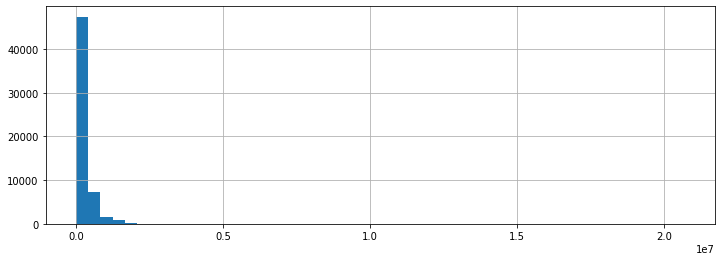

In [49]:
#Antwort
df['Approved Amount'].astype(float).hist(bins=50, figsize=(12,4))

**Quiz:** In welchen Ländern waren die vergebenen Beträge im Schnitt am Grössten? Zeigen Sie die zehn obersten an.

In [50]:
#Antwort
df.groupby('Institution Country')['Approved Amount'].mean().sort_values(ascending=False).head(10)

Institution Country
Portugal      703000.000
Austria       354064.667
Norway        294984.000
Switzerland   294532.192
Singapore     251470.000
Ireland       245219.650
Germany       213070.586
Netherlands   212326.091
Denmark       149886.527
Spain         148505.000
Name: Approved Amount, dtype: float64

In [ ]:
# Time for a break ...

In [ ]:
df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()
df.groupby('Funding Instrument Hierarchy')['Approved Amount'].sum()
df['Approved Amount'].astype(float).hist(bins=100, figsize=(12,4))
df.groupby('Institution Country')['Approved Amount'].mean().sort_values(ascending=False).head(10)

## Werte Kategorisieren

Sagen wir mal, wir interessieren uns für die Institutionen in der Schweiz, die vom SNF Geld gekriegt haben.

Wir erstellen erstmal ein Dataframe, in dem nur diese Institutionen vorkommen:

In [51]:
df_swiss = df[df['Institution Country'] == 'Switzerland']

Und lassen uns dann eine Liste aller Universitäten anzeigen, die in diesem Dataframe vorkommen:

In [52]:
df_swiss['University'].unique()

array(['University of Geneva - GE',
       'Non-profit organisations (libraries, museums, academies, foundations) and administration - NPO',
       'University of Basel - BS', 'University of Fribourg - FR',
       'University of Zurich - ZH',
       'Swiss Federal Institute for Forest, Snow and Landscape Research  - WSL',
       'University of Berne - BE', 'ETH Zurich - ETHZ',
       'University of Lausanne - LA', 'University of Neuchatel - NE',
       'Graduate Institute of International and Development Studies - IHEID',
       'University of St.Gallen - SG',
       'Other Research Institutes - FINST',
       'Pädagogische Hochschule Graubünden - PHGR', 'EPF Lausanne - EPFL',
       'Pädagogische Hochschule Zürich - PHZH',
       'Companies/  Private Industry - FP', 'University of Lucerne - LU',
       'Unassignable - NA', 'Swiss Institute of Art Research - SIK-ISEA',
       'Dipartimento formazione e apprendimento, Scuola universitaria professionale della Svizzera italiana - SUPSI-DF

Schnell wird klar: In dieser Liste sind nicht nur Universitäten, sondern auch Fachhochschulen und andere Institutionen enthalten.

Wie gehen wir vor, wenn wir die Daten nach diesen Typen klassifizieren wollen? Mit anderen Worten, zB separate Durchschnittswerte ausrechnen für Universitäten, Fachhochschulen, etc?

### Methode 1: contains, replace

Die allereinfachste (und nicht sehr empfehlenswerte) Variante ist, einfach zu checken, ob in einem bestimmten Eintrag das Wort "University" vorkommt.

Wir können dafür die Funktion `str.contains()` verwenden - heraus kommt eine Liste von True/False-Werten, die wir weiter verwenden können...

In [53]:
df_swiss['University'].str.contains('University')

1         True
2        False
3         True
4        False
5         True
         ...  
69472     True
69473     True
69474    False
69475     True
69477     True
Name: University, Length: 51358, dtype: object

Zum Beispiel so:

In [54]:
df_swiss['Institution Type'] = df_swiss['University'].str.contains('University')

<ipython-input-54-0818912daa54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swiss['Institution Type'] = df_swiss['University'].str.contains('University')


... oder vielleicht doch nicht so :-) Der Grund für die obige Warnung ist: Wir arbeiten auf einem Slice eines Dataframes, das kann Probleme machen (muss aber nicht).

Um sicher zu sein: `.copy()` verwenden, um im Memory eine physische Kopie des Dataframes zu erstellen

In [55]:
df_ch = df_swiss.copy()

In [56]:
df_ch['Institution Type'] = df_ch['University'].str.contains('University')

In [57]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.000,NaN,True
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.000,NaN,False
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.000,NaN,True


Nun können wir die True/False-Werte mit generischen Einträgen ersetzen. Dafür gibt es `replace()`:

In [58]:
df_ch['Institution Type'] = df_ch['Institution Type'].replace(True, 'University')

In [59]:
df_ch['Institution Type'] = df_ch['Institution Type'].replace(False, 'Other')

In [60]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.000,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.000,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.000,NaN,University


Wir können nun zB ausrechnen, wie viel Geld die Universitäten und die übrigen Institutionen in der Summe gekriegt haben:

In [61]:
df_ch.groupby('Institution Type')['Approved Amount'].sum()

Institution Type
Other         4750437094.500
University   10324504085.320
Name: Approved Amount, dtype: float64

In [66]:
df_ch["University"].unique()

array(['University of Geneva - GE',
       'Non-profit organisations (libraries, museums, academies, foundations) and administration - NPO',
       'University of Basel - BS', 'University of Fribourg - FR',
       'University of Zurich - ZH',
       'Swiss Federal Institute for Forest, Snow and Landscape Research  - WSL',
       'University of Berne - BE', 'ETH Zurich - ETHZ',
       'University of Lausanne - LA', 'University of Neuchatel - NE',
       'Graduate Institute of International and Development Studies - IHEID',
       'University of St.Gallen - SG',
       'Other Research Institutes - FINST',
       'Pädagogische Hochschule Graubünden - PHGR', 'EPF Lausanne - EPFL',
       'Pädagogische Hochschule Zürich - PHZH',
       'Companies/  Private Industry - FP', 'University of Lucerne - LU',
       'Unassignable - NA', 'Swiss Institute of Art Research - SIK-ISEA',
       'Dipartimento formazione e apprendimento, Scuola universitaria professionale della Svizzera italiana - SUPSI-DF

Aber wie gesagt, es gibt bessere Wege. (zB haben wir nun Einträge wie "Université" nicht berücksichtigt.

### Methode 2: apply, isin

Auch nicht wirklich super, aber immerhin besser als vorher: Wir schreiben eine eigene Funktion zur Klassifizierung von Universitäten.

Diese Funktion können wir unendlich kompliziert machen, wenn wir wollen. Hier halten wir sie bewusst einfach.

In [67]:
def categorize_institution(institution):
    
    #Ist eine Institution eine Uni? Hier eine Liste von Wörtern, nach denen wir suchen.
    university_names = ["University", "Universität", "Université", "Università"]
    
    #Gehen wir die Liste durch...
    for university_name in university_names:
        
        #Kommt das Wort im String, den wir klassifizieren wollen, mehr als null mal vor?
        if str(institution).count(university_name) > 0:
            
            #Dann ist es eine Universität
            return "University"
    
    #sonst nicht
    return "Other"

Wir testen die Funktion...

In [68]:
categorize_institution("University of Zurich")

'University'

In [69]:
categorize_institution("Fachhochschule Nordwestschweiz")

'Other'

... und wenden sie auf die Spalte "University" an.

In [71]:
df_ch['University'].apply(categorize_institution)

1        University
2             Other
3        University
4             Other
5        University
            ...    
69472    University
69473    University
69474         Other
69475    University
69477    University
Name: University, Length: 51358, dtype: object

Das Resultat kommt nun in die Spalte "Institution Type"

In [72]:
df_ch['Institution Type'] = df_ch['University'].apply(categorize_institution)

In [74]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.000,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.000,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.000,NaN,University


Wir sind jetzt ziemlich schnell durch `df.apply()` durchgegangen. Macht nix, wir kommen später nochmals drauf zurück. Man kann die Funktion übrigens auch auf ganze Zeilen anwenden, mehr dazu später.

In [75]:
df_ch.groupby('Institution Type')['Approved Amount'].sum()

Institution Type
Other         4641944984.100
University   10433096195.720
Name: Approved Amount, dtype: float64

**Quiz:** Basierend auf unserer neuen Klassifizierung: Zeichnen Sie einen Balkenchart, der die durchschnittliche Vergabesumme für Universitäten und Nicht-Universitäten anzeigt.

<AxesSubplot:ylabel='Institution Type'>

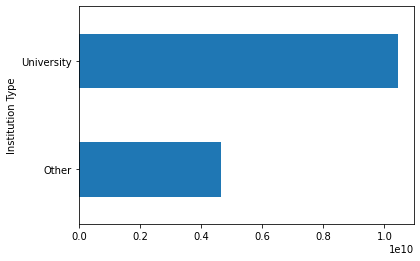

In [80]:
#Antwort
df_ch.groupby('Institution Type')['Approved Amount'].sum().plot(kind="barh")

### Methode 3: merge

Und nun zur saubersten Art, wie man die Institutionen in dieser Tabelle hier klassifizieren sollte: von Hand.

Wie ziehen uns nochmals die Liste der unique Values, diesmal gleich als Dataframe:

In [82]:
df_ch['University'].unique()

array(['University of Geneva - GE',
       'Non-profit organisations (libraries, museums, academies, foundations) and administration - NPO',
       'University of Basel - BS', 'University of Fribourg - FR',
       'University of Zurich - ZH',
       'Swiss Federal Institute for Forest, Snow and Landscape Research  - WSL',
       'University of Berne - BE', 'ETH Zurich - ETHZ',
       'University of Lausanne - LA', 'University of Neuchatel - NE',
       'Graduate Institute of International and Development Studies - IHEID',
       'University of St.Gallen - SG',
       'Other Research Institutes - FINST',
       'Pädagogische Hochschule Graubünden - PHGR', 'EPF Lausanne - EPFL',
       'Pädagogische Hochschule Zürich - PHZH',
       'Companies/  Private Industry - FP', 'University of Lucerne - LU',
       'Unassignable - NA', 'Swiss Institute of Art Research - SIK-ISEA',
       'Dipartimento formazione e apprendimento, Scuola universitaria professionale della Svizzera italiana - SUPSI-DF

In [83]:
df_unique = pd.DataFrame(df_ch['University'].unique())
df_unique

,0
0,University of Geneva - GE
1,"Non-profit organisations (libraries, museums, ..."
2,University of Basel - BS
3,University of Fribourg - FR
4,University of Zurich - ZH
...,...
79,Pädagogische Hochschule Schaffhausen - PHSH
80,Staatsunabhängige Theologische Hochschule Base...
81,Facoltà di Teologia di Lugano - FTL
82,Fernfachhochschule Schweiz (member of SUPSI) -...


Weil es einfacher geht, bearbeiten wir die Liste in einem externen Programm... mit der Funktion `to_csv()`

In [84]:
df_unique.to_csv('dataprojects/SNF/klassifizieren.csv', index=False)

... im Excel, oder anderswo bearbeiten, und wieder laden: (Ich habe das hier schonmal vorbereitet)

In [85]:
df_unique_edited = pd.read_csv('dataprojects/SNF/klassifiziert.csv')

In [86]:
df_unique_edited

,University,New Type
0,AO Research Institute - AORI,Other
1,Berne University of Applied Sciences - BFH,Fachhochschule
2,Biotechnology Institute Thurgau - BITG,Other
3,Cantonal hospital of St.Gallen - KSPSG,Spital
4,Cardiocentro Ticino - CT,Other
...,...,...
78,University of St.Gallen - SG,Universität
79,University of Zurich - ZH,Universität
80,Zürcher Fachhochschule - ZFH,Fachhochschule
81,Zurich University of Applied Sciences - ZHAW,Fachhochschule


Wir haben jetzt zwei Tabellen: `df_ch` (die grosse Datentabelle) und `df_unique` (die Klassifizierungen).

Diese zwei Tabellen können wir nun verknüpfen, und zwar mit der Funktion `merge()`

In [96]:
df_ch

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.000,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.000,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.000,NaN,University
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.000,NaN,Other
5,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.000,NaN,University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69472,183786,IZSEZ0_183786,"Minimising Risks, Selling Promises? Reproducti...",NaN,Maffi Irene,Scientific Exchanges,Science communication,Institut des sciences sociales Université de L...,Switzerland,University of Lausanne - LA,10602,Health,"Humanities and Social Sciences;Sociology, soci...",10602/10403,01.10.2018,31.12.2018,7050.000,risks; promises; technoscientific innovations ...,University
69473,183799,10BP12_183799,Gender Innovation and Migration in Switzerland,Gender Innovation and Migration in Switzerland,Falk Francesca,Open Access Books,Science communication,Departement für Historische Wissenschaften - Z...,Switzerland,University of Fribourg - FR,10301,General history (without pre-and early history),Humanities and Social Sciences;Theology & reli...,10301/10302,01.09.2018,28.02.2019,9500.000,Geschlechtergeschichte; Geschichte des soziale...,University
69474,183810,10BP12_183810,Dépasser les bornes,NaN,Messer Marc Antoine,Open Access Books,Science communication,Communauté d'études pour l'aménagement du terr...,Switzerland,EPF Lausanne - EPFL,10407,Architecture and Social urban science,"Humanities and Social Sciences;Art studies, mu...",10407/10202,01.09.2018,28.02.2019,25000.000,urbanisme; planification; métropole; frontière...,Other
69475,183815,10BP12_183815,Perspectives on treating hypertension in old a...,Perspectives on treating hypertension in old a...,Streit Sven,Open Access Books,Science communication,Berner Institut für Hausarztmedizin BIHAM Univ...,Switzerland,University of Berne - BE,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701/30806,01.09.2018,28.02.2019,2080.000,Blood pressure; Cognitive function; Oldest-old...,University


In [97]:
df_unique_edited

,University,New Type
0,AO Research Institute - AORI,Other
1,Berne University of Applied Sciences - BFH,Fachhochschule
2,Biotechnology Institute Thurgau - BITG,Other
3,Cantonal hospital of St.Gallen - KSPSG,Spital
4,Cardiocentro Ticino - CT,Other
...,...,...
78,University of St.Gallen - SG,Universität
79,University of Zurich - ZH,Universität
80,Zürcher Fachhochschule - ZFH,Fachhochschule
81,Zurich University of Applied Sciences - ZHAW,Fachhochschule


In [98]:
df_ch_classified = df_ch.merge(df_unique_edited, how='left', left_on='University', right_on='University')
df_ch_classified

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
0,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.000,NaN,University,Universität
1,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.000,NaN,Other,Other
2,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.000,NaN,University,Universität
3,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.000,NaN,Other,Other
4,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.000,NaN,University,Universität
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51353,183786,IZSEZ0_183786,"Minimising Risks, Selling Promises? Reproducti...",NaN,Maffi Irene,Scientific Exchanges,Science communication,Institut des sciences sociales Université de L...,Switzerland,University of Lausanne - LA,10602,Health,"Humanities and Social Sciences;Sociology, soci...",10602/10403,01.10.2018,31.12.2018,7050.000,risks; promises; technoscientific innovations ...,University,Universität
51354,183799,10BP12_183799,Gender Innovation and Migration in Switzerland,Gender Innovation and Migration in Switzerland,Falk Francesca,Open Access Books,Science communication,Departement für Historische Wissenschaften - Z...,Switzerland,University of Fribourg - FR,10301,General history (without pre-and early history),Humanities and Social Sciences;Theology & reli...,10301/10302,01.09.2018,28.02.2019,9500.000,Geschlechtergeschichte; Geschichte des soziale...,University,Universität
51355,183810,10BP12_183810,Dépasser les bornes,NaN,Messer Marc Antoine,Open Access Books,Science communication,Communauté d'études pour l'aménagement du terr...,Switzerland,EPF Lausanne - EPFL,10407,Architecture and Social urban science,"Humanities and Social Sciences;Art studies, mu...",10407/10202,01.09.2018,28.02.2019,25000.000,urbanisme; planification; métropole; frontière...,Other,Universität
51356,183815,10BP12_183815,Perspectives on treating hypertension in old a...,Perspectives on treating hypertension in old a...,Streit Sven,Open Access Books,Science communication,Berner Institut für Hausarztmedizin BIHAM Univ...,Switzerland,University of Berne - BE,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701/30806,01.09.2018,28.02.2019,2080.000,Blood pressure; Cognitive function; Oldest

Die Spalte "New Type" wurde nun zur Tabelle "df_ch" hinzugefügt, und zwar genau dort, wo es zum Eintrag in "University" passt!

Schauen wir kurz, wie viele Einträge es von welchem Typ hat:

In [99]:
df_ch_classified['New Type'].value_counts()

Universität       45823
Other              4579
Fachhochschule      793
Spital              162
Name: New Type, dtype: int64

Ging auch wirklich nichts vergessen?

In [100]:
df_ch_classified['New Type'].value_counts(dropna=False)

Universität       45823
Other              4579
Fachhochschule      793
Spital              162
NaN                   1
Name: New Type, dtype: int64

**Oops!** Es hat einen fehlenden Eintrag drin.

Was ist das für ein Eintrag?

In [101]:
df_ch_classified[df_ch_classified['New Type'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
24179,101005,50CH40-101005,SELECTS 2003: Eidgenössische Wahlen 2003,SELECTS 2003: Federal elections 2003,Malaguerra Carlo,Swiss Priority Programmes (SPPs),Programmes,Schweizerische Akademie der Geistes-und Sozial...,Switzerland,NaN,10202,Political science,"Humanities and Social Sciences;Sociology, soci...",10202,01.02.2003,31.01.2004,100000.000,NaN,Other,NaN


Sieht nach einem grundsätzlich validen Projekt aus. Wir klassifizieren diesen Eintrag kurzerhand auf "Other":

In [102]:
df_ch_classified.loc[24179, "New Type"] = "Other"

In [103]:
df_ch_classified.loc[24179]

Project Number                                                             101005
Project Number String                                               50CH40-101005
Project Title                            SELECTS 2003: Eidgenössische Wahlen 2003
Project Title English                        SELECTS 2003: Federal elections 2003
Responsible Applicant                                            Malaguerra Carlo
Funding Instrument                               Swiss Priority Programmes (SPPs)
Funding Instrument Hierarchy                                           Programmes
Institution                     Schweizerische Akademie der Geistes-und Sozial...
Institution Country                                                   Switzerland
University                                                                    NaN
Discipline Number                                                           10202
Discipline Name                                                 Political science
Discipline Name 

<AxesSubplot:ylabel='New Type'>

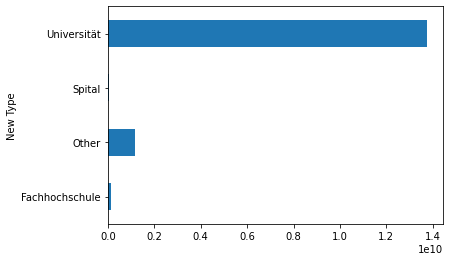

In [105]:
df_ch_classified.groupby('New Type')['Approved Amount'].sum().plot(kind="barh")

In [146]:
#

**Quiz:** Kategorisieren Sie die Einträge nach dem Herkunftsland der Universität (erstellen Sie dazu ein neues Feld "Country Type" mit den Einträgen "Switzerland" oder "Other". Wie viele Projekte kommen aus der Schweiz, wie viele aus anderen Ländern?

**Achtung** Wechseln Sie jetzt wieder zum originalen Dataframe, "df"

In [107]:
df["Institution Country"].value_counts()

Switzerland                           51358
United States of America               5351
Great Britain and Northern Ireland     1819
Germany                                1055
France                                  885
                                      ...  
Tonga                                     1
Paraguay                                  1
Sri Lanka                                 1
Tunisia                                   1
Congo, Republic                           1
Name: Institution Country, Length: 114, dtype: int64

In [116]:
#Neues, leeres Feld 'Country Type' erstellen
df['Country Type'] = ""

In [117]:
# Country Type = 'Switzerland', falls Switzerland
df.loc[df['Institution Country'] == 'Switzerland', 'Country Type'] = "Switzerland"

In [118]:
# Country Type = 'Other', falls nicht
df.loc[df['Institution Country'] != 'Switzerland', 'Country Type'] = "Other"

In [119]:
# Auswertung nach Country Type
df['Country Type'].value_counts(dropna=False)

Switzerland    51358
Other          18120
Name: Country Type, dtype: int64

In [120]:
# 2
df['Country Type'] = df['Institution Country'].str.contains('Switzerland')
df["Country Type"] = df["Country Type"].replace(True,"Switzerland")
df["Country Type"] = df["Country Type"].replace(False,"Other")
df['Country Type'].value_counts(dropna=False)

Switzerland    51358
Other          12532
NaN             5588
Name: Country Type, dtype: int64

In [121]:
# 3
def cat_country(country):
    country_names = ["Switzerland","Swiss","Svizzera"]
    for name in country_names:
        if str(country).count(name) > 0:
            return "Switzerland"
    return "Other"

df['Country Type'].apply(cat_country)
df['Country Type'].value_counts(dropna=False)

Switzerland    51358
Other          12532
NaN             5588
Name: Country Type, dtype: int64

## Plotting Level 2

Nun wollen wir darstellen, wie sich die Projekte über die Zeit hinweg in der Schweiz und in den übrigen Ländern entwickelt haben. Es geht also darum, zwei verschiedene Serien auf einer Grafik einzuzeichnen.

Wir wenden dazu jetzt einen etwas faulen Trick an, um eine neue Spalte mit dem Jahr zu generieren (eigentlich gäbe es dazu noch einen speziellen Datentyp, aber den schauen wir ein anderes Mal an).

In [126]:
df['Start Date'].str[6:]

0        1975
1        1975
2        1976
3        1975
4        1976
         ... 
69473    2018
69474    2018
69475    2018
69476    2018
69477    2018
Name: Start Date, Length: 69478, dtype: object

In [127]:
df['Year'] = df['Start Date'].str[6:]

Check, ob das einigermassen funktioniert hat...

In [128]:
df['Year'].value_counts(dropna=False).sort_index()

1975     205
1976     542
1977     564
1978     556
1979     616
1980     600
1981     614
1982     628
1983     682
1984     703
1985     684
1986     938
1987    1099
1988    1105
1989    1789
1990    1441
1991    1240
1992    1148
1993    1519
1994    1493
1995    1328
1996    1722
1997    1577
1998    1353
1999    1388
2000    1704
2001    1713
2002    1624
2003    1835
2004    1858
2005    2104
2006    2106
2007    2175
2008    2265
2009    2466
2010    2596
2011    2541
2012    2890
2013    2837
2014    2911
2015    2841
2016    2696
2017    2861
2018    1916
2019       3
NaN        2
Name: Year, dtype: int64

Jetzt plotten wir die Gesamtsumme der gesprochenen Gelder nach Jahr. Zuerst für die Schweiz ...

<AxesSubplot:xlabel='Year'>

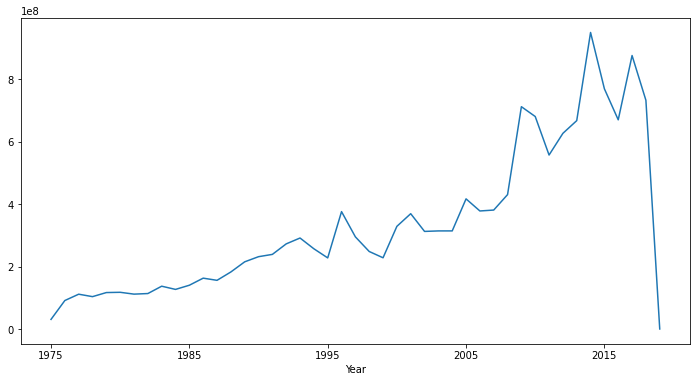

In [130]:
df[df['Country Type'] == "Switzerland"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... dann für die anderen Länder ...

<AxesSubplot:xlabel='Year'>

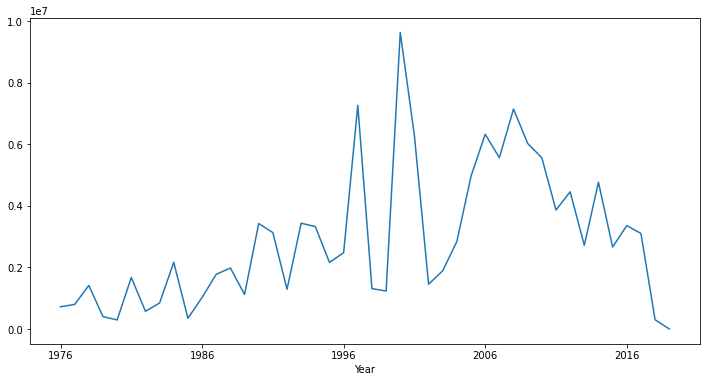

In [135]:
df[df['Country Type'] == "Other"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... und schliesslich für beide Ländertypen:

### Methode 1: Zwei verschiedene Linien einzeichnen

Die sicherste Methode, um mehrere Kurven auf derselben Grafik darzustellen, ist `ax=`.

Wir speichern erste einen Plot als "chart1" und sagen dem zweiten Plot dann, sich zu "chart1" hinzuzugesellen.

<AxesSubplot:xlabel='Year'>

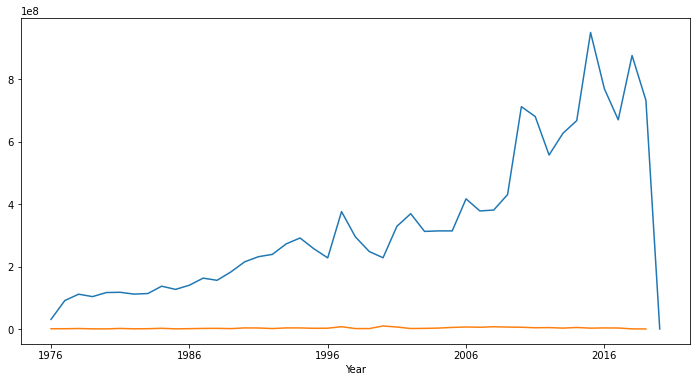

In [136]:
chart1 = df[df['Country Type'] == "Switzerland"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

df[df['Country Type'] == "Other"].groupby('Year')['Approved Amount'].sum().plot(ax=chart1)

### Methode 2: Doppelt groupby, unstack

In diesem Fall gibt es allerdings noch eine elegantere Variante. Und zwar mit `groupby()`.

Diese Methode funktioniert nicht nur mit einem Level, sondern auch mit zwei. Die Summierung wird einerseits über die Jahre ("Years") gemacht und andererseits für die einzelenen Ländertypen ("Country Types"):

In [141]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum()#.plot(kind="bar")

Year  Country Type
1975  Switzerland     30746407.000
1976  Other             721694.000
      Switzerland     91217485.000
1977  Other             797257.000
      Switzerland    111474364.000
                          ...     
2017  Switzerland    876216758.450
2018  Other             301000.000
      Switzerland    732822396.130
2019  Other                  0.000
      Switzerland        56892.000
Name: Approved Amount, Length: 89, dtype: float64

Um diese Werte zu plotten, müssen wir Pandas die Tabelle allerdings etwas anders zur Verfügung stellen: im Wide-Format (dazu später noch mehr). Wir können dazu die Funktion `unstack()` verwenden:

In [142]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack()

Country Type,Other,Switzerland
Year,,
1975,NaN,30746407.000
1976,721694.000,91217485.000
1977,797257.000,111474364.000
1978,1415521.000,103657475.000
1979,401550.000,116733028.000
1980,292690.000,117563318.000
1981,1673054.000,111697875.000
1982,574252.000,113575204.000
1983,844457.000,137095981.000


Letzter Schritt: `plot()`

<AxesSubplot:xlabel='Year'>

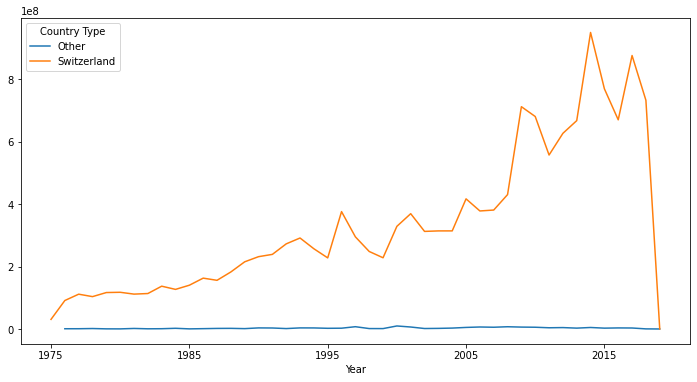

In [143]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack().plot(figsize=(12,6))

**Quiz:** Plotten Sie den durchschnittlichen Betrag, den Universitäten, Fachhochschulen, Spitäler und andere Institutionen über die Jahre erhalten haben - alles auf derselben Grafik. Benutzen Sie dazu wieder das Dataframe "df_ch_classfied" – Achtung, Sie müssen zuerst wieder eine Jahresspalte erstellen.

In [151]:
# Spalte 'Year' in df_ch_classified erstellen
df_ch_classified['Year'] = df_ch_classified['Start Date'].str[6:]

In [152]:
# Liste, nach Jahr und New Type gruppiert
df_ch_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean()

Year  New Type      
1975  Other            174150.941
      Spital            76234.750
      Universität      161652.365
1976  Other            230368.245
      Spital            62150.000
                          ...    
2018  Fachhochschule   259342.130
      Other            444559.290
      Spital           861597.750
      Universität      545241.954
2019  Universität       56892.000
Name: Approved Amount, Length: 164, dtype: float64

<AxesSubplot:xlabel='Year'>

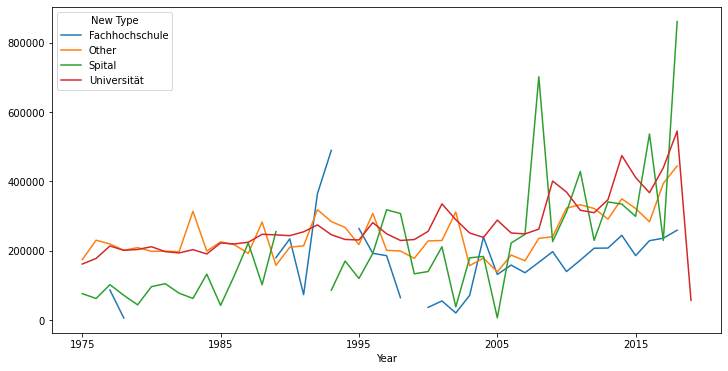

In [154]:
# Plot
df_ch_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean().unstack().plot(figsize=(12,6))

**Schlussfrage:** Haben wir nun bereits eine Story gefunden? Wenn ja, was könnte sie sein? Wenn nein, welches wären weitere Auswertungen, die man basierend auf diesen Daten machen könnte?

In [ ]:
#Antwort in Textform...
#Zum Beispiel: Auswertung der Profile von einzelnen Forschern.

In [155]:
df['Responsible Applicant'].value_counts()

Kneubühl Fritz             47
Güntherodt Hans-Joachim    47
Pestalozzi Karl            46
Günter Peter               41
Stocker Thomas             39
                           ..
Perentes Jean Yannis        1
Ravasio Pamela              1
Xanthos Aris                1
Ursenbacher Sylvain         1
Kaymak Tanay                1
Name: Responsible Applicant, Length: 26321, dtype: int64

<AxesSubplot:xlabel='Year'>

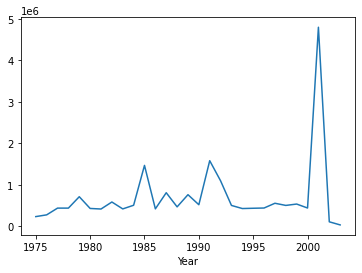

In [156]:
df[df['Responsible Applicant'] == 'Güntherodt Hans-Joachim'].groupby('Year')['Approved Amount'].sum().plot()

# Übung

Wir klassifizieren die Projekte nun nach Forschungsdisziplin und werten aus, welche Disziplinen zu welchem Zeitpunkt wie viel Geld gekriegt haben.

**Schritt 1: ** Wir erstellen eine Liste der einzigartigen Einträge im Datenfeld "Discipline Name" und speichern sie als csv-Datei ab. (Arbeiten Sie mit dem dataframe "df_ch")

In [ ]:
#Dataframe aus einzigartigen Disziplinennamen erstellen


In [ ]:
# Dataframe als csv speichern


**Schritt 2:** Wir bearbeiten das csv-File extern und klassifizieren nach unserer Wahl

In [ ]:
#extern bearbeiten...

**Schritt 3:** Wir fügen die Klassifizierung der Disziplinen in unsere Datenliste (Arbeiten Sie mit df) ein

In [ ]:
# Einlesen des bearbeiteten csv-Files


In [ ]:
# Verbinden Sie das dataframe "df_ch" mit der Klassifizierung, abspeichern unter neuem dataframe df_ch_classified


**Schritt 4: ** Auswertungen

- Wie viele Projekte von welchem Disziplinen-Typ wurden durchgeführt?

- Welche Disziplinen-Typen haben meisten Geld gekriegt?

- Wie viel kosten Projekte der Disziplinen-Typen im Durchschnitt? Im Median?

** Schritt 5: ** Plot einer Auswertung

Wie viel Geld haben die verschiedenen Disziplinentypen im Jahresverlauf insgesamt gekriegt?

In [ ]:
#Wir müssen auf df_ch_classified nochmals den Trick mit der Jahresspalte anwenden


In [ ]:
# Tabelle anzeigen: Summe der gesprochenen Gelder, gruppiert nach Jahr und Disziplinentyp


In [ ]:
#Plot als Liniendiagramm
